In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tqdm
import fitsio
import matplotlib.pyplot as plt
import healpy as hp
import glob
import hpgeom
import numpy as np
import galsim
import yaml
import requests

# from sim_match_tools import project_to_tile, sample_from_pixel
from montara.make_input_desgal import make_input_cosmos_cat

## Try to Adjust the COSMOS Catalog to get More Brighter Things

In [3]:
ratio_sim = """
18.20913, -0.87218
18.24124, -0.87216
18.28405, -0.87215
18.32686, -0.87462
18.36968, -0.87709
18.40179, -0.87708
18.42319, -0.75253
18.50882, -0.75250
18.61585, -0.81223
18.64796, -0.81221
18.69077, -0.81220
18.72288, -0.81218
18.75499, -0.83708
18.78710, -0.83706
18.80850, -0.83705
18.84061, -0.84700
18.88342, -0.84699
18.91553, -0.75731
18.94764, -0.75231
18.97975, -0.75230
19.02256, -0.69250
19.05467, -0.68751
19.09749, -0.68749
19.12959, -0.56792
19.16170, -0.56790
19.19381, -0.56789
19.21522, -0.54795
19.24733, -0.54794
19.29014, -0.54792
19.32225, -0.45824
19.35436, -0.45823
19.39717, -0.45821
19.42928, -0.45820
19.46139, -0.59268
19.50420, -0.59267
19.53631, -0.53287
19.56842, -0.53286
19.60053, -0.53285
19.62194, -0.48800
19.65404, -0.48799
19.69686, -0.48797
19.72897, -0.36840
19.76108, -0.36839
19.80389, -0.36837
19.83600, -0.36836
19.86811, -0.43310
19.90022, -0.43309
19.92162, -0.38825
19.95373, -0.38823
19.98584, -0.38822
20.02865, -0.37326
20.06076, -0.36826
20.10357, -0.36824
20.14639, -0.36823
20.18920, -0.36821
20.22131, -0.36820
20.24271, -0.29844
20.27482, -0.29843
20.30693, -0.29842
20.32834, -0.25357
20.36045, -0.24360
20.40326, -0.24358
20.43537, -0.20371
20.46748, -0.20370
20.51029, -0.20368
20.54240, -0.20367
20.57451, -0.32321
20.60662, -0.32320
20.62802, -0.26839
20.66013, -0.26838
20.70295, -0.26836
20.73506, -0.26835
20.76716, -0.34804
20.80998, -0.34802
20.84209, -0.26830
20.87420, -0.26829
20.91701, -0.26827
20.94912, -0.23339
20.97052, -0.23338
21.01334, -0.23336
21.03474, -0.21841
21.06685, -0.21839
21.10966, -0.21837
21.14177, -0.16356
21.17388, -0.16355
21.21669, -0.16353
21.24880, -0.16352
21.28091, -0.23325
21.32372, -0.23323
21.35583, -0.16846
21.38794, -0.16844
21.42005, -0.16843
21.44146, -0.16842
21.47357, -0.20826
21.51638, -0.20824
21.54849, -0.18830
21.58060, -0.18829
21.62341, -0.18827
21.65552, -0.18826
21.68763, -0.20817
21.71974, -0.20815
21.74114, -0.20815
21.77325, -0.21809
21.81607, -0.21808
21.84817, -0.17323
21.88028, -0.17322
21.92310, -0.17320
21.95521, -0.15824
21.97661, -0.15823
22.03013, -0.15821
22.06224, -0.15819
22.09435, -0.19803
22.12645, -0.19802
22.14786, -0.19801
22.17997, -0.22291
22.22278, -0.22289
22.25489, -0.18302
22.28700, -0.18301
22.32981, -0.18299
22.36192, -0.13316
22.39403, -0.13315
22.42614, -0.13313
22.44755, -0.11818
22.47966, -0.11817
22.52247, -0.11815
22.55458, -0.10319
22.58669, -0.10318
22.62950, -0.10316
22.66161, -0.09318
22.69372, -0.09317
22.73653, -0.09315
22.76864, -0.07819
22.80075, -0.07818
22.83286, -0.07817
22.85426, -0.03332
22.88637, -0.03331
22.92919, -0.03329
22.97200, -0.03576
23.03622, -0.03823
23.06833, -0.01829
23.10043, -0.01827
23.14325, -0.01826
23.17536, -0.00828
23.20747, -0.00827
23.25028, -0.00825
23.29309, -0.00325
23.33590, -0.00323
23.36801, 0.01671
23.40012, 0.01672
23.44293, 0.01674
23.47504, 0.01675
23.50715, 0.00680
23.53926, 0.00682
23.56067, 0.03672
23.59278, 0.03673
23.63559, 0.03675
23.66770, 0.07163
23.69981, 0.07165
23.74262, 0.07166
23.77473, 0.09160
23.80684, 0.09162
23.84965, 0.09164
23.88176, 0.12652
23.91387, 0.12653
23.94598, 0.12655
23.96738, 0.15644
23.98879, 0.15645
24.04230, 0.15648
24.07441, 0.18638
24.10652, 0.18639
24.14934, 0.18641
24.18144, 0.20635
24.21355, 0.20636
24.24566, 0.20638
24.26707, 0.20639
24.29918, 0.19644
24.34199, 0.19646
24.37410, 0.23632
24.40621, 0.23633
24.44902, 0.23635
24.49183, 0.23637
24.53465, 0.23639
24.57746, 0.23641
24.62027, 0.23642
24.66308, 0.23893
24.70590, 0.24144
24.74871, 0.24146
24.78082, 0.24147
"""

data = np.loadtxt(ratio_sim.split('\n'), delimiter=',', dtype=[("mag_i", "f8"), ("ratio", "f8")])

In [100]:
bes = np.array([17.        , 17.1010101 , 17.2020202 , 17.3030303 , 17.4040404 ,
        17.50505051, 17.60606061, 17.70707071, 17.80808081, 17.90909091,
        18.01010101, 18.11111111, 18.21212121, 18.31313131, 18.41414141,
        18.51515152, 18.61616162, 18.71717172, 18.81818182, 18.91919192,
        19.02020202, 19.12121212, 19.22222222, 19.32323232, 19.42424242,
        19.52525253, 19.62626263, 19.72727273, 19.82828283, 19.92929293,
        20.03030303, 20.13131313, 20.23232323, 20.33333333, 20.43434343,
        20.53535354, 20.63636364, 20.73737374, 20.83838384, 20.93939394,
        21.04040404, 21.14141414, 21.24242424, 21.34343434, 21.44444444,
        21.54545455, 21.64646465, 21.74747475, 21.84848485, 21.94949495,
        22.05050505, 22.15151515, 22.25252525, 22.35353535, 22.45454545,
        22.55555556, 22.65656566, 22.75757576, 22.85858586, 22.95959596,
        23.06060606, 23.16161616, 23.26262626, 23.36363636, 23.46464646,
        23.56565657, 23.66666667, 23.76767677, 23.86868687, 23.96969697,
        24.07070707, 24.17171717, 24.27272727, 24.37373737, 24.47474747,
        24.57575758, 24.67676768, 24.77777778, 24.87878788, 24.97979798,
        25.08080808, 25.18181818, 25.28282828, 25.38383838, 25.48484848,
        25.58585859, 25.68686869, 25.78787879, 25.88888889, 25.98989899,
        26.09090909, 26.19191919, 26.29292929, 26.39393939, 26.49494949,
        26.5959596 , 26.6969697 , 26.7979798 , 26.8989899 , 27.        ])

sims = np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.07653809e-01, 1.03841204e+00, 2.76911745e+00, 0.00000000e+00,
       3.28831880e+00, 3.51904902e+00, 4.03825037e+00, 7.90348343e+00,
       1.18840769e+01, 1.96721345e+01, 2.39988747e+01, 3.31714724e+01,
       2.85563451e+01, 3.74982499e+01, 4.64977089e+01, 6.47854901e+01,
       6.50160896e+01, 7.85731871e+01, 9.06301973e+01, 1.00091537e+02,
       1.23801642e+02, 1.46993161e+02, 1.70588093e+02, 1.58357776e+02,
       1.87375618e+02, 1.82875964e+02, 2.23258719e+02, 2.55103150e+02,
       2.82505751e+02, 3.29292229e+02, 3.26580517e+02, 3.82481666e+02,
       3.91481377e+02, 4.32902619e+02, 4.53613138e+02, 4.79573374e+02,
       5.43608876e+02, 5.89645134e+02, 6.00894210e+02, 6.19989925e+02,
       6.89274902e+02, 7.75117198e+02, 8.36555984e+02, 8.97419462e+02,
       9.57530020e+02, 1.02329796e+03, 1.12731201e+03, 1.18107740e+03,
       1.27072897e+03, 1.34612819e+03, 1.42331749e+03, 1.51158183e+03,
       1.54908047e+03, 1.61080868e+03, 1.63307621e+03, 1.54544540e+03,
       1.38679854e+03, 1.15292516e+03, 8.91477507e+02, 6.40238853e+02,
       4.25345497e+02, 2.84179583e+02, 1.78838068e+02, 1.11513957e+02,
       2.06529084e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

mdet = np.array([5.31467170e-02, 8.93317158e-02, 1.32527558e-01, 2.33619398e-01,
       3.80620956e-01, 5.78959981e-01, 8.60298346e-01, 1.24589474e+00,
       1.88297687e+00, 2.59989216e+00, 3.64337707e+00, 4.93902618e+00,
       6.63655493e+00, 8.69141055e+00, 1.12478807e+01, 1.42643527e+01,
       1.78923511e+01, 2.21985921e+01, 2.71294767e+01, 3.25963515e+01,
       3.87952941e+01, 4.57572879e+01, 5.33617916e+01, 6.18207135e+01,
       7.07400895e+01, 8.06717409e+01, 9.14770339e+01, 1.02975270e+02,
       1.15674847e+02, 1.29392806e+02, 1.44233405e+02, 1.60095778e+02,
       1.76902579e+02, 1.95252670e+02, 2.14882806e+02, 2.36126567e+02,
       2.58012837e+02, 2.82811321e+02, 3.07627220e+02, 3.35011348e+02,
       3.64138915e+02, 3.94435032e+02, 4.27401827e+02, 4.61542373e+02,
       4.98245496e+02, 5.35125925e+02, 5.76114483e+02, 6.17444762e+02,
       6.60966270e+02, 7.05790437e+02, 7.52261474e+02, 8.01137909e+02,
       8.50088749e+02, 9.00238669e+02, 9.50870981e+02, 1.00451298e+03,
       1.05906842e+03, 1.11534288e+03, 1.17368124e+03, 1.23608680e+03,
       1.30036945e+03, 1.36586565e+03, 1.43148127e+03, 1.49470867e+03,
       1.54496375e+03, 1.56250195e+03, 1.52974118e+03, 1.42174140e+03,
       1.23698916e+03, 1.00098811e+03, 7.53826701e+02, 5.32129129e+02,
       3.56857589e+02, 2.30246278e+02, 1.45224874e+02, 9.04034702e+01,
       1.67052570e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [5]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
find = 0
cardinal = fitsio.read(fnames[find])
nside = 8
pix = int(fnames[find].split(".")[-2])
cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

hcosmos = np.histogram(cosmos["mag_i_dered"], bins=bes, density=True)[0]
hcardinal = np.histogram(cardinal["TMAG"][:, 2], bins=bes, density=True)[0]


/tmp/ipykernel_1022643/3604238167.py:13: RuntimeWarning: invalid value encountered in divide
  msk = (sims > 0) & (sims / mdet <= 1.0)
/tmp/ipykernel_1022643/3604238167.py:11: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-poly))


array([-3.74833143e+02,  5.25610844e+00, -2.99187070e-02,  8.46406035e-05,
       -1.17815169e-07,  6.43834858e-11])

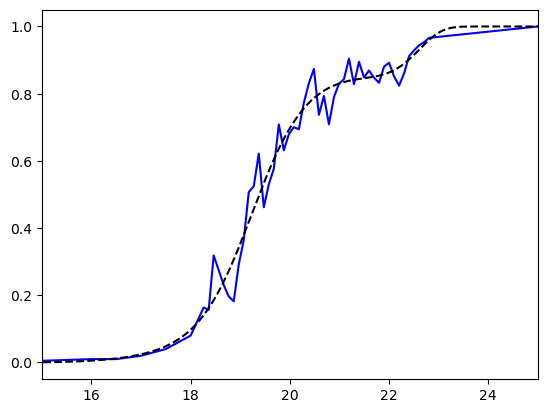

In [108]:
from scipy.optimize import curve_fit

def ratio_mag(mag, *coeffs):
    if len(coeffs) == 0:
        coeffs = [-1.06490672e+02,  1.74424846e+00, -1.17390019e-02,  3.80657424e-05,
       -5.87562207e-08,  3.47153346e-11]
    x = mag
    poly = np.zeros_like(x)
    for i, c in enumerate(coeffs):
        poly += c * x**(2*i)
    return 1.0 / (1.0 + np.exp(-poly))

msk = (sims > 0) & (sims / mdet <= 1.0)
ratio = sims[msk] / mdet[np.where(msk)[0]-1]
mag = ((bes[:-1] + bes[1:])/2)[msk]

msk = ratio < 1.0
ratio = ratio[msk]
mag = mag[msk]

fmag = np.concatenate([
    np.linspace(1, 12, 13),
    [14, 16, 16.5, 17, 17.5, 18],
    mag,
    np.linspace(25, 30, 4)
])

fratio = np.concatenate([
    np.zeros(13),
    [0, 0.01, 0.01, 0.02, 0.04, 0.08],
    ratio,
    np.ones(4)
])

res = curve_fit(ratio_mag, fmag, fratio, p0=np.zeros(6), ftol=1e-12, xtol=1e-12)[0]

fig, axs = plt.subplots(1, 1)

axs.plot(fmag, fratio, '-b', label="cosmos sim/mdet")

xp = np.linspace(1, 30, 1000)
axs.plot(xp, ratio_mag(xp, *res), '--k', label="model")
axs.set_xlim(15, 25)

res

In [113]:
hcosmos = np.histogram(cosmos["mag_i_dered"], bins=bes, density=True)[0]

mag = (bes[:-1] + bes[1:]) / 2
denom = np.trapz(hcosmos, mag)
numer = np.trapz(hcosmos / ratio_mag(mag), mag)

print(denom, numer, numer / denom, len(bes))


0.9974873978613154 1.0326260786080994 1.0352271926664176 100


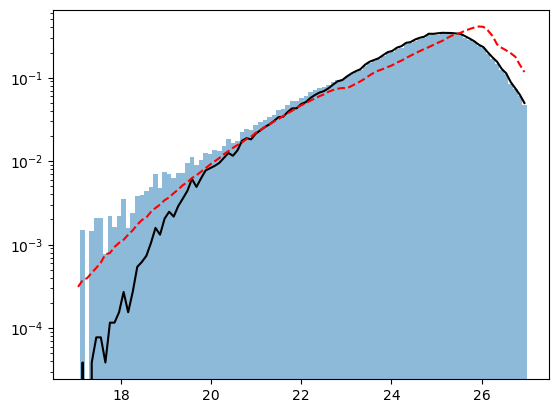

In [112]:
rng = np.random.RandomState(1234)


prob = 1.0 / ratio_mag(cosmos["mag_i_dered"])
prob /= np.sum(prob)
sample = rng.choice(cosmos["mag_i_dered"], size=1000000, p=prob, replace=True)

fig, axs = plt.subplots(1, 1)

mag = (bes[:-1] + bes[1:]) / 2
axs.hist(sample, bins=bes, density=True, alpha=0.5, label="sampled")
axs.plot(mag, hcosmos, '-k', label="cosmos")
axs.plot(mag, hcardinal, '--r', label="mdet")
axs.set_yscale("log")

/tmp/ipykernel_514638/1791473356.py:19: RuntimeWarning: invalid value encountered in divide
  axs.plot(bes[:-1], sims / mdet, '-b', label="cosmos sim/mdet")


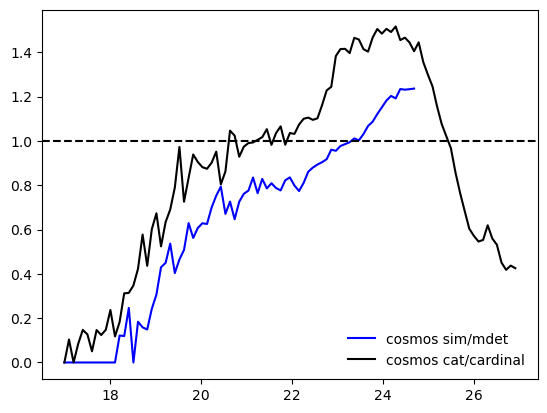

In [21]:

# bins = np.linspace(17, 23, 100)

# fig, axs = plt.subplots(1, 1)

# hcosmos, _, _ = axs.hist(cosmos["mag_i_dered"], bins=bins, histtype='step', label="cosmos", density=True, log=True)
# hcardinal, _, _ = axs.hist(cardinal["TMAG"][:, 2], bins=bins, histtype='step', label="cardinal", density=True, log=True)

# fig, axs = plt.subplots(1, 1)

# msk = hcosmos > 0

# axs.plot(bins[:-1][msk], hcosmos[msk]/hcardinal[msk] - 1, label="cosmos/cardinal - 1", color='k')

fig, axs = plt.subplots(1, 1)

axs.plot(bes[:-1], sims / mdet, '-b', label="cosmos sim/mdet")
# axs.plot(bes[:-1] - 0.2, sims / mdet, ':b', label="cosmos sim/mdet w/ approx. mag shift")
# res = np.polyfit(data["mag_i"], data["ratio"], 5)
# axs.plot(data["mag_i"], np.polyval(res, data["mag_i"]), '-r')

axs.plot(bes[:-1], hcosmos/hcardinal, "-k", label="cosmos cat/cardinal")
axs.axhline(1.0, color='k', linestyle='--')
axs.legend(loc="lower right", frameon=False)

/tmp/ipykernel_1022643/1360468900.py:10: RuntimeWarning: invalid value encountered in divide
  axs.plot(bes[:-1], sims/mdet, '-b', label="cosmos sim / mdet")


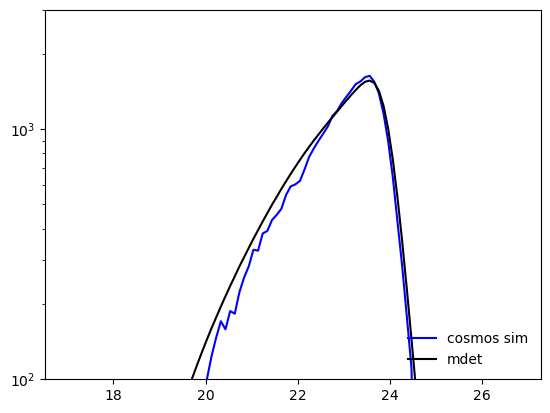

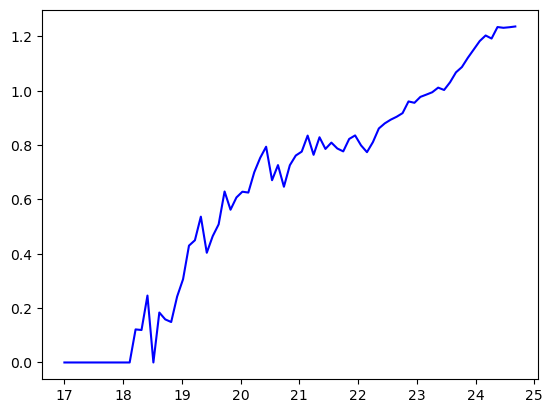

In [107]:
fig, axs = plt.subplots(1, 1)
axs.plot(bes[:-2], sims[1:], '-b', label="cosmos sim")
axs.plot(bes[:-2], mdet[:-1], '-k', label="mdet")
axs.set_yscale("log")
axs.legend(loc="lower right", frameon=False)
axs.set_ylim(1e2, 3e3)


fig, axs = plt.subplots(1, 1)
axs.plot(bes[:-1], sims/mdet, '-b', label="cosmos sim / mdet")


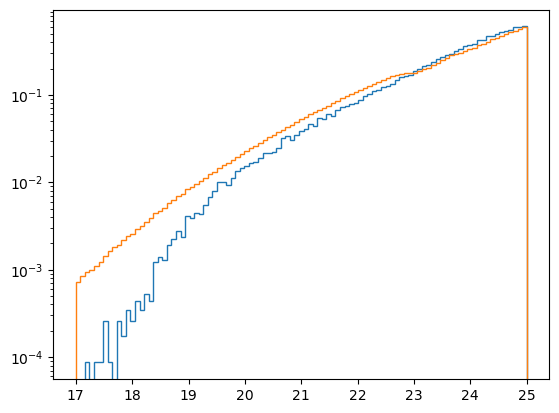

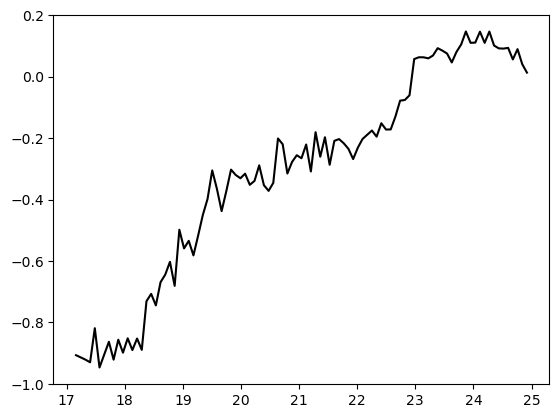

In [30]:
bins = np.linspace(17, 25, 100)

fig, axs = plt.subplots(1, 1)

hcosmos, _, _ = axs.hist(cosmos["mag_i_dered"], bins=bins, histtype='step', label="cosmos", density=True, log=True)
hcardinal, _, _ = axs.hist(cardinal["TMAG"][:, 2], bins=bins, histtype='step', label="cardinal", density=True, log=True)

fig, axs = plt.subplots(1, 1)

msk = hcosmos > 0

axs.plot(bins[:-1][msk], hcosmos[msk]/hcardinal[msk] - 1, label="cosmos/cardinal - 1", color='k')

## Make a Bunch

In [3]:
# get the seeds
req = requests.get('https://raw.githubusercontent.com/des-science/y6-image-sims/main/args-y6.txt')

req.raise_for_status()

seed_dict = {}
for line in req.text.split('\n'):
    line = line.strip()
    if not line:
        continue
    line = line.split()
    seed_dict[line[0]] = [int(x) for x in line[1:]]

assert len(seed_dict) == 1000
for v in seed_dict.values():
    assert len(v) == 10

In [5]:
partial_fnames = """\
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.277.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.278.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.281.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.282.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.304.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.307.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.316.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.319.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.341.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.342.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.345.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.346.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.357.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.358.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.361.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.362.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.421.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.422.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.425.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.426.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.432.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.435.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.444.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.447.fits""".splitlines()

partial_fnames = [os.path.basename(fn) for fn in partial_fnames]

all_fnames = set(
    os.path.basename(fn)
    for fn in glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
)
init_fnames = len(all_fnames)
all_fnames = all_fnames - set(partial_fnames)
assert len(all_fnames) == init_fnames - len(partial_fnames)
all_fnames = sorted(all_fnames)
all_fnames = [os.path.join("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/", fn) for fn in all_fnames]

cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

nside = 8
n_per_tile = 1
for tname, seeds in tqdm.tqdm(seed_dict.items(), ncols=80, total=len(seed_dict)):
    tile = (
        "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
        f"{tname}_g_pizza_cutter_info.yaml"
    )
    with open(tile) as f:
        info = yaml.safe_load(f)
    wcs = galsim.FitsWCS(info["image_path"], hdu=1)

    for seed_ind in range(n_per_tile):
        _seed = seeds[seed_ind]
        _rng = np.random.RandomState(_seed)

        find = int(_rng.choice(len(all_fnames)))
        pix = int(all_fnames[find].split(".")[-2])
        cardinal = fitsio.read(all_fnames[find])

        tcat = make_input_cosmos_cat(
            cosmos=cosmos,
            sim=cardinal,
            nside=nside,
            pix=pix,
            seed=_seed,
            wcs=wcs,
            dz=0.2,
            di=0.5,
            dgmi=0.5,
            dustmap_fname="SFD_dust_4096.hsp",
        )

        msk = (
            (tcat["x_sim"] >= 250)
            & (tcat["x_sim"] <= 9750)
            & (tcat["y_sim"] >= 250)
            & (tcat["y_sim"] <= 9750)
            & (tcat["mag_i"] <= 25)
        )
        print("    # of objects:", np.sum(msk), flush=True)

        pth = os.path.join(
            os.path.expandvars("$PSCRATCH"),
            f"cosmos_simcat_v3_{tname}_seed{_seed}.fits",
        )

        fitsio.write(pth, tcat, clobber=True)
        os.system("chgrp des %s" % pth)
        os.system("chmod g+r %s" % pth)

  0%|                                                  | 0/1000 [00:00<?, ?it/s][      55s] making catalogs
[      55s] making catalogs done (0.253001 seconds)
[      55s] getting redshift bin matches w/ dz = 0.20
[      55s] getting redshift bin matches w/ dz = 0.20 done (0.211204 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[      55s] assigning anything else to something at faint magnitude at random
[      55s] assigning anything else to something at faint magnitude at random done (0.051383 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62167


  0%|                                        | 1/1000 [00:16<4:33:11, 16.41s/it][      80s] making catalogs
[      80s] making catalogs done (0.262965 seconds)
[      80s] getting redshift bin matches w/ dz = 0.20
[      80s] getting redshift bin matches w/ dz = 0.20 done (0.219685 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[      80s] assigning anything else to something at faint magnitude at random
[      80s] assigning anything else to something at faint magnitude at random done (0.054174 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62721


  0%|                                        | 2/1000 [00:38<5:26:23, 19.62s/it][     102s] making catalogs
[     102s] making catalogs done (0.255009 seconds)
[     102s] getting redshift bin matches w/ dz = 0.20
[     103s] getting redshift bin matches w/ dz = 0.20 done (0.219374 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     103s] assigning anything else to something at faint magnitude at random
[     103s] assigning anything else to something at faint magnitude at random done (0.050713 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58781


  0%|                                        | 3/1000 [01:00<5:48:52, 21.00s/it][     126s] making catalogs
[     126s] making catalogs done (0.264705 seconds)
[     126s] getting redshift bin matches w/ dz = 0.20
[     126s] getting redshift bin matches w/ dz = 0.20 done (0.226352 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     126s] assigning anything else to something at faint magnitude at random
[     126s] assigning anything else to something at faint magnitude at random done (0.052623 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59597


  0%|▏                                       | 4/1000 [01:24<6:05:26, 22.01s/it][     148s] making catalogs
[     148s] making catalogs done (0.243432 seconds)
[     148s] getting redshift bin matches w/ dz = 0.20
[     148s] getting redshift bin matches w/ dz = 0.20 done (0.206746 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     148s] assigning anything else to something at faint magnitude at random
[     148s] assigning anything else to something at faint magnitude at random done (0.050637 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56334


  0%|▏                                       | 5/1000 [01:46<6:04:31, 21.98s/it][     173s] making catalogs
[     173s] making catalogs done (0.259586 seconds)
[     173s] getting redshift bin matches w/ dz = 0.20
[     173s] getting redshift bin matches w/ dz = 0.20 done (0.220407 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     173s] assigning anything else to something at faint magnitude at random
[     173s] assigning anything else to something at faint magnitude at random done (0.053296 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61893


  1%|▏                                       | 6/1000 [02:11<6:22:08, 23.07s/it][     196s] making catalogs
[     196s] making catalogs done (0.259212 seconds)
[     196s] getting redshift bin matches w/ dz = 0.20
[     196s] getting redshift bin matches w/ dz = 0.20 done (0.219961 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     196s] assigning anything else to something at faint magnitude at random
[     197s] assigning anything else to something at faint magnitude at random done (0.051497 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58682


  1%|▎                                       | 7/1000 [02:34<6:22:01, 23.08s/it][     218s] making catalogs
[     219s] making catalogs done (0.265712 seconds)
[     219s] getting redshift bin matches w/ dz = 0.20
[     219s] getting redshift bin matches w/ dz = 0.20 done (0.228826 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     219s] assigning anything else to something at faint magnitude at random
[     219s] assigning anything else to something at faint magnitude at random done (0.054361 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61231


  1%|▎                                       | 8/1000 [02:57<6:18:59, 22.92s/it][     241s] making catalogs
[     242s] making catalogs done (0.253068 seconds)
[     242s] getting redshift bin matches w/ dz = 0.20
[     242s] getting redshift bin matches w/ dz = 0.20 done (0.221780 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     242s] assigning anything else to something at faint magnitude at random
[     242s] assigning anything else to something at faint magnitude at random done (0.053316 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59427


  1%|▎                                       | 9/1000 [03:20<6:19:03, 22.95s/it][     264s] making catalogs
[     264s] making catalogs done (0.253445 seconds)
[     264s] getting redshift bin matches w/ dz = 0.20
[     264s] getting redshift bin matches w/ dz = 0.20 done (0.215037 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     264s] assigning anything else to something at faint magnitude at random
[     264s] assigning anything else to something at faint magnitude at random done (0.052193 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61049


  1%|▍                                      | 10/1000 [03:42<6:15:23, 22.75s/it][     286s] making catalogs
[     287s] making catalogs done (0.239583 seconds)
[     287s] getting redshift bin matches w/ dz = 0.20
[     287s] getting redshift bin matches w/ dz = 0.20 done (0.208858 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     287s] assigning anything else to something at faint magnitude at random
[     287s] assigning anything else to something at faint magnitude at random done (0.049092 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58319


  1%|▍                                      | 11/1000 [04:05<6:14:17, 22.71s/it][     308s] making catalogs
[     308s] making catalogs done (0.254368 seconds)
[     308s] getting redshift bin matches w/ dz = 0.20
[     309s] getting redshift bin matches w/ dz = 0.20 done (0.215415 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     309s] assigning anything else to something at faint magnitude at random
[     309s] assigning anything else to something at faint magnitude at random done (0.052700 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59908


  1%|▍                                      | 12/1000 [04:26<6:08:30, 22.38s/it][     331s] making catalogs
[     331s] making catalogs done (0.269027 seconds)
[     331s] getting redshift bin matches w/ dz = 0.20
[     331s] getting redshift bin matches w/ dz = 0.20 done (0.224770 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     331s] assigning anything else to something at faint magnitude at random
[     331s] assigning anything else to something at faint magnitude at random done (0.055036 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60981


  1%|▌                                      | 13/1000 [04:49<6:09:04, 22.44s/it][     353s] making catalogs
[     354s] making catalogs done (0.241994 seconds)
[     354s] getting redshift bin matches w/ dz = 0.20
[     354s] getting redshift bin matches w/ dz = 0.20 done (0.215239 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     354s] assigning anything else to something at faint magnitude at random
[     354s] assigning anything else to something at faint magnitude at random done (0.050773 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57583


  1%|▌                                      | 14/1000 [05:12<6:09:58, 22.51s/it][     376s] making catalogs
[     376s] making catalogs done (0.282215 seconds)
[     376s] getting redshift bin matches w/ dz = 0.20
[     376s] getting redshift bin matches w/ dz = 0.20 done (0.245795 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     376s] assigning anything else to something at faint magnitude at random
[     376s] assigning anything else to something at faint magnitude at random done (0.055985 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64183


  2%|▌                                      | 15/1000 [05:34<6:08:24, 22.44s/it][     398s] making catalogs
[     398s] making catalogs done (0.255380 seconds)
[     398s] getting redshift bin matches w/ dz = 0.20
[     398s] getting redshift bin matches w/ dz = 0.20 done (0.220751 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     398s] assigning anything else to something at faint magnitude at random
[     398s] assigning anything else to something at faint magnitude at random done (0.051219 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57667


  2%|▌                                      | 16/1000 [05:56<6:07:07, 22.39s/it][     420s] making catalogs
[     421s] making catalogs done (0.253884 seconds)
[     421s] getting redshift bin matches w/ dz = 0.20
[     421s] getting redshift bin matches w/ dz = 0.20 done (0.215658 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     421s] assigning anything else to something at faint magnitude at random
[     421s] assigning anything else to something at faint magnitude at random done (0.051113 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57476


  2%|▋                                      | 17/1000 [06:19<6:06:43, 22.38s/it][     443s] making catalogs
[     443s] making catalogs done (0.249737 seconds)
[     443s] getting redshift bin matches w/ dz = 0.20
[     444s] getting redshift bin matches w/ dz = 0.20 done (0.216350 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     444s] assigning anything else to something at faint magnitude at random
[     444s] assigning anything else to something at faint magnitude at random done (0.050366 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62308


  2%|▋                                      | 18/1000 [06:41<6:09:18, 22.56s/it][     465s] making catalogs
[     466s] making catalogs done (0.253855 seconds)
[     466s] getting redshift bin matches w/ dz = 0.20
[     466s] getting redshift bin matches w/ dz = 0.20 done (0.212789 seconds)


found matches for 99.84 percent of cosmos w/ z < 2.3


[     466s] getting redshift bin matches w/ dz = 0.30
[     466s] getting redshift bin matches w/ dz = 0.30 done (0.019493 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     466s] assigning anything else to something at faint magnitude at random
[     466s] assigning anything else to something at faint magnitude at random done (0.051702 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56722


  2%|▋                                      | 19/1000 [07:04<6:07:20, 22.47s/it][     487s] making catalogs
[     488s] making catalogs done (0.243642 seconds)
[     488s] getting redshift bin matches w/ dz = 0.20
[     488s] getting redshift bin matches w/ dz = 0.20 done (0.210006 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     488s] assigning anything else to something at faint magnitude at random
[     488s] assigning anything else to something at faint magnitude at random done (0.051087 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59779


  2%|▊                                      | 20/1000 [07:26<6:04:32, 22.32s/it][     511s] making catalogs
[     512s] making catalogs done (0.280699 seconds)
[     512s] getting redshift bin matches w/ dz = 0.20
[     512s] getting redshift bin matches w/ dz = 0.20 done (0.238472 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     512s] assigning anything else to something at faint magnitude at random
[     512s] assigning anything else to something at faint magnitude at random done (0.066488 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58525


  2%|▊                                      | 21/1000 [07:50<6:13:53, 22.91s/it][     535s] making catalogs
[     535s] making catalogs done (0.267298 seconds)
[     535s] getting redshift bin matches w/ dz = 0.20
[     535s] getting redshift bin matches w/ dz = 0.20 done (0.233061 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     535s] assigning anything else to something at faint magnitude at random
[     535s] assigning anything else to something at faint magnitude at random done (0.053627 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59578


  2%|▊                                      | 22/1000 [08:13<6:13:33, 22.92s/it][     557s] making catalogs
[     557s] making catalogs done (0.248597 seconds)
[     558s] getting redshift bin matches w/ dz = 0.20
[     558s] getting redshift bin matches w/ dz = 0.20 done (0.210778 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     558s] assigning anything else to something at faint magnitude at random
[     558s] assigning anything else to something at faint magnitude at random done (0.051594 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59939


  2%|▉                                      | 23/1000 [08:36<6:12:00, 22.85s/it][     580s] making catalogs
[     581s] making catalogs done (0.253949 seconds)
[     581s] getting redshift bin matches w/ dz = 0.20
[     581s] getting redshift bin matches w/ dz = 0.20 done (0.220710 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     581s] assigning anything else to something at faint magnitude at random
[     581s] assigning anything else to something at faint magnitude at random done (0.051571 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 65355


  2%|▉                                      | 24/1000 [08:59<6:12:00, 22.87s/it][     603s] making catalogs
[     604s] making catalogs done (0.291100 seconds)
[     604s] getting redshift bin matches w/ dz = 0.20
[     604s] getting redshift bin matches w/ dz = 0.20 done (0.252625 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     604s] assigning anything else to something at faint magnitude at random
[     604s] assigning anything else to something at faint magnitude at random done (0.060959 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58576


  2%|▉                                      | 25/1000 [09:22<6:14:30, 23.05s/it][     626s] making catalogs
[     627s] making catalogs done (0.257422 seconds)
[     627s] getting redshift bin matches w/ dz = 0.20
[     627s] getting redshift bin matches w/ dz = 0.20 done (0.224364 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     627s] assigning anything else to something at faint magnitude at random
[     627s] assigning anything else to something at faint magnitude at random done (0.053259 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60119


  3%|█                                      | 26/1000 [09:45<6:12:17, 22.93s/it][     649s] making catalogs
[     649s] making catalogs done (0.243145 seconds)
[     649s] getting redshift bin matches w/ dz = 0.20
[     650s] getting redshift bin matches w/ dz = 0.20 done (0.211639 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     650s] assigning anything else to something at faint magnitude at random
[     650s] assigning anything else to something at faint magnitude at random done (0.050039 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57229


  3%|█                                      | 27/1000 [10:07<6:10:45, 22.86s/it][     672s] making catalogs
[     672s] making catalogs done (0.252262 seconds)
[     672s] getting redshift bin matches w/ dz = 0.20
[     672s] getting redshift bin matches w/ dz = 0.20 done (0.210764 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     672s] assigning anything else to something at faint magnitude at random
[     672s] assigning anything else to something at faint magnitude at random done (0.051432 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63710


  3%|█                                      | 28/1000 [10:30<6:08:29, 22.75s/it][     694s] making catalogs
[     694s] making catalogs done (0.264071 seconds)
[     694s] getting redshift bin matches w/ dz = 0.20
[     695s] getting redshift bin matches w/ dz = 0.20 done (0.218132 seconds)


found matches for 99.42 percent of cosmos w/ z < 2.3


[     695s] getting redshift bin matches w/ dz = 0.30
[     695s] getting redshift bin matches w/ dz = 0.30 done (0.020277 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     695s] assigning anything else to something at faint magnitude at random
[     695s] assigning anything else to something at faint magnitude at random done (0.052379 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60241


  3%|█▏                                     | 29/1000 [10:53<6:07:46, 22.73s/it][     717s] making catalogs
[     717s] making catalogs done (0.267339 seconds)
[     717s] getting redshift bin matches w/ dz = 0.20
[     717s] getting redshift bin matches w/ dz = 0.20 done (0.221957 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     717s] assigning anything else to something at faint magnitude at random
[     717s] assigning anything else to something at faint magnitude at random done (0.053345 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60830


  3%|█▏                                     | 30/1000 [11:15<6:06:55, 22.70s/it][     739s] making catalogs
[     740s] making catalogs done (0.279112 seconds)
[     740s] getting redshift bin matches w/ dz = 0.20
[     740s] getting redshift bin matches w/ dz = 0.20 done (0.240680 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     740s] assigning anything else to something at faint magnitude at random
[     740s] assigning anything else to something at faint magnitude at random done (0.056570 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61733


  3%|█▏                                     | 31/1000 [11:38<6:05:42, 22.64s/it][     762s] making catalogs
[     762s] making catalogs done (0.242926 seconds)
[     762s] getting redshift bin matches w/ dz = 0.20
[     763s] getting redshift bin matches w/ dz = 0.20 done (0.202662 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     763s] assigning anything else to something at faint magnitude at random
[     763s] assigning anything else to something at faint magnitude at random done (0.049517 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56960


  3%|█▏                                     | 32/1000 [12:00<6:05:25, 22.65s/it][     786s] making catalogs
[     787s] making catalogs done (0.239623 seconds)
[     787s] getting redshift bin matches w/ dz = 0.20
[     787s] getting redshift bin matches w/ dz = 0.20 done (0.207346 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     787s] assigning anything else to something at faint magnitude at random
[     787s] assigning anything else to something at faint magnitude at random done (0.050968 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58728


  3%|█▎                                     | 33/1000 [12:25<6:12:34, 23.12s/it][     809s] making catalogs
[     809s] making catalogs done (0.243330 seconds)
[     809s] getting redshift bin matches w/ dz = 0.20
[     809s] getting redshift bin matches w/ dz = 0.20 done (0.210246 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     809s] assigning anything else to something at faint magnitude at random
[     809s] assigning anything else to something at faint magnitude at random done (0.051158 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62823


  3%|█▎                                     | 34/1000 [12:47<6:09:27, 22.95s/it][     831s] making catalogs
[     831s] making catalogs done (0.281379 seconds)
[     831s] getting redshift bin matches w/ dz = 0.20
[     831s] getting redshift bin matches w/ dz = 0.20 done (0.234799 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     831s] assigning anything else to something at faint magnitude at random
[     831s] assigning anything else to something at faint magnitude at random done (0.061485 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57829


  4%|█▎                                     | 35/1000 [13:09<6:06:04, 22.76s/it][     854s] making catalogs
[     854s] making catalogs done (0.260478 seconds)
[     854s] getting redshift bin matches w/ dz = 0.20
[     854s] getting redshift bin matches w/ dz = 0.20 done (0.226064 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     854s] assigning anything else to something at faint magnitude at random
[     854s] assigning anything else to something at faint magnitude at random done (0.055543 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59786


  4%|█▍                                     | 36/1000 [13:32<6:04:41, 22.70s/it][     876s] making catalogs
[     876s] making catalogs done (0.247945 seconds)
[     876s] getting redshift bin matches w/ dz = 0.20
[     876s] getting redshift bin matches w/ dz = 0.20 done (0.218269 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     876s] assigning anything else to something at faint magnitude at random
[     876s] assigning anything else to something at faint magnitude at random done (0.052349 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59953


  4%|█▍                                     | 37/1000 [13:54<6:02:02, 22.56s/it][     899s] making catalogs
[     899s] making catalogs done (0.254496 seconds)
[     899s] getting redshift bin matches w/ dz = 0.20
[     899s] getting redshift bin matches w/ dz = 0.20 done (0.217185 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     899s] assigning anything else to something at faint magnitude at random
[     899s] assigning anything else to something at faint magnitude at random done (0.054457 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57178


  4%|█▍                                     | 38/1000 [14:17<6:02:03, 22.58s/it][     922s] making catalogs
[     922s] making catalogs done (0.259481 seconds)
[     922s] getting redshift bin matches w/ dz = 0.20
[     922s] getting redshift bin matches w/ dz = 0.20 done (0.217045 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     922s] assigning anything else to something at faint magnitude at random
[     922s] assigning anything else to something at faint magnitude at random done (0.053455 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60510


  4%|█▌                                     | 39/1000 [14:40<6:04:29, 22.76s/it][     944s] making catalogs
[     944s] making catalogs done (0.259902 seconds)
[     944s] getting redshift bin matches w/ dz = 0.20
[     944s] getting redshift bin matches w/ dz = 0.20 done (0.219216 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     944s] assigning anything else to something at faint magnitude at random
[     944s] assigning anything else to something at faint magnitude at random done (0.054616 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57533


  4%|█▌                                     | 40/1000 [15:02<6:00:11, 22.51s/it][     966s] making catalogs
[     966s] making catalogs done (0.232634 seconds)
[     966s] getting redshift bin matches w/ dz = 0.20
[     966s] getting redshift bin matches w/ dz = 0.20 done (0.202124 seconds)


found matches for 99.53 percent of cosmos w/ z < 2.3


[     966s] getting redshift bin matches w/ dz = 0.30
[     966s] getting redshift bin matches w/ dz = 0.30 done (0.016297 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     966s] assigning anything else to something at faint magnitude at random
[     966s] assigning anything else to something at faint magnitude at random done (0.051366 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57374


  4%|█▌                                     | 41/1000 [15:24<5:58:55, 22.46s/it][     989s] making catalogs
[     989s] making catalogs done (0.265839 seconds)
[     989s] getting redshift bin matches w/ dz = 0.20
[     989s] getting redshift bin matches w/ dz = 0.20 done (0.223968 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     989s] assigning anything else to something at faint magnitude at random
[     989s] assigning anything else to something at faint magnitude at random done (0.055505 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58604


  4%|█▋                                     | 42/1000 [15:47<5:59:39, 22.53s/it][    1011s] making catalogs
[    1011s] making catalogs done (0.255557 seconds)
[    1011s] getting redshift bin matches w/ dz = 0.20
[    1011s] getting redshift bin matches w/ dz = 0.20 done (0.218328 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1011s] assigning anything else to something at faint magnitude at random
[    1011s] assigning anything else to something at faint magnitude at random done (0.054793 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57762


  4%|█▋                                     | 43/1000 [16:09<5:57:52, 22.44s/it][    1034s] making catalogs
[    1034s] making catalogs done (0.254147 seconds)
[    1034s] getting redshift bin matches w/ dz = 0.20
[    1034s] getting redshift bin matches w/ dz = 0.20 done (0.224800 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1034s] assigning anything else to something at faint magnitude at random
[    1034s] assigning anything else to something at faint magnitude at random done (0.055030 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61355


  4%|█▋                                     | 44/1000 [16:32<5:59:39, 22.57s/it][    1056s] making catalogs
[    1056s] making catalogs done (0.235601 seconds)
[    1056s] getting redshift bin matches w/ dz = 0.20
[    1057s] getting redshift bin matches w/ dz = 0.20 done (0.202864 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1057s] assigning anything else to something at faint magnitude at random
[    1057s] assigning anything else to something at faint magnitude at random done (0.051238 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59394


  4%|█▊                                     | 45/1000 [16:54<5:58:13, 22.51s/it][    1079s] making catalogs
[    1079s] making catalogs done (0.242762 seconds)
[    1079s] getting redshift bin matches w/ dz = 0.20
[    1079s] getting redshift bin matches w/ dz = 0.20 done (0.205565 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1079s] assigning anything else to something at faint magnitude at random
[    1079s] assigning anything else to something at faint magnitude at random done (0.051170 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60393


  5%|█▊                                     | 46/1000 [17:17<5:57:18, 22.47s/it][    1103s] making catalogs
[    1103s] making catalogs done (0.259459 seconds)
[    1103s] getting redshift bin matches w/ dz = 0.20
[    1103s] getting redshift bin matches w/ dz = 0.20 done (0.227780 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1103s] assigning anything else to something at faint magnitude at random
[    1103s] assigning anything else to something at faint magnitude at random done (0.055557 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59250


  5%|█▊                                     | 47/1000 [17:41<6:06:08, 23.05s/it][    1126s] making catalogs
[    1126s] making catalogs done (0.247718 seconds)
[    1126s] getting redshift bin matches w/ dz = 0.20
[    1126s] getting redshift bin matches w/ dz = 0.20 done (0.218062 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1126s] assigning anything else to something at faint magnitude at random
[    1126s] assigning anything else to something at faint magnitude at random done (0.053596 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60642


  5%|█▊                                     | 48/1000 [18:04<6:03:51, 22.93s/it][    1148s] making catalogs
[    1148s] making catalogs done (0.255803 seconds)
[    1148s] getting redshift bin matches w/ dz = 0.20
[    1148s] getting redshift bin matches w/ dz = 0.20 done (0.220333 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1148s] assigning anything else to something at faint magnitude at random
[    1148s] assigning anything else to something at faint magnitude at random done (0.053870 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59840


  5%|█▉                                     | 49/1000 [18:26<5:59:39, 22.69s/it][    1170s] making catalogs
[    1170s] making catalogs done (0.250174 seconds)
[    1170s] getting redshift bin matches w/ dz = 0.20
[    1170s] getting redshift bin matches w/ dz = 0.20 done (0.216895 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1170s] assigning anything else to something at faint magnitude at random
[    1170s] assigning anything else to something at faint magnitude at random done (0.052723 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58333


  5%|█▉                                     | 50/1000 [18:48<5:56:39, 22.53s/it][    1193s] making catalogs
[    1193s] making catalogs done (0.264327 seconds)
[    1193s] getting redshift bin matches w/ dz = 0.20
[    1193s] getting redshift bin matches w/ dz = 0.20 done (0.241425 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1193s] assigning anything else to something at faint magnitude at random
[    1193s] assigning anything else to something at faint magnitude at random done (0.065896 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60205


  5%|█▉                                     | 51/1000 [19:11<5:58:38, 22.68s/it][    1216s] making catalogs
[    1216s] making catalogs done (0.269672 seconds)
[    1216s] getting redshift bin matches w/ dz = 0.20
[    1216s] getting redshift bin matches w/ dz = 0.20 done (0.225991 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1216s] assigning anything else to something at faint magnitude at random
[    1216s] assigning anything else to something at faint magnitude at random done (0.054502 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61441


  5%|██                                     | 52/1000 [19:34<5:59:05, 22.73s/it][    1238s] making catalogs
[    1239s] making catalogs done (0.263893 seconds)
[    1239s] getting redshift bin matches w/ dz = 0.20
[    1239s] getting redshift bin matches w/ dz = 0.20 done (0.231524 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1239s] assigning anything else to something at faint magnitude at random
[    1239s] assigning anything else to something at faint magnitude at random done (0.055467 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60670


  5%|██                                     | 53/1000 [19:57<5:58:02, 22.68s/it][    1264s] making catalogs
[    1264s] making catalogs done (0.245302 seconds)
[    1264s] getting redshift bin matches w/ dz = 0.20
[    1265s] getting redshift bin matches w/ dz = 0.20 done (0.211178 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1265s] assigning anything else to something at faint magnitude at random
[    1265s] assigning anything else to something at faint magnitude at random done (0.053070 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60919


  5%|██                                     | 54/1000 [20:22<6:12:00, 23.59s/it][    1290s] making catalogs
[    1290s] making catalogs done (0.256787 seconds)
[    1290s] getting redshift bin matches w/ dz = 0.20
[    1290s] getting redshift bin matches w/ dz = 0.20 done (0.225982 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1290s] assigning anything else to something at faint magnitude at random
[    1290s] assigning anything else to something at faint magnitude at random done (0.053839 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61330


  6%|██▏                                    | 55/1000 [20:48<6:20:30, 24.16s/it][    1314s] making catalogs
[    1314s] making catalogs done (0.266494 seconds)
[    1314s] getting redshift bin matches w/ dz = 0.20
[    1314s] getting redshift bin matches w/ dz = 0.20 done (0.224652 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1314s] assigning anything else to something at faint magnitude at random
[    1314s] assigning anything else to something at faint magnitude at random done (0.056329 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57584


  6%|██▏                                    | 56/1000 [21:12<6:20:00, 24.15s/it][    1337s] making catalogs
[    1337s] making catalogs done (0.254436 seconds)
[    1337s] getting redshift bin matches w/ dz = 0.20
[    1337s] getting redshift bin matches w/ dz = 0.20 done (0.221202 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1337s] assigning anything else to something at faint magnitude at random
[    1337s] assigning anything else to something at faint magnitude at random done (0.053458 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56382


  6%|██▏                                    | 57/1000 [21:35<6:13:27, 23.76s/it][    1362s] making catalogs
[    1362s] making catalogs done (0.276371 seconds)
[    1362s] getting redshift bin matches w/ dz = 0.20
[    1362s] getting redshift bin matches w/ dz = 0.20 done (0.238972 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1362s] assigning anything else to something at faint magnitude at random
[    1362s] assigning anything else to something at faint magnitude at random done (0.062477 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59462


  6%|██▎                                    | 58/1000 [22:00<6:20:38, 24.24s/it][    1385s] making catalogs
[    1385s] making catalogs done (0.253570 seconds)
[    1385s] getting redshift bin matches w/ dz = 0.20
[    1385s] getting redshift bin matches w/ dz = 0.20 done (0.219038 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1385s] assigning anything else to something at faint magnitude at random
[    1386s] assigning anything else to something at faint magnitude at random done (0.053508 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60126


  6%|██▎                                    | 59/1000 [22:23<6:14:39, 23.89s/it][    1409s] making catalogs
[    1409s] making catalogs done (0.247743 seconds)
[    1409s] getting redshift bin matches w/ dz = 0.20
[    1409s] getting redshift bin matches w/ dz = 0.20 done (0.213212 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1409s] assigning anything else to something at faint magnitude at random
[    1409s] assigning anything else to something at faint magnitude at random done (0.054558 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60155


  6%|██▎                                    | 60/1000 [22:47<6:14:22, 23.90s/it][    1433s] making catalogs
[    1433s] making catalogs done (0.261545 seconds)
[    1433s] getting redshift bin matches w/ dz = 0.20
[    1434s] getting redshift bin matches w/ dz = 0.20 done (0.225566 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1434s] assigning anything else to something at faint magnitude at random
[    1434s] assigning anything else to something at faint magnitude at random done (0.052285 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59565


  6%|██▍                                    | 61/1000 [23:11<6:15:48, 24.01s/it][    1456s] making catalogs
[    1456s] making catalogs done (0.268686 seconds)
[    1456s] getting redshift bin matches w/ dz = 0.20
[    1456s] getting redshift bin matches w/ dz = 0.20 done (0.228287 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1456s] assigning anything else to something at faint magnitude at random
[    1456s] assigning anything else to something at faint magnitude at random done (0.057317 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63268


  6%|██▍                                    | 62/1000 [23:34<6:08:15, 23.56s/it][    1479s] making catalogs
[    1479s] making catalogs done (0.264173 seconds)
[    1479s] getting redshift bin matches w/ dz = 0.20
[    1479s] getting redshift bin matches w/ dz = 0.20 done (0.228523 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1479s] assigning anything else to something at faint magnitude at random
[    1480s] assigning anything else to something at faint magnitude at random done (0.055431 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58301


  6%|██▍                                    | 63/1000 [23:58<6:08:09, 23.57s/it][    1502s] making catalogs
[    1502s] making catalogs done (0.269174 seconds)
[    1502s] getting redshift bin matches w/ dz = 0.20
[    1502s] getting redshift bin matches w/ dz = 0.20 done (0.239649 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1502s] assigning anything else to something at faint magnitude at random
[    1502s] assigning anything else to something at faint magnitude at random done (0.061817 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61267


  6%|██▍                                    | 64/1000 [24:20<6:02:16, 23.22s/it][    1533s] making catalogs
[    1534s] making catalogs done (0.291420 seconds)
[    1534s] getting redshift bin matches w/ dz = 0.20
[    1534s] getting redshift bin matches w/ dz = 0.20 done (0.263688 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1534s] assigning anything else to something at faint magnitude at random
[    1534s] assigning anything else to something at faint magnitude at random done (0.065101 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59737


  6%|██▌                                    | 65/1000 [24:52<6:42:50, 25.85s/it][    1561s] making catalogs
[    1561s] making catalogs done (0.249469 seconds)
[    1561s] getting redshift bin matches w/ dz = 0.20
[    1561s] getting redshift bin matches w/ dz = 0.20 done (0.209423 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1561s] assigning anything else to something at faint magnitude at random
[    1561s] assigning anything else to something at faint magnitude at random done (0.053171 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60979


  7%|██▌                                    | 66/1000 [25:19<6:48:46, 26.26s/it][    1584s] making catalogs
[    1585s] making catalogs done (0.310387 seconds)
[    1585s] getting redshift bin matches w/ dz = 0.20
[    1585s] getting redshift bin matches w/ dz = 0.20 done (0.290770 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1585s] assigning anything else to something at faint magnitude at random
[    1585s] assigning anything else to something at faint magnitude at random done (0.059787 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60039


  7%|██▌                                    | 67/1000 [25:43<6:37:15, 25.55s/it][    1612s] making catalogs
[    1613s] making catalogs done (0.267624 seconds)
[    1613s] getting redshift bin matches w/ dz = 0.20
[    1613s] getting redshift bin matches w/ dz = 0.20 done (0.229236 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1613s] assigning anything else to something at faint magnitude at random
[    1613s] assigning anything else to something at faint magnitude at random done (0.055573 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60454


  7%|██▋                                    | 68/1000 [26:11<6:47:29, 26.23s/it][    1637s] making catalogs
[    1637s] making catalogs done (0.278242 seconds)
[    1637s] getting redshift bin matches w/ dz = 0.20
[    1637s] getting redshift bin matches w/ dz = 0.20 done (0.240132 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1637s] assigning anything else to something at faint magnitude at random
[    1637s] assigning anything else to something at faint magnitude at random done (0.063597 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58320


  7%|██▋                                    | 69/1000 [26:35<6:37:26, 25.61s/it][    1659s] making catalogs
[    1659s] making catalogs done (0.250869 seconds)
[    1659s] getting redshift bin matches w/ dz = 0.20
[    1660s] getting redshift bin matches w/ dz = 0.20 done (0.212403 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1660s] assigning anything else to something at faint magnitude at random
[    1660s] assigning anything else to something at faint magnitude at random done (0.053184 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58429


  7%|██▋                                    | 70/1000 [26:57<6:21:40, 24.62s/it][    1682s] making catalogs
[    1682s] making catalogs done (0.255716 seconds)
[    1682s] getting redshift bin matches w/ dz = 0.20
[    1683s] getting redshift bin matches w/ dz = 0.20 done (0.226994 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1683s] assigning anything else to something at faint magnitude at random
[    1683s] assigning anything else to something at faint magnitude at random done (0.053225 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58009


  7%|██▊                                    | 71/1000 [27:20<6:13:52, 24.15s/it][    1710s] making catalogs
[    1710s] making catalogs done (0.248407 seconds)
[    1710s] getting redshift bin matches w/ dz = 0.20
[    1710s] getting redshift bin matches w/ dz = 0.20 done (0.211408 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1710s] assigning anything else to something at faint magnitude at random
[    1710s] assigning anything else to something at faint magnitude at random done (0.051502 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55712


  7%|██▊                                    | 72/1000 [27:48<6:29:39, 25.19s/it][    1740s] making catalogs
[    1740s] making catalogs done (0.265180 seconds)
[    1740s] getting redshift bin matches w/ dz = 0.20
[    1741s] getting redshift bin matches w/ dz = 0.20 done (0.232481 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1741s] assigning anything else to something at faint magnitude at random
[    1741s] assigning anything else to something at faint magnitude at random done (0.056269 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58488


  7%|██▊                                    | 73/1000 [28:18<6:53:22, 26.76s/it][    1770s] making catalogs
[    1770s] making catalogs done (0.254387 seconds)
[    1770s] getting redshift bin matches w/ dz = 0.20
[    1770s] getting redshift bin matches w/ dz = 0.20 done (0.222492 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1770s] assigning anything else to something at faint magnitude at random
[    1770s] assigning anything else to something at faint magnitude at random done (0.053522 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62058


  7%|██▉                                    | 74/1000 [28:48<7:06:38, 27.64s/it][    1801s] making catalogs
[    1801s] making catalogs done (0.303679 seconds)
[    1801s] getting redshift bin matches w/ dz = 0.20
[    1801s] getting redshift bin matches w/ dz = 0.20 done (0.201946 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1801s] assigning anything else to something at faint magnitude at random
[    1801s] assigning anything else to something at faint magnitude at random done (0.052112 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59562


  8%|██▉                                    | 75/1000 [29:19<7:22:00, 28.67s/it][    1831s] making catalogs
[    1831s] making catalogs done (0.244827 seconds)
[    1831s] getting redshift bin matches w/ dz = 0.20
[    1831s] getting redshift bin matches w/ dz = 0.20 done (0.211576 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1831s] assigning anything else to something at faint magnitude at random
[    1831s] assigning anything else to something at faint magnitude at random done (0.052665 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58366


  8%|██▉                                    | 76/1000 [29:49<7:26:00, 28.96s/it][    1856s] making catalogs
[    1857s] making catalogs done (0.259789 seconds)
[    1857s] getting redshift bin matches w/ dz = 0.20
[    1857s] getting redshift bin matches w/ dz = 0.20 done (0.247786 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1857s] assigning anything else to something at faint magnitude at random
[    1857s] assigning anything else to something at faint magnitude at random done (0.053347 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58392


  8%|███                                    | 77/1000 [30:15<7:11:28, 28.05s/it][    1879s] making catalogs
[    1880s] making catalogs done (0.275330 seconds)
[    1880s] getting redshift bin matches w/ dz = 0.20
[    1880s] getting redshift bin matches w/ dz = 0.20 done (0.237671 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1880s] assigning anything else to something at faint magnitude at random
[    1880s] assigning anything else to something at faint magnitude at random done (0.055029 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61315


  8%|███                                    | 78/1000 [30:38<6:47:04, 26.49s/it][    1902s] making catalogs
[    1902s] making catalogs done (0.262235 seconds)
[    1902s] getting redshift bin matches w/ dz = 0.20
[    1902s] getting redshift bin matches w/ dz = 0.20 done (0.226719 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1902s] assigning anything else to something at faint magnitude at random
[    1902s] assigning anything else to something at faint magnitude at random done (0.055557 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61076


  8%|███                                    | 79/1000 [31:00<6:27:18, 25.23s/it][    1925s] making catalogs
[    1925s] making catalogs done (0.249207 seconds)
[    1925s] getting redshift bin matches w/ dz = 0.20
[    1925s] getting redshift bin matches w/ dz = 0.20 done (0.213039 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1925s] assigning anything else to something at faint magnitude at random
[    1925s] assigning anything else to something at faint magnitude at random done (0.053693 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59540


  8%|███                                    | 80/1000 [31:23<6:16:02, 24.52s/it][    1947s] making catalogs
[    1947s] making catalogs done (0.278192 seconds)
[    1947s] getting redshift bin matches w/ dz = 0.20
[    1948s] getting redshift bin matches w/ dz = 0.20 done (0.234324 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1948s] assigning anything else to something at faint magnitude at random
[    1948s] assigning anything else to something at faint magnitude at random done (0.056832 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59804


  8%|███▏                                   | 81/1000 [31:46<6:07:46, 24.01s/it][    1970s] making catalogs
[    1970s] making catalogs done (0.242298 seconds)
[    1970s] getting redshift bin matches w/ dz = 0.20
[    1970s] getting redshift bin matches w/ dz = 0.20 done (0.205397 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1970s] assigning anything else to something at faint magnitude at random
[    1970s] assigning anything else to something at faint magnitude at random done (0.050992 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60588


  8%|███▏                                   | 82/1000 [32:08<6:00:18, 23.55s/it][    1997s] making catalogs
[    1997s] making catalogs done (0.243638 seconds)
[    1997s] getting redshift bin matches w/ dz = 0.20
[    1997s] getting redshift bin matches w/ dz = 0.20 done (0.210470 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1997s] assigning anything else to something at faint magnitude at random
[    1997s] assigning anything else to something at faint magnitude at random done (0.051493 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59916


  8%|███▏                                   | 83/1000 [32:35<6:14:08, 24.48s/it][    2021s] making catalogs
[    2021s] making catalogs done (0.251723 seconds)
[    2021s] getting redshift bin matches w/ dz = 0.20
[    2022s] getting redshift bin matches w/ dz = 0.20 done (0.212527 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2022s] assigning anything else to something at faint magnitude at random
[    2022s] assigning anything else to something at faint magnitude at random done (0.052439 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61311


  8%|███▎                                   | 84/1000 [33:00<6:16:05, 24.63s/it][    2045s] making catalogs
[    2045s] making catalogs done (0.255698 seconds)
[    2045s] getting redshift bin matches w/ dz = 0.20
[    2045s] getting redshift bin matches w/ dz = 0.20 done (0.213981 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2045s] assigning anything else to something at faint magnitude at random
[    2045s] assigning anything else to something at faint magnitude at random done (0.053785 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59886


  8%|███▎                                   | 85/1000 [33:23<6:10:46, 24.31s/it][    2068s] making catalogs
[    2068s] making catalogs done (0.262829 seconds)
[    2068s] getting redshift bin matches w/ dz = 0.20
[    2068s] getting redshift bin matches w/ dz = 0.20 done (0.226461 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2068s] assigning anything else to something at faint magnitude at random
[    2068s] assigning anything else to something at faint magnitude at random done (0.057323 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60419


  9%|███▎                                   | 86/1000 [33:46<6:04:26, 23.92s/it][    2092s] making catalogs
[    2092s] making catalogs done (0.231601 seconds)
[    2092s] getting redshift bin matches w/ dz = 0.20
[    2092s] getting redshift bin matches w/ dz = 0.20 done (0.196331 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2092s] assigning anything else to something at faint magnitude at random
[    2093s] assigning anything else to something at faint magnitude at random done (0.047747 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64370


  9%|███▍                                   | 87/1000 [34:10<6:04:10, 23.93s/it][    2122s] making catalogs
[    2122s] making catalogs done (0.263616 seconds)
[    2122s] getting redshift bin matches w/ dz = 0.20
[    2122s] getting redshift bin matches w/ dz = 0.20 done (0.226613 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2122s] assigning anything else to something at faint magnitude at random
[    2122s] assigning anything else to something at faint magnitude at random done (0.052982 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58050


  9%|███▍                                   | 88/1000 [34:40<6:29:45, 25.64s/it][    2146s] making catalogs
[    2146s] making catalogs done (0.254624 seconds)
[    2146s] getting redshift bin matches w/ dz = 0.20
[    2147s] getting redshift bin matches w/ dz = 0.20 done (0.213063 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2147s] assigning anything else to something at faint magnitude at random
[    2147s] assigning anything else to something at faint magnitude at random done (0.051584 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63340


  9%|███▍                                   | 89/1000 [35:04<6:23:56, 25.29s/it][    2176s] making catalogs
[    2176s] making catalogs done (0.252520 seconds)
[    2176s] getting redshift bin matches w/ dz = 0.20
[    2176s] getting redshift bin matches w/ dz = 0.20 done (0.221479 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2176s] assigning anything else to something at faint magnitude at random
[    2176s] assigning anything else to something at faint magnitude at random done (0.051984 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63540


  9%|███▌                                   | 90/1000 [35:34<6:42:34, 26.54s/it][    2201s] making catalogs
[    2202s] making catalogs done (0.249865 seconds)
[    2202s] getting redshift bin matches w/ dz = 0.20
[    2202s] getting redshift bin matches w/ dz = 0.20 done (0.223655 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2202s] assigning anything else to something at faint magnitude at random
[    2202s] assigning anything else to something at faint magnitude at random done (0.053214 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58863


  9%|███▌                                   | 91/1000 [36:00<6:38:55, 26.33s/it][    2225s] making catalogs
[    2225s] making catalogs done (0.277530 seconds)
[    2225s] getting redshift bin matches w/ dz = 0.20
[    2226s] getting redshift bin matches w/ dz = 0.20 done (0.241002 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2226s] assigning anything else to something at faint magnitude at random
[    2226s] assigning anything else to something at faint magnitude at random done (0.056283 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62593


  9%|███▌                                   | 92/1000 [36:23<6:26:32, 25.54s/it][    2240s] making catalogs
[    2240s] making catalogs done (0.273998 seconds)
[    2240s] getting redshift bin matches w/ dz = 0.20
[    2240s] getting redshift bin matches w/ dz = 0.20 done (0.231323 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2240s] assigning anything else to something at faint magnitude at random
[    2240s] assigning anything else to something at faint magnitude at random done (0.055892 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59002


  9%|███▋                                   | 93/1000 [36:38<5:38:05, 22.37s/it][    2265s] making catalogs
[    2266s] making catalogs done (0.271322 seconds)
[    2266s] getting redshift bin matches w/ dz = 0.20
[    2266s] getting redshift bin matches w/ dz = 0.20 done (0.229739 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2266s] assigning anything else to something at faint magnitude at random
[    2266s] assigning anything else to something at faint magnitude at random done (0.055379 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62504


  9%|███▋                                   | 94/1000 [37:04<5:52:20, 23.33s/it][    2289s] making catalogs
[    2289s] making catalogs done (0.257088 seconds)
[    2289s] getting redshift bin matches w/ dz = 0.20
[    2289s] getting redshift bin matches w/ dz = 0.20 done (0.213591 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2289s] assigning anything else to something at faint magnitude at random
[    2289s] assigning anything else to something at faint magnitude at random done (0.054142 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58939


 10%|███▋                                   | 95/1000 [37:27<5:51:00, 23.27s/it][    2312s] making catalogs
[    2312s] making catalogs done (0.257055 seconds)
[    2312s] getting redshift bin matches w/ dz = 0.20
[    2312s] getting redshift bin matches w/ dz = 0.20 done (0.220515 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2312s] assigning anything else to something at faint magnitude at random
[    2312s] assigning anything else to something at faint magnitude at random done (0.053650 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60380


 10%|███▋                                   | 96/1000 [37:50<5:48:32, 23.13s/it][    2335s] making catalogs
[    2335s] making catalogs done (0.254209 seconds)
[    2335s] getting redshift bin matches w/ dz = 0.20
[    2335s] getting redshift bin matches w/ dz = 0.20 done (0.221774 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2335s] assigning anything else to something at faint magnitude at random
[    2335s] assigning anything else to something at faint magnitude at random done (0.055780 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60268


 10%|███▊                                   | 97/1000 [38:13<5:48:08, 23.13s/it][    2357s] making catalogs
[    2358s] making catalogs done (0.256564 seconds)
[    2358s] getting redshift bin matches w/ dz = 0.20
[    2358s] getting redshift bin matches w/ dz = 0.20 done (0.213281 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2358s] assigning anything else to something at faint magnitude at random
[    2358s] assigning anything else to something at faint magnitude at random done (0.053897 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59237


 10%|███▊                                   | 98/1000 [38:36<5:46:21, 23.04s/it][    2381s] making catalogs
[    2381s] making catalogs done (0.261458 seconds)
[    2381s] getting redshift bin matches w/ dz = 0.20
[    2381s] getting redshift bin matches w/ dz = 0.20 done (0.221541 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2381s] assigning anything else to something at faint magnitude at random
[    2381s] assigning anything else to something at faint magnitude at random done (0.055601 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59493


 10%|███▊                                   | 99/1000 [38:59<5:46:19, 23.06s/it][    2404s] making catalogs
[    2404s] making catalogs done (0.265563 seconds)
[    2404s] getting redshift bin matches w/ dz = 0.20
[    2404s] getting redshift bin matches w/ dz = 0.20 done (0.231984 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2404s] assigning anything else to something at faint magnitude at random
[    2404s] assigning anything else to something at faint magnitude at random done (0.057925 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59166


 10%|███▊                                  | 100/1000 [39:22<5:46:45, 23.12s/it][    2426s] making catalogs
[    2427s] making catalogs done (0.257396 seconds)
[    2427s] getting redshift bin matches w/ dz = 0.20
[    2427s] getting redshift bin matches w/ dz = 0.20 done (0.222986 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2427s] assigning anything else to something at faint magnitude at random
[    2427s] assigning anything else to something at faint magnitude at random done (0.056868 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60553


 10%|███▊                                  | 101/1000 [39:45<5:44:04, 22.96s/it][    2452s] making catalogs
[    2453s] making catalogs done (0.280255 seconds)
[    2453s] getting redshift bin matches w/ dz = 0.20
[    2453s] getting redshift bin matches w/ dz = 0.20 done (0.239823 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2453s] assigning anything else to something at faint magnitude at random
[    2453s] assigning anything else to something at faint magnitude at random done (0.059322 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 66432


 10%|███▉                                  | 102/1000 [40:11<5:56:38, 23.83s/it][    2474s] making catalogs
[    2475s] making catalogs done (0.258375 seconds)
[    2475s] getting redshift bin matches w/ dz = 0.20
[    2475s] getting redshift bin matches w/ dz = 0.20 done (0.228340 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2475s] assigning anything else to something at faint magnitude at random
[    2475s] assigning anything else to something at faint magnitude at random done (0.055657 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62101


 10%|███▉                                  | 103/1000 [40:33<5:48:26, 23.31s/it][    2497s] making catalogs
[    2497s] making catalogs done (0.267235 seconds)
[    2497s] getting redshift bin matches w/ dz = 0.20
[    2497s] getting redshift bin matches w/ dz = 0.20 done (0.227525 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2497s] assigning anything else to something at faint magnitude at random
[    2497s] assigning anything else to something at faint magnitude at random done (0.056908 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59706


 10%|███▉                                  | 104/1000 [40:55<5:43:27, 23.00s/it][    2520s] making catalogs
[    2520s] making catalogs done (0.261130 seconds)
[    2520s] getting redshift bin matches w/ dz = 0.20
[    2520s] getting redshift bin matches w/ dz = 0.20 done (0.218760 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2520s] assigning anything else to something at faint magnitude at random
[    2520s] assigning anything else to something at faint magnitude at random done (0.055231 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57509


 10%|███▉                                  | 105/1000 [41:18<5:44:18, 23.08s/it][    2543s] making catalogs
[    2543s] making catalogs done (0.230171 seconds)
[    2543s] getting redshift bin matches w/ dz = 0.20
[    2543s] getting redshift bin matches w/ dz = 0.20 done (0.193433 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2543s] assigning anything else to something at faint magnitude at random
[    2543s] assigning anything else to something at faint magnitude at random done (0.045745 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 71979


 11%|████                                  | 106/1000 [41:41<5:43:25, 23.05s/it][    2566s] making catalogs
[    2566s] making catalogs done (0.250007 seconds)
[    2566s] getting redshift bin matches w/ dz = 0.20
[    2566s] getting redshift bin matches w/ dz = 0.20 done (0.213949 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2566s] assigning anything else to something at faint magnitude at random
[    2566s] assigning anything else to something at faint magnitude at random done (0.053807 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61612


 11%|████                                  | 107/1000 [42:04<5:42:32, 23.01s/it][    2589s] making catalogs
[    2590s] making catalogs done (0.259515 seconds)
[    2590s] getting redshift bin matches w/ dz = 0.20
[    2590s] getting redshift bin matches w/ dz = 0.20 done (0.220828 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2590s] assigning anything else to something at faint magnitude at random
[    2590s] assigning anything else to something at faint magnitude at random done (0.054198 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56204


 11%|████                                  | 108/1000 [42:28<5:45:10, 23.22s/it][    2612s] making catalogs
[    2612s] making catalogs done (0.262268 seconds)
[    2612s] getting redshift bin matches w/ dz = 0.20
[    2613s] getting redshift bin matches w/ dz = 0.20 done (0.228829 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2613s] assigning anything else to something at faint magnitude at random
[    2613s] assigning anything else to something at faint magnitude at random done (0.056996 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58965


 11%|████▏                                 | 109/1000 [42:51<5:42:25, 23.06s/it][    2634s] making catalogs
[    2634s] making catalogs done (0.248070 seconds)
[    2634s] getting redshift bin matches w/ dz = 0.20
[    2635s] getting redshift bin matches w/ dz = 0.20 done (0.220705 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2635s] assigning anything else to something at faint magnitude at random
[    2635s] assigning anything else to something at faint magnitude at random done (0.063406 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60030


 11%|████▏                                 | 110/1000 [43:12<5:37:01, 22.72s/it][    2656s] making catalogs
[    2657s] making catalogs done (0.245116 seconds)
[    2657s] getting redshift bin matches w/ dz = 0.20
[    2657s] getting redshift bin matches w/ dz = 0.20 done (0.206934 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2657s] assigning anything else to something at faint magnitude at random
[    2657s] assigning anything else to something at faint magnitude at random done (0.050958 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57316


 11%|████▏                                 | 111/1000 [43:34<5:33:31, 22.51s/it][    2678s] making catalogs
[    2679s] making catalogs done (0.261899 seconds)
[    2679s] getting redshift bin matches w/ dz = 0.20
[    2679s] getting redshift bin matches w/ dz = 0.20 done (0.215963 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2679s] assigning anything else to something at faint magnitude at random
[    2679s] assigning anything else to something at faint magnitude at random done (0.051894 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58270


 11%|████▎                                 | 112/1000 [43:57<5:32:01, 22.43s/it][    2702s] making catalogs
[    2702s] making catalogs done (0.271366 seconds)
[    2702s] getting redshift bin matches w/ dz = 0.20
[    2702s] getting redshift bin matches w/ dz = 0.20 done (0.234255 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2702s] assigning anything else to something at faint magnitude at random
[    2702s] assigning anything else to something at faint magnitude at random done (0.056480 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61961


 11%|████▎                                 | 113/1000 [44:20<5:35:05, 22.67s/it][    2724s] making catalogs
[    2725s] making catalogs done (0.271187 seconds)
[    2725s] getting redshift bin matches w/ dz = 0.20
[    2725s] getting redshift bin matches w/ dz = 0.20 done (0.232521 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2725s] assigning anything else to something at faint magnitude at random
[    2725s] assigning anything else to something at faint magnitude at random done (0.055910 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61912


 11%|████▎                                 | 114/1000 [44:43<5:35:06, 22.69s/it][    2747s] making catalogs
[    2747s] making catalogs done (0.261993 seconds)
[    2747s] getting redshift bin matches w/ dz = 0.20
[    2748s] getting redshift bin matches w/ dz = 0.20 done (0.228901 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2748s] assigning anything else to something at faint magnitude at random
[    2748s] assigning anything else to something at faint magnitude at random done (0.055024 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59905


 12%|████▎                                 | 115/1000 [45:05<5:34:51, 22.70s/it][    2770s] making catalogs
[    2770s] making catalogs done (0.255357 seconds)
[    2770s] getting redshift bin matches w/ dz = 0.20
[    2771s] getting redshift bin matches w/ dz = 0.20 done (0.221381 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2771s] assigning anything else to something at faint magnitude at random
[    2771s] assigning anything else to something at faint magnitude at random done (0.055815 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55456


 12%|████▍                                 | 116/1000 [45:28<5:36:07, 22.81s/it][    2794s] making catalogs
[    2794s] making catalogs done (0.248776 seconds)
[    2794s] getting redshift bin matches w/ dz = 0.20
[    2795s] getting redshift bin matches w/ dz = 0.20 done (0.212239 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2795s] assigning anything else to something at faint magnitude at random
[    2795s] assigning anything else to something at faint magnitude at random done (0.051509 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61539


 12%|████▍                                 | 117/1000 [45:52<5:40:14, 23.12s/it][    2817s] making catalogs
[    2817s] making catalogs done (0.245491 seconds)
[    2817s] getting redshift bin matches w/ dz = 0.20
[    2817s] getting redshift bin matches w/ dz = 0.20 done (0.205904 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2817s] assigning anything else to something at faint magnitude at random
[    2817s] assigning anything else to something at faint magnitude at random done (0.054986 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59136


 12%|████▍                                 | 118/1000 [46:15<5:37:11, 22.94s/it][    2840s] making catalogs
[    2840s] making catalogs done (0.266240 seconds)
[    2840s] getting redshift bin matches w/ dz = 0.20
[    2841s] getting redshift bin matches w/ dz = 0.20 done (0.229683 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2841s] assigning anything else to something at faint magnitude at random
[    2841s] assigning anything else to something at faint magnitude at random done (0.057091 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61011


 12%|████▌                                 | 119/1000 [46:38<5:40:03, 23.16s/it][    2864s] making catalogs
[    2865s] making catalogs done (0.249068 seconds)
[    2865s] getting redshift bin matches w/ dz = 0.20
[    2865s] getting redshift bin matches w/ dz = 0.20 done (0.206322 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2865s] assigning anything else to something at faint magnitude at random
[    2865s] assigning anything else to something at faint magnitude at random done (0.050096 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62292


 12%|████▌                                 | 120/1000 [47:02<5:43:22, 23.41s/it][    2887s] making catalogs
[    2887s] making catalogs done (0.270504 seconds)
[    2887s] getting redshift bin matches w/ dz = 0.20
[    2888s] getting redshift bin matches w/ dz = 0.20 done (0.248156 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2888s] assigning anything else to something at faint magnitude at random
[    2888s] assigning anything else to something at faint magnitude at random done (0.069379 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59486


 12%|████▌                                 | 121/1000 [47:25<5:40:28, 23.24s/it][    2910s] making catalogs
[    2910s] making catalogs done (0.248483 seconds)
[    2910s] getting redshift bin matches w/ dz = 0.20
[    2910s] getting redshift bin matches w/ dz = 0.20 done (0.211805 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2910s] assigning anything else to something at faint magnitude at random
[    2910s] assigning anything else to something at faint magnitude at random done (0.052964 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62783


 12%|████▋                                 | 122/1000 [47:48<5:37:33, 23.07s/it][    2932s] making catalogs
[    2932s] making catalogs done (0.252164 seconds)
[    2932s] getting redshift bin matches w/ dz = 0.20
[    2933s] getting redshift bin matches w/ dz = 0.20 done (0.217957 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2933s] assigning anything else to something at faint magnitude at random
[    2933s] assigning anything else to something at faint magnitude at random done (0.052492 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60435


 12%|████▋                                 | 123/1000 [48:10<5:34:05, 22.86s/it][    2958s] making catalogs
[    2959s] making catalogs done (0.276973 seconds)
[    2959s] getting redshift bin matches w/ dz = 0.20
[    2959s] getting redshift bin matches w/ dz = 0.20 done (0.199932 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2959s] assigning anything else to something at faint magnitude at random
[    2959s] assigning anything else to something at faint magnitude at random done (0.050560 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64108


 12%|████▋                                 | 124/1000 [48:37<5:49:01, 23.91s/it][    2981s] making catalogs
[    2981s] making catalogs done (0.253240 seconds)
[    2981s] getting redshift bin matches w/ dz = 0.20
[    2981s] getting redshift bin matches w/ dz = 0.20 done (0.220901 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2981s] assigning anything else to something at faint magnitude at random
[    2981s] assigning anything else to something at faint magnitude at random done (0.054473 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58563


 12%|████▊                                 | 125/1000 [48:59<5:40:50, 23.37s/it][    3003s] making catalogs
[    3003s] making catalogs done (0.257443 seconds)
[    3003s] getting redshift bin matches w/ dz = 0.20
[    3003s] getting redshift bin matches w/ dz = 0.20 done (0.216552 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3003s] assigning anything else to something at faint magnitude at random
[    3003s] assigning anything else to something at faint magnitude at random done (0.053389 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58397


 13%|████▊                                 | 126/1000 [49:21<5:35:44, 23.05s/it][    3025s] making catalogs
[    3025s] making catalogs done (0.259387 seconds)
[    3025s] getting redshift bin matches w/ dz = 0.20
[    3026s] getting redshift bin matches w/ dz = 0.20 done (0.221061 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3026s] assigning anything else to something at faint magnitude at random
[    3026s] assigning anything else to something at faint magnitude at random done (0.072428 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59980


 13%|████▊                                 | 127/1000 [49:43<5:31:41, 22.80s/it][    3047s] making catalogs
[    3047s] making catalogs done (0.255933 seconds)
[    3047s] getting redshift bin matches w/ dz = 0.20
[    3048s] getting redshift bin matches w/ dz = 0.20 done (0.224624 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3048s] assigning anything else to something at faint magnitude at random
[    3048s] assigning anything else to something at faint magnitude at random done (0.054359 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58056


 13%|████▊                                 | 128/1000 [50:05<5:27:27, 22.53s/it][    3070s] making catalogs
[    3070s] making catalogs done (0.259532 seconds)
[    3070s] getting redshift bin matches w/ dz = 0.20
[    3070s] getting redshift bin matches w/ dz = 0.20 done (0.227283 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3070s] assigning anything else to something at faint magnitude at random
[    3070s] assigning anything else to something at faint magnitude at random done (0.055231 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59929


 13%|████▉                                 | 129/1000 [50:28<5:27:35, 22.57s/it][    3092s] making catalogs
[    3092s] making catalogs done (0.249902 seconds)
[    3092s] getting redshift bin matches w/ dz = 0.20
[    3092s] getting redshift bin matches w/ dz = 0.20 done (0.214173 seconds)


found matches for 99.43 percent of cosmos w/ z < 2.3


[    3092s] getting redshift bin matches w/ dz = 0.30
[    3092s] getting redshift bin matches w/ dz = 0.30 done (0.018806 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3092s] assigning anything else to something at faint magnitude at random
[    3092s] assigning anything else to something at faint magnitude at random done (0.052194 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63504


 13%|████▉                                 | 130/1000 [50:50<5:25:23, 22.44s/it][    3114s] making catalogs
[    3115s] making catalogs done (0.219523 seconds)
[    3115s] getting redshift bin matches w/ dz = 0.20
[    3115s] getting redshift bin matches w/ dz = 0.20 done (0.184733 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3115s] assigning anything else to something at faint magnitude at random
[    3115s] assigning anything else to something at faint magnitude at random done (0.043306 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 68259


 13%|████▉                                 | 131/1000 [51:13<5:25:40, 22.49s/it][    3137s] making catalogs
[    3137s] making catalogs done (0.277896 seconds)
[    3137s] getting redshift bin matches w/ dz = 0.20
[    3138s] getting redshift bin matches w/ dz = 0.20 done (0.218004 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3138s] assigning anything else to something at faint magnitude at random
[    3138s] assigning anything else to something at faint magnitude at random done (0.055260 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58436


 13%|█████                                 | 132/1000 [51:35<5:26:44, 22.59s/it][    3160s] making catalogs
[    3160s] making catalogs done (0.256691 seconds)
[    3160s] getting redshift bin matches w/ dz = 0.20
[    3160s] getting redshift bin matches w/ dz = 0.20 done (0.219752 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3160s] assigning anything else to something at faint magnitude at random
[    3160s] assigning anything else to something at faint magnitude at random done (0.055363 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58495


 13%|█████                                 | 133/1000 [51:58<5:27:04, 22.63s/it][    3182s] making catalogs
[    3182s] making catalogs done (0.249515 seconds)
[    3182s] getting redshift bin matches w/ dz = 0.20
[    3182s] getting redshift bin matches w/ dz = 0.20 done (0.216306 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3182s] assigning anything else to something at faint magnitude at random
[    3182s] assigning anything else to something at faint magnitude at random done (0.053275 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60462


 13%|█████                                 | 134/1000 [52:20<5:23:24, 22.41s/it][    3204s] making catalogs
[    3204s] making catalogs done (0.233504 seconds)
[    3204s] getting redshift bin matches w/ dz = 0.20
[    3204s] getting redshift bin matches w/ dz = 0.20 done (0.198403 seconds)


found matches for 99.53 percent of cosmos w/ z < 2.3


[    3204s] getting redshift bin matches w/ dz = 0.30
[    3204s] getting redshift bin matches w/ dz = 0.30 done (0.016846 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3204s] assigning anything else to something at faint magnitude at random
[    3204s] assigning anything else to something at faint magnitude at random done (0.044484 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62416


 14%|█████▏                                | 135/1000 [52:42<5:20:45, 22.25s/it][    3232s] making catalogs
[    3233s] making catalogs done (0.488505 seconds)
[    3233s] getting redshift bin matches w/ dz = 0.20
[    3233s] getting redshift bin matches w/ dz = 0.20 done (0.522150 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3233s] assigning anything else to something at faint magnitude at random
[    3233s] assigning anything else to something at faint magnitude at random done (0.096982 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58792


 14%|█████▏                                | 136/1000 [53:12<5:53:18, 24.54s/it][    3261s] making catalogs
[    3261s] making catalogs done (0.323687 seconds)
[    3261s] getting redshift bin matches w/ dz = 0.20
[    3262s] getting redshift bin matches w/ dz = 0.20 done (0.300950 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3262s] assigning anything else to something at faint magnitude at random
[    3262s] assigning anything else to something at faint magnitude at random done (0.067744 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61575


 14%|█████▏                                | 137/1000 [53:40<6:07:59, 25.58s/it][    3290s] making catalogs
[    3291s] making catalogs done (0.316466 seconds)
[    3291s] getting redshift bin matches w/ dz = 0.20
[    3291s] getting redshift bin matches w/ dz = 0.20 done (0.292867 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3291s] assigning anything else to something at faint magnitude at random
[    3291s] assigning anything else to something at faint magnitude at random done (0.077558 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60077


 14%|█████▏                                | 138/1000 [54:09<6:22:45, 26.64s/it][    3326s] making catalogs
[    3326s] making catalogs done (0.312513 seconds)
[    3326s] getting redshift bin matches w/ dz = 0.20
[    3327s] getting redshift bin matches w/ dz = 0.20 done (0.278558 seconds)


found matches for 99.83 percent of cosmos w/ z < 2.3


[    3327s] getting redshift bin matches w/ dz = 0.30
[    3327s] getting redshift bin matches w/ dz = 0.30 done (0.026741 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3327s] assigning anything else to something at faint magnitude at random
[    3327s] assigning anything else to something at faint magnitude at random done (0.067182 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60525


 14%|█████▎                                | 139/1000 [54:45<7:01:42, 29.39s/it][    3356s] making catalogs
[    3356s] making catalogs done (0.318675 seconds)
[    3356s] getting redshift bin matches w/ dz = 0.20
[    3356s] getting redshift bin matches w/ dz = 0.20 done (0.303306 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3356s] assigning anything else to something at faint magnitude at random
[    3356s] assigning anything else to something at faint magnitude at random done (0.081034 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62088


 14%|█████▎                                | 140/1000 [55:15<7:02:44, 29.49s/it][    3382s] making catalogs
[    3382s] making catalogs done (0.351812 seconds)
[    3382s] getting redshift bin matches w/ dz = 0.20
[    3383s] getting redshift bin matches w/ dz = 0.20 done (0.317478 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3383s] assigning anything else to something at faint magnitude at random
[    3383s] assigning anything else to something at faint magnitude at random done (0.079749 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58090


 14%|█████▎                                | 141/1000 [55:41<6:49:16, 28.59s/it][    3414s] making catalogs
[    3415s] making catalogs done (0.321790 seconds)
[    3415s] getting redshift bin matches w/ dz = 0.20
[    3415s] getting redshift bin matches w/ dz = 0.20 done (0.305107 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3415s] assigning anything else to something at faint magnitude at random
[    3415s] assigning anything else to something at faint magnitude at random done (0.077779 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59747


 14%|█████▍                                | 142/1000 [56:13<7:04:23, 29.68s/it][    3441s] making catalogs
[    3441s] making catalogs done (0.309116 seconds)
[    3441s] getting redshift bin matches w/ dz = 0.20
[    3441s] getting redshift bin matches w/ dz = 0.20 done (0.255173 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3441s] assigning anything else to something at faint magnitude at random
[    3441s] assigning anything else to something at faint magnitude at random done (0.071950 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59192


 14%|█████▍                                | 143/1000 [56:40<6:49:41, 28.68s/it][    3469s] making catalogs
[    3470s] making catalogs done (0.332493 seconds)
[    3470s] getting redshift bin matches w/ dz = 0.20
[    3470s] getting redshift bin matches w/ dz = 0.20 done (0.288367 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3470s] assigning anything else to something at faint magnitude at random
[    3470s] assigning anything else to something at faint magnitude at random done (0.054610 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60286


 14%|█████▍                                | 144/1000 [57:08<6:47:58, 28.60s/it][    3500s] making catalogs
[    3501s] making catalogs done (0.457378 seconds)
[    3501s] getting redshift bin matches w/ dz = 0.20
[    3501s] getting redshift bin matches w/ dz = 0.20 done (0.326458 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3501s] assigning anything else to something at faint magnitude at random
[    3501s] assigning anything else to something at faint magnitude at random done (0.076787 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57769


 14%|█████▌                                | 145/1000 [57:39<6:58:59, 29.40s/it][    3521s] making catalogs
[    3521s] making catalogs done (0.453762 seconds)
[    3521s] getting redshift bin matches w/ dz = 0.20
[    3522s] getting redshift bin matches w/ dz = 0.20 done (0.400532 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3522s] assigning anything else to something at faint magnitude at random
[    3522s] assigning anything else to something at faint magnitude at random done (0.089507 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61692


 15%|█████▌                                | 146/1000 [58:00<6:23:16, 26.93s/it][    3552s] making catalogs
[    3552s] making catalogs done (0.310278 seconds)
[    3552s] getting redshift bin matches w/ dz = 0.20
[    3552s] getting redshift bin matches w/ dz = 0.20 done (0.276339 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3552s] assigning anything else to something at faint magnitude at random
[    3552s] assigning anything else to something at faint magnitude at random done (0.075408 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58132


 15%|█████▌                                | 147/1000 [58:30<6:35:45, 27.84s/it][    3589s] making catalogs
[    3589s] making catalogs done (0.311273 seconds)
[    3589s] getting redshift bin matches w/ dz = 0.20
[    3590s] getting redshift bin matches w/ dz = 0.20 done (0.301067 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3590s] assigning anything else to something at faint magnitude at random
[    3590s] assigning anything else to something at faint magnitude at random done (0.095585 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59833


 15%|█████▌                                | 148/1000 [59:08<7:17:36, 30.82s/it][    3616s] making catalogs
[    3616s] making catalogs done (0.272464 seconds)
[    3616s] getting redshift bin matches w/ dz = 0.20
[    3617s] getting redshift bin matches w/ dz = 0.20 done (0.262967 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3617s] assigning anything else to something at faint magnitude at random
[    3617s] assigning anything else to something at faint magnitude at random done (0.059825 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59836


 15%|█████▋                                | 149/1000 [59:35<6:58:41, 29.52s/it][    3645s] making catalogs
[    3645s] making catalogs done (0.322793 seconds)
[    3645s] getting redshift bin matches w/ dz = 0.20
[    3645s] getting redshift bin matches w/ dz = 0.20 done (0.288331 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3645s] assigning anything else to something at faint magnitude at random
[    3646s] assigning anything else to something at faint magnitude at random done (0.065647 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61526


 15%|█████▍                              | 150/1000 [1:00:04<6:56:00, 29.37s/it][    3673s] making catalogs
[    3673s] making catalogs done (0.305780 seconds)
[    3673s] getting redshift bin matches w/ dz = 0.20
[    3673s] getting redshift bin matches w/ dz = 0.20 done (0.283854 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3673s] assigning anything else to something at faint magnitude at random
[    3674s] assigning anything else to something at faint magnitude at random done (0.060543 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57901


 15%|█████▍                              | 151/1000 [1:00:32<6:49:58, 28.97s/it][    3701s] making catalogs
[    3701s] making catalogs done (0.327353 seconds)
[    3701s] getting redshift bin matches w/ dz = 0.20
[    3701s] getting redshift bin matches w/ dz = 0.20 done (0.268080 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3701s] assigning anything else to something at faint magnitude at random
[    3701s] assigning anything else to something at faint magnitude at random done (0.077087 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60364


 15%|█████▍                              | 152/1000 [1:00:59<6:43:58, 28.58s/it][    3727s] making catalogs
[    3727s] making catalogs done (0.318319 seconds)
[    3727s] getting redshift bin matches w/ dz = 0.20
[    3727s] getting redshift bin matches w/ dz = 0.20 done (0.294585 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3727s] assigning anything else to something at faint magnitude at random
[    3727s] assigning anything else to something at faint magnitude at random done (0.058267 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58106


 15%|█████▌                              | 153/1000 [1:01:25<6:32:29, 27.80s/it][    3753s] making catalogs
[    3753s] making catalogs done (0.286996 seconds)
[    3753s] getting redshift bin matches w/ dz = 0.20
[    3753s] getting redshift bin matches w/ dz = 0.20 done (0.251217 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3753s] assigning anything else to something at faint magnitude at random
[    3753s] assigning anything else to something at faint magnitude at random done (0.070054 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62783


 15%|█████▌                              | 154/1000 [1:01:52<6:25:17, 27.33s/it][    3794s] making catalogs
[    3794s] making catalogs done (0.324272 seconds)
[    3794s] getting redshift bin matches w/ dz = 0.20
[    3794s] getting redshift bin matches w/ dz = 0.20 done (0.299836 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3794s] assigning anything else to something at faint magnitude at random
[    3794s] assigning anything else to something at faint magnitude at random done (0.072997 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60458


 16%|█████▌                              | 155/1000 [1:02:32<7:22:11, 31.40s/it][    3868s] making catalogs
[    3869s] making catalogs done (0.300569 seconds)
[    3869s] getting redshift bin matches w/ dz = 0.20
[    3869s] getting redshift bin matches w/ dz = 0.20 done (0.284828 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3869s] assigning anything else to something at faint magnitude at random
[    3869s] assigning anything else to something at faint magnitude at random done (0.067426 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59626


 16%|█████▍                             | 156/1000 [1:03:47<10:25:15, 44.45s/it][    3887s] making catalogs
[    3887s] making catalogs done (0.302806 seconds)
[    3887s] getting redshift bin matches w/ dz = 0.20
[    3887s] getting redshift bin matches w/ dz = 0.20 done (0.270478 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3887s] assigning anything else to something at faint magnitude at random
[    3887s] assigning anything else to something at faint magnitude at random done (0.079360 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58309


 16%|█████▋                              | 157/1000 [1:04:06<8:34:10, 36.60s/it][    3914s] making catalogs
[    3914s] making catalogs done (0.325492 seconds)
[    3914s] getting redshift bin matches w/ dz = 0.20
[    3914s] getting redshift bin matches w/ dz = 0.20 done (0.303611 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3914s] assigning anything else to something at faint magnitude at random
[    3914s] assigning anything else to something at faint magnitude at random done (0.086290 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59551


 16%|█████▋                              | 158/1000 [1:04:32<7:52:23, 33.66s/it][    3940s] making catalogs
[    3940s] making catalogs done (0.308374 seconds)
[    3940s] getting redshift bin matches w/ dz = 0.20
[    3941s] getting redshift bin matches w/ dz = 0.20 done (0.256626 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3941s] assigning anything else to something at faint magnitude at random
[    3941s] assigning anything else to something at faint magnitude at random done (0.058366 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58425


 16%|█████▋                              | 159/1000 [1:04:59<7:22:06, 31.54s/it][    3970s] making catalogs
[    3970s] making catalogs done (0.300575 seconds)
[    3970s] getting redshift bin matches w/ dz = 0.20
[    3971s] getting redshift bin matches w/ dz = 0.20 done (0.271516 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3971s] assigning anything else to something at faint magnitude at random
[    3971s] assigning anything else to something at faint magnitude at random done (0.053651 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58406


 16%|█████▊                              | 160/1000 [1:05:29<7:14:58, 31.07s/it][    3998s] making catalogs
[    3998s] making catalogs done (0.306798 seconds)
[    3998s] getting redshift bin matches w/ dz = 0.20
[    3998s] getting redshift bin matches w/ dz = 0.20 done (0.271253 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3998s] assigning anything else to something at faint magnitude at random
[    3998s] assigning anything else to something at faint magnitude at random done (0.060259 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60607


 16%|█████▊                              | 161/1000 [1:05:57<6:59:46, 30.02s/it][    4024s] making catalogs
[    4025s] making catalogs done (0.318743 seconds)
[    4025s] getting redshift bin matches w/ dz = 0.20
[    4025s] getting redshift bin matches w/ dz = 0.20 done (0.292776 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4025s] assigning anything else to something at faint magnitude at random
[    4025s] assigning anything else to something at faint magnitude at random done (0.078583 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59969


 16%|█████▊                              | 162/1000 [1:06:23<6:45:13, 29.01s/it][    4052s] making catalogs
[    4052s] making catalogs done (0.325202 seconds)
[    4052s] getting redshift bin matches w/ dz = 0.20
[    4053s] getting redshift bin matches w/ dz = 0.20 done (0.266877 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4053s] assigning anything else to something at faint magnitude at random
[    4053s] assigning anything else to something at faint magnitude at random done (0.067442 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60050


 16%|█████▊                              | 163/1000 [1:06:51<6:38:29, 28.57s/it][    4080s] making catalogs
[    4080s] making catalogs done (0.324234 seconds)
[    4080s] getting redshift bin matches w/ dz = 0.20
[    4081s] getting redshift bin matches w/ dz = 0.20 done (0.273735 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4081s] assigning anything else to something at faint magnitude at random
[    4081s] assigning anything else to something at faint magnitude at random done (0.065392 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61205


 16%|█████▉                              | 164/1000 [1:07:19<6:35:29, 28.38s/it][    4107s] making catalogs
[    4108s] making catalogs done (0.356445 seconds)
[    4108s] getting redshift bin matches w/ dz = 0.20
[    4108s] getting redshift bin matches w/ dz = 0.20 done (0.316467 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4108s] assigning anything else to something at faint magnitude at random
[    4108s] assigning anything else to something at faint magnitude at random done (0.079908 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59062


 16%|█████▉                              | 165/1000 [1:07:46<6:31:47, 28.15s/it][    4135s] making catalogs
[    4135s] making catalogs done (0.306997 seconds)
[    4135s] getting redshift bin matches w/ dz = 0.20
[    4135s] getting redshift bin matches w/ dz = 0.20 done (0.261354 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4135s] assigning anything else to something at faint magnitude at random
[    4135s] assigning anything else to something at faint magnitude at random done (0.068573 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60560


 17%|█████▉                              | 166/1000 [1:08:13<6:26:34, 27.81s/it][    4161s] making catalogs
[    4162s] making catalogs done (0.316868 seconds)
[    4162s] getting redshift bin matches w/ dz = 0.20
[    4162s] getting redshift bin matches w/ dz = 0.20 done (0.265467 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4162s] assigning anything else to something at faint magnitude at random
[    4162s] assigning anything else to something at faint magnitude at random done (0.077295 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61214


 17%|██████                              | 167/1000 [1:08:40<6:21:53, 27.51s/it][    4190s] making catalogs
[    4190s] making catalogs done (0.323720 seconds)
[    4190s] getting redshift bin matches w/ dz = 0.20
[    4190s] getting redshift bin matches w/ dz = 0.20 done (0.292192 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4190s] assigning anything else to something at faint magnitude at random
[    4190s] assigning anything else to something at faint magnitude at random done (0.072422 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64746


 17%|██████                              | 168/1000 [1:09:08<6:24:47, 27.75s/it][    4215s] making catalogs
[    4216s] making catalogs done (0.293348 seconds)
[    4216s] getting redshift bin matches w/ dz = 0.20
[    4216s] getting redshift bin matches w/ dz = 0.20 done (0.255340 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4216s] assigning anything else to something at faint magnitude at random
[    4216s] assigning anything else to something at faint magnitude at random done (0.070142 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57476


 17%|██████                              | 169/1000 [1:09:34<6:15:37, 27.12s/it][    4242s] making catalogs
[    4242s] making catalogs done (0.328281 seconds)
[    4242s] getting redshift bin matches w/ dz = 0.20
[    4243s] getting redshift bin matches w/ dz = 0.20 done (0.293445 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4243s] assigning anything else to something at faint magnitude at random
[    4243s] assigning anything else to something at faint magnitude at random done (0.065488 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57207


 17%|██████                              | 170/1000 [1:10:01<6:13:56, 27.03s/it][    4269s] making catalogs
[    4269s] making catalogs done (0.310498 seconds)
[    4269s] getting redshift bin matches w/ dz = 0.20
[    4269s] getting redshift bin matches w/ dz = 0.20 done (0.313179 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4269s] assigning anything else to something at faint magnitude at random
[    4270s] assigning anything else to something at faint magnitude at random done (0.084261 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61652


 17%|██████▏                             | 171/1000 [1:10:28<6:12:20, 26.95s/it][    4297s] making catalogs
[    4297s] making catalogs done (0.283780 seconds)
[    4297s] getting redshift bin matches w/ dz = 0.20
[    4298s] getting redshift bin matches w/ dz = 0.20 done (0.291905 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4298s] assigning anything else to something at faint magnitude at random
[    4298s] assigning anything else to something at faint magnitude at random done (0.078422 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60011


 17%|██████▏                             | 172/1000 [1:10:56<6:17:09, 27.33s/it][    4329s] making catalogs
[    4330s] making catalogs done (0.299684 seconds)
[    4330s] getting redshift bin matches w/ dz = 0.20
[    4330s] getting redshift bin matches w/ dz = 0.20 done (0.267881 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4330s] assigning anything else to something at faint magnitude at random
[    4330s] assigning anything else to something at faint magnitude at random done (0.059488 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61527


 17%|██████▏                             | 173/1000 [1:11:28<6:36:50, 28.79s/it][    4359s] making catalogs
[    4359s] making catalogs done (0.312704 seconds)
[    4359s] getting redshift bin matches w/ dz = 0.20
[    4359s] getting redshift bin matches w/ dz = 0.20 done (0.280876 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4359s] assigning anything else to something at faint magnitude at random
[    4359s] assigning anything else to something at faint magnitude at random done (0.073179 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58987


 17%|██████▎                             | 174/1000 [1:11:58<6:38:47, 28.97s/it][    4386s] making catalogs
[    4386s] making catalogs done (0.282039 seconds)
[    4386s] getting redshift bin matches w/ dz = 0.20
[    4387s] getting redshift bin matches w/ dz = 0.20 done (0.278107 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4387s] assigning anything else to something at faint magnitude at random
[    4387s] assigning anything else to something at faint magnitude at random done (0.059546 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57895


 18%|██████▎                             | 175/1000 [1:12:25<6:31:10, 28.45s/it][    4423s] making catalogs
[    4423s] making catalogs done (0.349167 seconds)
[    4423s] getting redshift bin matches w/ dz = 0.20
[    4423s] getting redshift bin matches w/ dz = 0.20 done (0.315087 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4423s] assigning anything else to something at faint magnitude at random
[    4423s] assigning anything else to something at faint magnitude at random done (0.069352 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58588


 18%|██████▎                             | 176/1000 [1:13:01<7:04:47, 30.93s/it][    4453s] making catalogs
[    4453s] making catalogs done (0.335563 seconds)
[    4454s] getting redshift bin matches w/ dz = 0.20
[    4454s] getting redshift bin matches w/ dz = 0.20 done (0.292405 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4454s] assigning anything else to something at faint magnitude at random
[    4454s] assigning anything else to something at faint magnitude at random done (0.059941 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60231


 18%|██████▎                             | 177/1000 [1:13:32<7:02:27, 30.80s/it][    4489s] making catalogs
[    4490s] making catalogs done (0.358388 seconds)
[    4490s] getting redshift bin matches w/ dz = 0.20
[    4490s] getting redshift bin matches w/ dz = 0.20 done (0.313424 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4490s] assigning anything else to something at faint magnitude at random
[    4490s] assigning anything else to something at faint magnitude at random done (0.081515 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61565


 18%|██████▍                             | 178/1000 [1:14:08<7:24:01, 32.41s/it][    4521s] making catalogs
[    4521s] making catalogs done (0.375016 seconds)
[    4521s] getting redshift bin matches w/ dz = 0.20
[    4522s] getting redshift bin matches w/ dz = 0.20 done (0.358401 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4522s] assigning anything else to something at faint magnitude at random
[    4522s] assigning anything else to something at faint magnitude at random done (0.074076 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61632


 18%|██████▍                             | 179/1000 [1:14:40<7:20:36, 32.20s/it][    4548s] making catalogs
[    4548s] making catalogs done (0.301098 seconds)
[    4548s] getting redshift bin matches w/ dz = 0.20
[    4549s] getting redshift bin matches w/ dz = 0.20 done (0.278129 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4549s] assigning anything else to something at faint magnitude at random
[    4549s] assigning anything else to something at faint magnitude at random done (0.058607 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58355


 18%|██████▍                             | 180/1000 [1:15:07<6:58:03, 30.59s/it][    4573s] making catalogs
[    4574s] making catalogs done (0.314160 seconds)
[    4574s] getting redshift bin matches w/ dz = 0.20
[    4574s] getting redshift bin matches w/ dz = 0.20 done (0.311295 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4574s] assigning anything else to something at faint magnitude at random
[    4574s] assigning anything else to something at faint magnitude at random done (0.080237 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56120


 18%|██████▌                             | 181/1000 [1:15:32<6:36:37, 29.06s/it][    4599s] making catalogs
[    4600s] making catalogs done (0.299494 seconds)
[    4600s] getting redshift bin matches w/ dz = 0.20
[    4600s] getting redshift bin matches w/ dz = 0.20 done (0.297744 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4600s] assigning anything else to something at faint magnitude at random
[    4600s] assigning anything else to something at faint magnitude at random done (0.063134 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59635


 18%|██████▌                             | 182/1000 [1:15:58<6:22:48, 28.08s/it][    4624s] making catalogs
[    4625s] making catalogs done (0.286642 seconds)
[    4625s] getting redshift bin matches w/ dz = 0.20
[    4625s] getting redshift bin matches w/ dz = 0.20 done (0.274010 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4625s] assigning anything else to something at faint magnitude at random
[    4625s] assigning anything else to something at faint magnitude at random done (0.092641 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60686


 18%|██████▌                             | 183/1000 [1:16:23<6:10:41, 27.22s/it][    4652s] making catalogs
[    4653s] making catalogs done (0.299263 seconds)
[    4653s] getting redshift bin matches w/ dz = 0.20
[    4653s] getting redshift bin matches w/ dz = 0.20 done (0.276579 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4653s] assigning anything else to something at faint magnitude at random
[    4653s] assigning anything else to something at faint magnitude at random done (0.062255 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56573


 18%|██████▌                             | 184/1000 [1:16:51<6:14:35, 27.54s/it][    4683s] making catalogs
[    4683s] making catalogs done (0.359743 seconds)
[    4683s] getting redshift bin matches w/ dz = 0.20
[    4683s] getting redshift bin matches w/ dz = 0.20 done (0.301820 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4683s] assigning anything else to something at faint magnitude at random
[    4683s] assigning anything else to something at faint magnitude at random done (0.069707 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60206


 18%|██████▋                             | 185/1000 [1:17:21<6:24:03, 28.27s/it][    4711s] making catalogs
[    4711s] making catalogs done (0.311142 seconds)
[    4711s] getting redshift bin matches w/ dz = 0.20
[    4711s] getting redshift bin matches w/ dz = 0.20 done (0.295600 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4711s] assigning anything else to something at faint magnitude at random
[    4711s] assigning anything else to something at faint magnitude at random done (0.071273 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58265


 19%|██████▋                             | 186/1000 [1:17:49<6:22:25, 28.19s/it][    4747s] making catalogs
[    4748s] making catalogs done (0.308555 seconds)
[    4748s] getting redshift bin matches w/ dz = 0.20
[    4748s] getting redshift bin matches w/ dz = 0.20 done (0.271651 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4748s] assigning anything else to something at faint magnitude at random
[    4748s] assigning anything else to something at faint magnitude at random done (0.053503 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58263


 19%|██████▋                             | 187/1000 [1:18:26<6:55:47, 30.69s/it][    4777s] making catalogs
[    4777s] making catalogs done (0.433048 seconds)
[    4777s] getting redshift bin matches w/ dz = 0.20
[    4778s] getting redshift bin matches w/ dz = 0.20 done (0.349976 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4778s] assigning anything else to something at faint magnitude at random
[    4778s] assigning anything else to something at faint magnitude at random done (0.088310 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57872


 19%|██████▊                             | 188/1000 [1:18:56<6:53:41, 30.57s/it][    4804s] making catalogs
[    4804s] making catalogs done (0.338346 seconds)
[    4804s] getting redshift bin matches w/ dz = 0.20
[    4804s] getting redshift bin matches w/ dz = 0.20 done (0.304394 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4804s] assigning anything else to something at faint magnitude at random
[    4804s] assigning anything else to something at faint magnitude at random done (0.088488 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58719


 19%|██████▊                             | 189/1000 [1:19:22<6:35:11, 29.24s/it][    4830s] making catalogs
[    4830s] making catalogs done (0.328047 seconds)
[    4830s] getting redshift bin matches w/ dz = 0.20
[    4830s] getting redshift bin matches w/ dz = 0.20 done (0.299341 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4830s] assigning anything else to something at faint magnitude at random
[    4830s] assigning anything else to something at faint magnitude at random done (0.068843 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61352


 19%|██████▊                             | 190/1000 [1:19:49<6:22:16, 28.32s/it][    4856s] making catalogs
[    4856s] making catalogs done (0.310719 seconds)
[    4856s] getting redshift bin matches w/ dz = 0.20
[    4857s] getting redshift bin matches w/ dz = 0.20 done (0.303464 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4857s] assigning anything else to something at faint magnitude at random
[    4857s] assigning anything else to something at faint magnitude at random done (0.078139 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59340


 19%|██████▉                             | 191/1000 [1:20:15<6:13:54, 27.73s/it][    4881s] making catalogs
[    4882s] making catalogs done (0.307612 seconds)
[    4882s] getting redshift bin matches w/ dz = 0.20
[    4882s] getting redshift bin matches w/ dz = 0.20 done (0.295433 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4882s] assigning anything else to something at faint magnitude at random
[    4882s] assigning anything else to something at faint magnitude at random done (0.079420 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58777


 19%|██████▉                             | 192/1000 [1:20:40<6:03:50, 27.02s/it][    4907s] making catalogs
[    4907s] making catalogs done (0.318496 seconds)
[    4907s] getting redshift bin matches w/ dz = 0.20
[    4907s] getting redshift bin matches w/ dz = 0.20 done (0.320302 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4907s] assigning anything else to something at faint magnitude at random
[    4908s] assigning anything else to something at faint magnitude at random done (0.062480 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58846


 19%|██████▉                             | 193/1000 [1:21:06<5:57:10, 26.56s/it][    4935s] making catalogs
[    4936s] making catalogs done (0.294277 seconds)
[    4936s] getting redshift bin matches w/ dz = 0.20
[    4936s] getting redshift bin matches w/ dz = 0.20 done (0.306186 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4936s] assigning anything else to something at faint magnitude at random
[    4936s] assigning anything else to something at faint magnitude at random done (0.081418 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59753


 19%|██████▉                             | 194/1000 [1:21:34<6:04:56, 27.17s/it][    4962s] making catalogs
[    4963s] making catalogs done (0.295175 seconds)
[    4963s] getting redshift bin matches w/ dz = 0.20
[    4963s] getting redshift bin matches w/ dz = 0.20 done (0.272617 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4963s] assigning anything else to something at faint magnitude at random
[    4963s] assigning anything else to something at faint magnitude at random done (0.061656 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59943


 20%|███████                             | 195/1000 [1:22:01<6:02:09, 26.99s/it][    4990s] making catalogs
[    4991s] making catalogs done (0.299839 seconds)
[    4991s] getting redshift bin matches w/ dz = 0.20
[    4991s] getting redshift bin matches w/ dz = 0.20 done (0.276525 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4991s] assigning anything else to something at faint magnitude at random
[    4991s] assigning anything else to something at faint magnitude at random done (0.075403 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60466


 20%|███████                             | 196/1000 [1:22:29<6:05:45, 27.30s/it][    5018s] making catalogs
[    5018s] making catalogs done (0.307759 seconds)
[    5018s] getting redshift bin matches w/ dz = 0.20
[    5018s] getting redshift bin matches w/ dz = 0.20 done (0.299788 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5018s] assigning anything else to something at faint magnitude at random
[    5018s] assigning anything else to something at faint magnitude at random done (0.065065 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58356


 20%|███████                             | 197/1000 [1:22:56<6:06:04, 27.35s/it][    5046s] making catalogs
[    5047s] making catalogs done (0.351079 seconds)
[    5047s] getting redshift bin matches w/ dz = 0.20
[    5047s] getting redshift bin matches w/ dz = 0.20 done (0.330354 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5047s] assigning anything else to something at faint magnitude at random
[    5047s] assigning anything else to something at faint magnitude at random done (0.076154 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61307


 20%|███████▏                            | 198/1000 [1:23:25<6:11:51, 27.82s/it][    5075s] making catalogs
[    5076s] making catalogs done (0.333975 seconds)
[    5076s] getting redshift bin matches w/ dz = 0.20
[    5076s] getting redshift bin matches w/ dz = 0.20 done (0.313087 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5076s] assigning anything else to something at faint magnitude at random
[    5076s] assigning anything else to something at faint magnitude at random done (0.063956 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60503


 20%|███████▏                            | 199/1000 [1:23:54<6:15:29, 28.13s/it][    5103s] making catalogs
[    5103s] making catalogs done (0.296283 seconds)
[    5103s] getting redshift bin matches w/ dz = 0.20
[    5103s] getting redshift bin matches w/ dz = 0.20 done (0.260432 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5103s] assigning anything else to something at faint magnitude at random
[    5104s] assigning anything else to something at faint magnitude at random done (0.052805 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58677


 20%|███████▏                            | 200/1000 [1:24:22<6:12:35, 27.94s/it][    5129s] making catalogs
[    5129s] making catalogs done (0.312445 seconds)
[    5129s] getting redshift bin matches w/ dz = 0.20
[    5129s] getting redshift bin matches w/ dz = 0.20 done (0.270456 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5129s] assigning anything else to something at faint magnitude at random
[    5129s] assigning anything else to something at faint magnitude at random done (0.065914 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63511


 20%|███████▏                            | 201/1000 [1:24:47<6:03:31, 27.30s/it][    5155s] making catalogs
[    5155s] making catalogs done (0.310022 seconds)
[    5155s] getting redshift bin matches w/ dz = 0.20
[    5155s] getting redshift bin matches w/ dz = 0.20 done (0.290864 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5155s] assigning anything else to something at faint magnitude at random
[    5155s] assigning anything else to something at faint magnitude at random done (0.079480 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59150


 20%|███████▎                            | 202/1000 [1:25:14<5:58:13, 26.93s/it][    5182s] making catalogs
[    5182s] making catalogs done (0.310337 seconds)
[    5182s] getting redshift bin matches w/ dz = 0.20
[    5183s] getting redshift bin matches w/ dz = 0.20 done (0.283159 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5183s] assigning anything else to something at faint magnitude at random
[    5183s] assigning anything else to something at faint magnitude at random done (0.076467 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58049


 20%|███████▎                            | 203/1000 [1:25:41<5:58:50, 27.01s/it][    5208s] making catalogs
[    5208s] making catalogs done (0.323257 seconds)
[    5208s] getting redshift bin matches w/ dz = 0.20
[    5209s] getting redshift bin matches w/ dz = 0.20 done (0.292748 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5209s] assigning anything else to something at faint magnitude at random
[    5209s] assigning anything else to something at faint magnitude at random done (0.064857 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61130


 20%|███████▎                            | 204/1000 [1:26:07<5:55:28, 26.79s/it][    5234s] making catalogs
[    5234s] making catalogs done (0.326803 seconds)
[    5234s] getting redshift bin matches w/ dz = 0.20
[    5235s] getting redshift bin matches w/ dz = 0.20 done (0.432365 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5235s] assigning anything else to something at faint magnitude at random
[    5235s] assigning anything else to something at faint magnitude at random done (0.077079 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59183


 20%|███████▍                            | 205/1000 [1:26:33<5:53:24, 26.67s/it][    5267s] making catalogs
[    5267s] making catalogs done (0.381855 seconds)
[    5267s] getting redshift bin matches w/ dz = 0.20
[    5268s] getting redshift bin matches w/ dz = 0.20 done (0.309596 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5268s] assigning anything else to something at faint magnitude at random
[    5268s] assigning anything else to something at faint magnitude at random done (0.079459 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59465


 21%|███████▍                            | 206/1000 [1:27:06<6:16:08, 28.42s/it][    5306s] making catalogs
[    5307s] making catalogs done (0.313848 seconds)
[    5307s] getting redshift bin matches w/ dz = 0.20
[    5307s] getting redshift bin matches w/ dz = 0.20 done (0.292118 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5307s] assigning anything else to something at faint magnitude at random
[    5307s] assigning anything else to something at faint magnitude at random done (0.076326 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62961


 21%|███████▍                            | 207/1000 [1:27:45<6:59:36, 31.75s/it][    5338s] making catalogs
[    5338s] making catalogs done (0.323082 seconds)
[    5338s] getting redshift bin matches w/ dz = 0.20
[    5338s] getting redshift bin matches w/ dz = 0.20 done (0.291588 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5338s] assigning anything else to something at faint magnitude at random
[    5338s] assigning anything else to something at faint magnitude at random done (0.080711 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60136


 21%|███████▍                            | 208/1000 [1:28:17<6:56:56, 31.59s/it][    5368s] making catalogs
[    5369s] making catalogs done (0.319913 seconds)
[    5369s] getting redshift bin matches w/ dz = 0.20
[    5369s] getting redshift bin matches w/ dz = 0.20 done (0.263229 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5369s] assigning anything else to something at faint magnitude at random
[    5369s] assigning anything else to something at faint magnitude at random done (0.074172 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61074


 21%|███████▌                            | 209/1000 [1:28:47<6:51:26, 31.21s/it][    5420s] making catalogs
[    5420s] making catalogs done (0.329491 seconds)
[    5420s] getting redshift bin matches w/ dz = 0.20
[    5420s] getting redshift bin matches w/ dz = 0.20 done (0.306814 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5420s] assigning anything else to something at faint magnitude at random
[    5420s] assigning anything else to something at faint magnitude at random done (0.084078 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59801


 21%|███████▌                            | 210/1000 [1:29:38<8:11:06, 37.30s/it][    5447s] making catalogs
[    5448s] making catalogs done (0.309790 seconds)
[    5448s] getting redshift bin matches w/ dz = 0.20
[    5448s] getting redshift bin matches w/ dz = 0.20 done (0.290748 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5448s] assigning anything else to something at faint magnitude at random
[    5448s] assigning anything else to something at faint magnitude at random done (0.075417 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58381


 21%|███████▌                            | 211/1000 [1:30:06<7:33:09, 34.46s/it][    5481s] making catalogs
[    5481s] making catalogs done (0.312528 seconds)
[    5481s] getting redshift bin matches w/ dz = 0.20
[    5481s] getting redshift bin matches w/ dz = 0.20 done (0.291049 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5481s] assigning anything else to something at faint magnitude at random
[    5482s] assigning anything else to something at faint magnitude at random done (0.056234 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60589


 21%|███████▋                            | 212/1000 [1:30:40<7:28:29, 34.15s/it][    5513s] making catalogs
[    5513s] making catalogs done (0.334888 seconds)
[    5513s] getting redshift bin matches w/ dz = 0.20
[    5513s] getting redshift bin matches w/ dz = 0.20 done (0.376992 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5513s] assigning anything else to something at faint magnitude at random
[    5513s] assigning anything else to something at faint magnitude at random done (0.061750 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60850


 21%|███████▋                            | 213/1000 [1:31:12<7:19:05, 33.48s/it][    5543s] making catalogs
[    5544s] making catalogs done (0.312246 seconds)
[    5544s] getting redshift bin matches w/ dz = 0.20
[    5544s] getting redshift bin matches w/ dz = 0.20 done (0.289632 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5544s] assigning anything else to something at faint magnitude at random
[    5544s] assigning anything else to something at faint magnitude at random done (0.074560 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57862


 21%|███████▋                            | 214/1000 [1:31:42<7:06:54, 32.59s/it][    5575s] making catalogs
[    5575s] making catalogs done (0.334865 seconds)
[    5575s] getting redshift bin matches w/ dz = 0.20
[    5575s] getting redshift bin matches w/ dz = 0.20 done (0.308568 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5575s] assigning anything else to something at faint magnitude at random
[    5575s] assigning anything else to something at faint magnitude at random done (0.055168 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58505


 22%|███████▋                            | 215/1000 [1:32:13<7:01:12, 32.19s/it][    5603s] making catalogs
[    5603s] making catalogs done (0.326195 seconds)
[    5603s] getting redshift bin matches w/ dz = 0.20
[    5603s] getting redshift bin matches w/ dz = 0.20 done (0.268467 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5603s] assigning anything else to something at faint magnitude at random
[    5603s] assigning anything else to something at faint magnitude at random done (0.077388 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61646


 22%|███████▊                            | 216/1000 [1:32:41<6:44:17, 30.94s/it][    5637s] making catalogs
[    5637s] making catalogs done (0.304985 seconds)
[    5637s] getting redshift bin matches w/ dz = 0.20
[    5638s] getting redshift bin matches w/ dz = 0.20 done (0.279428 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5638s] assigning anything else to something at faint magnitude at random
[    5638s] assigning anything else to something at faint magnitude at random done (0.075629 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57597


 22%|███████▊                            | 217/1000 [1:33:16<6:57:56, 32.03s/it][    5669s] making catalogs
[    5670s] making catalogs done (0.312088 seconds)
[    5670s] getting redshift bin matches w/ dz = 0.20
[    5670s] getting redshift bin matches w/ dz = 0.20 done (0.285446 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5670s] assigning anything else to something at faint magnitude at random
[    5670s] assigning anything else to something at faint magnitude at random done (0.071057 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59395


 22%|███████▊                            | 218/1000 [1:33:48<6:57:52, 32.06s/it][    5707s] making catalogs
[    5708s] making catalogs done (0.343647 seconds)
[    5708s] getting redshift bin matches w/ dz = 0.20
[    5708s] getting redshift bin matches w/ dz = 0.20 done (0.279067 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5708s] assigning anything else to something at faint magnitude at random
[    5708s] assigning anything else to something at faint magnitude at random done (0.068699 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61469


 22%|███████▉                            | 219/1000 [1:34:26<7:21:24, 33.91s/it][    5742s] making catalogs
[    5742s] making catalogs done (0.342241 seconds)
[    5742s] getting redshift bin matches w/ dz = 0.20
[    5743s] getting redshift bin matches w/ dz = 0.20 done (0.311772 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5743s] assigning anything else to something at faint magnitude at random
[    5743s] assigning anything else to something at faint magnitude at random done (0.080886 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61973


 22%|███████▉                            | 220/1000 [1:35:01<7:23:35, 34.12s/it][    5770s] making catalogs
[    5771s] making catalogs done (0.356231 seconds)
[    5771s] getting redshift bin matches w/ dz = 0.20
[    5771s] getting redshift bin matches w/ dz = 0.20 done (0.322554 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5771s] assigning anything else to something at faint magnitude at random
[    5771s] assigning anything else to something at faint magnitude at random done (0.077469 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60223


 22%|███████▉                            | 221/1000 [1:35:29<7:00:12, 32.36s/it][    5798s] making catalogs
[    5798s] making catalogs done (0.316604 seconds)
[    5798s] getting redshift bin matches w/ dz = 0.20
[    5799s] getting redshift bin matches w/ dz = 0.20 done (0.309598 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5799s] assigning anything else to something at faint magnitude at random
[    5799s] assigning anything else to something at faint magnitude at random done (0.071454 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61125


 22%|███████▉                            | 222/1000 [1:35:57<6:41:03, 30.93s/it][    5826s] making catalogs
[    5826s] making catalogs done (0.318798 seconds)
[    5826s] getting redshift bin matches w/ dz = 0.20
[    5826s] getting redshift bin matches w/ dz = 0.20 done (0.280350 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5826s] assigning anything else to something at faint magnitude at random
[    5826s] assigning anything else to something at faint magnitude at random done (0.074632 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63472


 22%|████████                            | 223/1000 [1:36:24<6:27:25, 29.92s/it][    5854s] making catalogs
[    5855s] making catalogs done (0.351670 seconds)
[    5855s] getting redshift bin matches w/ dz = 0.20
[    5855s] getting redshift bin matches w/ dz = 0.20 done (0.309345 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5855s] assigning anything else to something at faint magnitude at random
[    5855s] assigning anything else to something at faint magnitude at random done (0.066490 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59574


 22%|████████                            | 224/1000 [1:36:53<6:23:06, 29.62s/it][    5891s] making catalogs
[    5891s] making catalogs done (0.342917 seconds)
[    5891s] getting redshift bin matches w/ dz = 0.20
[    5892s] getting redshift bin matches w/ dz = 0.20 done (0.310227 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5892s] assigning anything else to something at faint magnitude at random
[    5892s] assigning anything else to something at faint magnitude at random done (0.072271 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56742


 22%|████████                            | 225/1000 [1:37:30<6:49:37, 31.71s/it][    5920s] making catalogs
[    5920s] making catalogs done (0.322969 seconds)
[    5920s] getting redshift bin matches w/ dz = 0.20
[    5921s] getting redshift bin matches w/ dz = 0.20 done (0.286587 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5921s] assigning anything else to something at faint magnitude at random
[    5921s] assigning anything else to something at faint magnitude at random done (0.052350 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58075


 23%|████████▏                           | 226/1000 [1:37:59<6:39:25, 30.96s/it][    5947s] making catalogs
[    5948s] making catalogs done (0.420473 seconds)
[    5948s] getting redshift bin matches w/ dz = 0.20
[    5948s] getting redshift bin matches w/ dz = 0.20 done (0.291229 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5948s] assigning anything else to something at faint magnitude at random
[    5948s] assigning anything else to something at faint magnitude at random done (0.082201 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60299


 23%|████████▏                           | 227/1000 [1:38:27<6:26:25, 29.99s/it][    5977s] making catalogs
[    5977s] making catalogs done (0.325341 seconds)
[    5977s] getting redshift bin matches w/ dz = 0.20
[    5977s] getting redshift bin matches w/ dz = 0.20 done (0.285181 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5977s] assigning anything else to something at faint magnitude at random
[    5977s] assigning anything else to something at faint magnitude at random done (0.072884 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57877


 23%|████████▏                           | 228/1000 [1:38:56<6:21:51, 29.68s/it][    6007s] making catalogs
[    6007s] making catalogs done (0.328398 seconds)
[    6007s] getting redshift bin matches w/ dz = 0.20
[    6007s] getting redshift bin matches w/ dz = 0.20 done (0.293715 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6007s] assigning anything else to something at faint magnitude at random
[    6007s] assigning anything else to something at faint magnitude at random done (0.075236 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61187


 23%|████████▏                           | 229/1000 [1:39:27<6:26:33, 30.08s/it][    6040s] making catalogs
[    6040s] making catalogs done (0.315442 seconds)
[    6040s] getting redshift bin matches w/ dz = 0.20
[    6041s] getting redshift bin matches w/ dz = 0.20 done (0.444446 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6041s] assigning anything else to something at faint magnitude at random
[    6041s] assigning anything else to something at faint magnitude at random done (0.093070 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58486


 23%|████████▎                           | 230/1000 [1:40:01<6:41:45, 31.31s/it][    6074s] making catalogs
[    6075s] making catalogs done (0.375621 seconds)
[    6075s] getting redshift bin matches w/ dz = 0.20
[    6075s] getting redshift bin matches w/ dz = 0.20 done (0.320065 seconds)


found matches for 99.24 percent of cosmos w/ z < 2.3


[    6075s] getting redshift bin matches w/ dz = 0.30
[    6075s] getting redshift bin matches w/ dz = 0.30 done (0.023315 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6075s] assigning anything else to something at faint magnitude at random
[    6075s] assigning anything else to something at faint magnitude at random done (0.088658 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61497


 23%|████████▎                           | 231/1000 [1:40:34<6:46:00, 31.68s/it][    6102s] making catalogs
[    6102s] making catalogs done (0.360081 seconds)
[    6102s] getting redshift bin matches w/ dz = 0.20
[    6102s] getting redshift bin matches w/ dz = 0.20 done (0.294715 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6102s] assigning anything else to something at faint magnitude at random
[    6102s] assigning anything else to something at faint magnitude at random done (0.081163 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59265


 23%|████████▎                           | 232/1000 [1:41:01<6:27:47, 30.30s/it][    6129s] making catalogs
[    6129s] making catalogs done (0.320764 seconds)
[    6129s] getting redshift bin matches w/ dz = 0.20
[    6129s] getting redshift bin matches w/ dz = 0.20 done (0.256461 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6129s] assigning anything else to something at faint magnitude at random
[    6129s] assigning anything else to something at faint magnitude at random done (0.075916 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57420


 23%|████████▍                           | 233/1000 [1:41:28<6:14:42, 29.31s/it][    6155s] making catalogs
[    6155s] making catalogs done (0.324921 seconds)
[    6155s] getting redshift bin matches w/ dz = 0.20
[    6156s] getting redshift bin matches w/ dz = 0.20 done (0.292074 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6156s] assigning anything else to something at faint magnitude at random
[    6156s] assigning anything else to something at faint magnitude at random done (0.059877 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61592


 23%|████████▍                           | 234/1000 [1:41:54<6:03:01, 28.44s/it][    6184s] making catalogs
[    6184s] making catalogs done (0.354499 seconds)
[    6184s] getting redshift bin matches w/ dz = 0.20
[    6184s] getting redshift bin matches w/ dz = 0.20 done (0.299428 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6184s] assigning anything else to something at faint magnitude at random
[    6185s] assigning anything else to something at faint magnitude at random done (0.068782 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60245


 24%|████████▍                           | 235/1000 [1:42:23<6:03:31, 28.51s/it][    6219s] making catalogs
[    6219s] making catalogs done (0.332623 seconds)
[    6219s] getting redshift bin matches w/ dz = 0.20
[    6220s] getting redshift bin matches w/ dz = 0.20 done (0.286444 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6220s] assigning anything else to something at faint magnitude at random
[    6220s] assigning anything else to something at faint magnitude at random done (0.071198 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59988


 24%|████████▍                           | 236/1000 [1:42:58<6:28:15, 30.49s/it][    6246s] making catalogs
[    6246s] making catalogs done (0.310440 seconds)
[    6246s] getting redshift bin matches w/ dz = 0.20
[    6246s] getting redshift bin matches w/ dz = 0.20 done (0.278717 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6246s] assigning anything else to something at faint magnitude at random
[    6247s] assigning anything else to something at faint magnitude at random done (0.061441 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62329


 24%|████████▌                           | 237/1000 [1:43:25<6:13:49, 29.40s/it][    6278s] making catalogs
[    6278s] making catalogs done (0.334492 seconds)
[    6278s] getting redshift bin matches w/ dz = 0.20
[    6278s] getting redshift bin matches w/ dz = 0.20 done (0.270445 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6278s] assigning anything else to something at faint magnitude at random
[    6278s] assigning anything else to something at faint magnitude at random done (0.052463 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63978


 24%|████████▌                           | 238/1000 [1:43:57<6:22:37, 30.13s/it][    6304s] making catalogs
[    6304s] making catalogs done (0.331079 seconds)
[    6304s] getting redshift bin matches w/ dz = 0.20
[    6304s] getting redshift bin matches w/ dz = 0.20 done (0.289280 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6304s] assigning anything else to something at faint magnitude at random
[    6305s] assigning anything else to something at faint magnitude at random done (0.063816 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59330


 24%|████████▌                           | 239/1000 [1:44:23<6:07:22, 28.96s/it][    6333s] making catalogs
[    6333s] making catalogs done (0.322186 seconds)
[    6333s] getting redshift bin matches w/ dz = 0.20
[    6333s] getting redshift bin matches w/ dz = 0.20 done (0.264806 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6333s] assigning anything else to something at faint magnitude at random
[    6333s] assigning anything else to something at faint magnitude at random done (0.071616 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58714


 24%|████████▋                           | 240/1000 [1:44:51<6:05:28, 28.85s/it][    6360s] making catalogs
[    6360s] making catalogs done (0.324690 seconds)
[    6360s] getting redshift bin matches w/ dz = 0.20
[    6360s] getting redshift bin matches w/ dz = 0.20 done (0.285547 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6360s] assigning anything else to something at faint magnitude at random
[    6360s] assigning anything else to something at faint magnitude at random done (0.055109 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60782


 24%|████████▋                           | 241/1000 [1:45:19<5:58:39, 28.35s/it][    6387s] making catalogs
[    6387s] making catalogs done (0.356225 seconds)
[    6387s] getting redshift bin matches w/ dz = 0.20
[    6388s] getting redshift bin matches w/ dz = 0.20 done (0.312485 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6388s] assigning anything else to something at faint magnitude at random
[    6388s] assigning anything else to something at faint magnitude at random done (0.077289 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60816


 24%|████████▋                           | 242/1000 [1:45:46<5:55:00, 28.10s/it][    6414s] making catalogs
[    6414s] making catalogs done (0.288546 seconds)
[    6414s] getting redshift bin matches w/ dz = 0.20
[    6415s] getting redshift bin matches w/ dz = 0.20 done (0.272836 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6415s] assigning anything else to something at faint magnitude at random
[    6415s] assigning anything else to something at faint magnitude at random done (0.051568 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58858


 24%|████████▋                           | 243/1000 [1:46:13<5:49:39, 27.71s/it][    6442s] making catalogs
[    6442s] making catalogs done (0.339994 seconds)
[    6442s] getting redshift bin matches w/ dz = 0.20
[    6443s] getting redshift bin matches w/ dz = 0.20 done (0.286437 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6443s] assigning anything else to something at faint magnitude at random
[    6443s] assigning anything else to something at faint magnitude at random done (0.066833 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57673


 24%|████████▊                           | 244/1000 [1:46:41<5:50:17, 27.80s/it][    6470s] making catalogs
[    6470s] making catalogs done (0.334565 seconds)
[    6470s] getting redshift bin matches w/ dz = 0.20
[    6470s] getting redshift bin matches w/ dz = 0.20 done (0.279280 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6470s] assigning anything else to something at faint magnitude at random
[    6471s] assigning anything else to something at faint magnitude at random done (0.052883 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57817


 24%|████████▊                           | 245/1000 [1:47:09<5:49:53, 27.81s/it][    6497s] making catalogs
[    6497s] making catalogs done (0.280712 seconds)
[    6497s] getting redshift bin matches w/ dz = 0.20
[    6498s] getting redshift bin matches w/ dz = 0.20 done (0.259715 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6498s] assigning anything else to something at faint magnitude at random
[    6498s] assigning anything else to something at faint magnitude at random done (0.074746 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56314


 25%|████████▊                           | 246/1000 [1:47:36<5:47:23, 27.64s/it][    6524s] making catalogs
[    6525s] making catalogs done (0.298806 seconds)
[    6525s] getting redshift bin matches w/ dz = 0.20
[    6525s] getting redshift bin matches w/ dz = 0.20 done (0.252059 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6525s] assigning anything else to something at faint magnitude at random
[    6525s] assigning anything else to something at faint magnitude at random done (0.077700 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59479


 25%|████████▉                           | 247/1000 [1:48:03<5:45:28, 27.53s/it][    6551s] making catalogs
[    6552s] making catalogs done (0.319127 seconds)
[    6552s] getting redshift bin matches w/ dz = 0.20
[    6552s] getting redshift bin matches w/ dz = 0.20 done (0.303894 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6552s] assigning anything else to something at faint magnitude at random
[    6552s] assigning anything else to something at faint magnitude at random done (0.065165 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60588


 25%|████████▉                           | 248/1000 [1:48:30<5:43:11, 27.38s/it][    6578s] making catalogs
[    6578s] making catalogs done (0.284060 seconds)
[    6578s] getting redshift bin matches w/ dz = 0.20
[    6578s] getting redshift bin matches w/ dz = 0.20 done (0.242844 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6578s] assigning anything else to something at faint magnitude at random
[    6579s] assigning anything else to something at faint magnitude at random done (0.058358 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60079


 25%|████████▉                           | 249/1000 [1:48:57<5:38:52, 27.07s/it][    6604s] making catalogs
[    6604s] making catalogs done (0.315816 seconds)
[    6604s] getting redshift bin matches w/ dz = 0.20
[    6604s] getting redshift bin matches w/ dz = 0.20 done (0.287234 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6604s] assigning anything else to something at faint magnitude at random
[    6604s] assigning anything else to something at faint magnitude at random done (0.055871 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61214


 25%|█████████                           | 250/1000 [1:49:22<5:34:01, 26.72s/it][    6631s] making catalogs
[    6632s] making catalogs done (0.315428 seconds)
[    6632s] getting redshift bin matches w/ dz = 0.20
[    6632s] getting redshift bin matches w/ dz = 0.20 done (0.293217 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6632s] assigning anything else to something at faint magnitude at random
[    6632s] assigning anything else to something at faint magnitude at random done (0.077082 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59543


 25%|█████████                           | 251/1000 [1:49:50<5:36:57, 26.99s/it][    6661s] making catalogs
[    6661s] making catalogs done (0.335917 seconds)
[    6661s] getting redshift bin matches w/ dz = 0.20
[    6661s] getting redshift bin matches w/ dz = 0.20 done (0.299635 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6661s] assigning anything else to something at faint magnitude at random
[    6661s] assigning anything else to something at faint magnitude at random done (0.065359 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62842


 25%|█████████                           | 252/1000 [1:50:19<5:45:11, 27.69s/it][    6690s] making catalogs
[    6691s] making catalogs done (0.446108 seconds)
[    6691s] getting redshift bin matches w/ dz = 0.20
[    6691s] getting redshift bin matches w/ dz = 0.20 done (0.297753 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6691s] assigning anything else to something at faint magnitude at random
[    6691s] assigning anything else to something at faint magnitude at random done (0.070721 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58993


 25%|█████████                           | 253/1000 [1:50:49<5:53:16, 28.38s/it][    6717s] making catalogs
[    6718s] making catalogs done (0.309136 seconds)
[    6718s] getting redshift bin matches w/ dz = 0.20
[    6718s] getting redshift bin matches w/ dz = 0.20 done (0.278163 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6718s] assigning anything else to something at faint magnitude at random
[    6718s] assigning anything else to something at faint magnitude at random done (0.055772 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60090


 25%|█████████▏                          | 254/1000 [1:51:16<5:46:56, 27.90s/it][    6745s] making catalogs
[    6746s] making catalogs done (0.300646 seconds)
[    6746s] getting redshift bin matches w/ dz = 0.20
[    6746s] getting redshift bin matches w/ dz = 0.20 done (0.287700 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6746s] assigning anything else to something at faint magnitude at random
[    6746s] assigning anything else to something at faint magnitude at random done (0.068892 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59384


 26%|█████████▏                          | 255/1000 [1:51:44<5:46:22, 27.90s/it][    6772s] making catalogs
[    6772s] making catalogs done (0.315619 seconds)
[    6772s] getting redshift bin matches w/ dz = 0.20
[    6772s] getting redshift bin matches w/ dz = 0.20 done (0.289592 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6772s] assigning anything else to something at faint magnitude at random
[    6772s] assigning anything else to something at faint magnitude at random done (0.057248 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62669


 26%|█████████▏                          | 256/1000 [1:52:11<5:40:38, 27.47s/it][    6798s] making catalogs
[    6798s] making catalogs done (0.321348 seconds)
[    6798s] getting redshift bin matches w/ dz = 0.20
[    6799s] getting redshift bin matches w/ dz = 0.20 done (0.288463 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6799s] assigning anything else to something at faint magnitude at random
[    6799s] assigning anything else to something at faint magnitude at random done (0.053005 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60941


 26%|█████████▎                          | 257/1000 [1:52:37<5:36:07, 27.14s/it][    6825s] making catalogs
[    6825s] making catalogs done (0.307148 seconds)
[    6825s] getting redshift bin matches w/ dz = 0.20
[    6825s] getting redshift bin matches w/ dz = 0.20 done (0.282112 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6825s] assigning anything else to something at faint magnitude at random
[    6825s] assigning anything else to something at faint magnitude at random done (0.077715 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60774


 26%|█████████▎                          | 258/1000 [1:53:04<5:33:56, 27.00s/it][    6852s] making catalogs
[    6853s] making catalogs done (0.328307 seconds)
[    6853s] getting redshift bin matches w/ dz = 0.20
[    6853s] getting redshift bin matches w/ dz = 0.20 done (0.305348 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6853s] assigning anything else to something at faint magnitude at random
[    6853s] assigning anything else to something at faint magnitude at random done (0.079746 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60180


 26%|█████████▎                          | 259/1000 [1:53:31<5:35:51, 27.19s/it][    6880s] making catalogs
[    6881s] making catalogs done (0.331843 seconds)
[    6881s] getting redshift bin matches w/ dz = 0.20
[    6881s] getting redshift bin matches w/ dz = 0.20 done (0.297740 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6881s] assigning anything else to something at faint magnitude at random
[    6881s] assigning anything else to something at faint magnitude at random done (0.076504 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57730


 26%|█████████▎                          | 260/1000 [1:53:59<5:37:36, 27.37s/it][    6908s] making catalogs
[    6908s] making catalogs done (0.338078 seconds)
[    6908s] getting redshift bin matches w/ dz = 0.20
[    6909s] getting redshift bin matches w/ dz = 0.20 done (0.268552 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6909s] assigning anything else to something at faint magnitude at random
[    6909s] assigning anything else to something at faint magnitude at random done (0.073418 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60340


 26%|█████████▍                          | 261/1000 [1:54:27<5:39:21, 27.55s/it][    6937s] making catalogs
[    6938s] making catalogs done (0.321014 seconds)
[    6938s] getting redshift bin matches w/ dz = 0.20
[    6938s] getting redshift bin matches w/ dz = 0.20 done (0.299339 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6938s] assigning anything else to something at faint magnitude at random
[    6938s] assigning anything else to something at faint magnitude at random done (0.076749 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59155


 26%|█████████▍                          | 262/1000 [1:54:56<5:45:05, 28.06s/it][    6972s] making catalogs
[    6973s] making catalogs done (0.300713 seconds)
[    6973s] getting redshift bin matches w/ dz = 0.20
[    6973s] getting redshift bin matches w/ dz = 0.20 done (0.244987 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6973s] assigning anything else to something at faint magnitude at random
[    6973s] assigning anything else to something at faint magnitude at random done (0.068450 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57379


 26%|█████████▍                          | 263/1000 [1:55:31<6:09:20, 30.07s/it][    7003s] making catalogs
[    7003s] making catalogs done (0.315151 seconds)
[    7003s] getting redshift bin matches w/ dz = 0.20
[    7003s] getting redshift bin matches w/ dz = 0.20 done (0.295369 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7003s] assigning anything else to something at faint magnitude at random
[    7003s] assigning anything else to something at faint magnitude at random done (0.076772 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60958


 26%|█████████▌                          | 264/1000 [1:56:02<6:10:32, 30.21s/it][    7032s] making catalogs
[    7032s] making catalogs done (0.325141 seconds)
[    7032s] getting redshift bin matches w/ dz = 0.20
[    7033s] getting redshift bin matches w/ dz = 0.20 done (0.302768 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7033s] assigning anything else to something at faint magnitude at random
[    7033s] assigning anything else to something at faint magnitude at random done (0.055998 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59677


 26%|█████████▌                          | 265/1000 [1:56:31<6:06:22, 29.91s/it][    7059s] making catalogs
[    7059s] making catalogs done (0.324546 seconds)
[    7059s] getting redshift bin matches w/ dz = 0.20
[    7059s] getting redshift bin matches w/ dz = 0.20 done (0.295150 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7059s] assigning anything else to something at faint magnitude at random
[    7059s] assigning anything else to something at faint magnitude at random done (0.058752 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60163


 27%|█████████▌                          | 266/1000 [1:56:57<5:53:43, 28.92s/it][    7085s] making catalogs
[    7085s] making catalogs done (0.295397 seconds)
[    7085s] getting redshift bin matches w/ dz = 0.20
[    7085s] getting redshift bin matches w/ dz = 0.20 done (0.240025 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7085s] assigning anything else to something at faint magnitude at random
[    7086s] assigning anything else to something at faint magnitude at random done (0.057389 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63072


 27%|█████████▌                          | 267/1000 [1:57:24<5:43:33, 28.12s/it][    7112s] making catalogs
[    7112s] making catalogs done (0.291975 seconds)
[    7112s] getting redshift bin matches w/ dz = 0.20
[    7112s] getting redshift bin matches w/ dz = 0.20 done (0.253043 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7112s] assigning anything else to something at faint magnitude at random
[    7112s] assigning anything else to something at faint magnitude at random done (0.063115 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58053


 27%|█████████▋                          | 268/1000 [1:57:50<5:38:10, 27.72s/it][    7138s] making catalogs
[    7138s] making catalogs done (0.305944 seconds)
[    7138s] getting redshift bin matches w/ dz = 0.20
[    7139s] getting redshift bin matches w/ dz = 0.20 done (0.285460 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7139s] assigning anything else to something at faint magnitude at random
[    7139s] assigning anything else to something at faint magnitude at random done (0.078582 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60733


 27%|█████████▋                          | 269/1000 [1:58:17<5:32:54, 27.33s/it][    7164s] making catalogs
[    7164s] making catalogs done (0.305817 seconds)
[    7164s] getting redshift bin matches w/ dz = 0.20
[    7165s] getting redshift bin matches w/ dz = 0.20 done (0.274037 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7165s] assigning anything else to something at faint magnitude at random
[    7165s] assigning anything else to something at faint magnitude at random done (0.077888 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58813


 27%|█████████▋                          | 270/1000 [1:58:43<5:27:24, 26.91s/it][    7192s] making catalogs
[    7192s] making catalogs done (0.322149 seconds)
[    7192s] getting redshift bin matches w/ dz = 0.20
[    7192s] getting redshift bin matches w/ dz = 0.20 done (0.275425 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7192s] assigning anything else to something at faint magnitude at random
[    7193s] assigning anything else to something at faint magnitude at random done (0.077545 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61914


 27%|█████████▊                          | 271/1000 [1:59:11<5:30:35, 27.21s/it][    7224s] making catalogs
[    7224s] making catalogs done (0.304035 seconds)
[    7224s] getting redshift bin matches w/ dz = 0.20
[    7225s] getting redshift bin matches w/ dz = 0.20 done (0.268960 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7225s] assigning anything else to something at faint magnitude at random
[    7225s] assigning anything else to something at faint magnitude at random done (0.061174 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60953


 27%|█████████▊                          | 272/1000 [1:59:43<5:48:30, 28.72s/it][    7260s] making catalogs
[    7260s] making catalogs done (0.309617 seconds)
[    7260s] getting redshift bin matches w/ dz = 0.20
[    7260s] getting redshift bin matches w/ dz = 0.20 done (0.259994 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7260s] assigning anything else to something at faint magnitude at random
[    7260s] assigning anything else to something at faint magnitude at random done (0.070117 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59094


 27%|█████████▊                          | 273/1000 [2:00:18<6:12:38, 30.75s/it][    7292s] making catalogs
[    7293s] making catalogs done (0.308845 seconds)
[    7293s] getting redshift bin matches w/ dz = 0.20
[    7293s] getting redshift bin matches w/ dz = 0.20 done (0.277915 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7293s] assigning anything else to something at faint magnitude at random
[    7293s] assigning anything else to something at faint magnitude at random done (0.076190 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57892


 27%|█████████▊                          | 274/1000 [2:00:51<6:18:49, 31.31s/it][    7319s] making catalogs
[    7320s] making catalogs done (0.296893 seconds)
[    7320s] getting redshift bin matches w/ dz = 0.20
[    7320s] getting redshift bin matches w/ dz = 0.20 done (0.273996 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7320s] assigning anything else to something at faint magnitude at random
[    7320s] assigning anything else to something at faint magnitude at random done (0.057718 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56458


 28%|█████████▉                          | 275/1000 [2:01:18<6:02:33, 30.01s/it][    7346s] making catalogs
[    7346s] making catalogs done (0.322013 seconds)
[    7346s] getting redshift bin matches w/ dz = 0.20
[    7346s] getting redshift bin matches w/ dz = 0.20 done (0.281699 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7346s] assigning anything else to something at faint magnitude at random
[    7346s] assigning anything else to something at faint magnitude at random done (0.058382 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62708


 28%|█████████▉                          | 276/1000 [2:01:44<5:49:23, 28.95s/it][    7372s] making catalogs
[    7372s] making catalogs done (0.314119 seconds)
[    7372s] getting redshift bin matches w/ dz = 0.20
[    7372s] getting redshift bin matches w/ dz = 0.20 done (0.285434 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7372s] assigning anything else to something at faint magnitude at random
[    7373s] assigning anything else to something at faint magnitude at random done (0.067327 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60440


 28%|█████████▉                          | 277/1000 [2:02:11<5:39:04, 28.14s/it][    7399s] making catalogs
[    7399s] making catalogs done (0.316721 seconds)
[    7399s] getting redshift bin matches w/ dz = 0.20
[    7399s] getting redshift bin matches w/ dz = 0.20 done (0.267640 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7399s] assigning anything else to something at faint magnitude at random
[    7400s] assigning anything else to something at faint magnitude at random done (0.061365 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59993


 28%|██████████                          | 278/1000 [2:02:38<5:34:27, 27.79s/it][    7426s] making catalogs
[    7427s] making catalogs done (0.321431 seconds)
[    7427s] getting redshift bin matches w/ dz = 0.20
[    7427s] getting redshift bin matches w/ dz = 0.20 done (0.280468 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7427s] assigning anything else to something at faint magnitude at random
[    7427s] assigning anything else to something at faint magnitude at random done (0.052389 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60104


 28%|██████████                          | 279/1000 [2:03:05<5:32:15, 27.65s/it][    7454s] making catalogs
[    7454s] making catalogs done (0.315866 seconds)
[    7454s] getting redshift bin matches w/ dz = 0.20
[    7454s] getting redshift bin matches w/ dz = 0.20 done (0.281875 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7454s] assigning anything else to something at faint magnitude at random
[    7454s] assigning anything else to something at faint magnitude at random done (0.070186 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60764


 28%|██████████                          | 280/1000 [2:03:33<5:31:28, 27.62s/it][    7481s] making catalogs
[    7481s] making catalogs done (0.467615 seconds)
[    7481s] getting redshift bin matches w/ dz = 0.20
[    7482s] getting redshift bin matches w/ dz = 0.20 done (0.397498 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7482s] assigning anything else to something at faint magnitude at random
[    7482s] assigning anything else to something at faint magnitude at random done (0.098058 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60018


 28%|██████████                          | 281/1000 [2:04:00<5:30:00, 27.54s/it][    7509s] making catalogs
[    7509s] making catalogs done (0.311581 seconds)
[    7509s] getting redshift bin matches w/ dz = 0.20
[    7509s] getting redshift bin matches w/ dz = 0.20 done (0.280026 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7509s] assigning anything else to something at faint magnitude at random
[    7509s] assigning anything else to something at faint magnitude at random done (0.077819 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60725


 28%|██████████▏                         | 282/1000 [2:04:28<5:29:48, 27.56s/it][    7536s] making catalogs
[    7536s] making catalogs done (0.336004 seconds)
[    7536s] getting redshift bin matches w/ dz = 0.20
[    7536s] getting redshift bin matches w/ dz = 0.20 done (0.267310 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7536s] assigning anything else to something at faint magnitude at random
[    7536s] assigning anything else to something at faint magnitude at random done (0.064420 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58322


 28%|██████████▏                         | 283/1000 [2:04:54<5:26:51, 27.35s/it][    7564s] making catalogs
[    7565s] making catalogs done (0.348502 seconds)
[    7565s] getting redshift bin matches w/ dz = 0.20
[    7565s] getting redshift bin matches w/ dz = 0.20 done (0.280233 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7565s] assigning anything else to something at faint magnitude at random
[    7565s] assigning anything else to something at faint magnitude at random done (0.062408 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59811


 28%|██████████▏                         | 284/1000 [2:05:23<5:31:24, 27.77s/it][    7591s] making catalogs
[    7592s] making catalogs done (0.317497 seconds)
[    7592s] getting redshift bin matches w/ dz = 0.20
[    7592s] getting redshift bin matches w/ dz = 0.20 done (0.286660 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7592s] assigning anything else to something at faint magnitude at random
[    7592s] assigning anything else to something at faint magnitude at random done (0.072438 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59609


 28%|██████████▎                         | 285/1000 [2:05:50<5:28:01, 27.53s/it][    7618s] making catalogs
[    7618s] making catalogs done (0.311700 seconds)
[    7618s] getting redshift bin matches w/ dz = 0.20
[    7618s] getting redshift bin matches w/ dz = 0.20 done (0.266526 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7618s] assigning anything else to something at faint magnitude at random
[    7618s] assigning anything else to something at faint magnitude at random done (0.063766 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61710


 29%|██████████▎                         | 286/1000 [2:06:16<5:23:11, 27.16s/it][    7648s] making catalogs
[    7648s] making catalogs done (0.302677 seconds)
[    7648s] getting redshift bin matches w/ dz = 0.20
[    7648s] getting redshift bin matches w/ dz = 0.20 done (0.282093 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7648s] assigning anything else to something at faint magnitude at random
[    7648s] assigning anything else to something at faint magnitude at random done (0.078260 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63976


 29%|██████████▎                         | 287/1000 [2:06:46<5:32:40, 28.00s/it][    7679s] making catalogs
[    7679s] making catalogs done (0.312752 seconds)
[    7679s] getting redshift bin matches w/ dz = 0.20
[    7679s] getting redshift bin matches w/ dz = 0.20 done (0.293390 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7679s] assigning anything else to something at faint magnitude at random
[    7679s] assigning anything else to something at faint magnitude at random done (0.078784 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61078


 29%|██████████▎                         | 288/1000 [2:07:17<5:42:54, 28.90s/it][    7708s] making catalogs
[    7708s] making catalogs done (0.301203 seconds)
[    7708s] getting redshift bin matches w/ dz = 0.20
[    7708s] getting redshift bin matches w/ dz = 0.20 done (0.294393 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7708s] assigning anything else to something at faint magnitude at random
[    7708s] assigning anything else to something at faint magnitude at random done (0.055407 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59918


 29%|██████████▍                         | 289/1000 [2:07:47<5:43:47, 29.01s/it][    7737s] making catalogs
[    7738s] making catalogs done (0.310569 seconds)
[    7738s] getting redshift bin matches w/ dz = 0.20
[    7738s] getting redshift bin matches w/ dz = 0.20 done (0.297271 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7738s] assigning anything else to something at faint magnitude at random
[    7738s] assigning anything else to something at faint magnitude at random done (0.070814 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60120


 29%|██████████▍                         | 290/1000 [2:08:16<5:45:11, 29.17s/it][    7764s] making catalogs
[    7764s] making catalogs done (0.310391 seconds)
[    7764s] getting redshift bin matches w/ dz = 0.20
[    7765s] getting redshift bin matches w/ dz = 0.20 done (0.287724 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7765s] assigning anything else to something at faint magnitude at random
[    7765s] assigning anything else to something at faint magnitude at random done (0.066101 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61027


 29%|██████████▍                         | 291/1000 [2:08:43<5:36:21, 28.47s/it][    7796s] making catalogs
[    7796s] making catalogs done (0.308311 seconds)
[    7796s] getting redshift bin matches w/ dz = 0.20
[    7796s] getting redshift bin matches w/ dz = 0.20 done (0.285295 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7796s] assigning anything else to something at faint magnitude at random
[    7796s] assigning anything else to something at faint magnitude at random done (0.066454 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63346


 29%|██████████▌                         | 292/1000 [2:09:14<5:45:39, 29.29s/it][    7823s] making catalogs
[    7823s] making catalogs done (0.336591 seconds)
[    7823s] getting redshift bin matches w/ dz = 0.20
[    7823s] getting redshift bin matches w/ dz = 0.20 done (0.296789 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7823s] assigning anything else to something at faint magnitude at random
[    7824s] assigning anything else to something at faint magnitude at random done (0.066922 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59490


 29%|██████████▌                         | 293/1000 [2:09:42<5:38:48, 28.75s/it][    7851s] making catalogs
[    7851s] making catalogs done (0.314527 seconds)
[    7851s] getting redshift bin matches w/ dz = 0.20
[    7852s] getting redshift bin matches w/ dz = 0.20 done (0.285557 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7852s] assigning anything else to something at faint magnitude at random
[    7852s] assigning anything else to something at faint magnitude at random done (0.074502 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 66780


 29%|██████████▌                         | 294/1000 [2:10:10<5:36:01, 28.56s/it][    7880s] making catalogs
[    7880s] making catalogs done (0.330889 seconds)
[    7880s] getting redshift bin matches w/ dz = 0.20
[    7881s] getting redshift bin matches w/ dz = 0.20 done (0.274353 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7881s] assigning anything else to something at faint magnitude at random
[    7881s] assigning anything else to something at faint magnitude at random done (0.080906 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62151


 30%|██████████▌                         | 295/1000 [2:10:39<5:37:27, 28.72s/it][    7907s] making catalogs
[    7908s] making catalogs done (0.302619 seconds)
[    7908s] getting redshift bin matches w/ dz = 0.20
[    7908s] getting redshift bin matches w/ dz = 0.20 done (0.260224 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7908s] assigning anything else to something at faint magnitude at random
[    7908s] assigning anything else to something at faint magnitude at random done (0.067967 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62923


 30%|██████████▋                         | 296/1000 [2:11:06<5:31:32, 28.26s/it][    7934s] making catalogs
[    7935s] making catalogs done (0.329473 seconds)
[    7935s] getting redshift bin matches w/ dz = 0.20
[    7935s] getting redshift bin matches w/ dz = 0.20 done (0.291598 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7935s] assigning anything else to something at faint magnitude at random
[    7935s] assigning anything else to something at faint magnitude at random done (0.084219 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62362


 30%|██████████▋                         | 297/1000 [2:11:33<5:27:34, 27.96s/it][    7961s] making catalogs
[    7961s] making catalogs done (0.315889 seconds)
[    7961s] getting redshift bin matches w/ dz = 0.20
[    7962s] getting redshift bin matches w/ dz = 0.20 done (0.303132 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7962s] assigning anything else to something at faint magnitude at random
[    7962s] assigning anything else to something at faint magnitude at random done (0.078158 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60598


 30%|██████████▋                         | 298/1000 [2:12:00<5:22:56, 27.60s/it][    7988s] making catalogs
[    7988s] making catalogs done (0.320981 seconds)
[    7988s] getting redshift bin matches w/ dz = 0.20
[    7989s] getting redshift bin matches w/ dz = 0.20 done (0.286074 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7989s] assigning anything else to something at faint magnitude at random
[    7989s] assigning anything else to something at faint magnitude at random done (0.077696 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57819


 30%|██████████▊                         | 299/1000 [2:12:27<5:19:09, 27.32s/it][    8014s] making catalogs
[    8014s] making catalogs done (0.285110 seconds)
[    8014s] getting redshift bin matches w/ dz = 0.20
[    8015s] getting redshift bin matches w/ dz = 0.20 done (0.266638 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8015s] assigning anything else to something at faint magnitude at random
[    8015s] assigning anything else to something at faint magnitude at random done (0.072201 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61908


 30%|██████████▊                         | 300/1000 [2:12:53<5:14:36, 26.97s/it][    8042s] making catalogs
[    8042s] making catalogs done (0.318140 seconds)
[    8042s] getting redshift bin matches w/ dz = 0.20
[    8042s] getting redshift bin matches w/ dz = 0.20 done (0.281381 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8042s] assigning anything else to something at faint magnitude at random
[    8042s] assigning anything else to something at faint magnitude at random done (0.055733 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59710


 30%|██████████▊                         | 301/1000 [2:13:20<5:16:02, 27.13s/it][    8068s] making catalogs
[    8069s] making catalogs done (0.304998 seconds)
[    8069s] getting redshift bin matches w/ dz = 0.20
[    8069s] getting redshift bin matches w/ dz = 0.20 done (0.278687 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8069s] assigning anything else to something at faint magnitude at random
[    8069s] assigning anything else to something at faint magnitude at random done (0.076710 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59397


 30%|██████████▊                         | 302/1000 [2:13:47<5:14:14, 27.01s/it][    8096s] making catalogs
[    8096s] making catalogs done (0.309215 seconds)
[    8096s] getting redshift bin matches w/ dz = 0.20
[    8096s] getting redshift bin matches w/ dz = 0.20 done (0.269658 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8096s] assigning anything else to something at faint magnitude at random
[    8096s] assigning anything else to something at faint magnitude at random done (0.058503 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61914


 30%|██████████▉                         | 303/1000 [2:14:14<5:14:35, 27.08s/it][    8123s] making catalogs
[    8123s] making catalogs done (0.283898 seconds)
[    8123s] getting redshift bin matches w/ dz = 0.20
[    8123s] getting redshift bin matches w/ dz = 0.20 done (0.257559 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8123s] assigning anything else to something at faint magnitude at random
[    8123s] assigning anything else to something at faint magnitude at random done (0.073054 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61261


 30%|██████████▉                         | 304/1000 [2:14:41<5:13:32, 27.03s/it][    8149s] making catalogs
[    8150s] making catalogs done (0.288323 seconds)
[    8150s] getting redshift bin matches w/ dz = 0.20
[    8150s] getting redshift bin matches w/ dz = 0.20 done (0.262391 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8150s] assigning anything else to something at faint magnitude at random
[    8150s] assigning anything else to something at faint magnitude at random done (0.050981 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63314


 30%|██████████▉                         | 305/1000 [2:15:08<5:11:40, 26.91s/it][    8176s] making catalogs
[    8176s] making catalogs done (0.315356 seconds)
[    8176s] getting redshift bin matches w/ dz = 0.20
[    8177s] getting redshift bin matches w/ dz = 0.20 done (0.271552 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8177s] assigning anything else to something at faint magnitude at random
[    8177s] assigning anything else to something at faint magnitude at random done (0.055717 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59717


 31%|███████████                         | 306/1000 [2:15:35<5:11:28, 26.93s/it][    8203s] making catalogs
[    8203s] making catalogs done (0.305304 seconds)
[    8203s] getting redshift bin matches w/ dz = 0.20
[    8203s] getting redshift bin matches w/ dz = 0.20 done (0.268805 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8203s] assigning anything else to something at faint magnitude at random
[    8203s] assigning anything else to something at faint magnitude at random done (0.069162 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57709


 31%|███████████                         | 307/1000 [2:16:02<5:09:47, 26.82s/it][    8234s] making catalogs
[    8235s] making catalogs done (0.307549 seconds)
[    8235s] getting redshift bin matches w/ dz = 0.20
[    8235s] getting redshift bin matches w/ dz = 0.20 done (0.270047 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8235s] assigning anything else to something at faint magnitude at random
[    8235s] assigning anything else to something at faint magnitude at random done (0.056725 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60068


 31%|███████████                         | 308/1000 [2:16:33<5:26:22, 28.30s/it][    8260s] making catalogs
[    8261s] making catalogs done (0.304952 seconds)
[    8261s] getting redshift bin matches w/ dz = 0.20
[    8261s] getting redshift bin matches w/ dz = 0.20 done (0.278380 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8261s] assigning anything else to something at faint magnitude at random
[    8261s] assigning anything else to something at faint magnitude at random done (0.067703 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60425


 31%|███████████                         | 309/1000 [2:16:59<5:17:10, 27.54s/it][    8287s] making catalogs
[    8288s] making catalogs done (0.325356 seconds)
[    8288s] getting redshift bin matches w/ dz = 0.20
[    8288s] getting redshift bin matches w/ dz = 0.20 done (0.272252 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8288s] assigning anything else to something at faint magnitude at random
[    8288s] assigning anything else to something at faint magnitude at random done (0.054964 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57160


 31%|███████████▏                        | 310/1000 [2:17:26<5:15:33, 27.44s/it][    8314s] making catalogs
[    8315s] making catalogs done (0.319708 seconds)
[    8315s] getting redshift bin matches w/ dz = 0.20
[    8315s] getting redshift bin matches w/ dz = 0.20 done (0.286088 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8315s] assigning anything else to something at faint magnitude at random
[    8315s] assigning anything else to something at faint magnitude at random done (0.073317 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61004


 31%|███████████▏                        | 311/1000 [2:17:53<5:13:25, 27.29s/it][    8350s] making catalogs
[    8350s] making catalogs done (0.281502 seconds)
[    8350s] getting redshift bin matches w/ dz = 0.20
[    8350s] getting redshift bin matches w/ dz = 0.20 done (0.245526 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8350s] assigning anything else to something at faint magnitude at random
[    8350s] assigning anything else to something at faint magnitude at random done (0.064396 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61883


 31%|███████████▏                        | 312/1000 [2:18:28<5:40:20, 29.68s/it][    8376s] making catalogs
[    8376s] making catalogs done (0.320383 seconds)
[    8376s] getting redshift bin matches w/ dz = 0.20
[    8376s] getting redshift bin matches w/ dz = 0.20 done (0.290277 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8376s] assigning anything else to something at faint magnitude at random
[    8376s] assigning anything else to something at faint magnitude at random done (0.058120 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61593


 31%|███████████▎                        | 313/1000 [2:18:55<5:27:29, 28.60s/it][    8409s] making catalogs
[    8409s] making catalogs done (0.304786 seconds)
[    8409s] getting redshift bin matches w/ dz = 0.20
[    8410s] getting redshift bin matches w/ dz = 0.20 done (0.250877 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8410s] assigning anything else to something at faint magnitude at random
[    8410s] assigning anything else to something at faint magnitude at random done (0.071882 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63474


 31%|███████████▎                        | 314/1000 [2:19:28<5:42:46, 29.98s/it][    8443s] making catalogs
[    8443s] making catalogs done (0.307197 seconds)
[    8443s] getting redshift bin matches w/ dz = 0.20
[    8443s] getting redshift bin matches w/ dz = 0.20 done (0.257037 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8443s] assigning anything else to something at faint magnitude at random
[    8443s] assigning anything else to something at faint magnitude at random done (0.052850 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62549


 32%|███████████▎                        | 315/1000 [2:20:01<5:54:40, 31.07s/it][    8472s] making catalogs
[    8472s] making catalogs done (0.317544 seconds)
[    8472s] getting redshift bin matches w/ dz = 0.20
[    8472s] getting redshift bin matches w/ dz = 0.20 done (0.272452 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8472s] assigning anything else to something at faint magnitude at random
[    8472s] assigning anything else to something at faint magnitude at random done (0.073420 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60251


 32%|███████████▍                        | 316/1000 [2:20:31<5:47:51, 30.51s/it][    8500s] making catalogs
[    8500s] making catalogs done (0.324195 seconds)
[    8500s] getting redshift bin matches w/ dz = 0.20
[    8500s] getting redshift bin matches w/ dz = 0.20 done (0.304776 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8500s] assigning anything else to something at faint magnitude at random
[    8500s] assigning anything else to something at faint magnitude at random done (0.078640 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58536


 32%|███████████▍                        | 317/1000 [2:20:58<5:38:34, 29.74s/it][    8530s] making catalogs
[    8530s] making catalogs done (0.288250 seconds)
[    8530s] getting redshift bin matches w/ dz = 0.20
[    8530s] getting redshift bin matches w/ dz = 0.20 done (0.259277 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8530s] assigning anything else to something at faint magnitude at random
[    8530s] assigning anything else to something at faint magnitude at random done (0.055578 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58621


 32%|███████████▍                        | 318/1000 [2:21:28<5:38:51, 29.81s/it][    8559s] making catalogs
[    8559s] making catalogs done (0.296448 seconds)
[    8559s] getting redshift bin matches w/ dz = 0.20
[    8559s] getting redshift bin matches w/ dz = 0.20 done (0.271643 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8559s] assigning anything else to something at faint magnitude at random
[    8559s] assigning anything else to something at faint magnitude at random done (0.058894 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57081


 32%|███████████▍                        | 319/1000 [2:21:58<5:36:04, 29.61s/it][    8587s] making catalogs
[    8588s] making catalogs done (0.295755 seconds)
[    8588s] getting redshift bin matches w/ dz = 0.20
[    8588s] getting redshift bin matches w/ dz = 0.20 done (0.255807 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8588s] assigning anything else to something at faint magnitude at random
[    8588s] assigning anything else to something at faint magnitude at random done (0.055046 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62328


 32%|███████████▌                        | 320/1000 [2:22:26<5:31:31, 29.25s/it][    8614s] making catalogs
[    8614s] making catalogs done (0.305829 seconds)
[    8614s] getting redshift bin matches w/ dz = 0.20
[    8614s] getting redshift bin matches w/ dz = 0.20 done (0.247673 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8614s] assigning anything else to something at faint magnitude at random
[    8614s] assigning anything else to something at faint magnitude at random done (0.071427 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61359


 32%|███████████▌                        | 321/1000 [2:22:52<5:21:08, 28.38s/it][    8640s] making catalogs
[    8640s] making catalogs done (0.299231 seconds)
[    8640s] getting redshift bin matches w/ dz = 0.20
[    8640s] getting redshift bin matches w/ dz = 0.20 done (0.283314 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8640s] assigning anything else to something at faint magnitude at random
[    8640s] assigning anything else to something at faint magnitude at random done (0.065045 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57482


 32%|███████████▌                        | 322/1000 [2:23:19<5:13:33, 27.75s/it][    8666s] making catalogs
[    8666s] making catalogs done (0.291345 seconds)
[    8666s] getting redshift bin matches w/ dz = 0.20
[    8667s] getting redshift bin matches w/ dz = 0.20 done (0.259006 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8667s] assigning anything else to something at faint magnitude at random
[    8667s] assigning anything else to something at faint magnitude at random done (0.065795 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59873


 32%|███████████▋                        | 323/1000 [2:23:45<5:08:25, 27.33s/it][    8700s] making catalogs
[    8701s] making catalogs done (0.300216 seconds)
[    8701s] getting redshift bin matches w/ dz = 0.20
[    8701s] getting redshift bin matches w/ dz = 0.20 done (0.263924 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8701s] assigning anything else to something at faint magnitude at random
[    8701s] assigning anything else to something at faint magnitude at random done (0.064288 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60138


 32%|███████████▋                        | 324/1000 [2:24:19<5:30:32, 29.34s/it][    8730s] making catalogs
[    8731s] making catalogs done (0.327944 seconds)
[    8731s] getting redshift bin matches w/ dz = 0.20
[    8731s] getting redshift bin matches w/ dz = 0.20 done (0.292899 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8731s] assigning anything else to something at faint magnitude at random
[    8731s] assigning anything else to something at faint magnitude at random done (0.062687 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58428


 32%|███████████▋                        | 325/1000 [2:24:49<5:33:22, 29.63s/it][    8760s] making catalogs
[    8760s] making catalogs done (0.308898 seconds)
[    8760s] getting redshift bin matches w/ dz = 0.20
[    8760s] getting redshift bin matches w/ dz = 0.20 done (0.294217 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8760s] assigning anything else to something at faint magnitude at random
[    8760s] assigning anything else to something at faint magnitude at random done (0.075609 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59320


 33%|███████████▋                        | 326/1000 [2:25:18<5:30:56, 29.46s/it][    8796s] making catalogs
[    8796s] making catalogs done (0.300452 seconds)
[    8796s] getting redshift bin matches w/ dz = 0.20
[    8796s] getting redshift bin matches w/ dz = 0.20 done (0.271343 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8796s] assigning anything else to something at faint magnitude at random
[    8796s] assigning anything else to something at faint magnitude at random done (0.062603 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59508


 33%|███████████▊                        | 327/1000 [2:25:54<5:52:27, 31.42s/it][    8826s] making catalogs
[    8827s] making catalogs done (0.306304 seconds)
[    8827s] getting redshift bin matches w/ dz = 0.20
[    8827s] getting redshift bin matches w/ dz = 0.20 done (0.272613 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8827s] assigning anything else to something at faint magnitude at random
[    8827s] assigning anything else to something at faint magnitude at random done (0.059047 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59940


 33%|███████████▊                        | 328/1000 [2:26:25<5:49:12, 31.18s/it][    8856s] making catalogs
[    8856s] making catalogs done (0.318303 seconds)
[    8856s] getting redshift bin matches w/ dz = 0.20
[    8857s] getting redshift bin matches w/ dz = 0.20 done (0.277512 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8857s] assigning anything else to something at faint magnitude at random
[    8857s] assigning anything else to something at faint magnitude at random done (0.064786 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59610


 33%|███████████▊                        | 329/1000 [2:26:55<5:43:57, 30.76s/it][    8885s] making catalogs
[    8886s] making catalogs done (0.367685 seconds)
[    8886s] getting redshift bin matches w/ dz = 0.20
[    8886s] getting redshift bin matches w/ dz = 0.20 done (0.309726 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8886s] assigning anything else to something at faint magnitude at random
[    8886s] assigning anything else to something at faint magnitude at random done (0.079316 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61408


 33%|███████████▉                        | 330/1000 [2:27:24<5:39:37, 30.41s/it][    8913s] making catalogs
[    8913s] making catalogs done (0.304146 seconds)
[    8913s] getting redshift bin matches w/ dz = 0.20
[    8913s] getting redshift bin matches w/ dz = 0.20 done (0.280640 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8913s] assigning anything else to something at faint magnitude at random
[    8913s] assigning anything else to something at faint magnitude at random done (0.075529 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59761


 33%|███████████▉                        | 331/1000 [2:27:52<5:28:07, 29.43s/it][    8947s] making catalogs
[    8947s] making catalogs done (0.306933 seconds)
[    8947s] getting redshift bin matches w/ dz = 0.20
[    8947s] getting redshift bin matches w/ dz = 0.20 done (0.276500 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8947s] assigning anything else to something at faint magnitude at random
[    8947s] assigning anything else to something at faint magnitude at random done (0.066937 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59056


 33%|███████████▉                        | 332/1000 [2:28:25<5:42:18, 30.75s/it][    8973s] making catalogs
[    8974s] making catalogs done (0.295377 seconds)
[    8974s] getting redshift bin matches w/ dz = 0.20
[    8974s] getting redshift bin matches w/ dz = 0.20 done (0.260698 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    8974s] assigning anything else to something at faint magnitude at random
[    8974s] assigning anything else to something at faint magnitude at random done (0.062446 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59044


 33%|███████████▉                        | 333/1000 [2:28:52<5:28:10, 29.52s/it][    9004s] making catalogs
[    9005s] making catalogs done (0.306830 seconds)
[    9005s] getting redshift bin matches w/ dz = 0.20
[    9005s] getting redshift bin matches w/ dz = 0.20 done (0.280026 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9005s] assigning anything else to something at faint magnitude at random
[    9005s] assigning anything else to something at faint magnitude at random done (0.050968 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58054


 33%|████████████                        | 334/1000 [2:29:23<5:33:16, 30.02s/it][    9036s] making catalogs
[    9037s] making catalogs done (0.290349 seconds)
[    9037s] getting redshift bin matches w/ dz = 0.20
[    9037s] getting redshift bin matches w/ dz = 0.20 done (0.257348 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9037s] assigning anything else to something at faint magnitude at random
[    9037s] assigning anything else to something at faint magnitude at random done (0.074190 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59064


 34%|████████████                        | 335/1000 [2:29:55<5:39:16, 30.61s/it][    9066s] making catalogs
[    9067s] making catalogs done (0.347700 seconds)
[    9067s] getting redshift bin matches w/ dz = 0.20
[    9067s] getting redshift bin matches w/ dz = 0.20 done (0.312280 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9067s] assigning anything else to something at faint magnitude at random
[    9067s] assigning anything else to something at faint magnitude at random done (0.072060 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59056


 34%|████████████                        | 336/1000 [2:30:25<5:36:47, 30.43s/it][    9099s] making catalogs
[    9100s] making catalogs done (0.314514 seconds)
[    9100s] getting redshift bin matches w/ dz = 0.20
[    9100s] getting redshift bin matches w/ dz = 0.20 done (0.283289 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9100s] assigning anything else to something at faint magnitude at random
[    9100s] assigning anything else to something at faint magnitude at random done (0.060597 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61387


 34%|████████████▏                       | 337/1000 [2:30:58<5:45:16, 31.25s/it][    9131s] making catalogs
[    9131s] making catalogs done (0.329481 seconds)
[    9131s] getting redshift bin matches w/ dz = 0.20
[    9131s] getting redshift bin matches w/ dz = 0.20 done (0.282664 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9131s] assigning anything else to something at faint magnitude at random
[    9132s] assigning anything else to something at faint magnitude at random done (0.055079 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59185


 34%|████████████▏                       | 338/1000 [2:31:30<5:45:17, 31.29s/it][    9158s] making catalogs
[    9158s] making catalogs done (0.311737 seconds)
[    9158s] getting redshift bin matches w/ dz = 0.20
[    9158s] getting redshift bin matches w/ dz = 0.20 done (0.285413 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9158s] assigning anything else to something at faint magnitude at random
[    9158s] assigning anything else to something at faint magnitude at random done (0.066072 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60125


 34%|████████████▏                       | 339/1000 [2:31:56<5:29:35, 29.92s/it][    9187s] making catalogs
[    9188s] making catalogs done (0.326554 seconds)
[    9188s] getting redshift bin matches w/ dz = 0.20
[    9188s] getting redshift bin matches w/ dz = 0.20 done (0.283634 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9188s] assigning anything else to something at faint magnitude at random
[    9188s] assigning anything else to something at faint magnitude at random done (0.067877 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62422


 34%|████████████▏                       | 340/1000 [2:32:26<5:28:45, 29.89s/it][    9215s] making catalogs
[    9215s] making catalogs done (0.327591 seconds)
[    9215s] getting redshift bin matches w/ dz = 0.20
[    9215s] getting redshift bin matches w/ dz = 0.20 done (0.276382 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9215s] assigning anything else to something at faint magnitude at random
[    9215s] assigning anything else to something at faint magnitude at random done (0.054120 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59841


 34%|████████████▎                       | 341/1000 [2:32:54<5:19:40, 29.10s/it][    9241s] making catalogs
[    9242s] making catalogs done (0.366346 seconds)
[    9242s] getting redshift bin matches w/ dz = 0.20
[    9242s] getting redshift bin matches w/ dz = 0.20 done (0.325881 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9242s] assigning anything else to something at faint magnitude at random
[    9242s] assigning anything else to something at faint magnitude at random done (0.072731 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63785


 34%|████████████▎                       | 342/1000 [2:33:20<5:10:55, 28.35s/it][    9269s] making catalogs
[    9269s] making catalogs done (0.315099 seconds)
[    9269s] getting redshift bin matches w/ dz = 0.20
[    9270s] getting redshift bin matches w/ dz = 0.20 done (0.299332 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9270s] assigning anything else to something at faint magnitude at random
[    9270s] assigning anything else to something at faint magnitude at random done (0.073828 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59412


 34%|████████████▎                       | 343/1000 [2:33:48<5:08:10, 28.14s/it][    9296s] making catalogs
[    9296s] making catalogs done (0.303059 seconds)
[    9296s] getting redshift bin matches w/ dz = 0.20
[    9296s] getting redshift bin matches w/ dz = 0.20 done (0.277375 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9296s] assigning anything else to something at faint magnitude at random
[    9296s] assigning anything else to something at faint magnitude at random done (0.069383 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58657


 34%|████████████▍                       | 344/1000 [2:34:14<5:02:24, 27.66s/it][    9322s] making catalogs
[    9322s] making catalogs done (0.302244 seconds)
[    9322s] getting redshift bin matches w/ dz = 0.20
[    9323s] getting redshift bin matches w/ dz = 0.20 done (0.287058 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9323s] assigning anything else to something at faint magnitude at random
[    9323s] assigning anything else to something at faint magnitude at random done (0.073638 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58334


 34%|████████████▍                       | 345/1000 [2:34:41<4:57:49, 27.28s/it][    9356s] making catalogs
[    9357s] making catalogs done (0.377208 seconds)
[    9357s] getting redshift bin matches w/ dz = 0.20
[    9357s] getting redshift bin matches w/ dz = 0.20 done (0.285377 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9357s] assigning anything else to something at faint magnitude at random
[    9357s] assigning anything else to something at faint magnitude at random done (0.076041 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61054


 35%|████████████▍                       | 346/1000 [2:35:15<5:21:34, 29.50s/it][    9389s] making catalogs
[    9390s] making catalogs done (0.318955 seconds)
[    9390s] getting redshift bin matches w/ dz = 0.20
[    9390s] getting redshift bin matches w/ dz = 0.20 done (0.262667 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9390s] assigning anything else to something at faint magnitude at random
[    9390s] assigning anything else to something at faint magnitude at random done (0.075483 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59742


 35%|████████████▍                       | 347/1000 [2:35:48<5:31:04, 30.42s/it][    9421s] making catalogs
[    9421s] making catalogs done (0.305396 seconds)
[    9421s] getting redshift bin matches w/ dz = 0.20
[    9422s] getting redshift bin matches w/ dz = 0.20 done (0.275090 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9422s] assigning anything else to something at faint magnitude at random
[    9422s] assigning anything else to something at faint magnitude at random done (0.053577 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58952


 35%|████████████▌                       | 348/1000 [2:36:20<5:35:33, 30.88s/it][    9452s] making catalogs
[    9453s] making catalogs done (0.317253 seconds)
[    9453s] getting redshift bin matches w/ dz = 0.20
[    9453s] getting redshift bin matches w/ dz = 0.20 done (0.290799 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9453s] assigning anything else to something at faint magnitude at random
[    9453s] assigning anything else to something at faint magnitude at random done (0.067626 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61065


 35%|████████████▌                       | 349/1000 [2:36:51<5:35:49, 30.95s/it][    9483s] making catalogs
[    9483s] making catalogs done (0.302464 seconds)
[    9483s] getting redshift bin matches w/ dz = 0.20
[    9483s] getting redshift bin matches w/ dz = 0.20 done (0.290348 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9483s] assigning anything else to something at faint magnitude at random
[    9483s] assigning anything else to something at faint magnitude at random done (0.073180 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61611


 35%|████████████▌                       | 350/1000 [2:37:21<5:33:15, 30.76s/it][    9512s] making catalogs
[    9513s] making catalogs done (0.305174 seconds)
[    9513s] getting redshift bin matches w/ dz = 0.20
[    9513s] getting redshift bin matches w/ dz = 0.20 done (0.298239 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9513s] assigning anything else to something at faint magnitude at random
[    9513s] assigning anything else to something at faint magnitude at random done (0.072256 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56737


 35%|████████████▋                       | 351/1000 [2:37:51<5:29:38, 30.47s/it][    9544s] making catalogs
[    9544s] making catalogs done (0.330795 seconds)
[    9544s] getting redshift bin matches w/ dz = 0.20
[    9544s] getting redshift bin matches w/ dz = 0.20 done (0.292012 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9544s] assigning anything else to something at faint magnitude at random
[    9544s] assigning anything else to something at faint magnitude at random done (0.079987 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57720


 35%|████████████▋                       | 352/1000 [2:38:23<5:31:55, 30.73s/it][    9575s] making catalogs
[    9575s] making catalogs done (0.307188 seconds)
[    9575s] getting redshift bin matches w/ dz = 0.20
[    9575s] getting redshift bin matches w/ dz = 0.20 done (0.288604 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9575s] assigning anything else to something at faint magnitude at random
[    9575s] assigning anything else to something at faint magnitude at random done (0.076281 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58389


 35%|████████████▋                       | 353/1000 [2:38:53<5:31:50, 30.77s/it][    9605s] making catalogs
[    9605s] making catalogs done (0.329304 seconds)
[    9605s] getting redshift bin matches w/ dz = 0.20
[    9605s] getting redshift bin matches w/ dz = 0.20 done (0.319484 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9605s] assigning anything else to something at faint magnitude at random
[    9605s] assigning anything else to something at faint magnitude at random done (0.063503 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61024


 35%|████████████▋                       | 354/1000 [2:39:24<5:29:44, 30.63s/it][    9637s] making catalogs
[    9637s] making catalogs done (0.321060 seconds)
[    9637s] getting redshift bin matches w/ dz = 0.20
[    9638s] getting redshift bin matches w/ dz = 0.20 done (0.297307 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9638s] assigning anything else to something at faint magnitude at random
[    9638s] assigning anything else to something at faint magnitude at random done (0.070127 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61396


 36%|████████████▊                       | 355/1000 [2:39:56<5:34:14, 31.09s/it][    9668s] making catalogs
[    9668s] making catalogs done (0.309160 seconds)
[    9668s] getting redshift bin matches w/ dz = 0.20
[    9668s] getting redshift bin matches w/ dz = 0.20 done (0.274020 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9668s] assigning anything else to something at faint magnitude at random
[    9668s] assigning anything else to something at faint magnitude at random done (0.057206 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59318


 36%|████████████▊                       | 356/1000 [2:40:27<5:32:24, 30.97s/it][    9695s] making catalogs
[    9696s] making catalogs done (0.318109 seconds)
[    9696s] getting redshift bin matches w/ dz = 0.20
[    9696s] getting redshift bin matches w/ dz = 0.20 done (0.285662 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9696s] assigning anything else to something at faint magnitude at random
[    9696s] assigning anything else to something at faint magnitude at random done (0.058520 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58359


 36%|████████████▊                       | 357/1000 [2:40:54<5:21:32, 30.00s/it][    9722s] making catalogs
[    9723s] making catalogs done (0.337840 seconds)
[    9723s] getting redshift bin matches w/ dz = 0.20
[    9723s] getting redshift bin matches w/ dz = 0.20 done (0.311534 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9723s] assigning anything else to something at faint magnitude at random
[    9723s] assigning anything else to something at faint magnitude at random done (0.075436 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60849


 36%|████████████▉                       | 358/1000 [2:41:21<5:11:35, 29.12s/it][    9749s] making catalogs
[    9750s] making catalogs done (0.309172 seconds)
[    9750s] getting redshift bin matches w/ dz = 0.20
[    9750s] getting redshift bin matches w/ dz = 0.20 done (0.276490 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9750s] assigning anything else to something at faint magnitude at random
[    9750s] assigning anything else to something at faint magnitude at random done (0.070347 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60929


 36%|████████████▉                       | 359/1000 [2:41:48<5:03:34, 28.42s/it][    9776s] making catalogs
[    9776s] making catalogs done (0.328269 seconds)
[    9776s] getting redshift bin matches w/ dz = 0.20
[    9777s] getting redshift bin matches w/ dz = 0.20 done (0.289080 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9777s] assigning anything else to something at faint magnitude at random
[    9777s] assigning anything else to something at faint magnitude at random done (0.054327 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59777


 36%|████████████▉                       | 360/1000 [2:42:15<4:57:22, 27.88s/it][    9803s] making catalogs
[    9804s] making catalogs done (0.328182 seconds)
[    9804s] getting redshift bin matches w/ dz = 0.20
[    9804s] getting redshift bin matches w/ dz = 0.20 done (0.288340 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9804s] assigning anything else to something at faint magnitude at random
[    9804s] assigning anything else to something at faint magnitude at random done (0.078250 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58604


 36%|████████████▉                       | 361/1000 [2:42:42<4:56:00, 27.79s/it][    9831s] making catalogs
[    9831s] making catalogs done (0.315300 seconds)
[    9831s] getting redshift bin matches w/ dz = 0.20
[    9831s] getting redshift bin matches w/ dz = 0.20 done (0.289041 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9831s] assigning anything else to something at faint magnitude at random
[    9831s] assigning anything else to something at faint magnitude at random done (0.053889 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58197


 36%|█████████████                       | 362/1000 [2:43:09<4:53:15, 27.58s/it][    9859s] making catalogs
[    9859s] making catalogs done (0.288377 seconds)
[    9859s] getting redshift bin matches w/ dz = 0.20
[    9859s] getting redshift bin matches w/ dz = 0.20 done (0.237004 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9859s] assigning anything else to something at faint magnitude at random
[    9859s] assigning anything else to something at faint magnitude at random done (0.056369 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 73931


 36%|█████████████                       | 363/1000 [2:43:37<4:53:40, 27.66s/it][    9888s] making catalogs
[    9888s] making catalogs done (0.306557 seconds)
[    9888s] getting redshift bin matches w/ dz = 0.20
[    9889s] getting redshift bin matches w/ dz = 0.20 done (0.266184 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9889s] assigning anything else to something at faint magnitude at random
[    9889s] assigning anything else to something at faint magnitude at random done (0.052739 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56718


 36%|█████████████                       | 364/1000 [2:44:07<4:58:59, 28.21s/it][    9917s] making catalogs
[    9917s] making catalogs done (0.343570 seconds)
[    9917s] getting redshift bin matches w/ dz = 0.20
[    9918s] getting redshift bin matches w/ dz = 0.20 done (0.297002 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9918s] assigning anything else to something at faint magnitude at random
[    9918s] assigning anything else to something at faint magnitude at random done (0.080199 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61225


 36%|█████████████▏                      | 365/1000 [2:44:36<5:01:56, 28.53s/it][    9946s] making catalogs
[    9946s] making catalogs done (0.321513 seconds)
[    9946s] getting redshift bin matches w/ dz = 0.20
[    9947s] getting redshift bin matches w/ dz = 0.20 done (0.287846 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9947s] assigning anything else to something at faint magnitude at random
[    9947s] assigning anything else to something at faint magnitude at random done (0.055754 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63768


 37%|█████████████▏                      | 366/1000 [2:45:05<5:02:42, 28.65s/it][    9976s] making catalogs
[    9977s] making catalogs done (0.313575 seconds)
[    9977s] getting redshift bin matches w/ dz = 0.20
[    9977s] getting redshift bin matches w/ dz = 0.20 done (0.280655 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    9977s] assigning anything else to something at faint magnitude at random
[    9977s] assigning anything else to something at faint magnitude at random done (0.073176 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60533


 37%|█████████████▏                      | 367/1000 [2:45:35<5:06:45, 29.08s/it][   10003s] making catalogs
[   10003s] making catalogs done (0.289674 seconds)
[   10003s] getting redshift bin matches w/ dz = 0.20
[   10004s] getting redshift bin matches w/ dz = 0.20 done (0.259222 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10004s] assigning anything else to something at faint magnitude at random
[   10004s] assigning anything else to something at faint magnitude at random done (0.067437 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57589


 37%|█████████████▏                      | 368/1000 [2:46:02<4:59:11, 28.40s/it][   10031s] making catalogs
[   10031s] making catalogs done (0.294936 seconds)
[   10031s] getting redshift bin matches w/ dz = 0.20
[   10031s] getting redshift bin matches w/ dz = 0.20 done (0.280980 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10031s] assigning anything else to something at faint magnitude at random
[   10031s] assigning anything else to something at faint magnitude at random done (0.053897 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59232


 37%|█████████████▎                      | 369/1000 [2:46:29<4:55:28, 28.10s/it][   10057s] making catalogs
[   10057s] making catalogs done (0.310450 seconds)
[   10057s] getting redshift bin matches w/ dz = 0.20
[   10057s] getting redshift bin matches w/ dz = 0.20 done (0.255833 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10057s] assigning anything else to something at faint magnitude at random
[   10057s] assigning anything else to something at faint magnitude at random done (0.068071 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60274


 37%|█████████████▎                      | 370/1000 [2:46:56<4:49:46, 27.60s/it][   10083s] making catalogs
[   10083s] making catalogs done (0.312422 seconds)
[   10083s] getting redshift bin matches w/ dz = 0.20
[   10084s] getting redshift bin matches w/ dz = 0.20 done (0.290616 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10084s] assigning anything else to something at faint magnitude at random
[   10084s] assigning anything else to something at faint magnitude at random done (0.081369 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59678


 37%|█████████████▎                      | 371/1000 [2:47:22<4:44:33, 27.14s/it][   10110s] making catalogs
[   10110s] making catalogs done (0.304624 seconds)
[   10110s] getting redshift bin matches w/ dz = 0.20
[   10111s] getting redshift bin matches w/ dz = 0.20 done (0.280346 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10111s] assigning anything else to something at faint magnitude at random
[   10111s] assigning anything else to something at faint magnitude at random done (0.072828 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58755


 37%|█████████████▍                      | 372/1000 [2:47:49<4:44:02, 27.14s/it][   10137s] making catalogs
[   10137s] making catalogs done (0.322130 seconds)
[   10137s] getting redshift bin matches w/ dz = 0.20
[   10138s] getting redshift bin matches w/ dz = 0.20 done (0.293544 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10138s] assigning anything else to something at faint magnitude at random
[   10138s] assigning anything else to something at faint magnitude at random done (0.074431 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60696


 37%|█████████████▍                      | 373/1000 [2:48:16<4:42:48, 27.06s/it][   10171s] making catalogs
[   10171s] making catalogs done (0.322779 seconds)
[   10171s] getting redshift bin matches w/ dz = 0.20
[   10171s] getting redshift bin matches w/ dz = 0.20 done (0.254090 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10171s] assigning anything else to something at faint magnitude at random
[   10171s] assigning anything else to something at faint magnitude at random done (0.075711 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59116


 37%|█████████████▍                      | 374/1000 [2:48:50<5:03:23, 29.08s/it][   10198s] making catalogs
[   10198s] making catalogs done (0.309139 seconds)
[   10198s] getting redshift bin matches w/ dz = 0.20
[   10199s] getting redshift bin matches w/ dz = 0.20 done (0.294424 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10199s] assigning anything else to something at faint magnitude at random
[   10199s] assigning anything else to something at faint magnitude at random done (0.071191 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61841


 38%|█████████████▌                      | 375/1000 [2:49:17<4:57:40, 28.58s/it][   10224s] making catalogs
[   10225s] making catalogs done (0.313172 seconds)
[   10225s] getting redshift bin matches w/ dz = 0.20
[   10225s] getting redshift bin matches w/ dz = 0.20 done (0.260560 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10225s] assigning anything else to something at faint magnitude at random
[   10225s] assigning anything else to something at faint magnitude at random done (0.073813 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58033


 38%|█████████████▌                      | 376/1000 [2:49:43<4:49:42, 27.86s/it][   10251s] making catalogs
[   10251s] making catalogs done (0.294922 seconds)
[   10251s] getting redshift bin matches w/ dz = 0.20
[   10252s] getting redshift bin matches w/ dz = 0.20 done (0.241124 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10252s] assigning anything else to something at faint magnitude at random
[   10252s] assigning anything else to something at faint magnitude at random done (0.070457 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56497


 38%|█████████████▌                      | 377/1000 [2:50:10<4:45:26, 27.49s/it][   10278s] making catalogs
[   10278s] making catalogs done (0.316695 seconds)
[   10278s] getting redshift bin matches w/ dz = 0.20
[   10279s] getting redshift bin matches w/ dz = 0.20 done (0.273911 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10279s] assigning anything else to something at faint magnitude at random
[   10279s] assigning anything else to something at faint magnitude at random done (0.079919 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59098


 38%|█████████████▌                      | 378/1000 [2:50:37<4:43:42, 27.37s/it][   10308s] making catalogs
[   10309s] making catalogs done (0.322456 seconds)
[   10309s] getting redshift bin matches w/ dz = 0.20
[   10309s] getting redshift bin matches w/ dz = 0.20 done (0.283942 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10309s] assigning anything else to something at faint magnitude at random
[   10309s] assigning anything else to something at faint magnitude at random done (0.071682 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61116


 38%|█████████████▋                      | 379/1000 [2:51:07<4:52:45, 28.29s/it][   10345s] making catalogs
[   10345s] making catalogs done (0.294966 seconds)
[   10345s] getting redshift bin matches w/ dz = 0.20
[   10345s] getting redshift bin matches w/ dz = 0.20 done (0.268226 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10345s] assigning anything else to something at faint magnitude at random
[   10345s] assigning anything else to something at faint magnitude at random done (0.059898 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58813


 38%|█████████████▋                      | 380/1000 [2:51:44<5:17:28, 30.72s/it][   10377s] making catalogs
[   10378s] making catalogs done (0.319389 seconds)
[   10378s] getting redshift bin matches w/ dz = 0.20
[   10378s] getting redshift bin matches w/ dz = 0.20 done (0.283421 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10378s] assigning anything else to something at faint magnitude at random
[   10378s] assigning anything else to something at faint magnitude at random done (0.061908 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57847


 38%|█████████████▋                      | 381/1000 [2:52:16<5:22:27, 31.26s/it][   10406s] making catalogs
[   10407s] making catalogs done (0.323058 seconds)
[   10407s] getting redshift bin matches w/ dz = 0.20
[   10407s] getting redshift bin matches w/ dz = 0.20 done (0.242210 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10407s] assigning anything else to something at faint magnitude at random
[   10407s] assigning anything else to something at faint magnitude at random done (0.065073 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64544


 38%|█████████████▊                      | 382/1000 [2:52:45<5:15:22, 30.62s/it][   10432s] making catalogs
[   10433s] making catalogs done (0.295775 seconds)
[   10433s] getting redshift bin matches w/ dz = 0.20
[   10433s] getting redshift bin matches w/ dz = 0.20 done (0.252219 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10433s] assigning anything else to something at faint magnitude at random
[   10433s] assigning anything else to something at faint magnitude at random done (0.079142 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58300


 38%|█████████████▊                      | 383/1000 [2:53:11<5:00:06, 29.18s/it][   10459s] making catalogs
[   10459s] making catalogs done (0.328671 seconds)
[   10459s] getting redshift bin matches w/ dz = 0.20
[   10459s] getting redshift bin matches w/ dz = 0.20 done (0.385409 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10459s] assigning anything else to something at faint magnitude at random
[   10460s] assigning anything else to something at faint magnitude at random done (0.067353 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58004


 38%|█████████████▊                      | 384/1000 [2:53:38<4:51:40, 28.41s/it][   10489s] making catalogs
[   10489s] making catalogs done (0.331908 seconds)
[   10489s] getting redshift bin matches w/ dz = 0.20
[   10490s] getting redshift bin matches w/ dz = 0.20 done (0.274509 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10490s] assigning anything else to something at faint magnitude at random
[   10490s] assigning anything else to something at faint magnitude at random done (0.063150 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58696


 38%|█████████████▊                      | 385/1000 [2:54:08<4:56:03, 28.88s/it][   10516s] making catalogs
[   10517s] making catalogs done (0.336211 seconds)
[   10517s] getting redshift bin matches w/ dz = 0.20
[   10517s] getting redshift bin matches w/ dz = 0.20 done (0.271491 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10517s] assigning anything else to something at faint magnitude at random
[   10517s] assigning anything else to something at faint magnitude at random done (0.063174 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61380


 39%|█████████████▉                      | 386/1000 [2:54:35<4:51:16, 28.46s/it][   10544s] making catalogs
[   10545s] making catalogs done (0.308686 seconds)
[   10545s] getting redshift bin matches w/ dz = 0.20
[   10545s] getting redshift bin matches w/ dz = 0.20 done (0.280749 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10545s] assigning anything else to something at faint magnitude at random
[   10545s] assigning anything else to something at faint magnitude at random done (0.070038 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59134


 39%|█████████████▉                      | 387/1000 [2:55:03<4:49:42, 28.36s/it][   10571s] making catalogs
[   10572s] making catalogs done (0.306572 seconds)
[   10572s] getting redshift bin matches w/ dz = 0.20
[   10572s] getting redshift bin matches w/ dz = 0.20 done (0.286871 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10572s] assigning anything else to something at faint magnitude at random
[   10572s] assigning anything else to something at faint magnitude at random done (0.078559 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56945


 39%|█████████████▉                      | 388/1000 [2:55:30<4:44:36, 27.90s/it][   10601s] making catalogs
[   10602s] making catalogs done (0.421405 seconds)
[   10602s] getting redshift bin matches w/ dz = 0.20
[   10602s] getting redshift bin matches w/ dz = 0.20 done (0.303801 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10602s] assigning anything else to something at faint magnitude at random
[   10602s] assigning anything else to something at faint magnitude at random done (0.057241 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59004


 39%|██████████████                      | 389/1000 [2:56:00<4:50:16, 28.50s/it][   10628s] making catalogs
[   10628s] making catalogs done (0.310819 seconds)
[   10628s] getting redshift bin matches w/ dz = 0.20
[   10628s] getting redshift bin matches w/ dz = 0.20 done (0.255502 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10628s] assigning anything else to something at faint magnitude at random
[   10629s] assigning anything else to something at faint magnitude at random done (0.067927 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58483


 39%|██████████████                      | 390/1000 [2:56:27<4:43:49, 27.92s/it][   10656s] making catalogs
[   10656s] making catalogs done (0.389132 seconds)
[   10656s] getting redshift bin matches w/ dz = 0.20
[   10656s] getting redshift bin matches w/ dz = 0.20 done (0.355191 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10656s] assigning anything else to something at faint magnitude at random
[   10656s] assigning anything else to something at faint magnitude at random done (0.093144 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60268


 39%|██████████████                      | 391/1000 [2:56:55<4:44:14, 28.00s/it][   10683s] making catalogs
[   10683s] making catalogs done (0.316472 seconds)
[   10683s] getting redshift bin matches w/ dz = 0.20
[   10683s] getting redshift bin matches w/ dz = 0.20 done (0.289902 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10683s] assigning anything else to something at faint magnitude at random
[   10683s] assigning anything else to something at faint magnitude at random done (0.069049 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60757


 39%|██████████████                      | 392/1000 [2:57:21<4:39:34, 27.59s/it][   10720s] making catalogs
[   10720s] making catalogs done (0.317637 seconds)
[   10720s] getting redshift bin matches w/ dz = 0.20
[   10720s] getting redshift bin matches w/ dz = 0.20 done (0.297458 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10720s] assigning anything else to something at faint magnitude at random
[   10720s] assigning anything else to something at faint magnitude at random done (0.067115 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62909


 39%|██████████████▏                     | 393/1000 [2:57:59<5:07:51, 30.43s/it][   10747s] making catalogs
[   10747s] making catalogs done (0.292638 seconds)
[   10747s] getting redshift bin matches w/ dz = 0.20
[   10748s] getting redshift bin matches w/ dz = 0.20 done (0.261475 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10748s] assigning anything else to something at faint magnitude at random
[   10748s] assigning anything else to something at faint magnitude at random done (0.058686 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64238


 39%|██████████████▏                     | 394/1000 [2:58:26<4:57:51, 29.49s/it][   10775s] making catalogs
[   10776s] making catalogs done (0.296942 seconds)
[   10776s] getting redshift bin matches w/ dz = 0.20
[   10776s] getting redshift bin matches w/ dz = 0.20 done (0.279191 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10776s] assigning anything else to something at faint magnitude at random
[   10776s] assigning anything else to something at faint magnitude at random done (0.065809 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59763


 40%|██████████████▏                     | 395/1000 [2:58:54<4:53:34, 29.12s/it][   10805s] making catalogs
[   10805s] making catalogs done (0.318334 seconds)
[   10805s] getting redshift bin matches w/ dz = 0.20
[   10806s] getting redshift bin matches w/ dz = 0.20 done (0.295867 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10806s] assigning anything else to something at faint magnitude at random
[   10806s] assigning anything else to something at faint magnitude at random done (0.079807 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61269


 40%|██████████████▎                     | 396/1000 [2:59:24<4:55:45, 29.38s/it][   10842s] making catalogs
[   10842s] making catalogs done (0.318128 seconds)
[   10842s] getting redshift bin matches w/ dz = 0.20
[   10843s] getting redshift bin matches w/ dz = 0.20 done (0.285188 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10843s] assigning anything else to something at faint magnitude at random
[   10843s] assigning anything else to something at faint magnitude at random done (0.066346 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60216


 40%|██████████████▎                     | 397/1000 [3:00:01<5:17:50, 31.63s/it][   10877s] making catalogs
[   10877s] making catalogs done (0.304098 seconds)
[   10877s] getting redshift bin matches w/ dz = 0.20
[   10878s] getting redshift bin matches w/ dz = 0.20 done (0.266757 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10878s] assigning anything else to something at faint magnitude at random
[   10878s] assigning anything else to something at faint magnitude at random done (0.055984 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59643


 40%|██████████████▎                     | 398/1000 [3:00:36<5:26:58, 32.59s/it][   10907s] making catalogs
[   10907s] making catalogs done (0.348612 seconds)
[   10907s] getting redshift bin matches w/ dz = 0.20
[   10908s] getting redshift bin matches w/ dz = 0.20 done (0.265558 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10908s] assigning anything else to something at faint magnitude at random
[   10908s] assigning anything else to something at faint magnitude at random done (0.061842 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58543


 40%|██████████████▎                     | 399/1000 [3:01:06<5:19:31, 31.90s/it][   10944s] making catalogs
[   10944s] making catalogs done (0.315763 seconds)
[   10944s] getting redshift bin matches w/ dz = 0.20
[   10944s] getting redshift bin matches w/ dz = 0.20 done (0.281177 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10944s] assigning anything else to something at faint magnitude at random
[   10944s] assigning anything else to something at faint magnitude at random done (0.060499 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58309


 40%|██████████████▍                     | 400/1000 [3:01:43<5:32:46, 33.28s/it][   10973s] making catalogs
[   10973s] making catalogs done (0.347763 seconds)
[   10973s] getting redshift bin matches w/ dz = 0.20
[   10974s] getting redshift bin matches w/ dz = 0.20 done (0.296049 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   10974s] assigning anything else to something at faint magnitude at random
[   10974s] assigning anything else to something at faint magnitude at random done (0.082956 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61169


 40%|██████████████▍                     | 401/1000 [3:02:12<5:20:19, 32.09s/it][   11000s] making catalogs
[   11000s] making catalogs done (0.327532 seconds)
[   11000s] getting redshift bin matches w/ dz = 0.20
[   11000s] getting redshift bin matches w/ dz = 0.20 done (0.305343 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11000s] assigning anything else to something at faint magnitude at random
[   11000s] assigning anything else to something at faint magnitude at random done (0.079763 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60349


 40%|██████████████▍                     | 402/1000 [3:02:39<5:03:36, 30.46s/it][   11027s] making catalogs
[   11027s] making catalogs done (0.324743 seconds)
[   11027s] getting redshift bin matches w/ dz = 0.20
[   11027s] getting redshift bin matches w/ dz = 0.20 done (0.286386 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11027s] assigning anything else to something at faint magnitude at random
[   11027s] assigning anything else to something at faint magnitude at random done (0.070253 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58516


 40%|██████████████▌                     | 403/1000 [3:03:05<4:52:36, 29.41s/it][   11053s] making catalogs
[   11053s] making catalogs done (0.311410 seconds)
[   11053s] getting redshift bin matches w/ dz = 0.20
[   11054s] getting redshift bin matches w/ dz = 0.20 done (0.285818 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11054s] assigning anything else to something at faint magnitude at random
[   11054s] assigning anything else to something at faint magnitude at random done (0.069447 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61130


 40%|██████████████▌                     | 404/1000 [3:03:32<4:43:08, 28.50s/it][   11080s] making catalogs
[   11081s] making catalogs done (0.325036 seconds)
[   11081s] getting redshift bin matches w/ dz = 0.20
[   11081s] getting redshift bin matches w/ dz = 0.20 done (0.258048 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11081s] assigning anything else to something at faint magnitude at random
[   11081s] assigning anything else to something at faint magnitude at random done (0.074768 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61105


 40%|██████████████▌                     | 405/1000 [3:03:59<4:39:00, 28.14s/it][   11108s] making catalogs
[   11109s] making catalogs done (0.328431 seconds)
[   11109s] getting redshift bin matches w/ dz = 0.20
[   11109s] getting redshift bin matches w/ dz = 0.20 done (0.284592 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11109s] assigning anything else to something at faint magnitude at random
[   11109s] assigning anything else to something at faint magnitude at random done (0.070243 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59552


 41%|██████████████▌                     | 406/1000 [3:04:27<4:38:22, 28.12s/it][   11136s] making catalogs
[   11137s] making catalogs done (0.309925 seconds)
[   11137s] getting redshift bin matches w/ dz = 0.20
[   11137s] getting redshift bin matches w/ dz = 0.20 done (0.280209 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11137s] assigning anything else to something at faint magnitude at random
[   11137s] assigning anything else to something at faint magnitude at random done (0.076184 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64590


 41%|██████████████▋                     | 407/1000 [3:04:55<4:37:19, 28.06s/it][   11165s] making catalogs
[   11166s] making catalogs done (0.315672 seconds)
[   11166s] getting redshift bin matches w/ dz = 0.20
[   11166s] getting redshift bin matches w/ dz = 0.20 done (0.292662 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11166s] assigning anything else to something at faint magnitude at random
[   11166s] assigning anything else to something at faint magnitude at random done (0.073309 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62095


 41%|██████████████▋                     | 408/1000 [3:05:24<4:39:07, 28.29s/it][   11191s] making catalogs
[   11192s] making catalogs done (0.297721 seconds)
[   11192s] getting redshift bin matches w/ dz = 0.20
[   11192s] getting redshift bin matches w/ dz = 0.20 done (0.270746 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11192s] assigning anything else to something at faint magnitude at random
[   11192s] assigning anything else to something at faint magnitude at random done (0.052643 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59501


 41%|██████████████▋                     | 409/1000 [3:05:50<4:32:02, 27.62s/it][   11220s] making catalogs
[   11221s] making catalogs done (0.312077 seconds)
[   11221s] getting redshift bin matches w/ dz = 0.20
[   11221s] getting redshift bin matches w/ dz = 0.20 done (0.289202 seconds)


found matches for 99.24 percent of cosmos w/ z < 2.3


[   11221s] getting redshift bin matches w/ dz = 0.30
[   11221s] getting redshift bin matches w/ dz = 0.30 done (0.038292 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11221s] assigning anything else to something at faint magnitude at random
[   11221s] assigning anything else to something at faint magnitude at random done (0.090714 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59324


 41%|██████████████▊                     | 410/1000 [3:06:19<4:36:53, 28.16s/it][   11249s] making catalogs
[   11249s] making catalogs done (0.316877 seconds)
[   11249s] getting redshift bin matches w/ dz = 0.20
[   11250s] getting redshift bin matches w/ dz = 0.20 done (0.287299 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11250s] assigning anything else to something at faint magnitude at random
[   11250s] assigning anything else to something at faint magnitude at random done (0.072392 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60800


 41%|██████████████▊                     | 411/1000 [3:06:48<4:37:07, 28.23s/it][   11276s] making catalogs
[   11276s] making catalogs done (0.282315 seconds)
[   11276s] getting redshift bin matches w/ dz = 0.20
[   11276s] getting redshift bin matches w/ dz = 0.20 done (0.260782 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11276s] assigning anything else to something at faint magnitude at random
[   11276s] assigning anything else to something at faint magnitude at random done (0.070286 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60185


 41%|██████████████▊                     | 412/1000 [3:07:15<4:32:05, 27.77s/it][   11305s] making catalogs
[   11306s] making catalogs done (0.325955 seconds)
[   11306s] getting redshift bin matches w/ dz = 0.20
[   11306s] getting redshift bin matches w/ dz = 0.20 done (0.305488 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11306s] assigning anything else to something at faint magnitude at random
[   11306s] assigning anything else to something at faint magnitude at random done (0.077622 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57763


 41%|██████████████▊                     | 413/1000 [3:07:44<4:37:08, 28.33s/it][   11334s] making catalogs
[   11334s] making catalogs done (0.316268 seconds)
[   11334s] getting redshift bin matches w/ dz = 0.20
[   11335s] getting redshift bin matches w/ dz = 0.20 done (0.275082 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11335s] assigning anything else to something at faint magnitude at random
[   11335s] assigning anything else to something at faint magnitude at random done (0.070219 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61590


 41%|██████████████▉                     | 414/1000 [3:08:13<4:37:39, 28.43s/it][   11372s] making catalogs
[   11372s] making catalogs done (0.311316 seconds)
[   11372s] getting redshift bin matches w/ dz = 0.20
[   11373s] getting redshift bin matches w/ dz = 0.20 done (0.255373 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11373s] assigning anything else to something at faint magnitude at random
[   11373s] assigning anything else to something at faint magnitude at random done (0.065606 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 65041


 42%|██████████████▉                     | 415/1000 [3:08:51<5:05:33, 31.34s/it][   11403s] making catalogs
[   11403s] making catalogs done (0.321362 seconds)
[   11403s] getting redshift bin matches w/ dz = 0.20
[   11404s] getting redshift bin matches w/ dz = 0.20 done (0.271343 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11404s] assigning anything else to something at faint magnitude at random
[   11404s] assigning anything else to something at faint magnitude at random done (0.056724 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61769


 42%|██████████████▉                     | 416/1000 [3:09:22<5:03:42, 31.20s/it][   11431s] making catalogs
[   11431s] making catalogs done (0.273470 seconds)
[   11431s] getting redshift bin matches w/ dz = 0.20
[   11431s] getting redshift bin matches w/ dz = 0.20 done (0.233186 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11431s] assigning anything else to something at faint magnitude at random
[   11431s] assigning anything else to something at faint magnitude at random done (0.064782 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 75889


 42%|███████████████                     | 417/1000 [3:09:50<4:52:59, 30.15s/it][   11457s] making catalogs
[   11457s] making catalogs done (0.306765 seconds)
[   11457s] getting redshift bin matches w/ dz = 0.20
[   11458s] getting redshift bin matches w/ dz = 0.20 done (0.279869 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11458s] assigning anything else to something at faint magnitude at random
[   11458s] assigning anything else to something at faint magnitude at random done (0.060842 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62838


 42%|███████████████                     | 418/1000 [3:10:16<4:41:33, 29.03s/it][   11483s] making catalogs
[   11484s] making catalogs done (0.305512 seconds)
[   11484s] getting redshift bin matches w/ dz = 0.20
[   11484s] getting redshift bin matches w/ dz = 0.20 done (0.260058 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11484s] assigning anything else to something at faint magnitude at random
[   11484s] assigning anything else to something at faint magnitude at random done (0.067752 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58038


 42%|███████████████                     | 419/1000 [3:10:42<4:32:56, 28.19s/it][   11514s] making catalogs
[   11514s] making catalogs done (0.307180 seconds)
[   11514s] getting redshift bin matches w/ dz = 0.20
[   11514s] getting redshift bin matches w/ dz = 0.20 done (0.270339 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11514s] assigning anything else to something at faint magnitude at random
[   11514s] assigning anything else to something at faint magnitude at random done (0.068115 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60385


 42%|███████████████                     | 420/1000 [3:11:12<4:38:36, 28.82s/it][   11543s] making catalogs
[   11544s] making catalogs done (0.311072 seconds)
[   11544s] getting redshift bin matches w/ dz = 0.20
[   11544s] getting redshift bin matches w/ dz = 0.20 done (0.279762 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11544s] assigning anything else to something at faint magnitude at random
[   11544s] assigning anything else to something at faint magnitude at random done (0.072459 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56824


 42%|███████████████▏                    | 421/1000 [3:11:42<4:40:40, 29.09s/it][   11579s] making catalogs
[   11579s] making catalogs done (0.313150 seconds)
[   11579s] getting redshift bin matches w/ dz = 0.20
[   11579s] getting redshift bin matches w/ dz = 0.20 done (0.280425 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11579s] assigning anything else to something at faint magnitude at random
[   11579s] assigning anything else to something at faint magnitude at random done (0.070874 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60751


 42%|███████████████▏                    | 422/1000 [3:12:17<4:57:31, 30.89s/it][   11605s] making catalogs
[   11605s] making catalogs done (0.324636 seconds)
[   11605s] getting redshift bin matches w/ dz = 0.20
[   11605s] getting redshift bin matches w/ dz = 0.20 done (0.257366 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11605s] assigning anything else to something at faint magnitude at random
[   11605s] assigning anything else to something at faint magnitude at random done (0.078078 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60228


 42%|███████████████▏                    | 423/1000 [3:12:43<4:42:56, 29.42s/it][   11631s] making catalogs
[   11631s] making catalogs done (0.319491 seconds)
[   11631s] getting redshift bin matches w/ dz = 0.20
[   11632s] getting redshift bin matches w/ dz = 0.20 done (0.268373 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11632s] assigning anything else to something at faint magnitude at random
[   11632s] assigning anything else to something at faint magnitude at random done (0.066409 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60185


 42%|███████████████▎                    | 424/1000 [3:13:10<4:34:14, 28.57s/it][   11661s] making catalogs
[   11661s] making catalogs done (0.321539 seconds)
[   11661s] getting redshift bin matches w/ dz = 0.20
[   11661s] getting redshift bin matches w/ dz = 0.20 done (0.263248 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11661s] assigning anything else to something at faint magnitude at random
[   11661s] assigning anything else to something at faint magnitude at random done (0.063445 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61606


 42%|███████████████▎                    | 425/1000 [3:13:39<4:36:49, 28.89s/it][   11688s] making catalogs
[   11688s] making catalogs done (0.305774 seconds)
[   11688s] getting redshift bin matches w/ dz = 0.20
[   11688s] getting redshift bin matches w/ dz = 0.20 done (0.255329 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11688s] assigning anything else to something at faint magnitude at random
[   11688s] assigning anything else to something at faint magnitude at random done (0.075021 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60726


 43%|███████████████▎                    | 426/1000 [3:14:06<4:30:55, 28.32s/it][   11716s] making catalogs
[   11716s] making catalogs done (0.297083 seconds)
[   11716s] getting redshift bin matches w/ dz = 0.20
[   11717s] getting redshift bin matches w/ dz = 0.20 done (0.266172 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11717s] assigning anything else to something at faint magnitude at random
[   11717s] assigning anything else to something at faint magnitude at random done (0.054486 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59438


 43%|███████████████▎                    | 427/1000 [3:14:35<4:30:15, 28.30s/it][   11744s] making catalogs
[   11744s] making catalogs done (0.285396 seconds)
[   11744s] getting redshift bin matches w/ dz = 0.20
[   11744s] getting redshift bin matches w/ dz = 0.20 done (0.304737 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11744s] assigning anything else to something at faint magnitude at random
[   11745s] assigning anything else to something at faint magnitude at random done (0.058632 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60395


 43%|███████████████▍                    | 428/1000 [3:15:03<4:29:04, 28.22s/it][   11773s] making catalogs
[   11773s] making catalogs done (0.311927 seconds)
[   11773s] getting redshift bin matches w/ dz = 0.20
[   11774s] getting redshift bin matches w/ dz = 0.20 done (0.267036 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11774s] assigning anything else to something at faint magnitude at random
[   11774s] assigning anything else to something at faint magnitude at random done (0.077353 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59820


 43%|███████████████▍                    | 429/1000 [3:15:32<4:30:41, 28.44s/it][   11800s] making catalogs
[   11801s] making catalogs done (0.312494 seconds)
[   11801s] getting redshift bin matches w/ dz = 0.20
[   11801s] getting redshift bin matches w/ dz = 0.20 done (0.272842 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11801s] assigning anything else to something at faint magnitude at random
[   11801s] assigning anything else to something at faint magnitude at random done (0.063351 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57685


 43%|███████████████▍                    | 430/1000 [3:15:59<4:27:46, 28.19s/it][   11829s] making catalogs
[   11829s] making catalogs done (0.330308 seconds)
[   11829s] getting redshift bin matches w/ dz = 0.20
[   11830s] getting redshift bin matches w/ dz = 0.20 done (0.300843 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11830s] assigning anything else to something at faint magnitude at random
[   11830s] assigning anything else to something at faint magnitude at random done (0.071782 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61498


 43%|███████████████▌                    | 431/1000 [3:16:28<4:28:13, 28.28s/it][   11856s] making catalogs
[   11857s] making catalogs done (0.314395 seconds)
[   11857s] getting redshift bin matches w/ dz = 0.20
[   11857s] getting redshift bin matches w/ dz = 0.20 done (0.280724 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11857s] assigning anything else to something at faint magnitude at random
[   11857s] assigning anything else to something at faint magnitude at random done (0.073678 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61561


 43%|███████████████▌                    | 432/1000 [3:16:55<4:25:12, 28.02s/it][   11885s] making catalogs
[   11885s] making catalogs done (0.315433 seconds)
[   11885s] getting redshift bin matches w/ dz = 0.20
[   11886s] getting redshift bin matches w/ dz = 0.20 done (0.290830 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11886s] assigning anything else to something at faint magnitude at random
[   11886s] assigning anything else to something at faint magnitude at random done (0.078330 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56965


 43%|███████████████▌                    | 433/1000 [3:17:24<4:26:43, 28.22s/it][   11913s] making catalogs
[   11913s] making catalogs done (0.328652 seconds)
[   11913s] getting redshift bin matches w/ dz = 0.20
[   11913s] getting redshift bin matches w/ dz = 0.20 done (0.292662 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11913s] assigning anything else to something at faint magnitude at random
[   11913s] assigning anything else to something at faint magnitude at random done (0.077179 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59952


 43%|███████████████▌                    | 434/1000 [3:17:52<4:24:39, 28.06s/it][   11940s] making catalogs
[   11940s] making catalogs done (0.302543 seconds)
[   11940s] getting redshift bin matches w/ dz = 0.20
[   11940s] getting redshift bin matches w/ dz = 0.20 done (0.272063 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11940s] assigning anything else to something at faint magnitude at random
[   11940s] assigning anything else to something at faint magnitude at random done (0.060033 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59582


 44%|███████████████▋                    | 435/1000 [3:18:19<4:21:01, 27.72s/it][   11966s] making catalogs
[   11967s] making catalogs done (0.311949 seconds)
[   11967s] getting redshift bin matches w/ dz = 0.20
[   11967s] getting redshift bin matches w/ dz = 0.20 done (0.282019 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11967s] assigning anything else to something at faint magnitude at random
[   11967s] assigning anything else to something at faint magnitude at random done (0.075322 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60092


 44%|███████████████▋                    | 436/1000 [3:18:45<4:16:57, 27.34s/it][   11993s] making catalogs
[   11993s] making catalogs done (0.333757 seconds)
[   11993s] getting redshift bin matches w/ dz = 0.20
[   11993s] getting redshift bin matches w/ dz = 0.20 done (0.270154 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   11993s] assigning anything else to something at faint magnitude at random
[   11994s] assigning anything else to something at faint magnitude at random done (0.057121 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59907


 44%|███████████████▋                    | 437/1000 [3:19:12<4:14:44, 27.15s/it][   12021s] making catalogs
[   12021s] making catalogs done (0.301406 seconds)
[   12021s] getting redshift bin matches w/ dz = 0.20
[   12022s] getting redshift bin matches w/ dz = 0.20 done (0.258188 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12022s] assigning anything else to something at faint magnitude at random
[   12022s] assigning anything else to something at faint magnitude at random done (0.063883 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61351


 44%|███████████████▊                    | 438/1000 [3:19:40<4:17:20, 27.47s/it][   12047s] making catalogs
[   12048s] making catalogs done (0.301963 seconds)
[   12048s] getting redshift bin matches w/ dz = 0.20
[   12048s] getting redshift bin matches w/ dz = 0.20 done (0.262172 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12048s] assigning anything else to something at faint magnitude at random
[   12048s] assigning anything else to something at faint magnitude at random done (0.054994 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57362


 44%|███████████████▊                    | 439/1000 [3:20:06<4:13:03, 27.06s/it][   12074s] making catalogs
[   12074s] making catalogs done (0.304648 seconds)
[   12074s] getting redshift bin matches w/ dz = 0.20
[   12075s] getting redshift bin matches w/ dz = 0.20 done (0.261325 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12075s] assigning anything else to something at faint magnitude at random
[   12075s] assigning anything else to something at faint magnitude at random done (0.057148 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56939


 44%|███████████████▊                    | 440/1000 [3:20:33<4:11:37, 26.96s/it][   12101s] making catalogs
[   12101s] making catalogs done (0.329746 seconds)
[   12101s] getting redshift bin matches w/ dz = 0.20
[   12102s] getting redshift bin matches w/ dz = 0.20 done (0.291416 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12102s] assigning anything else to something at faint magnitude at random
[   12102s] assigning anything else to something at faint magnitude at random done (0.080385 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55798


 44%|███████████████▉                    | 441/1000 [3:21:00<4:11:37, 27.01s/it][   12128s] making catalogs
[   12129s] making catalogs done (0.307661 seconds)
[   12129s] getting redshift bin matches w/ dz = 0.20
[   12129s] getting redshift bin matches w/ dz = 0.20 done (0.260075 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12129s] assigning anything else to something at faint magnitude at random
[   12129s] assigning anything else to something at faint magnitude at random done (0.052699 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59288


 44%|███████████████▉                    | 442/1000 [3:21:27<4:11:54, 27.09s/it][   12156s] making catalogs
[   12156s] making catalogs done (0.301886 seconds)
[   12156s] getting redshift bin matches w/ dz = 0.20
[   12157s] getting redshift bin matches w/ dz = 0.20 done (0.245310 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12157s] assigning anything else to something at faint magnitude at random
[   12157s] assigning anything else to something at faint magnitude at random done (0.073492 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56908


 44%|███████████████▉                    | 443/1000 [3:21:55<4:12:59, 27.25s/it][   12183s] making catalogs
[   12183s] making catalogs done (0.299530 seconds)
[   12183s] getting redshift bin matches w/ dz = 0.20
[   12183s] getting redshift bin matches w/ dz = 0.20 done (0.258170 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12183s] assigning anything else to something at faint magnitude at random
[   12183s] assigning anything else to something at faint magnitude at random done (0.054899 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61270


 44%|███████████████▉                    | 444/1000 [3:22:22<4:11:25, 27.13s/it][   12210s] making catalogs
[   12210s] making catalogs done (0.296602 seconds)
[   12210s] getting redshift bin matches w/ dz = 0.20
[   12210s] getting redshift bin matches w/ dz = 0.20 done (0.268181 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12210s] assigning anything else to something at faint magnitude at random
[   12210s] assigning anything else to something at faint magnitude at random done (0.057598 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63670


 44%|████████████████                    | 445/1000 [3:22:48<4:09:55, 27.02s/it][   12238s] making catalogs
[   12238s] making catalogs done (0.327333 seconds)
[   12238s] getting redshift bin matches w/ dz = 0.20
[   12238s] getting redshift bin matches w/ dz = 0.20 done (0.269061 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12238s] assigning anything else to something at faint magnitude at random
[   12239s] assigning anything else to something at faint magnitude at random done (0.064752 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55770


 45%|████████████████                    | 446/1000 [3:23:17<4:12:54, 27.39s/it][   12265s] making catalogs
[   12265s] making catalogs done (0.332631 seconds)
[   12265s] getting redshift bin matches w/ dz = 0.20
[   12265s] getting redshift bin matches w/ dz = 0.20 done (0.278514 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12265s] assigning anything else to something at faint magnitude at random
[   12265s] assigning anything else to something at faint magnitude at random done (0.057393 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59040


 45%|████████████████                    | 447/1000 [3:23:43<4:10:38, 27.19s/it][   12291s] making catalogs
[   12291s] making catalogs done (0.328088 seconds)
[   12291s] getting redshift bin matches w/ dz = 0.20
[   12291s] getting redshift bin matches w/ dz = 0.20 done (0.276947 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12291s] assigning anything else to something at faint magnitude at random
[   12291s] assigning anything else to something at faint magnitude at random done (0.067921 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58505


 45%|████████████████▏                   | 448/1000 [3:24:10<4:07:21, 26.89s/it][   12317s] making catalogs
[   12317s] making catalogs done (0.330086 seconds)
[   12317s] getting redshift bin matches w/ dz = 0.20
[   12318s] getting redshift bin matches w/ dz = 0.20 done (0.284809 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12318s] assigning anything else to something at faint magnitude at random
[   12318s] assigning anything else to something at faint magnitude at random done (0.060614 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60207


 45%|████████████████▏                   | 449/1000 [3:24:36<4:05:21, 26.72s/it][   12343s] making catalogs
[   12343s] making catalogs done (0.326715 seconds)
[   12343s] getting redshift bin matches w/ dz = 0.20
[   12344s] getting redshift bin matches w/ dz = 0.20 done (0.280200 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12344s] assigning anything else to something at faint magnitude at random
[   12344s] assigning anything else to something at faint magnitude at random done (0.056722 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62528


 45%|████████████████▏                   | 450/1000 [3:25:02<4:03:01, 26.51s/it][   12370s] making catalogs
[   12370s] making catalogs done (0.353239 seconds)
[   12370s] getting redshift bin matches w/ dz = 0.20
[   12370s] getting redshift bin matches w/ dz = 0.20 done (0.294649 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12370s] assigning anything else to something at faint magnitude at random
[   12370s] assigning anything else to something at faint magnitude at random done (0.070515 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60007


 45%|████████████████▏                   | 451/1000 [3:25:28<4:02:44, 26.53s/it][   12396s] making catalogs
[   12397s] making catalogs done (0.289459 seconds)
[   12397s] getting redshift bin matches w/ dz = 0.20
[   12397s] getting redshift bin matches w/ dz = 0.20 done (0.234084 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12397s] assigning anything else to something at faint magnitude at random
[   12397s] assigning anything else to something at faint magnitude at random done (0.066887 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56766


 45%|████████████████▎                   | 452/1000 [3:25:55<4:02:29, 26.55s/it][   12423s] making catalogs
[   12423s] making catalogs done (0.340042 seconds)
[   12423s] getting redshift bin matches w/ dz = 0.20
[   12423s] getting redshift bin matches w/ dz = 0.20 done (0.338488 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12423s] assigning anything else to something at faint magnitude at random
[   12424s] assigning anything else to something at faint magnitude at random done (0.077266 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58948


 45%|████████████████▎                   | 453/1000 [3:26:22<4:02:24, 26.59s/it][   12452s] making catalogs
[   12452s] making catalogs done (0.315231 seconds)
[   12452s] getting redshift bin matches w/ dz = 0.20
[   12452s] getting redshift bin matches w/ dz = 0.20 done (0.277621 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12452s] assigning anything else to something at faint magnitude at random
[   12452s] assigning anything else to something at faint magnitude at random done (0.073913 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57783


 45%|████████████████▎                   | 454/1000 [3:26:51<4:08:14, 27.28s/it][   12479s] making catalogs
[   12480s] making catalogs done (0.291948 seconds)
[   12480s] getting redshift bin matches w/ dz = 0.20
[   12480s] getting redshift bin matches w/ dz = 0.20 done (0.277840 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12480s] assigning anything else to something at faint magnitude at random
[   12480s] assigning anything else to something at faint magnitude at random done (0.052363 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64575


 46%|████████████████▍                   | 455/1000 [3:27:18<4:08:10, 27.32s/it][   12506s] making catalogs
[   12506s] making catalogs done (0.310221 seconds)
[   12506s] getting redshift bin matches w/ dz = 0.20
[   12506s] getting redshift bin matches w/ dz = 0.20 done (0.273044 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12506s] assigning anything else to something at faint magnitude at random
[   12506s] assigning anything else to something at faint magnitude at random done (0.070471 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59173


 46%|████████████████▍                   | 456/1000 [3:27:45<4:05:31, 27.08s/it][   12533s] making catalogs
[   12534s] making catalogs done (0.315971 seconds)
[   12534s] getting redshift bin matches w/ dz = 0.20
[   12534s] getting redshift bin matches w/ dz = 0.20 done (0.279681 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12534s] assigning anything else to something at faint magnitude at random
[   12534s] assigning anything else to something at faint magnitude at random done (0.072501 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62106


 46%|████████████████▍                   | 457/1000 [3:28:12<4:06:54, 27.28s/it][   12560s] making catalogs
[   12560s] making catalogs done (0.321665 seconds)
[   12560s] getting redshift bin matches w/ dz = 0.20
[   12561s] getting redshift bin matches w/ dz = 0.20 done (0.287761 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12561s] assigning anything else to something at faint magnitude at random
[   12561s] assigning anything else to something at faint magnitude at random done (0.077255 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59224


 46%|████████████████▍                   | 458/1000 [3:28:39<4:04:40, 27.09s/it][   12587s] making catalogs
[   12588s] making catalogs done (0.345852 seconds)
[   12588s] getting redshift bin matches w/ dz = 0.20
[   12588s] getting redshift bin matches w/ dz = 0.20 done (0.299187 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12588s] assigning anything else to something at faint magnitude at random
[   12588s] assigning anything else to something at faint magnitude at random done (0.087415 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59766


 46%|████████████████▌                   | 459/1000 [3:29:06<4:04:45, 27.14s/it][   12614s] making catalogs
[   12614s] making catalogs done (0.307200 seconds)
[   12614s] getting redshift bin matches w/ dz = 0.20
[   12614s] getting redshift bin matches w/ dz = 0.20 done (0.259364 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12614s] assigning anything else to something at faint magnitude at random
[   12614s] assigning anything else to something at faint magnitude at random done (0.063583 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58988


 46%|████████████████▌                   | 460/1000 [3:29:33<4:02:14, 26.92s/it][   12642s] making catalogs
[   12642s] making catalogs done (0.308293 seconds)
[   12642s] getting redshift bin matches w/ dz = 0.20
[   12642s] getting redshift bin matches w/ dz = 0.20 done (0.268447 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12642s] assigning anything else to something at faint magnitude at random
[   12642s] assigning anything else to something at faint magnitude at random done (0.079479 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61382


 46%|████████████████▌                   | 461/1000 [3:30:00<4:04:10, 27.18s/it][   12668s] making catalogs
[   12669s] making catalogs done (0.301551 seconds)
[   12669s] getting redshift bin matches w/ dz = 0.20
[   12669s] getting redshift bin matches w/ dz = 0.20 done (0.281191 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12669s] assigning anything else to something at faint magnitude at random
[   12669s] assigning anything else to something at faint magnitude at random done (0.068513 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57642


 46%|████████████████▋                   | 462/1000 [3:30:27<4:02:21, 27.03s/it][   12695s] making catalogs
[   12696s] making catalogs done (0.298295 seconds)
[   12696s] getting redshift bin matches w/ dz = 0.20
[   12696s] getting redshift bin matches w/ dz = 0.20 done (0.270730 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12696s] assigning anything else to something at faint magnitude at random
[   12696s] assigning anything else to something at faint magnitude at random done (0.072017 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60285


 46%|████████████████▋                   | 463/1000 [3:30:54<4:01:54, 27.03s/it][   12723s] making catalogs
[   12723s] making catalogs done (0.333673 seconds)
[   12723s] getting redshift bin matches w/ dz = 0.20
[   12723s] getting redshift bin matches w/ dz = 0.20 done (0.284461 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12723s] assigning anything else to something at faint magnitude at random
[   12723s] assigning anything else to something at faint magnitude at random done (0.077015 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57342


 46%|████████████████▋                   | 464/1000 [3:31:21<4:02:21, 27.13s/it][   12750s] making catalogs
[   12750s] making catalogs done (0.297394 seconds)
[   12750s] getting redshift bin matches w/ dz = 0.20
[   12750s] getting redshift bin matches w/ dz = 0.20 done (0.270749 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12750s] assigning anything else to something at faint magnitude at random
[   12750s] assigning anything else to something at faint magnitude at random done (0.074737 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61652


 46%|████████████████▋                   | 465/1000 [3:31:48<4:01:00, 27.03s/it][   12776s] making catalogs
[   12776s] making catalogs done (0.304141 seconds)
[   12776s] getting redshift bin matches w/ dz = 0.20
[   12776s] getting redshift bin matches w/ dz = 0.20 done (0.261389 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12776s] assigning anything else to something at faint magnitude at random
[   12777s] assigning anything else to something at faint magnitude at random done (0.074752 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61570


 47%|████████████████▊                   | 466/1000 [3:32:15<3:59:02, 26.86s/it][   12802s] making catalogs
[   12803s] making catalogs done (0.323547 seconds)
[   12803s] getting redshift bin matches w/ dz = 0.20
[   12803s] getting redshift bin matches w/ dz = 0.20 done (0.274246 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12803s] assigning anything else to something at faint magnitude at random
[   12803s] assigning anything else to something at faint magnitude at random done (0.055310 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59670


 47%|████████████████▊                   | 467/1000 [3:32:41<3:57:43, 26.76s/it][   12829s] making catalogs
[   12829s] making catalogs done (0.315163 seconds)
[   12829s] getting redshift bin matches w/ dz = 0.20
[   12829s] getting redshift bin matches w/ dz = 0.20 done (0.275060 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12829s] assigning anything else to something at faint magnitude at random
[   12829s] assigning anything else to something at faint magnitude at random done (0.064975 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56897


 47%|████████████████▊                   | 468/1000 [3:33:08<3:56:08, 26.63s/it][   12855s] making catalogs
[   12856s] making catalogs done (0.312400 seconds)
[   12856s] getting redshift bin matches w/ dz = 0.20
[   12856s] getting redshift bin matches w/ dz = 0.20 done (0.277048 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12856s] assigning anything else to something at faint magnitude at random
[   12856s] assigning anything else to something at faint magnitude at random done (0.067956 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61048


 47%|████████████████▉                   | 469/1000 [3:33:34<3:55:14, 26.58s/it][   12883s] making catalogs
[   12884s] making catalogs done (0.327704 seconds)
[   12884s] getting redshift bin matches w/ dz = 0.20
[   12884s] getting redshift bin matches w/ dz = 0.20 done (0.257014 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12884s] assigning anything else to something at faint magnitude at random
[   12884s] assigning anything else to something at faint magnitude at random done (0.078058 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61553


 47%|████████████████▉                   | 470/1000 [3:34:02<3:59:03, 27.06s/it][   12910s] making catalogs
[   12910s] making catalogs done (0.309095 seconds)
[   12910s] getting redshift bin matches w/ dz = 0.20
[   12910s] getting redshift bin matches w/ dz = 0.20 done (0.275823 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12910s] assigning anything else to something at faint magnitude at random
[   12910s] assigning anything else to something at faint magnitude at random done (0.052964 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63472


 47%|████████████████▉                   | 471/1000 [3:34:28<3:56:17, 26.80s/it][   12936s] making catalogs
[   12937s] making catalogs done (0.327237 seconds)
[   12937s] getting redshift bin matches w/ dz = 0.20
[   12937s] getting redshift bin matches w/ dz = 0.20 done (0.299542 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12937s] assigning anything else to something at faint magnitude at random
[   12937s] assigning anything else to something at faint magnitude at random done (0.076601 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58941


 47%|████████████████▉                   | 472/1000 [3:34:55<3:55:49, 26.80s/it][   12963s] making catalogs
[   12964s] making catalogs done (0.282410 seconds)
[   12964s] getting redshift bin matches w/ dz = 0.20
[   12964s] getting redshift bin matches w/ dz = 0.20 done (0.261785 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12964s] assigning anything else to something at faint magnitude at random
[   12964s] assigning anything else to something at faint magnitude at random done (0.076090 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58262


 47%|█████████████████                   | 473/1000 [3:35:22<3:55:20, 26.79s/it][   12990s] making catalogs
[   12991s] making catalogs done (0.311636 seconds)
[   12991s] getting redshift bin matches w/ dz = 0.20
[   12991s] getting redshift bin matches w/ dz = 0.20 done (0.261888 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   12991s] assigning anything else to something at faint magnitude at random
[   12991s] assigning anything else to something at faint magnitude at random done (0.076709 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59832


 47%|█████████████████                   | 474/1000 [3:35:49<3:56:00, 26.92s/it][   13019s] making catalogs
[   13019s] making catalogs done (0.322979 seconds)
[   13019s] getting redshift bin matches w/ dz = 0.20
[   13019s] getting redshift bin matches w/ dz = 0.20 done (0.286901 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13019s] assigning anything else to something at faint magnitude at random
[   13020s] assigning anything else to something at faint magnitude at random done (0.062380 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58665


 48%|█████████████████                   | 475/1000 [3:36:18<3:59:46, 27.40s/it][   13045s] making catalogs
[   13046s] making catalogs done (0.297350 seconds)
[   13046s] getting redshift bin matches w/ dz = 0.20
[   13046s] getting redshift bin matches w/ dz = 0.20 done (0.252951 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13046s] assigning anything else to something at faint magnitude at random
[   13046s] assigning anything else to something at faint magnitude at random done (0.079529 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58618


 48%|█████████████████▏                  | 476/1000 [3:36:44<3:56:44, 27.11s/it][   13071s] making catalogs
[   13072s] making catalogs done (0.298180 seconds)
[   13072s] getting redshift bin matches w/ dz = 0.20
[   13072s] getting redshift bin matches w/ dz = 0.20 done (0.270351 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13072s] assigning anything else to something at faint magnitude at random
[   13072s] assigning anything else to something at faint magnitude at random done (0.056446 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61057


 48%|█████████████████▏                  | 477/1000 [3:37:10<3:52:51, 26.71s/it][   13100s] making catalogs
[   13100s] making catalogs done (0.286692 seconds)
[   13100s] getting redshift bin matches w/ dz = 0.20
[   13100s] getting redshift bin matches w/ dz = 0.20 done (0.257329 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13100s] assigning anything else to something at faint magnitude at random
[   13100s] assigning anything else to something at faint magnitude at random done (0.053603 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63411


 48%|█████████████████▏                  | 478/1000 [3:37:38<3:56:24, 27.17s/it][   13126s] making catalogs
[   13126s] making catalogs done (0.296931 seconds)
[   13126s] getting redshift bin matches w/ dz = 0.20
[   13127s] getting redshift bin matches w/ dz = 0.20 done (0.285740 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13127s] assigning anything else to something at faint magnitude at random
[   13127s] assigning anything else to something at faint magnitude at random done (0.054299 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59619


 48%|█████████████████▏                  | 479/1000 [3:38:05<3:54:33, 27.01s/it][   13153s] making catalogs
[   13153s] making catalogs done (0.309613 seconds)
[   13153s] getting redshift bin matches w/ dz = 0.20
[   13153s] getting redshift bin matches w/ dz = 0.20 done (0.263753 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13153s] assigning anything else to something at faint magnitude at random
[   13153s] assigning anything else to something at faint magnitude at random done (0.077515 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59828


 48%|█████████████████▎                  | 480/1000 [3:38:31<3:52:28, 26.82s/it][   13179s] making catalogs
[   13180s] making catalogs done (0.328587 seconds)
[   13180s] getting redshift bin matches w/ dz = 0.20
[   13180s] getting redshift bin matches w/ dz = 0.20 done (0.262207 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13180s] assigning anything else to something at faint magnitude at random
[   13180s] assigning anything else to something at faint magnitude at random done (0.060413 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58293


 48%|█████████████████▎                  | 481/1000 [3:38:58<3:52:15, 26.85s/it][   13208s] making catalogs
[   13208s] making catalogs done (0.296578 seconds)
[   13208s] getting redshift bin matches w/ dz = 0.20
[   13208s] getting redshift bin matches w/ dz = 0.20 done (0.249018 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13208s] assigning anything else to something at faint magnitude at random
[   13208s] assigning anything else to something at faint magnitude at random done (0.051539 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58338


 48%|█████████████████▎                  | 482/1000 [3:39:26<3:55:07, 27.23s/it][   13246s] making catalogs
[   13246s] making catalogs done (0.311653 seconds)
[   13246s] getting redshift bin matches w/ dz = 0.20
[   13247s] getting redshift bin matches w/ dz = 0.20 done (0.288707 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13247s] assigning anything else to something at faint magnitude at random
[   13247s] assigning anything else to something at faint magnitude at random done (0.080603 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59969


 48%|█████████████████▍                  | 483/1000 [3:40:05<4:23:56, 30.63s/it][   13274s] making catalogs
[   13275s] making catalogs done (0.303035 seconds)
[   13275s] getting redshift bin matches w/ dz = 0.20
[   13275s] getting redshift bin matches w/ dz = 0.20 done (0.269832 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13275s] assigning anything else to something at faint magnitude at random
[   13275s] assigning anything else to something at faint magnitude at random done (0.072920 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60433


 48%|█████████████████▍                  | 484/1000 [3:40:33<4:16:58, 29.88s/it][   13308s] making catalogs
[   13309s] making catalogs done (0.310397 seconds)
[   13309s] getting redshift bin matches w/ dz = 0.20
[   13309s] getting redshift bin matches w/ dz = 0.20 done (0.297665 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13309s] assigning anything else to something at faint magnitude at random
[   13309s] assigning anything else to something at faint magnitude at random done (0.059011 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59479


 48%|█████████████████▍                  | 485/1000 [3:41:07<4:27:44, 31.19s/it][   13336s] making catalogs
[   13336s] making catalogs done (0.303335 seconds)
[   13336s] getting redshift bin matches w/ dz = 0.20
[   13336s] getting redshift bin matches w/ dz = 0.20 done (0.251312 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13336s] assigning anything else to something at faint magnitude at random
[   13336s] assigning anything else to something at faint magnitude at random done (0.062968 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64051


 49%|█████████████████▍                  | 486/1000 [3:41:34<4:16:49, 29.98s/it][   13364s] making catalogs
[   13365s] making catalogs done (0.304674 seconds)
[   13365s] getting redshift bin matches w/ dz = 0.20
[   13365s] getting redshift bin matches w/ dz = 0.20 done (0.277913 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13365s] assigning anything else to something at faint magnitude at random
[   13365s] assigning anything else to something at faint magnitude at random done (0.059723 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59583


 49%|█████████████████▌                  | 487/1000 [3:42:03<4:13:19, 29.63s/it][   13391s] making catalogs
[   13392s] making catalogs done (0.324610 seconds)
[   13392s] getting redshift bin matches w/ dz = 0.20
[   13392s] getting redshift bin matches w/ dz = 0.20 done (0.296756 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13392s] assigning anything else to something at faint magnitude at random
[   13392s] assigning anything else to something at faint magnitude at random done (0.056773 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62784


 49%|█████████████████▌                  | 488/1000 [3:42:30<4:06:13, 28.85s/it][   13419s] making catalogs
[   13419s] making catalogs done (0.319515 seconds)
[   13419s] getting redshift bin matches w/ dz = 0.20
[   13419s] getting redshift bin matches w/ dz = 0.20 done (0.292103 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13419s] assigning anything else to something at faint magnitude at random
[   13419s] assigning anything else to something at faint magnitude at random done (0.078049 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59917


 49%|█████████████████▌                  | 489/1000 [3:42:58<4:01:55, 28.41s/it][   13456s] making catalogs
[   13456s] making catalogs done (0.347397 seconds)
[   13456s] getting redshift bin matches w/ dz = 0.20
[   13457s] getting redshift bin matches w/ dz = 0.20 done (0.294071 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13457s] assigning anything else to something at faint magnitude at random
[   13457s] assigning anything else to something at faint magnitude at random done (0.075884 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60037


 49%|█████████████████▋                  | 490/1000 [3:43:35<4:24:27, 31.11s/it][   13484s] making catalogs
[   13484s] making catalogs done (0.299696 seconds)
[   13484s] getting redshift bin matches w/ dz = 0.20
[   13484s] getting redshift bin matches w/ dz = 0.20 done (0.266042 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13484s] assigning anything else to something at faint magnitude at random
[   13484s] assigning anything else to something at faint magnitude at random done (0.056153 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57079


 49%|█████████████████▋                  | 491/1000 [3:44:02<4:14:20, 29.98s/it][   13516s] making catalogs
[   13517s] making catalogs done (0.316424 seconds)
[   13517s] getting redshift bin matches w/ dz = 0.20
[   13517s] getting redshift bin matches w/ dz = 0.20 done (0.302121 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13517s] assigning anything else to something at faint magnitude at random
[   13517s] assigning anything else to something at faint magnitude at random done (0.070441 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56932


 49%|█████████████████▋                  | 492/1000 [3:44:35<4:21:10, 30.85s/it][   13544s] making catalogs
[   13544s] making catalogs done (0.312140 seconds)
[   13544s] getting redshift bin matches w/ dz = 0.20
[   13545s] getting redshift bin matches w/ dz = 0.20 done (0.284950 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13545s] assigning anything else to something at faint magnitude at random
[   13545s] assigning anything else to something at faint magnitude at random done (0.078612 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59287


 49%|█████████████████▋                  | 493/1000 [3:45:03<4:12:37, 29.90s/it][   13573s] making catalogs
[   13573s] making catalogs done (0.318386 seconds)
[   13573s] getting redshift bin matches w/ dz = 0.20
[   13573s] getting redshift bin matches w/ dz = 0.20 done (0.292669 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13573s] assigning anything else to something at faint magnitude at random
[   13573s] assigning anything else to something at faint magnitude at random done (0.065383 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60824


 49%|█████████████████▊                  | 494/1000 [3:45:31<4:08:28, 29.46s/it][   13605s] making catalogs
[   13605s] making catalogs done (0.309744 seconds)
[   13605s] getting redshift bin matches w/ dz = 0.20
[   13605s] getting redshift bin matches w/ dz = 0.20 done (0.265271 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13605s] assigning anything else to something at faint magnitude at random
[   13605s] assigning anything else to something at faint magnitude at random done (0.061236 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62279


 50%|█████████████████▊                  | 495/1000 [3:46:04<4:14:57, 30.29s/it][   13639s] making catalogs
[   13639s] making catalogs done (0.313251 seconds)
[   13639s] getting redshift bin matches w/ dz = 0.20
[   13640s] getting redshift bin matches w/ dz = 0.20 done (0.254492 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13640s] assigning anything else to something at faint magnitude at random
[   13640s] assigning anything else to something at faint magnitude at random done (0.076017 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56968


 50%|█████████████████▊                  | 496/1000 [3:46:38<4:24:31, 31.49s/it][   13676s] making catalogs
[   13677s] making catalogs done (0.331023 seconds)
[   13677s] getting redshift bin matches w/ dz = 0.20
[   13677s] getting redshift bin matches w/ dz = 0.20 done (0.287565 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13677s] assigning anything else to something at faint magnitude at random
[   13677s] assigning anything else to something at faint magnitude at random done (0.055579 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60159


 50%|█████████████████▉                  | 497/1000 [3:47:15<4:38:23, 33.21s/it][   13712s] making catalogs
[   13712s] making catalogs done (0.298277 seconds)
[   13712s] getting redshift bin matches w/ dz = 0.20
[   13712s] getting redshift bin matches w/ dz = 0.20 done (0.242216 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13712s] assigning anything else to something at faint magnitude at random
[   13712s] assigning anything else to something at faint magnitude at random done (0.059592 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58984


 50%|█████████████████▉                  | 498/1000 [3:47:50<4:42:49, 33.80s/it][   13738s] making catalogs
[   13739s] making catalogs done (0.313430 seconds)
[   13739s] getting redshift bin matches w/ dz = 0.20
[   13739s] getting redshift bin matches w/ dz = 0.20 done (0.278524 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13739s] assigning anything else to something at faint magnitude at random
[   13739s] assigning anything else to something at faint magnitude at random done (0.064727 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63145


 50%|█████████████████▉                  | 499/1000 [3:48:17<4:25:24, 31.79s/it][   13773s] making catalogs
[   13773s] making catalogs done (0.337426 seconds)
[   13773s] getting redshift bin matches w/ dz = 0.20
[   13774s] getting redshift bin matches w/ dz = 0.20 done (0.306087 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13774s] assigning anything else to something at faint magnitude at random
[   13774s] assigning anything else to something at faint magnitude at random done (0.073067 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60369


 50%|██████████████████                  | 500/1000 [3:48:52<4:32:05, 32.65s/it][   13805s] making catalogs
[   13806s] making catalogs done (0.322908 seconds)
[   13806s] getting redshift bin matches w/ dz = 0.20
[   13806s] getting redshift bin matches w/ dz = 0.20 done (0.275085 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13806s] assigning anything else to something at faint magnitude at random
[   13806s] assigning anything else to something at faint magnitude at random done (0.077666 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61207


 50%|██████████████████                  | 501/1000 [3:49:24<4:29:55, 32.46s/it][   13834s] making catalogs
[   13835s] making catalogs done (0.298832 seconds)
[   13835s] getting redshift bin matches w/ dz = 0.20
[   13835s] getting redshift bin matches w/ dz = 0.20 done (0.237541 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13835s] assigning anything else to something at faint magnitude at random
[   13835s] assigning anything else to something at faint magnitude at random done (0.072149 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57723


 50%|██████████████████                  | 502/1000 [3:49:53<4:20:50, 31.43s/it][   13862s] making catalogs
[   13862s] making catalogs done (0.309440 seconds)
[   13862s] getting redshift bin matches w/ dz = 0.20
[   13862s] getting redshift bin matches w/ dz = 0.20 done (0.285808 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13862s] assigning anything else to something at faint magnitude at random
[   13862s] assigning anything else to something at faint magnitude at random done (0.079510 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58446


 50%|██████████████████                  | 503/1000 [3:50:21<4:10:33, 30.25s/it][   13889s] making catalogs
[   13889s] making catalogs done (0.336711 seconds)
[   13890s] getting redshift bin matches w/ dz = 0.20
[   13890s] getting redshift bin matches w/ dz = 0.20 done (0.296459 seconds)


found matches for 99.40 percent of cosmos w/ z < 2.3


[   13890s] getting redshift bin matches w/ dz = 0.30
[   13890s] getting redshift bin matches w/ dz = 0.30 done (0.021453 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13890s] assigning anything else to something at faint magnitude at random
[   13890s] assigning anything else to something at faint magnitude at random done (0.080431 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60213


 50%|██████████████████▏                 | 504/1000 [3:50:48<4:03:16, 29.43s/it][   13916s] making catalogs
[   13916s] making catalogs done (0.298315 seconds)
[   13916s] getting redshift bin matches w/ dz = 0.20
[   13916s] getting redshift bin matches w/ dz = 0.20 done (0.277571 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13916s] assigning anything else to something at faint magnitude at random
[   13916s] assigning anything else to something at faint magnitude at random done (0.054405 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59691


 50%|██████████████████▏                 | 505/1000 [3:51:14<3:55:03, 28.49s/it][   13943s] making catalogs
[   13943s] making catalogs done (0.297005 seconds)
[   13943s] getting redshift bin matches w/ dz = 0.20
[   13944s] getting redshift bin matches w/ dz = 0.20 done (0.277913 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13944s] assigning anything else to something at faint magnitude at random
[   13944s] assigning anything else to something at faint magnitude at random done (0.070728 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62878


 51%|██████████████████▏                 | 506/1000 [3:51:42<3:52:03, 28.19s/it][   13970s] making catalogs
[   13970s] making catalogs done (0.294594 seconds)
[   13970s] getting redshift bin matches w/ dz = 0.20
[   13970s] getting redshift bin matches w/ dz = 0.20 done (0.270601 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13970s] assigning anything else to something at faint magnitude at random
[   13970s] assigning anything else to something at faint magnitude at random done (0.053410 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60175


 51%|██████████████████▎                 | 507/1000 [3:52:08<3:47:38, 27.70s/it][   13996s] making catalogs
[   13996s] making catalogs done (0.316442 seconds)
[   13996s] getting redshift bin matches w/ dz = 0.20
[   13997s] getting redshift bin matches w/ dz = 0.20 done (0.291340 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   13997s] assigning anything else to something at faint magnitude at random
[   13997s] assigning anything else to something at faint magnitude at random done (0.070063 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64986


 51%|██████████████████▎                 | 508/1000 [3:52:35<3:44:40, 27.40s/it][   14023s] making catalogs
[   14023s] making catalogs done (0.338673 seconds)
[   14023s] getting redshift bin matches w/ dz = 0.20
[   14023s] getting redshift bin matches w/ dz = 0.20 done (0.280742 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14023s] assigning anything else to something at faint magnitude at random
[   14023s] assigning anything else to something at faint magnitude at random done (0.060288 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59593


 51%|██████████████████▎                 | 509/1000 [3:53:01<3:41:29, 27.07s/it][   14050s] making catalogs
[   14050s] making catalogs done (0.311639 seconds)
[   14050s] getting redshift bin matches w/ dz = 0.20
[   14050s] getting redshift bin matches w/ dz = 0.20 done (0.289340 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14050s] assigning anything else to something at faint magnitude at random
[   14050s] assigning anything else to something at faint magnitude at random done (0.079446 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61842


 51%|██████████████████▎                 | 510/1000 [3:53:28<3:40:54, 27.05s/it][   14077s] making catalogs
[   14077s] making catalogs done (0.304138 seconds)
[   14077s] getting redshift bin matches w/ dz = 0.20
[   14078s] getting redshift bin matches w/ dz = 0.20 done (0.285856 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14078s] assigning anything else to something at faint magnitude at random
[   14078s] assigning anything else to something at faint magnitude at random done (0.071689 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58859


 51%|██████████████████▍                 | 511/1000 [3:53:56<3:41:19, 27.16s/it][   14104s] making catalogs
[   14105s] making catalogs done (0.299114 seconds)
[   14105s] getting redshift bin matches w/ dz = 0.20
[   14105s] getting redshift bin matches w/ dz = 0.20 done (0.267946 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14105s] assigning anything else to something at faint magnitude at random
[   14105s] assigning anything else to something at faint magnitude at random done (0.074664 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59587


 51%|██████████████████▍                 | 512/1000 [3:54:23<3:41:00, 27.17s/it][   14132s] making catalogs
[   14132s] making catalogs done (0.333711 seconds)
[   14132s] getting redshift bin matches w/ dz = 0.20
[   14132s] getting redshift bin matches w/ dz = 0.20 done (0.292935 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14132s] assigning anything else to something at faint magnitude at random
[   14132s] assigning anything else to something at faint magnitude at random done (0.081503 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60841


 51%|██████████████████▍                 | 513/1000 [3:54:51<3:41:40, 27.31s/it][   14159s] making catalogs
[   14159s] making catalogs done (0.326610 seconds)
[   14159s] getting redshift bin matches w/ dz = 0.20
[   14159s] getting redshift bin matches w/ dz = 0.20 done (0.268578 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14159s] assigning anything else to something at faint magnitude at random
[   14159s] assigning anything else to something at faint magnitude at random done (0.065429 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59811


 51%|██████████████████▌                 | 514/1000 [3:55:17<3:39:41, 27.12s/it][   14186s] making catalogs
[   14186s] making catalogs done (0.325868 seconds)
[   14186s] getting redshift bin matches w/ dz = 0.20
[   14186s] getting redshift bin matches w/ dz = 0.20 done (0.268602 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14186s] assigning anything else to something at faint magnitude at random
[   14186s] assigning anything else to something at faint magnitude at random done (0.069541 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60117


 52%|██████████████████▌                 | 515/1000 [3:55:44<3:39:06, 27.11s/it][   14215s] making catalogs
[   14216s] making catalogs done (0.304371 seconds)
[   14216s] getting redshift bin matches w/ dz = 0.20
[   14216s] getting redshift bin matches w/ dz = 0.20 done (0.268980 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14216s] assigning anything else to something at faint magnitude at random
[   14216s] assigning anything else to something at faint magnitude at random done (0.053975 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61186


 52%|██████████████████▌                 | 516/1000 [3:56:14<3:45:00, 27.89s/it][   14243s] making catalogs
[   14243s] making catalogs done (0.300399 seconds)
[   14243s] getting redshift bin matches w/ dz = 0.20
[   14244s] getting redshift bin matches w/ dz = 0.20 done (0.259861 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14244s] assigning anything else to something at faint magnitude at random
[   14244s] assigning anything else to something at faint magnitude at random done (0.073802 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62039


 52%|██████████████████▌                 | 517/1000 [3:56:42<3:43:47, 27.80s/it][   14270s] making catalogs
[   14271s] making catalogs done (0.306003 seconds)
[   14271s] getting redshift bin matches w/ dz = 0.20
[   14271s] getting redshift bin matches w/ dz = 0.20 done (0.276663 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14271s] assigning anything else to something at faint magnitude at random
[   14271s] assigning anything else to something at faint magnitude at random done (0.067690 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61327


 52%|██████████████████▋                 | 518/1000 [3:57:09<3:42:24, 27.69s/it][   14306s] making catalogs
[   14306s] making catalogs done (0.318171 seconds)
[   14306s] getting redshift bin matches w/ dz = 0.20
[   14307s] getting redshift bin matches w/ dz = 0.20 done (0.272207 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14307s] assigning anything else to something at faint magnitude at random
[   14307s] assigning anything else to something at faint magnitude at random done (0.061380 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59501


 52%|██████████████████▋                 | 519/1000 [3:57:45<4:01:34, 30.13s/it][   14345s] making catalogs
[   14345s] making catalogs done (0.322195 seconds)
[   14345s] getting redshift bin matches w/ dz = 0.20
[   14346s] getting redshift bin matches w/ dz = 0.20 done (0.280079 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14346s] assigning anything else to something at faint magnitude at random
[   14346s] assigning anything else to something at faint magnitude at random done (0.069851 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57897


 52%|██████████████████▋                 | 520/1000 [3:58:24<4:21:41, 32.71s/it][   14377s] making catalogs
[   14377s] making catalogs done (0.309410 seconds)
[   14377s] getting redshift bin matches w/ dz = 0.20
[   14378s] getting redshift bin matches w/ dz = 0.20 done (0.282893 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14378s] assigning anything else to something at faint magnitude at random
[   14378s] assigning anything else to something at faint magnitude at random done (0.055382 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62552


 52%|██████████████████▊                 | 521/1000 [3:58:56<4:19:49, 32.55s/it][   14404s] making catalogs
[   14405s] making catalogs done (0.302436 seconds)
[   14405s] getting redshift bin matches w/ dz = 0.20
[   14405s] getting redshift bin matches w/ dz = 0.20 done (0.258797 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14405s] assigning anything else to something at faint magnitude at random
[   14405s] assigning anything else to something at faint magnitude at random done (0.079938 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62062


 52%|██████████████████▊                 | 522/1000 [3:59:23<4:06:21, 30.92s/it][   14439s] making catalogs
[   14440s] making catalogs done (0.324033 seconds)
[   14440s] getting redshift bin matches w/ dz = 0.20
[   14440s] getting redshift bin matches w/ dz = 0.20 done (0.280907 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14440s] assigning anything else to something at faint magnitude at random
[   14440s] assigning anything else to something at faint magnitude at random done (0.063484 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58234


 52%|██████████████████▊                 | 523/1000 [3:59:58<4:16:09, 32.22s/it][   14472s] making catalogs
[   14472s] making catalogs done (0.294979 seconds)
[   14472s] getting redshift bin matches w/ dz = 0.20
[   14472s] getting redshift bin matches w/ dz = 0.20 done (0.261919 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14472s] assigning anything else to something at faint magnitude at random
[   14472s] assigning anything else to something at faint magnitude at random done (0.063402 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57525


 52%|██████████████████▊                 | 524/1000 [4:00:31<4:15:50, 32.25s/it][   14499s] making catalogs
[   14500s] making catalogs done (0.313385 seconds)
[   14500s] getting redshift bin matches w/ dz = 0.20
[   14500s] getting redshift bin matches w/ dz = 0.20 done (0.275913 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14500s] assigning anything else to something at faint magnitude at random
[   14500s] assigning anything else to something at faint magnitude at random done (0.072323 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59462


 52%|██████████████████▉                 | 525/1000 [4:00:58<4:04:17, 30.86s/it][   14528s] making catalogs
[   14528s] making catalogs done (0.296976 seconds)
[   14528s] getting redshift bin matches w/ dz = 0.20
[   14529s] getting redshift bin matches w/ dz = 0.20 done (0.271306 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14529s] assigning anything else to something at faint magnitude at random
[   14529s] assigning anything else to something at faint magnitude at random done (0.058855 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61582


 53%|██████████████████▉                 | 526/1000 [4:01:27<3:58:40, 30.21s/it][   14556s] making catalogs
[   14556s] making catalogs done (0.324162 seconds)
[   14556s] getting redshift bin matches w/ dz = 0.20
[   14557s] getting redshift bin matches w/ dz = 0.20 done (0.278490 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14557s] assigning anything else to something at faint magnitude at random
[   14557s] assigning anything else to something at faint magnitude at random done (0.053071 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61010


 53%|██████████████████▉                 | 527/1000 [4:01:55<3:52:46, 29.53s/it][   14583s] making catalogs
[   14583s] making catalogs done (0.315744 seconds)
[   14583s] getting redshift bin matches w/ dz = 0.20
[   14584s] getting redshift bin matches w/ dz = 0.20 done (0.282435 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14584s] assigning anything else to something at faint magnitude at random
[   14584s] assigning anything else to something at faint magnitude at random done (0.057416 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59390


 53%|███████████████████                 | 528/1000 [4:02:22<3:46:48, 28.83s/it][   14612s] making catalogs
[   14612s] making catalogs done (0.346609 seconds)
[   14612s] getting redshift bin matches w/ dz = 0.20
[   14612s] getting redshift bin matches w/ dz = 0.20 done (0.287363 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14612s] assigning anything else to something at faint magnitude at random
[   14613s] assigning anything else to something at faint magnitude at random done (0.062162 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60584


 53%|███████████████████                 | 529/1000 [4:02:51<3:45:53, 28.78s/it][   14639s] making catalogs
[   14639s] making catalogs done (0.288505 seconds)
[   14639s] getting redshift bin matches w/ dz = 0.20
[   14639s] getting redshift bin matches w/ dz = 0.20 done (0.258845 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14639s] assigning anything else to something at faint magnitude at random
[   14639s] assigning anything else to something at faint magnitude at random done (0.071109 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60255


 53%|███████████████████                 | 530/1000 [4:03:18<3:40:59, 28.21s/it][   14666s] making catalogs
[   14666s] making catalogs done (0.323449 seconds)
[   14666s] getting redshift bin matches w/ dz = 0.20
[   14667s] getting redshift bin matches w/ dz = 0.20 done (0.270024 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14667s] assigning anything else to something at faint magnitude at random
[   14667s] assigning anything else to something at faint magnitude at random done (0.052210 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61993


 53%|███████████████████                 | 531/1000 [4:03:45<3:38:31, 27.96s/it][   14694s] making catalogs
[   14694s] making catalogs done (0.338649 seconds)
[   14694s] getting redshift bin matches w/ dz = 0.20
[   14694s] getting redshift bin matches w/ dz = 0.20 done (0.275591 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14694s] assigning anything else to something at faint magnitude at random
[   14694s] assigning anything else to something at faint magnitude at random done (0.060990 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58099


 53%|███████████████████▏                | 532/1000 [4:04:13<3:37:14, 27.85s/it][   14727s] making catalogs
[   14727s] making catalogs done (0.316543 seconds)
[   14727s] getting redshift bin matches w/ dz = 0.20
[   14727s] getting redshift bin matches w/ dz = 0.20 done (0.302549 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14727s] assigning anything else to something at faint magnitude at random
[   14727s] assigning anything else to something at faint magnitude at random done (0.081662 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59577


 53%|███████████████████▏                | 533/1000 [4:04:46<3:48:46, 29.39s/it][   14757s] making catalogs
[   14757s] making catalogs done (0.344474 seconds)
[   14757s] getting redshift bin matches w/ dz = 0.20
[   14758s] getting redshift bin matches w/ dz = 0.20 done (0.311492 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14758s] assigning anything else to something at faint magnitude at random
[   14758s] assigning anything else to something at faint magnitude at random done (0.067447 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56957


 53%|███████████████████▏                | 534/1000 [4:05:16<3:51:12, 29.77s/it][   14789s] making catalogs
[   14790s] making catalogs done (0.356528 seconds)
[   14790s] getting redshift bin matches w/ dz = 0.20
[   14790s] getting redshift bin matches w/ dz = 0.20 done (0.310930 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14790s] assigning anything else to something at faint magnitude at random
[   14790s] assigning anything else to something at faint magnitude at random done (0.088603 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60390


 54%|███████████████████▎                | 535/1000 [4:05:49<3:56:54, 30.57s/it][   14819s] making catalogs
[   14819s] making catalogs done (0.326943 seconds)
[   14819s] getting redshift bin matches w/ dz = 0.20
[   14819s] getting redshift bin matches w/ dz = 0.20 done (0.274771 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14819s] assigning anything else to something at faint magnitude at random
[   14820s] assigning anything else to something at faint magnitude at random done (0.070678 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59936


 54%|███████████████████▎                | 536/1000 [4:06:18<3:53:10, 30.15s/it][   14848s] making catalogs
[   14848s] making catalogs done (0.344371 seconds)
[   14848s] getting redshift bin matches w/ dz = 0.20
[   14848s] getting redshift bin matches w/ dz = 0.20 done (0.330307 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14848s] assigning anything else to something at faint magnitude at random
[   14848s] assigning anything else to something at faint magnitude at random done (0.073936 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61688


 54%|███████████████████▎                | 537/1000 [4:06:47<3:50:05, 29.82s/it][   14876s] making catalogs
[   14876s] making catalogs done (0.324298 seconds)
[   14876s] getting redshift bin matches w/ dz = 0.20
[   14877s] getting redshift bin matches w/ dz = 0.20 done (0.288791 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14877s] assigning anything else to something at faint magnitude at random
[   14877s] assigning anything else to something at faint magnitude at random done (0.080229 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61142


 54%|███████████████████▎                | 538/1000 [4:07:15<3:45:30, 29.29s/it][   14906s] making catalogs
[   14907s] making catalogs done (0.309723 seconds)
[   14907s] getting redshift bin matches w/ dz = 0.20
[   14907s] getting redshift bin matches w/ dz = 0.20 done (0.306072 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14907s] assigning anything else to something at faint magnitude at random
[   14907s] assigning anything else to something at faint magnitude at random done (0.082371 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 67268


 54%|███████████████████▍                | 539/1000 [4:07:45<3:47:34, 29.62s/it][   14934s] making catalogs
[   14935s] making catalogs done (0.360761 seconds)
[   14935s] getting redshift bin matches w/ dz = 0.20
[   14935s] getting redshift bin matches w/ dz = 0.20 done (0.297279 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14935s] assigning anything else to something at faint magnitude at random
[   14935s] assigning anything else to something at faint magnitude at random done (0.077159 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59965


 54%|███████████████████▍                | 540/1000 [4:08:13<3:43:24, 29.14s/it][   14966s] making catalogs
[   14966s] making catalogs done (0.314001 seconds)
[   14966s] getting redshift bin matches w/ dz = 0.20
[   14967s] getting redshift bin matches w/ dz = 0.20 done (0.285053 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14967s] assigning anything else to something at faint magnitude at random
[   14967s] assigning anything else to something at faint magnitude at random done (0.080086 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59862


 54%|███████████████████▍                | 541/1000 [4:08:45<3:48:50, 29.91s/it][   14995s] making catalogs
[   14996s] making catalogs done (0.376000 seconds)
[   14996s] getting redshift bin matches w/ dz = 0.20
[   14996s] getting redshift bin matches w/ dz = 0.20 done (0.368021 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   14996s] assigning anything else to something at faint magnitude at random
[   14996s] assigning anything else to something at faint magnitude at random done (0.088421 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58007


 54%|███████████████████▌                | 542/1000 [4:09:14<3:46:47, 29.71s/it][   15023s] making catalogs
[   15023s] making catalogs done (0.304254 seconds)
[   15023s] getting redshift bin matches w/ dz = 0.20
[   15023s] getting redshift bin matches w/ dz = 0.20 done (0.274939 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15023s] assigning anything else to something at faint magnitude at random
[   15023s] assigning anything else to something at faint magnitude at random done (0.079392 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58826


 54%|███████████████████▌                | 543/1000 [4:09:42<3:40:57, 29.01s/it][   15051s] making catalogs
[   15051s] making catalogs done (0.324892 seconds)
[   15051s] getting redshift bin matches w/ dz = 0.20
[   15051s] getting redshift bin matches w/ dz = 0.20 done (0.291987 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15051s] assigning anything else to something at faint magnitude at random
[   15051s] assigning anything else to something at faint magnitude at random done (0.063937 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60653


 54%|███████████████████▌                | 544/1000 [4:10:10<3:38:03, 28.69s/it][   15079s] making catalogs
[   15079s] making catalogs done (0.346317 seconds)
[   15079s] getting redshift bin matches w/ dz = 0.20
[   15079s] getting redshift bin matches w/ dz = 0.20 done (0.299882 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15079s] assigning anything else to something at faint magnitude at random
[   15079s] assigning anything else to something at faint magnitude at random done (0.073800 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61613


 55%|███████████████████▌                | 545/1000 [4:10:38<3:36:15, 28.52s/it][   15106s] making catalogs
[   15107s] making catalogs done (0.335121 seconds)
[   15107s] getting redshift bin matches w/ dz = 0.20
[   15107s] getting redshift bin matches w/ dz = 0.20 done (0.309361 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15107s] assigning anything else to something at faint magnitude at random
[   15107s] assigning anything else to something at faint magnitude at random done (0.063564 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59860


 55%|███████████████████▋                | 546/1000 [4:11:05<3:33:36, 28.23s/it][   15134s] making catalogs
[   15134s] making catalogs done (0.359677 seconds)
[   15134s] getting redshift bin matches w/ dz = 0.20
[   15135s] getting redshift bin matches w/ dz = 0.20 done (0.320487 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15135s] assigning anything else to something at faint magnitude at random
[   15135s] assigning anything else to something at faint magnitude at random done (0.077581 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59603


 55%|███████████████████▋                | 547/1000 [4:11:33<3:32:09, 28.10s/it][   15162s] making catalogs
[   15162s] making catalogs done (0.339788 seconds)
[   15162s] getting redshift bin matches w/ dz = 0.20
[   15163s] getting redshift bin matches w/ dz = 0.20 done (0.301083 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15163s] assigning anything else to something at faint magnitude at random
[   15163s] assigning anything else to something at faint magnitude at random done (0.063613 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58628


 55%|███████████████████▋                | 548/1000 [4:12:01<3:31:03, 28.02s/it][   15190s] making catalogs
[   15190s] making catalogs done (0.335612 seconds)
[   15190s] getting redshift bin matches w/ dz = 0.20
[   15191s] getting redshift bin matches w/ dz = 0.20 done (0.303086 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15191s] assigning anything else to something at faint magnitude at random
[   15191s] assigning anything else to something at faint magnitude at random done (0.079352 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62512


 55%|███████████████████▊                | 549/1000 [4:12:29<3:31:08, 28.09s/it][   15218s] making catalogs
[   15219s] making catalogs done (0.322699 seconds)
[   15219s] getting redshift bin matches w/ dz = 0.20
[   15219s] getting redshift bin matches w/ dz = 0.20 done (0.273708 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15219s] assigning anything else to something at faint magnitude at random
[   15219s] assigning anything else to something at faint magnitude at random done (0.067670 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61901


 55%|███████████████████▊                | 550/1000 [4:12:57<3:30:47, 28.11s/it][   15246s] making catalogs
[   15246s] making catalogs done (0.330758 seconds)
[   15246s] getting redshift bin matches w/ dz = 0.20
[   15247s] getting redshift bin matches w/ dz = 0.20 done (0.300036 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15247s] assigning anything else to something at faint magnitude at random
[   15247s] assigning anything else to something at faint magnitude at random done (0.079614 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59019


 55%|███████████████████▊                | 551/1000 [4:13:25<3:29:44, 28.03s/it][   15274s] making catalogs
[   15274s] making catalogs done (0.316918 seconds)
[   15274s] getting redshift bin matches w/ dz = 0.20
[   15274s] getting redshift bin matches w/ dz = 0.20 done (0.301002 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15274s] assigning anything else to something at faint magnitude at random
[   15275s] assigning anything else to something at faint magnitude at random done (0.086302 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59429


 55%|███████████████████▊                | 552/1000 [4:13:53<3:28:31, 27.93s/it][   15304s] making catalogs
[   15304s] making catalogs done (0.310075 seconds)
[   15304s] getting redshift bin matches w/ dz = 0.20
[   15304s] getting redshift bin matches w/ dz = 0.20 done (0.280403 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15304s] assigning anything else to something at faint magnitude at random
[   15304s] assigning anything else to something at faint magnitude at random done (0.078583 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61600


 55%|███████████████████▉                | 553/1000 [4:14:23<3:32:19, 28.50s/it][   15331s] making catalogs
[   15331s] making catalogs done (0.293207 seconds)
[   15331s] getting redshift bin matches w/ dz = 0.20
[   15331s] getting redshift bin matches w/ dz = 0.20 done (0.250099 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15331s] assigning anything else to something at faint magnitude at random
[   15331s] assigning anything else to something at faint magnitude at random done (0.060676 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61369


 55%|███████████████████▉                | 554/1000 [4:14:50<3:28:13, 28.01s/it][   15359s] making catalogs
[   15359s] making catalogs done (0.354244 seconds)
[   15359s] getting redshift bin matches w/ dz = 0.20
[   15360s] getting redshift bin matches w/ dz = 0.20 done (0.338449 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15360s] assigning anything else to something at faint magnitude at random
[   15360s] assigning anything else to something at faint magnitude at random done (0.061409 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61748


 56%|███████████████████▉                | 555/1000 [4:15:18<3:28:55, 28.17s/it][   15387s] making catalogs
[   15387s] making catalogs done (0.320639 seconds)
[   15387s] getting redshift bin matches w/ dz = 0.20
[   15387s] getting redshift bin matches w/ dz = 0.20 done (0.283598 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15387s] assigning anything else to something at faint magnitude at random
[   15387s] assigning anything else to something at faint magnitude at random done (0.063705 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58013


 56%|████████████████████                | 556/1000 [4:15:46<3:27:20, 28.02s/it][   15415s] making catalogs
[   15415s] making catalogs done (0.320432 seconds)
[   15415s] getting redshift bin matches w/ dz = 0.20
[   15416s] getting redshift bin matches w/ dz = 0.20 done (0.308287 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15416s] assigning anything else to something at faint magnitude at random
[   15416s] assigning anything else to something at faint magnitude at random done (0.064045 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57443


 56%|████████████████████                | 557/1000 [4:16:14<3:27:02, 28.04s/it][   15442s] making catalogs
[   15443s] making catalogs done (0.332355 seconds)
[   15443s] getting redshift bin matches w/ dz = 0.20
[   15443s] getting redshift bin matches w/ dz = 0.20 done (0.268379 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15443s] assigning anything else to something at faint magnitude at random
[   15443s] assigning anything else to something at faint magnitude at random done (0.059413 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58440


 56%|████████████████████                | 558/1000 [4:16:41<3:25:13, 27.86s/it][   15471s] making catalogs
[   15471s] making catalogs done (0.309153 seconds)
[   15471s] getting redshift bin matches w/ dz = 0.20
[   15471s] getting redshift bin matches w/ dz = 0.20 done (0.269346 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15471s] assigning anything else to something at faint magnitude at random
[   15471s] assigning anything else to something at faint magnitude at random done (0.076562 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58772


 56%|████████████████████                | 559/1000 [4:17:09<3:25:30, 27.96s/it][   15498s] making catalogs
[   15499s] making catalogs done (0.319903 seconds)
[   15499s] getting redshift bin matches w/ dz = 0.20
[   15499s] getting redshift bin matches w/ dz = 0.20 done (0.307762 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15499s] assigning anything else to something at faint magnitude at random
[   15499s] assigning anything else to something at faint magnitude at random done (0.076642 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61258


 56%|████████████████████▏               | 560/1000 [4:17:37<3:25:13, 27.99s/it][   15528s] making catalogs
[   15529s] making catalogs done (0.308630 seconds)
[   15529s] getting redshift bin matches w/ dz = 0.20
[   15529s] getting redshift bin matches w/ dz = 0.20 done (0.296806 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15529s] assigning anything else to something at faint magnitude at random
[   15529s] assigning anything else to something at faint magnitude at random done (0.076068 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56170


 56%|████████████████████▏               | 561/1000 [4:18:07<3:28:27, 28.49s/it][   15556s] making catalogs
[   15556s] making catalogs done (0.309936 seconds)
[   15556s] getting redshift bin matches w/ dz = 0.20
[   15557s] getting redshift bin matches w/ dz = 0.20 done (0.275557 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15557s] assigning anything else to something at faint magnitude at random
[   15557s] assigning anything else to something at faint magnitude at random done (0.076786 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61272


 56%|████████████████████▏               | 562/1000 [4:18:35<3:26:15, 28.25s/it][   15584s] making catalogs
[   15584s] making catalogs done (0.294838 seconds)
[   15584s] getting redshift bin matches w/ dz = 0.20
[   15584s] getting redshift bin matches w/ dz = 0.20 done (0.290592 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15584s] assigning anything else to something at faint magnitude at random
[   15584s] assigning anything else to something at faint magnitude at random done (0.074458 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57477


 56%|████████████████████▎               | 563/1000 [4:19:03<3:24:43, 28.11s/it][   15614s] making catalogs
[   15614s] making catalogs done (0.311446 seconds)
[   15614s] getting redshift bin matches w/ dz = 0.20
[   15614s] getting redshift bin matches w/ dz = 0.20 done (0.302397 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15614s] assigning anything else to something at faint magnitude at random
[   15615s] assigning anything else to something at faint magnitude at random done (0.065472 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60697


 56%|████████████████████▎               | 564/1000 [4:19:33<3:28:34, 28.70s/it][   15642s] making catalogs
[   15642s] making catalogs done (0.328105 seconds)
[   15642s] getting redshift bin matches w/ dz = 0.20
[   15642s] getting redshift bin matches w/ dz = 0.20 done (0.278468 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15642s] assigning anything else to something at faint magnitude at random
[   15643s] assigning anything else to something at faint magnitude at random done (0.066035 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57495


 56%|████████████████████▎               | 565/1000 [4:20:01<3:26:43, 28.51s/it][   15671s] making catalogs
[   15672s] making catalogs done (0.347935 seconds)
[   15672s] getting redshift bin matches w/ dz = 0.20
[   15672s] getting redshift bin matches w/ dz = 0.20 done (0.311709 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15672s] assigning anything else to something at faint magnitude at random
[   15672s] assigning anything else to something at faint magnitude at random done (0.064572 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60357


 57%|████████████████████▍               | 566/1000 [4:20:30<3:28:25, 28.82s/it][   15700s] making catalogs
[   15700s] making catalogs done (0.324406 seconds)
[   15700s] getting redshift bin matches w/ dz = 0.20
[   15700s] getting redshift bin matches w/ dz = 0.20 done (0.296210 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15700s] assigning anything else to something at faint magnitude at random
[   15700s] assigning anything else to something at faint magnitude at random done (0.082399 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59769


 57%|████████████████████▍               | 567/1000 [4:20:59<3:26:46, 28.65s/it][   15727s] making catalogs
[   15728s] making catalogs done (0.308023 seconds)
[   15728s] getting redshift bin matches w/ dz = 0.20
[   15728s] getting redshift bin matches w/ dz = 0.20 done (0.309425 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15728s] assigning anything else to something at faint magnitude at random
[   15728s] assigning anything else to something at faint magnitude at random done (0.074296 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60030


 57%|████████████████████▍               | 568/1000 [4:21:26<3:23:52, 28.32s/it][   15757s] making catalogs
[   15757s] making catalogs done (0.332135 seconds)
[   15757s] getting redshift bin matches w/ dz = 0.20
[   15757s] getting redshift bin matches w/ dz = 0.20 done (0.285291 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15757s] assigning anything else to something at faint magnitude at random
[   15758s] assigning anything else to something at faint magnitude at random done (0.059660 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56909


 57%|████████████████████▍               | 569/1000 [4:21:56<3:26:12, 28.71s/it][   15785s] making catalogs
[   15786s] making catalogs done (0.344330 seconds)
[   15786s] getting redshift bin matches w/ dz = 0.20
[   15786s] getting redshift bin matches w/ dz = 0.20 done (0.304446 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15786s] assigning anything else to something at faint magnitude at random
[   15786s] assigning anything else to something at faint magnitude at random done (0.077895 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61891


 57%|████████████████████▌               | 570/1000 [4:22:24<3:25:43, 28.70s/it][   15823s] making catalogs
[   15823s] making catalogs done (0.327368 seconds)
[   15823s] getting redshift bin matches w/ dz = 0.20
[   15824s] getting redshift bin matches w/ dz = 0.20 done (0.339809 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15824s] assigning anything else to something at faint magnitude at random
[   15824s] assigning anything else to something at faint magnitude at random done (0.103419 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62796


 57%|████████████████████▌               | 571/1000 [4:23:02<3:44:45, 31.44s/it][   15864s] making catalogs
[   15864s] making catalogs done (0.342657 seconds)
[   15864s] getting redshift bin matches w/ dz = 0.20
[   15865s] getting redshift bin matches w/ dz = 0.20 done (0.332707 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15865s] assigning anything else to something at faint magnitude at random
[   15865s] assigning anything else to something at faint magnitude at random done (0.082450 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58509


 57%|████████████████████▌               | 572/1000 [4:23:43<4:04:44, 34.31s/it][   15895s] making catalogs
[   15896s] making catalogs done (0.324665 seconds)
[   15896s] getting redshift bin matches w/ dz = 0.20
[   15896s] getting redshift bin matches w/ dz = 0.20 done (0.289227 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15896s] assigning anything else to something at faint magnitude at random
[   15896s] assigning anything else to something at faint magnitude at random done (0.086722 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61521


 57%|████████████████████▋               | 573/1000 [4:24:14<3:57:26, 33.36s/it][   15922s] making catalogs
[   15923s] making catalogs done (0.334305 seconds)
[   15923s] getting redshift bin matches w/ dz = 0.20
[   15923s] getting redshift bin matches w/ dz = 0.20 done (0.295283 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15923s] assigning anything else to something at faint magnitude at random
[   15923s] assigning anything else to something at faint magnitude at random done (0.085054 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60599


 57%|████████████████████▋               | 574/1000 [4:24:41<3:43:22, 31.46s/it][   15951s] making catalogs
[   15952s] making catalogs done (0.321965 seconds)
[   15952s] getting redshift bin matches w/ dz = 0.20
[   15952s] getting redshift bin matches w/ dz = 0.20 done (0.302181 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15952s] assigning anything else to something at faint magnitude at random
[   15952s] assigning anything else to something at faint magnitude at random done (0.080832 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56586


 57%|████████████████████▋               | 575/1000 [4:25:10<3:37:10, 30.66s/it][   15981s] making catalogs
[   15981s] making catalogs done (0.341427 seconds)
[   15981s] getting redshift bin matches w/ dz = 0.20
[   15981s] getting redshift bin matches w/ dz = 0.20 done (0.310174 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   15981s] assigning anything else to something at faint magnitude at random
[   15981s] assigning anything else to something at faint magnitude at random done (0.082270 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62258


 58%|████████████████████▋               | 576/1000 [4:25:40<3:33:57, 30.28s/it][   16012s] making catalogs
[   16012s] making catalogs done (0.410613 seconds)
[   16012s] getting redshift bin matches w/ dz = 0.20
[   16012s] getting redshift bin matches w/ dz = 0.20 done (0.304197 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16012s] assigning anything else to something at faint magnitude at random
[   16012s] assigning anything else to something at faint magnitude at random done (0.075616 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59994


 58%|████████████████████▊               | 577/1000 [4:26:11<3:35:11, 30.52s/it][   16040s] making catalogs
[   16040s] making catalogs done (0.317707 seconds)
[   16040s] getting redshift bin matches w/ dz = 0.20
[   16040s] getting redshift bin matches w/ dz = 0.20 done (0.279252 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16040s] assigning anything else to something at faint magnitude at random
[   16040s] assigning anything else to something at faint magnitude at random done (0.079391 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59785


 58%|████████████████████▊               | 578/1000 [4:26:39<3:29:40, 29.81s/it][   16070s] making catalogs
[   16070s] making catalogs done (0.316561 seconds)
[   16070s] getting redshift bin matches w/ dz = 0.20
[   16071s] getting redshift bin matches w/ dz = 0.20 done (0.295754 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16071s] assigning anything else to something at faint magnitude at random
[   16071s] assigning anything else to something at faint magnitude at random done (0.077055 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60026


 58%|████████████████████▊               | 579/1000 [4:27:09<3:29:50, 29.91s/it][   16099s] making catalogs
[   16099s] making catalogs done (0.316733 seconds)
[   16099s] getting redshift bin matches w/ dz = 0.20
[   16099s] getting redshift bin matches w/ dz = 0.20 done (0.292638 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16099s] assigning anything else to something at faint magnitude at random
[   16099s] assigning anything else to something at faint magnitude at random done (0.080492 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60034


 58%|████████████████████▉               | 580/1000 [4:27:38<3:26:28, 29.50s/it][   16126s] making catalogs
[   16126s] making catalogs done (0.307452 seconds)
[   16126s] getting redshift bin matches w/ dz = 0.20
[   16127s] getting redshift bin matches w/ dz = 0.20 done (0.317457 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16127s] assigning anything else to something at faint magnitude at random
[   16127s] assigning anything else to something at faint magnitude at random done (0.061876 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59278


 58%|████████████████████▉               | 581/1000 [4:28:05<3:22:01, 28.93s/it][   16154s] making catalogs
[   16155s] making catalogs done (0.304452 seconds)
[   16155s] getting redshift bin matches w/ dz = 0.20
[   16155s] getting redshift bin matches w/ dz = 0.20 done (0.270641 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16155s] assigning anything else to something at faint magnitude at random
[   16155s] assigning anything else to something at faint magnitude at random done (0.069877 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61568


 58%|████████████████████▉               | 582/1000 [4:28:33<3:19:41, 28.66s/it][   16183s] making catalogs
[   16183s] making catalogs done (0.326694 seconds)
[   16183s] getting redshift bin matches w/ dz = 0.20
[   16184s] getting redshift bin matches w/ dz = 0.20 done (0.294578 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16184s] assigning anything else to something at faint magnitude at random
[   16184s] assigning anything else to something at faint magnitude at random done (0.067279 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58577


 58%|████████████████████▉               | 583/1000 [4:29:02<3:19:41, 28.73s/it][   16211s] making catalogs
[   16211s] making catalogs done (0.328520 seconds)
[   16211s] getting redshift bin matches w/ dz = 0.20
[   16211s] getting redshift bin matches w/ dz = 0.20 done (0.279496 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16211s] assigning anything else to something at faint magnitude at random
[   16211s] assigning anything else to something at faint magnitude at random done (0.078085 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61826


 58%|█████████████████████               | 584/1000 [4:29:30<3:16:35, 28.35s/it][   16238s] making catalogs
[   16238s] making catalogs done (0.302082 seconds)
[   16238s] getting redshift bin matches w/ dz = 0.20
[   16239s] getting redshift bin matches w/ dz = 0.20 done (0.291680 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16239s] assigning anything else to something at faint magnitude at random
[   16239s] assigning anything else to something at faint magnitude at random done (0.076128 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55330


 58%|█████████████████████               | 585/1000 [4:29:57<3:13:52, 28.03s/it][   16266s] making catalogs
[   16266s] making catalogs done (0.318756 seconds)
[   16266s] getting redshift bin matches w/ dz = 0.20
[   16266s] getting redshift bin matches w/ dz = 0.20 done (0.277880 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16266s] assigning anything else to something at faint magnitude at random
[   16266s] assigning anything else to something at faint magnitude at random done (0.064572 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59747


 59%|█████████████████████               | 586/1000 [4:30:25<3:12:44, 27.93s/it][   16293s] making catalogs
[   16294s] making catalogs done (0.361122 seconds)
[   16294s] getting redshift bin matches w/ dz = 0.20
[   16294s] getting redshift bin matches w/ dz = 0.20 done (0.294178 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16294s] assigning anything else to something at faint magnitude at random
[   16294s] assigning anything else to something at faint magnitude at random done (0.074542 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64640


 59%|█████████████████████▏              | 587/1000 [4:30:52<3:12:02, 27.90s/it][   16321s] making catalogs
[   16321s] making catalogs done (0.330704 seconds)
[   16321s] getting redshift bin matches w/ dz = 0.20
[   16322s] getting redshift bin matches w/ dz = 0.20 done (0.296911 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16322s] assigning anything else to something at faint magnitude at random
[   16322s] assigning anything else to something at faint magnitude at random done (0.082902 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60883


 59%|█████████████████████▏              | 588/1000 [4:31:20<3:10:41, 27.77s/it][   16349s] making catalogs
[   16349s] making catalogs done (0.328549 seconds)
[   16349s] getting redshift bin matches w/ dz = 0.20
[   16349s] getting redshift bin matches w/ dz = 0.20 done (0.264096 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16349s] assigning anything else to something at faint magnitude at random
[   16349s] assigning anything else to something at faint magnitude at random done (0.071286 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60965


 59%|█████████████████████▏              | 589/1000 [4:31:47<3:09:55, 27.73s/it][   16377s] making catalogs
[   16378s] making catalogs done (0.310046 seconds)
[   16378s] getting redshift bin matches w/ dz = 0.20
[   16378s] getting redshift bin matches w/ dz = 0.20 done (0.268382 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16378s] assigning anything else to something at faint magnitude at random
[   16378s] assigning anything else to something at faint magnitude at random done (0.058854 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59994


 59%|█████████████████████▏              | 590/1000 [4:32:16<3:11:43, 28.06s/it][   16405s] making catalogs
[   16406s] making catalogs done (0.338749 seconds)
[   16406s] getting redshift bin matches w/ dz = 0.20
[   16406s] getting redshift bin matches w/ dz = 0.20 done (0.326163 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16406s] assigning anything else to something at faint magnitude at random
[   16406s] assigning anything else to something at faint magnitude at random done (0.082770 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61911


 59%|█████████████████████▎              | 591/1000 [4:32:44<3:11:31, 28.10s/it][   16434s] making catalogs
[   16434s] making catalogs done (0.341550 seconds)
[   16434s] getting redshift bin matches w/ dz = 0.20
[   16434s] getting redshift bin matches w/ dz = 0.20 done (0.294111 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16434s] assigning anything else to something at faint magnitude at random
[   16434s] assigning anything else to something at faint magnitude at random done (0.071266 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58809


 59%|█████████████████████▎              | 592/1000 [4:33:13<3:11:05, 28.10s/it][   16461s] making catalogs
[   16462s] making catalogs done (0.280674 seconds)
[   16462s] getting redshift bin matches w/ dz = 0.20
[   16462s] getting redshift bin matches w/ dz = 0.20 done (0.240780 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16462s] assigning anything else to something at faint magnitude at random
[   16462s] assigning anything else to something at faint magnitude at random done (0.071808 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59888


 59%|█████████████████████▎              | 593/1000 [4:33:40<3:09:34, 27.95s/it][   16489s] making catalogs
[   16490s] making catalogs done (0.328368 seconds)
[   16490s] getting redshift bin matches w/ dz = 0.20
[   16490s] getting redshift bin matches w/ dz = 0.20 done (0.293914 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16490s] assigning anything else to something at faint magnitude at random
[   16490s] assigning anything else to something at faint magnitude at random done (0.079275 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56697


 59%|█████████████████████▍              | 594/1000 [4:34:08<3:09:09, 27.96s/it][   16517s] making catalogs
[   16517s] making catalogs done (0.319709 seconds)
[   16517s] getting redshift bin matches w/ dz = 0.20
[   16518s] getting redshift bin matches w/ dz = 0.20 done (0.293483 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16518s] assigning anything else to something at faint magnitude at random
[   16518s] assigning anything else to something at faint magnitude at random done (0.070631 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62718


 60%|█████████████████████▍              | 595/1000 [4:34:36<3:08:41, 27.95s/it][   16547s] making catalogs
[   16547s] making catalogs done (0.322358 seconds)
[   16547s] getting redshift bin matches w/ dz = 0.20
[   16547s] getting redshift bin matches w/ dz = 0.20 done (0.263760 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16547s] assigning anything else to something at faint magnitude at random
[   16547s] assigning anything else to something at faint magnitude at random done (0.063707 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58801


 60%|█████████████████████▍              | 596/1000 [4:35:05<3:11:06, 28.38s/it][   16574s] making catalogs
[   16575s] making catalogs done (0.327402 seconds)
[   16575s] getting redshift bin matches w/ dz = 0.20
[   16575s] getting redshift bin matches w/ dz = 0.20 done (0.275424 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16575s] assigning anything else to something at faint magnitude at random
[   16575s] assigning anything else to something at faint magnitude at random done (0.068985 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61888


 60%|█████████████████████▍              | 597/1000 [4:35:33<3:09:29, 28.21s/it][   16607s] making catalogs
[   16607s] making catalogs done (0.333688 seconds)
[   16607s] getting redshift bin matches w/ dz = 0.20
[   16607s] getting redshift bin matches w/ dz = 0.20 done (0.270494 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16607s] assigning anything else to something at faint magnitude at random
[   16607s] assigning anything else to something at faint magnitude at random done (0.074278 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58474


 60%|█████████████████████▌              | 598/1000 [4:36:05<3:16:44, 29.37s/it][   16634s] making catalogs
[   16634s] making catalogs done (0.312281 seconds)
[   16634s] getting redshift bin matches w/ dz = 0.20
[   16634s] getting redshift bin matches w/ dz = 0.20 done (0.249972 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16634s] assigning anything else to something at faint magnitude at random
[   16634s] assigning anything else to something at faint magnitude at random done (0.074031 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58252


 60%|█████████████████████▌              | 599/1000 [4:36:33<3:11:53, 28.71s/it][   16661s] making catalogs
[   16661s] making catalogs done (0.310446 seconds)
[   16661s] getting redshift bin matches w/ dz = 0.20
[   16662s] getting redshift bin matches w/ dz = 0.20 done (0.279422 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16662s] assigning anything else to something at faint magnitude at random
[   16662s] assigning anything else to something at faint magnitude at random done (0.054020 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60532


 60%|█████████████████████▌              | 600/1000 [4:37:00<3:08:43, 28.31s/it][   16689s] making catalogs
[   16689s] making catalogs done (0.340281 seconds)
[   16689s] getting redshift bin matches w/ dz = 0.20
[   16689s] getting redshift bin matches w/ dz = 0.20 done (0.320181 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16689s] assigning anything else to something at faint magnitude at random
[   16690s] assigning anything else to something at faint magnitude at random done (0.083759 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61830


 60%|█████████████████████▋              | 601/1000 [4:37:28<3:07:35, 28.21s/it][   16717s] making catalogs
[   16717s] making catalogs done (0.303133 seconds)
[   16717s] getting redshift bin matches w/ dz = 0.20
[   16718s] getting redshift bin matches w/ dz = 0.20 done (0.287202 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16718s] assigning anything else to something at faint magnitude at random
[   16718s] assigning anything else to something at faint magnitude at random done (0.079953 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61712


 60%|█████████████████████▋              | 602/1000 [4:37:56<3:06:38, 28.14s/it][   16744s] making catalogs
[   16744s] making catalogs done (0.325905 seconds)
[   16744s] getting redshift bin matches w/ dz = 0.20
[   16744s] getting redshift bin matches w/ dz = 0.20 done (0.287735 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16744s] assigning anything else to something at faint magnitude at random
[   16744s] assigning anything else to something at faint magnitude at random done (0.073352 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58980


 60%|█████████████████████▋              | 603/1000 [4:38:23<3:03:22, 27.71s/it][   16772s] making catalogs
[   16772s] making catalogs done (0.315246 seconds)
[   16772s] getting redshift bin matches w/ dz = 0.20
[   16773s] getting redshift bin matches w/ dz = 0.20 done (0.287313 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16773s] assigning anything else to something at faint magnitude at random
[   16773s] assigning anything else to something at faint magnitude at random done (0.066688 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62416


 60%|█████████████████████▋              | 604/1000 [4:38:51<3:04:16, 27.92s/it][   16801s] making catalogs
[   16801s] making catalogs done (0.380696 seconds)
[   16801s] getting redshift bin matches w/ dz = 0.20
[   16801s] getting redshift bin matches w/ dz = 0.20 done (0.351931 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16801s] assigning anything else to something at faint magnitude at random
[   16802s] assigning anything else to something at faint magnitude at random done (0.102367 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61565


 60%|█████████████████████▊              | 605/1000 [4:39:20<3:05:43, 28.21s/it][   16829s] making catalogs
[   16830s] making catalogs done (0.341269 seconds)
[   16830s] getting redshift bin matches w/ dz = 0.20
[   16830s] getting redshift bin matches w/ dz = 0.20 done (0.303114 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16830s] assigning anything else to something at faint magnitude at random
[   16830s] assigning anything else to something at faint magnitude at random done (0.081002 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59985


 61%|█████████████████████▊              | 606/1000 [4:39:48<3:05:10, 28.20s/it][   16857s] making catalogs
[   16857s] making catalogs done (0.312716 seconds)
[   16857s] getting redshift bin matches w/ dz = 0.20
[   16858s] getting redshift bin matches w/ dz = 0.20 done (0.287232 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16858s] assigning anything else to something at faint magnitude at random
[   16858s] assigning anything else to something at faint magnitude at random done (0.060207 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58393


 61%|█████████████████████▊              | 607/1000 [4:40:16<3:03:55, 28.08s/it][   16885s] making catalogs
[   16885s] making catalogs done (0.303497 seconds)
[   16885s] getting redshift bin matches w/ dz = 0.20
[   16885s] getting redshift bin matches w/ dz = 0.20 done (0.272352 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16885s] assigning anything else to something at faint magnitude at random
[   16885s] assigning anything else to something at faint magnitude at random done (0.070958 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62609


 61%|█████████████████████▉              | 608/1000 [4:40:44<3:02:55, 28.00s/it][   16912s] making catalogs
[   16912s] making catalogs done (0.313068 seconds)
[   16912s] getting redshift bin matches w/ dz = 0.20
[   16913s] getting redshift bin matches w/ dz = 0.20 done (0.294791 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16913s] assigning anything else to something at faint magnitude at random
[   16913s] assigning anything else to something at faint magnitude at random done (0.081350 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57637


 61%|█████████████████████▉              | 609/1000 [4:41:11<3:00:44, 27.74s/it][   16940s] making catalogs
[   16940s] making catalogs done (0.318712 seconds)
[   16940s] getting redshift bin matches w/ dz = 0.20
[   16940s] getting redshift bin matches w/ dz = 0.20 done (0.282913 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16940s] assigning anything else to something at faint magnitude at random
[   16940s] assigning anything else to something at faint magnitude at random done (0.060399 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58565


 61%|█████████████████████▉              | 610/1000 [4:41:38<3:00:04, 27.70s/it][   16967s] making catalogs
[   16967s] making catalogs done (0.336223 seconds)
[   16967s] getting redshift bin matches w/ dz = 0.20
[   16968s] getting redshift bin matches w/ dz = 0.20 done (0.306362 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16968s] assigning anything else to something at faint magnitude at random
[   16968s] assigning anything else to something at faint magnitude at random done (0.085221 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62330


 61%|█████████████████████▉              | 611/1000 [4:42:06<2:59:20, 27.66s/it][   16995s] making catalogs
[   16996s] making catalogs done (0.324912 seconds)
[   16996s] getting redshift bin matches w/ dz = 0.20
[   16996s] getting redshift bin matches w/ dz = 0.20 done (0.281421 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   16996s] assigning anything else to something at faint magnitude at random
[   16996s] assigning anything else to something at faint magnitude at random done (0.053000 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61840


 61%|██████████████████████              | 612/1000 [4:42:34<3:00:03, 27.84s/it][   17024s] making catalogs
[   17024s] making catalogs done (0.304843 seconds)
[   17024s] getting redshift bin matches w/ dz = 0.20
[   17024s] getting redshift bin matches w/ dz = 0.20 done (0.278676 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17024s] assigning anything else to something at faint magnitude at random
[   17024s] assigning anything else to something at faint magnitude at random done (0.066325 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60295


 61%|██████████████████████              | 613/1000 [4:43:02<3:00:12, 27.94s/it][   17052s] making catalogs
[   17052s] making catalogs done (0.308724 seconds)
[   17052s] getting redshift bin matches w/ dz = 0.20
[   17052s] getting redshift bin matches w/ dz = 0.20 done (0.279267 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17052s] assigning anything else to something at faint magnitude at random
[   17052s] assigning anything else to something at faint magnitude at random done (0.069149 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58229


 61%|██████████████████████              | 614/1000 [4:43:31<3:00:27, 28.05s/it][   17081s] making catalogs
[   17081s] making catalogs done (0.323375 seconds)
[   17081s] getting redshift bin matches w/ dz = 0.20
[   17082s] getting redshift bin matches w/ dz = 0.20 done (0.276492 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17082s] assigning anything else to something at faint magnitude at random
[   17082s] assigning anything else to something at faint magnitude at random done (0.077643 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58710


 62%|██████████████████████▏             | 615/1000 [4:44:00<3:02:28, 28.44s/it][   17109s] making catalogs
[   17110s] making catalogs done (0.303154 seconds)
[   17110s] getting redshift bin matches w/ dz = 0.20
[   17110s] getting redshift bin matches w/ dz = 0.20 done (0.286612 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17110s] assigning anything else to something at faint magnitude at random
[   17110s] assigning anything else to something at faint magnitude at random done (0.058563 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58339


 62%|██████████████████████▏             | 616/1000 [4:44:28<3:01:29, 28.36s/it][   17137s] making catalogs
[   17138s] making catalogs done (0.327320 seconds)
[   17138s] getting redshift bin matches w/ dz = 0.20
[   17138s] getting redshift bin matches w/ dz = 0.20 done (0.293914 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17138s] assigning anything else to something at faint magnitude at random
[   17138s] assigning anything else to something at faint magnitude at random done (0.080807 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58666


 62%|██████████████████████▏             | 617/1000 [4:44:56<3:00:19, 28.25s/it][   17165s] making catalogs
[   17165s] making catalogs done (0.327294 seconds)
[   17165s] getting redshift bin matches w/ dz = 0.20
[   17165s] getting redshift bin matches w/ dz = 0.20 done (0.290798 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17165s] assigning anything else to something at faint magnitude at random
[   17165s] assigning anything else to something at faint magnitude at random done (0.078049 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60321


 62%|██████████████████████▏             | 618/1000 [4:45:23<2:57:55, 27.95s/it][   17192s] making catalogs
[   17192s] making catalogs done (0.317451 seconds)
[   17192s] getting redshift bin matches w/ dz = 0.20
[   17193s] getting redshift bin matches w/ dz = 0.20 done (0.294557 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17193s] assigning anything else to something at faint magnitude at random
[   17193s] assigning anything else to something at faint magnitude at random done (0.077800 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59113


 62%|██████████████████████▎             | 619/1000 [4:45:51<2:56:35, 27.81s/it][   17222s] making catalogs
[   17222s] making catalogs done (0.320859 seconds)
[   17222s] getting redshift bin matches w/ dz = 0.20
[   17223s] getting redshift bin matches w/ dz = 0.20 done (0.294930 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17223s] assigning anything else to something at faint magnitude at random
[   17223s] assigning anything else to something at faint magnitude at random done (0.077447 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55413


 62%|██████████████████████▎             | 620/1000 [4:46:21<3:00:18, 28.47s/it][   17251s] making catalogs
[   17251s] making catalogs done (0.318810 seconds)
[   17251s] getting redshift bin matches w/ dz = 0.20
[   17251s] getting redshift bin matches w/ dz = 0.20 done (0.285750 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17251s] assigning anything else to something at faint magnitude at random
[   17251s] assigning anything else to something at faint magnitude at random done (0.079816 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59321


 62%|██████████████████████▎             | 621/1000 [4:46:50<3:00:03, 28.51s/it][   17278s] making catalogs
[   17279s] making catalogs done (0.294002 seconds)
[   17279s] getting redshift bin matches w/ dz = 0.20
[   17279s] getting redshift bin matches w/ dz = 0.20 done (0.265148 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17279s] assigning anything else to something at faint magnitude at random
[   17279s] assigning anything else to something at faint magnitude at random done (0.055980 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58071


 62%|██████████████████████▍             | 622/1000 [4:47:17<2:58:04, 28.26s/it][   17308s] making catalogs
[   17308s] making catalogs done (0.329665 seconds)
[   17308s] getting redshift bin matches w/ dz = 0.20
[   17308s] getting redshift bin matches w/ dz = 0.20 done (0.288675 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17308s] assigning anything else to something at faint magnitude at random
[   17308s] assigning anything else to something at faint magnitude at random done (0.073639 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57894


 62%|██████████████████████▍             | 623/1000 [4:47:47<2:59:36, 28.58s/it][   17336s] making catalogs
[   17336s] making catalogs done (0.320073 seconds)
[   17336s] getting redshift bin matches w/ dz = 0.20
[   17337s] getting redshift bin matches w/ dz = 0.20 done (0.273469 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17337s] assigning anything else to something at faint magnitude at random
[   17337s] assigning anything else to something at faint magnitude at random done (0.093154 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59357


 62%|██████████████████████▍             | 624/1000 [4:48:16<3:01:00, 28.88s/it][   17365s] making catalogs
[   17366s] making catalogs done (0.323848 seconds)
[   17366s] getting redshift bin matches w/ dz = 0.20
[   17366s] getting redshift bin matches w/ dz = 0.20 done (0.285975 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17366s] assigning anything else to something at faint magnitude at random
[   17366s] assigning anything else to something at faint magnitude at random done (0.078523 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58564


 62%|██████████████████████▌             | 625/1000 [4:48:44<2:58:56, 28.63s/it][   17396s] making catalogs
[   17396s] making catalogs done (0.295201 seconds)
[   17396s] getting redshift bin matches w/ dz = 0.20
[   17396s] getting redshift bin matches w/ dz = 0.20 done (0.267175 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17396s] assigning anything else to something at faint magnitude at random
[   17396s] assigning anything else to something at faint magnitude at random done (0.074552 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63984


 63%|██████████████████████▌             | 626/1000 [4:49:15<3:01:44, 29.16s/it][   17424s] making catalogs
[   17424s] making catalogs done (0.327038 seconds)
[   17424s] getting redshift bin matches w/ dz = 0.20
[   17425s] getting redshift bin matches w/ dz = 0.20 done (0.293922 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17425s] assigning anything else to something at faint magnitude at random
[   17425s] assigning anything else to something at faint magnitude at random done (0.070146 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59934


 63%|██████████████████████▌             | 627/1000 [4:49:43<3:00:08, 28.98s/it][   17453s] making catalogs
[   17453s] making catalogs done (0.315905 seconds)
[   17453s] getting redshift bin matches w/ dz = 0.20
[   17453s] getting redshift bin matches w/ dz = 0.20 done (0.273455 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17453s] assigning anything else to something at faint magnitude at random
[   17454s] assigning anything else to something at faint magnitude at random done (0.078618 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59073


 63%|██████████████████████▌             | 628/1000 [4:50:12<2:59:04, 28.88s/it][   17481s] making catalogs
[   17481s] making catalogs done (0.317599 seconds)
[   17481s] getting redshift bin matches w/ dz = 0.20
[   17481s] getting redshift bin matches w/ dz = 0.20 done (0.292418 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17481s] assigning anything else to something at faint magnitude at random
[   17481s] assigning anything else to something at faint magnitude at random done (0.070862 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59505


 63%|██████████████████████▋             | 629/1000 [4:50:39<2:56:21, 28.52s/it][   17511s] making catalogs
[   17511s] making catalogs done (0.344025 seconds)
[   17511s] getting redshift bin matches w/ dz = 0.20
[   17511s] getting redshift bin matches w/ dz = 0.20 done (0.330478 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17511s] assigning anything else to something at faint magnitude at random
[   17511s] assigning anything else to something at faint magnitude at random done (0.077839 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61946


 63%|██████████████████████▋             | 630/1000 [4:51:10<2:58:54, 29.01s/it][   17529s] making catalogs
[   17529s] making catalogs done (0.306078 seconds)
[   17529s] getting redshift bin matches w/ dz = 0.20
[   17529s] getting redshift bin matches w/ dz = 0.20 done (0.280773 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17529s] assigning anything else to something at faint magnitude at random
[   17529s] assigning anything else to something at faint magnitude at random done (0.075850 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60202


 63%|██████████████████████▋             | 631/1000 [4:51:27<2:37:47, 25.66s/it][   17555s] making catalogs
[   17556s] making catalogs done (0.320794 seconds)
[   17556s] getting redshift bin matches w/ dz = 0.20
[   17556s] getting redshift bin matches w/ dz = 0.20 done (0.286572 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17556s] assigning anything else to something at faint magnitude at random
[   17556s] assigning anything else to something at faint magnitude at random done (0.063427 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58761


 63%|██████████████████████▊             | 632/1000 [4:51:54<2:39:52, 26.07s/it][   17584s] making catalogs
[   17585s] making catalogs done (0.312583 seconds)
[   17585s] getting redshift bin matches w/ dz = 0.20
[   17585s] getting redshift bin matches w/ dz = 0.20 done (0.274400 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17585s] assigning anything else to something at faint magnitude at random
[   17585s] assigning anything else to something at faint magnitude at random done (0.077197 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58737


 63%|██████████████████████▊             | 633/1000 [4:52:23<2:44:04, 26.82s/it][   17611s] making catalogs
[   17612s] making catalogs done (0.327813 seconds)
[   17612s] getting redshift bin matches w/ dz = 0.20
[   17612s] getting redshift bin matches w/ dz = 0.20 done (0.305399 seconds)


found matches for 99.95 percent of cosmos w/ z < 2.3


[   17612s] getting redshift bin matches w/ dz = 0.30
[   17612s] getting redshift bin matches w/ dz = 0.30 done (0.032131 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17612s] assigning anything else to something at faint magnitude at random
[   17612s] assigning anything else to something at faint magnitude at random done (0.072079 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59836


 63%|██████████████████████▊             | 634/1000 [4:52:50<2:44:40, 26.99s/it][   17642s] making catalogs
[   17642s] making catalogs done (0.325033 seconds)
[   17642s] getting redshift bin matches w/ dz = 0.20
[   17643s] getting redshift bin matches w/ dz = 0.20 done (0.293159 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17643s] assigning anything else to something at faint magnitude at random
[   17643s] assigning anything else to something at faint magnitude at random done (0.065503 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61363


 64%|██████████████████████▊             | 635/1000 [4:53:21<2:50:31, 28.03s/it][   17670s] making catalogs
[   17670s] making catalogs done (0.303705 seconds)
[   17670s] getting redshift bin matches w/ dz = 0.20
[   17671s] getting redshift bin matches w/ dz = 0.20 done (0.288515 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17671s] assigning anything else to something at faint magnitude at random
[   17671s] assigning anything else to something at faint magnitude at random done (0.099234 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60462


 64%|██████████████████████▉             | 636/1000 [4:53:49<2:50:15, 28.06s/it][   17698s] making catalogs
[   17698s] making catalogs done (0.330511 seconds)
[   17698s] getting redshift bin matches w/ dz = 0.20
[   17698s] getting redshift bin matches w/ dz = 0.20 done (0.290924 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17698s] assigning anything else to something at faint magnitude at random
[   17698s] assigning anything else to something at faint magnitude at random done (0.078965 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58586


 64%|██████████████████████▉             | 637/1000 [4:54:17<2:48:58, 27.93s/it][   17726s] making catalogs
[   17727s] making catalogs done (0.315695 seconds)
[   17727s] getting redshift bin matches w/ dz = 0.20
[   17727s] getting redshift bin matches w/ dz = 0.20 done (0.296669 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17727s] assigning anything else to something at faint magnitude at random
[   17727s] assigning anything else to something at faint magnitude at random done (0.067376 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62559


 64%|██████████████████████▉             | 638/1000 [4:54:45<2:49:43, 28.13s/it][   17755s] making catalogs
[   17755s] making catalogs done (0.363679 seconds)
[   17755s] getting redshift bin matches w/ dz = 0.20
[   17755s] getting redshift bin matches w/ dz = 0.20 done (0.332086 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17755s] assigning anything else to something at faint magnitude at random
[   17755s] assigning anything else to something at faint magnitude at random done (0.087757 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61668


 64%|███████████████████████             | 639/1000 [4:55:14<2:49:28, 28.17s/it][   17782s] making catalogs
[   17782s] making catalogs done (0.320477 seconds)
[   17782s] getting redshift bin matches w/ dz = 0.20
[   17782s] getting redshift bin matches w/ dz = 0.20 done (0.297295 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17782s] assigning anything else to something at faint magnitude at random
[   17783s] assigning anything else to something at faint magnitude at random done (0.074260 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59718


 64%|███████████████████████             | 640/1000 [4:55:41<2:47:27, 27.91s/it][   17810s] making catalogs
[   17810s] making catalogs done (0.311427 seconds)
[   17810s] getting redshift bin matches w/ dz = 0.20
[   17810s] getting redshift bin matches w/ dz = 0.20 done (0.304245 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17810s] assigning anything else to something at faint magnitude at random
[   17810s] assigning anything else to something at faint magnitude at random done (0.098375 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62838


 64%|███████████████████████             | 641/1000 [4:56:09<2:46:37, 27.85s/it][   17837s] making catalogs
[   17838s] making catalogs done (0.322879 seconds)
[   17838s] getting redshift bin matches w/ dz = 0.20
[   17838s] getting redshift bin matches w/ dz = 0.20 done (0.300213 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17838s] assigning anything else to something at faint magnitude at random
[   17838s] assigning anything else to something at faint magnitude at random done (0.075996 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60267


 64%|███████████████████████             | 642/1000 [4:56:36<2:45:41, 27.77s/it][   17864s] making catalogs
[   17865s] making catalogs done (0.335605 seconds)
[   17865s] getting redshift bin matches w/ dz = 0.20
[   17865s] getting redshift bin matches w/ dz = 0.20 done (0.286973 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17865s] assigning anything else to something at faint magnitude at random
[   17865s] assigning anything else to something at faint magnitude at random done (0.055508 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59894


 64%|███████████████████████▏            | 643/1000 [4:57:03<2:43:52, 27.54s/it][   17894s] making catalogs
[   17894s] making catalogs done (0.310646 seconds)
[   17894s] getting redshift bin matches w/ dz = 0.20
[   17894s] getting redshift bin matches w/ dz = 0.20 done (0.285653 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17894s] assigning anything else to something at faint magnitude at random
[   17894s] assigning anything else to something at faint magnitude at random done (0.075371 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60415


 64%|███████████████████████▏            | 644/1000 [4:57:33<2:46:45, 28.10s/it][   17921s] making catalogs
[   17922s] making catalogs done (0.311674 seconds)
[   17922s] getting redshift bin matches w/ dz = 0.20
[   17922s] getting redshift bin matches w/ dz = 0.20 done (0.295737 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17922s] assigning anything else to something at faint magnitude at random
[   17922s] assigning anything else to something at faint magnitude at random done (0.078343 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59386


 64%|███████████████████████▏            | 645/1000 [4:58:00<2:45:44, 28.01s/it][   17950s] making catalogs
[   17951s] making catalogs done (0.328289 seconds)
[   17951s] getting redshift bin matches w/ dz = 0.20
[   17951s] getting redshift bin matches w/ dz = 0.20 done (0.291928 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17951s] assigning anything else to something at faint magnitude at random
[   17951s] assigning anything else to something at faint magnitude at random done (0.085617 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61566


 65%|███████████████████████▎            | 646/1000 [4:58:29<2:46:49, 28.27s/it][   17978s] making catalogs
[   17979s] making catalogs done (0.330108 seconds)
[   17979s] getting redshift bin matches w/ dz = 0.20
[   17979s] getting redshift bin matches w/ dz = 0.20 done (0.294557 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   17979s] assigning anything else to something at faint magnitude at random
[   17979s] assigning anything else to something at faint magnitude at random done (0.080122 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60544


 65%|███████████████████████▎            | 647/1000 [4:58:58<2:46:33, 28.31s/it][   18008s] making catalogs
[   18009s] making catalogs done (0.355338 seconds)
[   18009s] getting redshift bin matches w/ dz = 0.20
[   18009s] getting redshift bin matches w/ dz = 0.20 done (0.308840 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18009s] assigning anything else to something at faint magnitude at random
[   18009s] assigning anything else to something at faint magnitude at random done (0.073134 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63718


 65%|███████████████████████▎            | 648/1000 [4:59:28<2:49:04, 28.82s/it][   18037s] making catalogs
[   18037s] making catalogs done (0.307359 seconds)
[   18037s] getting redshift bin matches w/ dz = 0.20
[   18037s] getting redshift bin matches w/ dz = 0.20 done (0.264596 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18037s] assigning anything else to something at faint magnitude at random
[   18038s] assigning anything else to something at faint magnitude at random done (0.062000 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59442


 65%|███████████████████████▎            | 649/1000 [4:59:56<2:47:27, 28.63s/it][   18066s] making catalogs
[   18067s] making catalogs done (0.345146 seconds)
[   18067s] getting redshift bin matches w/ dz = 0.20
[   18067s] getting redshift bin matches w/ dz = 0.20 done (0.364971 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18067s] assigning anything else to something at faint magnitude at random
[   18067s] assigning anything else to something at faint magnitude at random done (0.058478 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59115


 65%|███████████████████████▍            | 650/1000 [5:00:25<2:48:48, 28.94s/it][   18095s] making catalogs
[   18095s] making catalogs done (0.307299 seconds)
[   18095s] getting redshift bin matches w/ dz = 0.20
[   18095s] getting redshift bin matches w/ dz = 0.20 done (0.287578 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18095s] assigning anything else to something at faint magnitude at random
[   18095s] assigning anything else to something at faint magnitude at random done (0.071538 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61739


 65%|███████████████████████▍            | 651/1000 [5:00:54<2:46:57, 28.70s/it][   18122s] making catalogs
[   18122s] making catalogs done (0.329200 seconds)
[   18122s] getting redshift bin matches w/ dz = 0.20
[   18122s] getting redshift bin matches w/ dz = 0.20 done (0.288642 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18122s] assigning anything else to something at faint magnitude at random
[   18122s] assigning anything else to something at faint magnitude at random done (0.066457 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61085


 65%|███████████████████████▍            | 652/1000 [5:01:21<2:43:33, 28.20s/it][   18150s] making catalogs
[   18150s] making catalogs done (0.344898 seconds)
[   18150s] getting redshift bin matches w/ dz = 0.20
[   18151s] getting redshift bin matches w/ dz = 0.20 done (0.288976 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18151s] assigning anything else to something at faint magnitude at random
[   18151s] assigning anything else to something at faint magnitude at random done (0.079359 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58458


 65%|███████████████████████▌            | 653/1000 [5:01:49<2:43:02, 28.19s/it][   18178s] making catalogs
[   18178s] making catalogs done (0.323186 seconds)
[   18178s] getting redshift bin matches w/ dz = 0.20
[   18179s] getting redshift bin matches w/ dz = 0.20 done (0.287226 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18179s] assigning anything else to something at faint magnitude at random
[   18179s] assigning anything else to something at faint magnitude at random done (0.077384 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61020


 65%|███████████████████████▌            | 654/1000 [5:02:17<2:42:27, 28.17s/it][   18205s] making catalogs
[   18206s] making catalogs done (0.341745 seconds)
[   18206s] getting redshift bin matches w/ dz = 0.20
[   18206s] getting redshift bin matches w/ dz = 0.20 done (0.284824 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18206s] assigning anything else to something at faint magnitude at random
[   18206s] assigning anything else to something at faint magnitude at random done (0.067132 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61603


 66%|███████████████████████▌            | 655/1000 [5:02:44<2:40:25, 27.90s/it][   18232s] making catalogs
[   18232s] making catalogs done (0.306920 seconds)
[   18232s] getting redshift bin matches w/ dz = 0.20
[   18233s] getting redshift bin matches w/ dz = 0.20 done (0.433069 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18233s] assigning anything else to something at faint magnitude at random
[   18233s] assigning anything else to something at faint magnitude at random done (0.102504 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59745


 66%|███████████████████████▌            | 656/1000 [5:03:11<2:38:07, 27.58s/it][   18261s] making catalogs
[   18261s] making catalogs done (0.349624 seconds)
[   18261s] getting redshift bin matches w/ dz = 0.20
[   18261s] getting redshift bin matches w/ dz = 0.20 done (0.334255 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18261s] assigning anything else to something at faint magnitude at random
[   18261s] assigning anything else to something at faint magnitude at random done (0.092306 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58719


 66%|███████████████████████▋            | 657/1000 [5:03:40<2:39:43, 27.94s/it][   18291s] making catalogs
[   18291s] making catalogs done (0.385226 seconds)
[   18291s] getting redshift bin matches w/ dz = 0.20
[   18292s] getting redshift bin matches w/ dz = 0.20 done (0.326924 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18292s] assigning anything else to something at faint magnitude at random
[   18292s] assigning anything else to something at faint magnitude at random done (0.066359 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63728


 66%|███████████████████████▋            | 658/1000 [5:04:11<2:44:29, 28.86s/it][   18325s] making catalogs
[   18326s] making catalogs done (0.336709 seconds)
[   18326s] getting redshift bin matches w/ dz = 0.20
[   18326s] getting redshift bin matches w/ dz = 0.20 done (0.269636 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18326s] assigning anything else to something at faint magnitude at random
[   18326s] assigning anything else to something at faint magnitude at random done (0.060260 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59118


 66%|███████████████████████▋            | 659/1000 [5:04:44<2:52:08, 30.29s/it][   18355s] making catalogs
[   18355s] making catalogs done (0.330019 seconds)
[   18355s] getting redshift bin matches w/ dz = 0.20
[   18355s] getting redshift bin matches w/ dz = 0.20 done (0.288328 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18355s] assigning anything else to something at faint magnitude at random
[   18355s] assigning anything else to something at faint magnitude at random done (0.082126 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58117


 66%|███████████████████████▊            | 660/1000 [5:05:14<2:49:47, 29.96s/it][   18384s] making catalogs
[   18384s] making catalogs done (0.334135 seconds)
[   18384s] getting redshift bin matches w/ dz = 0.20
[   18385s] getting redshift bin matches w/ dz = 0.20 done (0.292396 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18385s] assigning anything else to something at faint magnitude at random
[   18385s] assigning anything else to something at faint magnitude at random done (0.055021 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60570


 66%|███████████████████████▊            | 661/1000 [5:05:43<2:48:06, 29.75s/it][   18412s] making catalogs
[   18412s] making catalogs done (0.335421 seconds)
[   18412s] getting redshift bin matches w/ dz = 0.20
[   18412s] getting redshift bin matches w/ dz = 0.20 done (0.344199 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18412s] assigning anything else to something at faint magnitude at random
[   18412s] assigning anything else to something at faint magnitude at random done (0.074741 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58009


 66%|███████████████████████▊            | 662/1000 [5:06:11<2:44:23, 29.18s/it][   18441s] making catalogs
[   18441s] making catalogs done (0.352356 seconds)
[   18441s] getting redshift bin matches w/ dz = 0.20
[   18442s] getting redshift bin matches w/ dz = 0.20 done (0.310994 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18442s] assigning anything else to something at faint magnitude at random
[   18442s] assigning anything else to something at faint magnitude at random done (0.081666 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59048


 66%|███████████████████████▊            | 663/1000 [5:06:40<2:43:44, 29.15s/it][   18468s] making catalogs
[   18468s] making catalogs done (0.308171 seconds)
[   18468s] getting redshift bin matches w/ dz = 0.20
[   18469s] getting redshift bin matches w/ dz = 0.20 done (0.273198 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18469s] assigning anything else to something at faint magnitude at random
[   18469s] assigning anything else to something at faint magnitude at random done (0.053680 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57531


 66%|███████████████████████▉            | 664/1000 [5:07:07<2:39:33, 28.49s/it][   18496s] making catalogs
[   18496s] making catalogs done (0.319263 seconds)
[   18496s] getting redshift bin matches w/ dz = 0.20
[   18496s] getting redshift bin matches w/ dz = 0.20 done (0.283854 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18496s] assigning anything else to something at faint magnitude at random
[   18496s] assigning anything else to something at faint magnitude at random done (0.078631 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60654


 66%|███████████████████████▉            | 665/1000 [5:07:35<2:37:48, 28.26s/it][   18523s] making catalogs
[   18523s] making catalogs done (0.325182 seconds)
[   18523s] getting redshift bin matches w/ dz = 0.20
[   18524s] getting redshift bin matches w/ dz = 0.20 done (0.300406 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18524s] assigning anything else to something at faint magnitude at random
[   18524s] assigning anything else to something at faint magnitude at random done (0.085919 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60604


 67%|███████████████████████▉            | 666/1000 [5:08:02<2:36:06, 28.04s/it][   18551s] making catalogs
[   18551s] making catalogs done (0.331223 seconds)
[   18551s] getting redshift bin matches w/ dz = 0.20
[   18551s] getting redshift bin matches w/ dz = 0.20 done (0.279977 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18551s] assigning anything else to something at faint magnitude at random
[   18551s] assigning anything else to something at faint magnitude at random done (0.056721 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57709


 67%|████████████████████████            | 667/1000 [5:08:29<2:34:25, 27.82s/it][   18578s] making catalogs
[   18579s] making catalogs done (0.319198 seconds)
[   18579s] getting redshift bin matches w/ dz = 0.20
[   18579s] getting redshift bin matches w/ dz = 0.20 done (0.286342 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18579s] assigning anything else to something at faint magnitude at random
[   18579s] assigning anything else to something at faint magnitude at random done (0.076307 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56548


 67%|████████████████████████            | 668/1000 [5:08:57<2:33:41, 27.78s/it][   18606s] making catalogs
[   18606s] making catalogs done (0.314023 seconds)
[   18606s] getting redshift bin matches w/ dz = 0.20
[   18606s] getting redshift bin matches w/ dz = 0.20 done (0.284022 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18606s] assigning anything else to something at faint magnitude at random
[   18606s] assigning anything else to something at faint magnitude at random done (0.060412 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58162


 67%|████████████████████████            | 669/1000 [5:09:24<2:32:37, 27.67s/it][   18634s] making catalogs
[   18634s] making catalogs done (0.333220 seconds)
[   18634s] getting redshift bin matches w/ dz = 0.20
[   18634s] getting redshift bin matches w/ dz = 0.20 done (0.278500 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18634s] assigning anything else to something at faint magnitude at random
[   18634s] assigning anything else to something at faint magnitude at random done (0.073450 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58113


 67%|████████████████████████            | 670/1000 [5:09:53<2:32:54, 27.80s/it][   18661s] making catalogs
[   18661s] making catalogs done (0.334421 seconds)
[   18661s] getting redshift bin matches w/ dz = 0.20
[   18661s] getting redshift bin matches w/ dz = 0.20 done (0.292526 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18661s] assigning anything else to something at faint magnitude at random
[   18662s] assigning anything else to something at faint magnitude at random done (0.061620 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60259


 67%|████████████████████████▏           | 671/1000 [5:10:20<2:31:25, 27.62s/it][   18689s] making catalogs
[   18689s] making catalogs done (0.359522 seconds)
[   18689s] getting redshift bin matches w/ dz = 0.20
[   18689s] getting redshift bin matches w/ dz = 0.20 done (0.273690 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18689s] assigning anything else to something at faint magnitude at random
[   18689s] assigning anything else to something at faint magnitude at random done (0.058244 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58755


 67%|████████████████████████▏           | 672/1000 [5:10:48<2:31:37, 27.74s/it][   18716s] making catalogs
[   18716s] making catalogs done (0.333082 seconds)
[   18716s] getting redshift bin matches w/ dz = 0.20
[   18717s] getting redshift bin matches w/ dz = 0.20 done (0.318112 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18717s] assigning anything else to something at faint magnitude at random
[   18717s] assigning anything else to something at faint magnitude at random done (0.079240 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58525


 67%|████████████████████████▏           | 673/1000 [5:11:15<2:30:16, 27.57s/it][   18744s] making catalogs
[   18744s] making catalogs done (0.327914 seconds)
[   18744s] getting redshift bin matches w/ dz = 0.20
[   18745s] getting redshift bin matches w/ dz = 0.20 done (0.286943 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18745s] assigning anything else to something at faint magnitude at random
[   18745s] assigning anything else to something at faint magnitude at random done (0.076499 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58836


 67%|████████████████████████▎           | 674/1000 [5:11:43<2:30:20, 27.67s/it][   18772s] making catalogs
[   18772s] making catalogs done (0.330082 seconds)
[   18772s] getting redshift bin matches w/ dz = 0.20
[   18773s] getting redshift bin matches w/ dz = 0.20 done (0.327794 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18773s] assigning anything else to something at faint magnitude at random
[   18773s] assigning anything else to something at faint magnitude at random done (0.079942 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60286


 68%|████████████████████████▎           | 675/1000 [5:12:11<2:30:52, 27.85s/it][   18800s] making catalogs
[   18801s] making catalogs done (0.323207 seconds)
[   18801s] getting redshift bin matches w/ dz = 0.20
[   18801s] getting redshift bin matches w/ dz = 0.20 done (0.287253 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18801s] assigning anything else to something at faint magnitude at random
[   18801s] assigning anything else to something at faint magnitude at random done (0.079127 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62697


 68%|████████████████████████▎           | 676/1000 [5:12:39<2:31:10, 28.00s/it][   18829s] making catalogs
[   18829s] making catalogs done (0.318753 seconds)
[   18829s] getting redshift bin matches w/ dz = 0.20
[   18829s] getting redshift bin matches w/ dz = 0.20 done (0.299944 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18829s] assigning anything else to something at faint magnitude at random
[   18829s] assigning anything else to something at faint magnitude at random done (0.072881 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59767


 68%|████████████████████████▎           | 677/1000 [5:13:08<2:30:48, 28.01s/it][   18856s] making catalogs
[   18857s] making catalogs done (0.327733 seconds)
[   18857s] getting redshift bin matches w/ dz = 0.20
[   18857s] getting redshift bin matches w/ dz = 0.20 done (0.291939 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18857s] assigning anything else to something at faint magnitude at random
[   18857s] assigning anything else to something at faint magnitude at random done (0.085283 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62050


 68%|████████████████████████▍           | 678/1000 [5:13:35<2:29:39, 27.89s/it][   18885s] making catalogs
[   18885s] making catalogs done (0.304212 seconds)
[   18885s] getting redshift bin matches w/ dz = 0.20
[   18886s] getting redshift bin matches w/ dz = 0.20 done (0.263919 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18886s] assigning anything else to something at faint magnitude at random
[   18886s] assigning anything else to something at faint magnitude at random done (0.079023 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56036


 68%|████████████████████████▍           | 679/1000 [5:14:04<2:30:37, 28.15s/it][   18913s] making catalogs
[   18913s] making catalogs done (0.314104 seconds)
[   18913s] getting redshift bin matches w/ dz = 0.20
[   18913s] getting redshift bin matches w/ dz = 0.20 done (0.298010 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18913s] assigning anything else to something at faint magnitude at random
[   18913s] assigning anything else to something at faint magnitude at random done (0.078355 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60104


 68%|████████████████████████▍           | 680/1000 [5:14:31<2:29:12, 27.98s/it][   18940s] making catalogs
[   18941s] making catalogs done (0.318496 seconds)
[   18941s] getting redshift bin matches w/ dz = 0.20
[   18941s] getting redshift bin matches w/ dz = 0.20 done (0.284821 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18941s] assigning anything else to something at faint magnitude at random
[   18941s] assigning anything else to something at faint magnitude at random done (0.074176 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58788


 68%|████████████████████████▌           | 681/1000 [5:14:59<2:28:35, 27.95s/it][   18968s] making catalogs
[   18968s] making catalogs done (0.338903 seconds)
[   18968s] getting redshift bin matches w/ dz = 0.20
[   18968s] getting redshift bin matches w/ dz = 0.20 done (0.312319 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18968s] assigning anything else to something at faint magnitude at random
[   18968s] assigning anything else to something at faint magnitude at random done (0.055802 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59855


 68%|████████████████████████▌           | 682/1000 [5:15:27<2:27:20, 27.80s/it][   18997s] making catalogs
[   18997s] making catalogs done (0.340869 seconds)
[   18997s] getting redshift bin matches w/ dz = 0.20
[   18997s] getting redshift bin matches w/ dz = 0.20 done (0.283692 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   18997s] assigning anything else to something at faint magnitude at random
[   18998s] assigning anything else to something at faint magnitude at random done (0.078728 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59572


 68%|████████████████████████▌           | 683/1000 [5:15:56<2:28:49, 28.17s/it][   19033s] making catalogs
[   19033s] making catalogs done (0.306331 seconds)
[   19033s] getting redshift bin matches w/ dz = 0.20
[   19033s] getting redshift bin matches w/ dz = 0.20 done (0.267766 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19033s] assigning anything else to something at faint magnitude at random
[   19033s] assigning anything else to something at faint magnitude at random done (0.060682 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60049


 68%|████████████████████████▌           | 684/1000 [5:16:31<2:40:10, 30.41s/it][   19070s] making catalogs
[   19070s] making catalogs done (0.320362 seconds)
[   19070s] getting redshift bin matches w/ dz = 0.20
[   19070s] getting redshift bin matches w/ dz = 0.20 done (0.282658 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19070s] assigning anything else to something at faint magnitude at random
[   19070s] assigning anything else to something at faint magnitude at random done (0.077105 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61269


 68%|████████████████████████▋           | 685/1000 [5:17:09<2:50:05, 32.40s/it][   19090s] making catalogs
[   19090s] making catalogs done (0.308081 seconds)
[   19090s] getting redshift bin matches w/ dz = 0.20
[   19091s] getting redshift bin matches w/ dz = 0.20 done (0.248956 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19091s] assigning anything else to something at faint magnitude at random
[   19091s] assigning anything else to something at faint magnitude at random done (0.076726 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62496


 69%|████████████████████████▋           | 686/1000 [5:17:29<2:30:47, 28.81s/it][   19117s] making catalogs
[   19118s] making catalogs done (0.316354 seconds)
[   19118s] getting redshift bin matches w/ dz = 0.20
[   19118s] getting redshift bin matches w/ dz = 0.20 done (0.269006 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19118s] assigning anything else to something at faint magnitude at random
[   19118s] assigning anything else to something at faint magnitude at random done (0.075176 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61009


 69%|████████████████████████▋           | 687/1000 [5:17:56<2:28:09, 28.40s/it][   19145s] making catalogs
[   19146s] making catalogs done (0.362112 seconds)
[   19146s] getting redshift bin matches w/ dz = 0.20
[   19146s] getting redshift bin matches w/ dz = 0.20 done (0.309261 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19146s] assigning anything else to something at faint magnitude at random
[   19146s] assigning anything else to something at faint magnitude at random done (0.087334 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59936


 69%|████████████████████████▊           | 688/1000 [5:18:24<2:26:49, 28.23s/it][   19174s] making catalogs
[   19174s] making catalogs done (0.324950 seconds)
[   19174s] getting redshift bin matches w/ dz = 0.20
[   19174s] getting redshift bin matches w/ dz = 0.20 done (0.297668 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19174s] assigning anything else to something at faint magnitude at random
[   19174s] assigning anything else to something at faint magnitude at random done (0.092772 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58653


 69%|████████████████████████▊           | 689/1000 [5:18:53<2:26:29, 28.26s/it][   19201s] making catalogs
[   19202s] making catalogs done (0.329805 seconds)
[   19202s] getting redshift bin matches w/ dz = 0.20
[   19202s] getting redshift bin matches w/ dz = 0.20 done (0.299299 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19202s] assigning anything else to something at faint magnitude at random
[   19202s] assigning anything else to something at faint magnitude at random done (0.087410 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60123


 69%|████████████████████████▊           | 690/1000 [5:19:20<2:25:01, 28.07s/it][   19229s] making catalogs
[   19230s] making catalogs done (0.331145 seconds)
[   19230s] getting redshift bin matches w/ dz = 0.20
[   19230s] getting redshift bin matches w/ dz = 0.20 done (0.298458 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19230s] assigning anything else to something at faint magnitude at random
[   19230s] assigning anything else to something at faint magnitude at random done (0.078312 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57824


 69%|████████████████████████▉           | 691/1000 [5:19:48<2:24:25, 28.04s/it][   19257s] making catalogs
[   19257s] making catalogs done (0.327763 seconds)
[   19257s] getting redshift bin matches w/ dz = 0.20
[   19258s] getting redshift bin matches w/ dz = 0.20 done (0.285942 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19258s] assigning anything else to something at faint magnitude at random
[   19258s] assigning anything else to something at faint magnitude at random done (0.069396 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57534


 69%|████████████████████████▉           | 692/1000 [5:20:16<2:23:36, 27.98s/it][   19288s] making catalogs
[   19288s] making catalogs done (0.306090 seconds)
[   19288s] getting redshift bin matches w/ dz = 0.20
[   19289s] getting redshift bin matches w/ dz = 0.20 done (0.282435 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19289s] assigning anything else to something at faint magnitude at random
[   19289s] assigning anything else to something at faint magnitude at random done (0.071401 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58920


 69%|████████████████████████▉           | 693/1000 [5:20:47<2:27:52, 28.90s/it][   19317s] making catalogs
[   19317s] making catalogs done (0.333117 seconds)
[   19317s] getting redshift bin matches w/ dz = 0.20
[   19317s] getting redshift bin matches w/ dz = 0.20 done (0.305422 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19317s] assigning anything else to something at faint magnitude at random
[   19317s] assigning anything else to something at faint magnitude at random done (0.086941 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62099


 69%|████████████████████████▉           | 694/1000 [5:21:16<2:27:04, 28.84s/it][   19348s] making catalogs
[   19348s] making catalogs done (0.305080 seconds)
[   19348s] getting redshift bin matches w/ dz = 0.20
[   19349s] getting redshift bin matches w/ dz = 0.20 done (0.269323 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19349s] assigning anything else to something at faint magnitude at random
[   19349s] assigning anything else to something at faint magnitude at random done (0.069847 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56972


 70%|█████████████████████████           | 695/1000 [5:21:47<2:30:01, 29.51s/it][   19377s] making catalogs
[   19377s] making catalogs done (0.300625 seconds)
[   19377s] getting redshift bin matches w/ dz = 0.20
[   19378s] getting redshift bin matches w/ dz = 0.20 done (0.257829 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19378s] assigning anything else to something at faint magnitude at random
[   19378s] assigning anything else to something at faint magnitude at random done (0.075824 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59032


 70%|█████████████████████████           | 696/1000 [5:22:16<2:28:51, 29.38s/it][   19406s] making catalogs
[   19406s] making catalogs done (0.321974 seconds)
[   19406s] getting redshift bin matches w/ dz = 0.20
[   19406s] getting redshift bin matches w/ dz = 0.20 done (0.269835 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19406s] assigning anything else to something at faint magnitude at random
[   19407s] assigning anything else to something at faint magnitude at random done (0.061574 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62738


 70%|█████████████████████████           | 697/1000 [5:22:45<2:27:33, 29.22s/it][   19435s] making catalogs
[   19435s] making catalogs done (0.324818 seconds)
[   19435s] getting redshift bin matches w/ dz = 0.20
[   19436s] getting redshift bin matches w/ dz = 0.20 done (0.282384 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19436s] assigning anything else to something at faint magnitude at random
[   19436s] assigning anything else to something at faint magnitude at random done (0.078081 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62540


 70%|█████████████████████████▏          | 698/1000 [5:23:14<2:26:52, 29.18s/it][   19464s] making catalogs
[   19464s] making catalogs done (0.315624 seconds)
[   19464s] getting redshift bin matches w/ dz = 0.20
[   19465s] getting redshift bin matches w/ dz = 0.20 done (0.279942 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19465s] assigning anything else to something at faint magnitude at random
[   19465s] assigning anything else to something at faint magnitude at random done (0.053082 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58914


 70%|█████████████████████████▏          | 699/1000 [5:23:43<2:26:22, 29.18s/it][   19491s] making catalogs
[   19491s] making catalogs done (0.338090 seconds)
[   19491s] getting redshift bin matches w/ dz = 0.20
[   19492s] getting redshift bin matches w/ dz = 0.20 done (0.297136 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19492s] assigning anything else to something at faint magnitude at random
[   19492s] assigning anything else to something at faint magnitude at random done (0.061968 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58681


 70%|█████████████████████████▏          | 700/1000 [5:24:10<2:22:22, 28.48s/it][   19518s] making catalogs
[   19519s] making catalogs done (0.300795 seconds)
[   19519s] getting redshift bin matches w/ dz = 0.20
[   19519s] getting redshift bin matches w/ dz = 0.20 done (0.262822 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19519s] assigning anything else to something at faint magnitude at random
[   19519s] assigning anything else to something at faint magnitude at random done (0.081913 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61080


 70%|█████████████████████████▏          | 701/1000 [5:24:37<2:20:02, 28.10s/it][   19545s] making catalogs
[   19545s] making catalogs done (0.309071 seconds)
[   19545s] getting redshift bin matches w/ dz = 0.20
[   19546s] getting redshift bin matches w/ dz = 0.20 done (0.274510 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19546s] assigning anything else to something at faint magnitude at random
[   19546s] assigning anything else to something at faint magnitude at random done (0.069262 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58859


 70%|█████████████████████████▎          | 702/1000 [5:25:04<2:17:38, 27.71s/it][   19582s] making catalogs
[   19583s] making catalogs done (0.312753 seconds)
[   19583s] getting redshift bin matches w/ dz = 0.20
[   19583s] getting redshift bin matches w/ dz = 0.20 done (0.284805 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19583s] assigning anything else to something at faint magnitude at random
[   19583s] assigning anything else to something at faint magnitude at random done (0.058387 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59218


 70%|█████████████████████████▎          | 703/1000 [5:25:41<2:31:30, 30.61s/it][   19613s] making catalogs
[   19613s] making catalogs done (0.333335 seconds)
[   19613s] getting redshift bin matches w/ dz = 0.20
[   19614s] getting redshift bin matches w/ dz = 0.20 done (0.268145 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19614s] assigning anything else to something at faint magnitude at random
[   19614s] assigning anything else to something at faint magnitude at random done (0.056202 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58784


 70%|█████████████████████████▎          | 704/1000 [5:26:12<2:30:57, 30.60s/it][   19656s] making catalogs
[   19657s] making catalogs done (0.322588 seconds)
[   19657s] getting redshift bin matches w/ dz = 0.20
[   19657s] getting redshift bin matches w/ dz = 0.20 done (0.294757 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19657s] assigning anything else to something at faint magnitude at random
[   19657s] assigning anything else to something at faint magnitude at random done (0.077544 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60425


 70%|█████████████████████████▍          | 705/1000 [5:26:55<2:49:39, 34.51s/it][   19684s] making catalogs
[   19684s] making catalogs done (0.336251 seconds)
[   19684s] getting redshift bin matches w/ dz = 0.20
[   19685s] getting redshift bin matches w/ dz = 0.20 done (0.258530 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19685s] assigning anything else to something at faint magnitude at random
[   19685s] assigning anything else to something at faint magnitude at random done (0.075957 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61870


 71%|█████████████████████████▍          | 706/1000 [5:27:23<2:38:33, 32.36s/it][   19722s] making catalogs
[   19722s] making catalogs done (0.363343 seconds)
[   19722s] getting redshift bin matches w/ dz = 0.20
[   19722s] getting redshift bin matches w/ dz = 0.20 done (0.318074 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19722s] assigning anything else to something at faint magnitude at random
[   19722s] assigning anything else to something at faint magnitude at random done (0.080143 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59225


 71%|█████████████████████████▍          | 707/1000 [5:28:01<2:46:23, 34.07s/it][   19753s] making catalogs
[   19753s] making catalogs done (0.374961 seconds)
[   19753s] getting redshift bin matches w/ dz = 0.20
[   19753s] getting redshift bin matches w/ dz = 0.20 done (0.294804 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19753s] assigning anything else to something at faint magnitude at random
[   19753s] assigning anything else to something at faint magnitude at random done (0.072171 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55025


 71%|█████████████████████████▍          | 708/1000 [5:28:32<2:41:02, 33.09s/it][   19782s] making catalogs
[   19782s] making catalogs done (0.347320 seconds)
[   19782s] getting redshift bin matches w/ dz = 0.20
[   19783s] getting redshift bin matches w/ dz = 0.20 done (0.320159 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19783s] assigning anything else to something at faint magnitude at random
[   19783s] assigning anything else to something at faint magnitude at random done (0.073480 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61159


 71%|█████████████████████████▌          | 709/1000 [5:29:01<2:34:47, 31.92s/it][   19809s] making catalogs
[   19809s] making catalogs done (0.332192 seconds)
[   19809s] getting redshift bin matches w/ dz = 0.20
[   19809s] getting redshift bin matches w/ dz = 0.20 done (0.311433 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19809s] assigning anything else to something at faint magnitude at random
[   19810s] assigning anything else to something at faint magnitude at random done (0.065532 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60394


 71%|█████████████████████████▌          | 710/1000 [5:29:28<2:27:10, 30.45s/it][   19837s] making catalogs
[   19838s] making catalogs done (0.321568 seconds)
[   19838s] getting redshift bin matches w/ dz = 0.20
[   19838s] getting redshift bin matches w/ dz = 0.20 done (0.257038 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19838s] assigning anything else to something at faint magnitude at random
[   19838s] assigning anything else to something at faint magnitude at random done (0.073362 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57701


 71%|█████████████████████████▌          | 711/1000 [5:29:57<2:24:07, 29.92s/it][   19865s] making catalogs
[   19866s] making catalogs done (0.318804 seconds)
[   19866s] getting redshift bin matches w/ dz = 0.20
[   19866s] getting redshift bin matches w/ dz = 0.20 done (0.283001 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19866s] assigning anything else to something at faint magnitude at random
[   19866s] assigning anything else to something at faint magnitude at random done (0.065216 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55444


 71%|█████████████████████████▋          | 712/1000 [5:30:24<2:20:39, 29.30s/it][   19892s] making catalogs
[   19892s] making catalogs done (0.329426 seconds)
[   19892s] getting redshift bin matches w/ dz = 0.20
[   19892s] getting redshift bin matches w/ dz = 0.20 done (0.325042 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19892s] assigning anything else to something at faint magnitude at random
[   19893s] assigning anything else to something at faint magnitude at random done (0.079996 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59614


 71%|█████████████████████████▋          | 713/1000 [5:30:51<2:15:56, 28.42s/it][   19920s] making catalogs
[   19920s] making catalogs done (0.325823 seconds)
[   19920s] getting redshift bin matches w/ dz = 0.20
[   19920s] getting redshift bin matches w/ dz = 0.20 done (0.292105 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19920s] assigning anything else to something at faint magnitude at random
[   19920s] assigning anything else to something at faint magnitude at random done (0.079158 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60050


 71%|█████████████████████████▋          | 714/1000 [5:31:19<2:14:41, 28.26s/it][   19949s] making catalogs
[   19949s] making catalogs done (0.311297 seconds)
[   19949s] getting redshift bin matches w/ dz = 0.20
[   19949s] getting redshift bin matches w/ dz = 0.20 done (0.285867 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19949s] assigning anything else to something at faint magnitude at random
[   19949s] assigning anything else to something at faint magnitude at random done (0.071050 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63923


 72%|█████████████████████████▋          | 715/1000 [5:31:47<2:14:56, 28.41s/it][   19977s] making catalogs
[   19977s] making catalogs done (0.333338 seconds)
[   19977s] getting redshift bin matches w/ dz = 0.20
[   19978s] getting redshift bin matches w/ dz = 0.20 done (0.271736 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   19978s] assigning anything else to something at faint magnitude at random
[   19978s] assigning anything else to something at faint magnitude at random done (0.074996 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60400


 72%|█████████████████████████▊          | 716/1000 [5:32:16<2:14:37, 28.44s/it][   20004s] making catalogs
[   20005s] making catalogs done (0.339011 seconds)
[   20005s] getting redshift bin matches w/ dz = 0.20
[   20005s] getting redshift bin matches w/ dz = 0.20 done (0.314966 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20005s] assigning anything else to something at faint magnitude at random
[   20005s] assigning anything else to something at faint magnitude at random done (0.087938 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60555


 72%|█████████████████████████▊          | 717/1000 [5:32:43<2:12:39, 28.13s/it][   20033s] making catalogs
[   20033s] making catalogs done (0.319681 seconds)
[   20033s] getting redshift bin matches w/ dz = 0.20
[   20034s] getting redshift bin matches w/ dz = 0.20 done (0.280893 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20034s] assigning anything else to something at faint magnitude at random
[   20034s] assigning anything else to something at faint magnitude at random done (0.069079 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60438


 72%|█████████████████████████▊          | 718/1000 [5:33:12<2:12:55, 28.28s/it][   20050s] making catalogs
[   20050s] making catalogs done (0.333979 seconds)
[   20050s] getting redshift bin matches w/ dz = 0.20
[   20050s] getting redshift bin matches w/ dz = 0.20 done (0.313020 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20050s] assigning anything else to something at faint magnitude at random
[   20050s] assigning anything else to something at faint magnitude at random done (0.077150 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62802


 72%|█████████████████████████▉          | 719/1000 [5:33:29<1:56:08, 24.80s/it][   20077s] making catalogs
[   20077s] making catalogs done (0.290448 seconds)
[   20077s] getting redshift bin matches w/ dz = 0.20
[   20078s] getting redshift bin matches w/ dz = 0.20 done (0.273971 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20078s] assigning anything else to something at faint magnitude at random
[   20078s] assigning anything else to something at faint magnitude at random done (0.072983 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64578


 72%|█████████████████████████▉          | 720/1000 [5:33:56<1:59:14, 25.55s/it][   20105s] making catalogs
[   20106s] making catalogs done (0.318977 seconds)
[   20106s] getting redshift bin matches w/ dz = 0.20
[   20106s] getting redshift bin matches w/ dz = 0.20 done (0.272002 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20106s] assigning anything else to something at faint magnitude at random
[   20106s] assigning anything else to something at faint magnitude at random done (0.071347 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61453


 72%|█████████████████████████▉          | 721/1000 [5:34:24<2:02:23, 26.32s/it][   20134s] making catalogs
[   20134s] making catalogs done (0.325422 seconds)
[   20134s] getting redshift bin matches w/ dz = 0.20
[   20134s] getting redshift bin matches w/ dz = 0.20 done (0.286500 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20134s] assigning anything else to something at faint magnitude at random
[   20134s] assigning anything else to something at faint magnitude at random done (0.061053 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60454


 72%|█████████████████████████▉          | 722/1000 [5:34:53<2:04:57, 26.97s/it][   20163s] making catalogs
[   20163s] making catalogs done (0.343533 seconds)
[   20163s] getting redshift bin matches w/ dz = 0.20
[   20164s] getting redshift bin matches w/ dz = 0.20 done (0.274454 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20164s] assigning anything else to something at faint magnitude at random
[   20164s] assigning anything else to something at faint magnitude at random done (0.073705 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58811


 72%|██████████████████████████          | 723/1000 [5:35:23<2:09:34, 28.07s/it][   20191s] making catalogs
[   20192s] making catalogs done (0.327445 seconds)
[   20192s] getting redshift bin matches w/ dz = 0.20
[   20192s] getting redshift bin matches w/ dz = 0.20 done (0.296459 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20192s] assigning anything else to something at faint magnitude at random
[   20192s] assigning anything else to something at faint magnitude at random done (0.072438 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60592


 72%|██████████████████████████          | 724/1000 [5:35:50<2:07:57, 27.82s/it][   20220s] making catalogs
[   20221s] making catalogs done (0.356197 seconds)
[   20221s] getting redshift bin matches w/ dz = 0.20
[   20221s] getting redshift bin matches w/ dz = 0.20 done (0.297229 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20221s] assigning anything else to something at faint magnitude at random
[   20221s] assigning anything else to something at faint magnitude at random done (0.076928 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62751


 72%|██████████████████████████          | 725/1000 [5:36:19<2:09:10, 28.18s/it][   20248s] making catalogs
[   20249s] making catalogs done (0.350092 seconds)
[   20249s] getting redshift bin matches w/ dz = 0.20
[   20249s] getting redshift bin matches w/ dz = 0.20 done (0.379730 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20249s] assigning anything else to something at faint magnitude at random
[   20249s] assigning anything else to something at faint magnitude at random done (0.083919 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61360


 73%|██████████████████████████▏         | 726/1000 [5:36:47<2:08:27, 28.13s/it][   20278s] making catalogs
[   20278s] making catalogs done (0.325262 seconds)
[   20278s] getting redshift bin matches w/ dz = 0.20
[   20278s] getting redshift bin matches w/ dz = 0.20 done (0.281989 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20278s] assigning anything else to something at faint magnitude at random
[   20278s] assigning anything else to something at faint magnitude at random done (0.071473 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64076


 73%|██████████████████████████▏         | 727/1000 [5:37:17<2:09:34, 28.48s/it][   20306s] making catalogs
[   20306s] making catalogs done (0.361753 seconds)
[   20306s] getting redshift bin matches w/ dz = 0.20
[   20306s] getting redshift bin matches w/ dz = 0.20 done (0.266165 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20306s] assigning anything else to something at faint magnitude at random
[   20306s] assigning anything else to something at faint magnitude at random done (0.073519 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61115


 73%|██████████████████████████▏         | 728/1000 [5:37:44<2:08:01, 28.24s/it][   20333s] making catalogs
[   20333s] making catalogs done (0.334408 seconds)
[   20333s] getting redshift bin matches w/ dz = 0.20
[   20334s] getting redshift bin matches w/ dz = 0.20 done (0.307264 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20334s] assigning anything else to something at faint magnitude at random
[   20334s] assigning anything else to something at faint magnitude at random done (0.080915 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58989


 73%|██████████████████████████▏         | 729/1000 [5:38:12<2:06:42, 28.05s/it][   20361s] making catalogs
[   20361s] making catalogs done (0.314142 seconds)
[   20361s] getting redshift bin matches w/ dz = 0.20
[   20361s] getting redshift bin matches w/ dz = 0.20 done (0.276836 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20361s] assigning anything else to something at faint magnitude at random
[   20361s] assigning anything else to something at faint magnitude at random done (0.075655 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58881


 73%|██████████████████████████▎         | 730/1000 [5:38:40<2:05:27, 27.88s/it][   20388s] making catalogs
[   20388s] making catalogs done (0.315597 seconds)
[   20388s] getting redshift bin matches w/ dz = 0.20
[   20388s] getting redshift bin matches w/ dz = 0.20 done (0.294109 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20388s] assigning anything else to something at faint magnitude at random
[   20388s] assigning anything else to something at faint magnitude at random done (0.055747 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63057


 73%|██████████████████████████▎         | 731/1000 [5:39:07<2:03:48, 27.62s/it][   20419s] making catalogs
[   20419s] making catalogs done (0.338412 seconds)
[   20419s] getting redshift bin matches w/ dz = 0.20
[   20420s] getting redshift bin matches w/ dz = 0.20 done (0.291814 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20420s] assigning anything else to something at faint magnitude at random
[   20420s] assigning anything else to something at faint magnitude at random done (0.079357 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59765


 73%|██████████████████████████▎         | 732/1000 [5:39:38<2:08:19, 28.73s/it][   20449s] making catalogs
[   20449s] making catalogs done (0.323619 seconds)
[   20449s] getting redshift bin matches w/ dz = 0.20
[   20449s] getting redshift bin matches w/ dz = 0.20 done (0.290566 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20449s] assigning anything else to something at faint magnitude at random
[   20449s] assigning anything else to something at faint magnitude at random done (0.072701 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60335


 73%|██████████████████████████▍         | 733/1000 [5:40:08<2:09:12, 29.04s/it][   20476s] making catalogs
[   20477s] making catalogs done (0.325501 seconds)
[   20477s] getting redshift bin matches w/ dz = 0.20
[   20477s] getting redshift bin matches w/ dz = 0.20 done (0.271858 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20477s] assigning anything else to something at faint magnitude at random
[   20477s] assigning anything else to something at faint magnitude at random done (0.074941 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61684


 73%|██████████████████████████▍         | 734/1000 [5:40:35<2:06:54, 28.63s/it][   20504s] making catalogs
[   20505s] making catalogs done (0.333065 seconds)
[   20505s] getting redshift bin matches w/ dz = 0.20
[   20505s] getting redshift bin matches w/ dz = 0.20 done (0.274047 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20505s] assigning anything else to something at faint magnitude at random
[   20505s] assigning anything else to something at faint magnitude at random done (0.070498 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57754


 74%|██████████████████████████▍         | 735/1000 [5:41:03<2:05:33, 28.43s/it][   20532s] making catalogs
[   20533s] making catalogs done (0.307397 seconds)
[   20533s] getting redshift bin matches w/ dz = 0.20
[   20533s] getting redshift bin matches w/ dz = 0.20 done (0.261346 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20533s] assigning anything else to something at faint magnitude at random
[   20533s] assigning anything else to something at faint magnitude at random done (0.070755 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58961


 74%|██████████████████████████▍         | 736/1000 [5:41:31<2:04:29, 28.29s/it][   20560s] making catalogs
[   20560s] making catalogs done (0.330414 seconds)
[   20560s] getting redshift bin matches w/ dz = 0.20
[   20560s] getting redshift bin matches w/ dz = 0.20 done (0.268015 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20560s] assigning anything else to something at faint magnitude at random
[   20560s] assigning anything else to something at faint magnitude at random done (0.088447 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55854


 74%|██████████████████████████▌         | 737/1000 [5:41:59<2:03:00, 28.06s/it][   20587s] making catalogs
[   20587s] making catalogs done (0.353157 seconds)
[   20587s] getting redshift bin matches w/ dz = 0.20
[   20587s] getting redshift bin matches w/ dz = 0.20 done (0.305176 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20587s] assigning anything else to something at faint magnitude at random
[   20587s] assigning anything else to something at faint magnitude at random done (0.084854 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60150


 74%|██████████████████████████▌         | 738/1000 [5:42:26<2:01:02, 27.72s/it][   20623s] making catalogs
[   20624s] making catalogs done (0.318725 seconds)
[   20624s] getting redshift bin matches w/ dz = 0.20
[   20624s] getting redshift bin matches w/ dz = 0.20 done (0.292359 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20624s] assigning anything else to something at faint magnitude at random
[   20624s] assigning anything else to something at faint magnitude at random done (0.082204 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58871


 74%|██████████████████████████▌         | 739/1000 [5:43:02<2:12:06, 30.37s/it][   20661s] making catalogs
[   20661s] making catalogs done (0.313606 seconds)
[   20661s] getting redshift bin matches w/ dz = 0.20
[   20662s] getting redshift bin matches w/ dz = 0.20 done (0.277916 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20662s] assigning anything else to something at faint magnitude at random
[   20662s] assigning anything else to something at faint magnitude at random done (0.076333 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58054


 74%|██████████████████████████▋         | 740/1000 [5:43:40<2:20:57, 32.53s/it][   20698s] making catalogs
[   20699s] making catalogs done (0.323919 seconds)
[   20699s] getting redshift bin matches w/ dz = 0.20
[   20699s] getting redshift bin matches w/ dz = 0.20 done (0.282383 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20699s] assigning anything else to something at faint magnitude at random
[   20699s] assigning anything else to something at faint magnitude at random done (0.071579 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64391


 74%|██████████████████████████▋         | 741/1000 [5:44:17<2:26:47, 34.01s/it][   20728s] making catalogs
[   20728s] making catalogs done (0.320267 seconds)
[   20728s] getting redshift bin matches w/ dz = 0.20
[   20729s] getting redshift bin matches w/ dz = 0.20 done (0.282543 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20729s] assigning anything else to something at faint magnitude at random
[   20729s] assigning anything else to something at faint magnitude at random done (0.068694 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59307


 74%|██████████████████████████▋         | 742/1000 [5:44:47<2:20:40, 32.71s/it][   20756s] making catalogs
[   20756s] making catalogs done (0.326385 seconds)
[   20756s] getting redshift bin matches w/ dz = 0.20
[   20757s] getting redshift bin matches w/ dz = 0.20 done (0.288154 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20757s] assigning anything else to something at faint magnitude at random
[   20757s] assigning anything else to something at faint magnitude at random done (0.081114 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57245


 74%|██████████████████████████▋         | 743/1000 [5:45:15<2:13:54, 31.26s/it][   20783s] making catalogs
[   20783s] making catalogs done (0.336232 seconds)
[   20783s] getting redshift bin matches w/ dz = 0.20
[   20784s] getting redshift bin matches w/ dz = 0.20 done (0.295874 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20784s] assigning anything else to something at faint magnitude at random
[   20784s] assigning anything else to something at faint magnitude at random done (0.065255 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60636


 74%|██████████████████████████▊         | 744/1000 [5:45:42<2:08:06, 30.02s/it][   20811s] making catalogs
[   20811s] making catalogs done (0.312505 seconds)
[   20811s] getting redshift bin matches w/ dz = 0.20
[   20811s] getting redshift bin matches w/ dz = 0.20 done (0.261805 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20811s] assigning anything else to something at faint magnitude at random
[   20811s] assigning anything else to something at faint magnitude at random done (0.072262 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59078


 74%|██████████████████████████▊         | 745/1000 [5:46:09<2:04:25, 29.28s/it][   20839s] making catalogs
[   20840s] making catalogs done (0.310424 seconds)
[   20840s] getting redshift bin matches w/ dz = 0.20
[   20840s] getting redshift bin matches w/ dz = 0.20 done (0.298799 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20840s] assigning anything else to something at faint magnitude at random
[   20840s] assigning anything else to something at faint magnitude at random done (0.075678 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58157


 75%|██████████████████████████▊         | 746/1000 [5:46:38<2:03:20, 29.13s/it][   20857s] making catalogs
[   20857s] making catalogs done (0.314749 seconds)
[   20857s] getting redshift bin matches w/ dz = 0.20
[   20857s] getting redshift bin matches w/ dz = 0.20 done (0.282728 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20857s] assigning anything else to something at faint magnitude at random
[   20858s] assigning anything else to something at faint magnitude at random done (0.069772 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 66476


 75%|██████████████████████████▉         | 747/1000 [5:46:56<1:48:06, 25.64s/it][   20884s] making catalogs
[   20884s] making catalogs done (0.309697 seconds)
[   20884s] getting redshift bin matches w/ dz = 0.20
[   20884s] getting redshift bin matches w/ dz = 0.20 done (0.296090 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20884s] assigning anything else to something at faint magnitude at random
[   20885s] assigning anything else to something at faint magnitude at random done (0.077594 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58688


 75%|██████████████████████████▉         | 748/1000 [5:47:23<1:49:21, 26.04s/it][   20912s] making catalogs
[   20913s] making catalogs done (0.318774 seconds)
[   20913s] getting redshift bin matches w/ dz = 0.20
[   20913s] getting redshift bin matches w/ dz = 0.20 done (0.268118 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20913s] assigning anything else to something at faint magnitude at random
[   20913s] assigning anything else to something at faint magnitude at random done (0.068841 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61979


 75%|██████████████████████████▉         | 749/1000 [5:47:51<1:51:56, 26.76s/it][   20942s] making catalogs
[   20943s] making catalogs done (0.343485 seconds)
[   20943s] getting redshift bin matches w/ dz = 0.20
[   20943s] getting redshift bin matches w/ dz = 0.20 done (0.303581 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20943s] assigning anything else to something at faint magnitude at random
[   20943s] assigning anything else to something at faint magnitude at random done (0.074353 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56478


 75%|███████████████████████████         | 750/1000 [5:48:21<1:55:52, 27.81s/it][   20970s] making catalogs
[   20971s] making catalogs done (0.326549 seconds)
[   20971s] getting redshift bin matches w/ dz = 0.20
[   20971s] getting redshift bin matches w/ dz = 0.20 done (0.298447 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20971s] assigning anything else to something at faint magnitude at random
[   20971s] assigning anything else to something at faint magnitude at random done (0.070208 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56389


 75%|███████████████████████████         | 751/1000 [5:48:49<1:55:19, 27.79s/it][   20999s] making catalogs
[   20999s] making catalogs done (0.326922 seconds)
[   20999s] getting redshift bin matches w/ dz = 0.20
[   20999s] getting redshift bin matches w/ dz = 0.20 done (0.304267 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   20999s] assigning anything else to something at faint magnitude at random
[   20999s] assigning anything else to something at faint magnitude at random done (0.083702 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57251


 75%|███████████████████████████         | 752/1000 [5:49:18<1:55:36, 27.97s/it][   21027s] making catalogs
[   21027s] making catalogs done (0.343669 seconds)
[   21027s] getting redshift bin matches w/ dz = 0.20
[   21027s] getting redshift bin matches w/ dz = 0.20 done (0.294758 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21027s] assigning anything else to something at faint magnitude at random
[   21027s] assigning anything else to something at faint magnitude at random done (0.085302 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59568


 75%|███████████████████████████         | 753/1000 [5:49:46<1:55:11, 27.98s/it][   21055s] making catalogs
[   21055s] making catalogs done (0.310998 seconds)
[   21055s] getting redshift bin matches w/ dz = 0.20
[   21055s] getting redshift bin matches w/ dz = 0.20 done (0.265689 seconds)


found matches for 99.24 percent of cosmos w/ z < 2.3


[   21055s] getting redshift bin matches w/ dz = 0.30
[   21055s] getting redshift bin matches w/ dz = 0.30 done (0.025313 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21055s] assigning anything else to something at faint magnitude at random
[   21055s] assigning anything else to something at faint magnitude at random done (0.075842 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61738


 75%|███████████████████████████▏        | 754/1000 [5:50:14<1:54:52, 28.02s/it][   21082s] making catalogs
[   21083s] making catalogs done (0.312441 seconds)
[   21083s] getting redshift bin matches w/ dz = 0.20
[   21083s] getting redshift bin matches w/ dz = 0.20 done (0.274746 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21083s] assigning anything else to something at faint magnitude at random
[   21083s] assigning anything else to something at faint magnitude at random done (0.083340 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58432


 76%|███████████████████████████▏        | 755/1000 [5:50:41<1:53:54, 27.90s/it][   21111s] making catalogs
[   21111s] making catalogs done (0.320325 seconds)
[   21111s] getting redshift bin matches w/ dz = 0.20
[   21111s] getting redshift bin matches w/ dz = 0.20 done (0.284090 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21111s] assigning anything else to something at faint magnitude at random
[   21111s] assigning anything else to something at faint magnitude at random done (0.068401 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58526


 76%|███████████████████████████▏        | 756/1000 [5:51:10<1:53:59, 28.03s/it][   21139s] making catalogs
[   21139s] making catalogs done (0.310282 seconds)
[   21139s] getting redshift bin matches w/ dz = 0.20
[   21140s] getting redshift bin matches w/ dz = 0.20 done (0.280476 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21140s] assigning anything else to something at faint magnitude at random
[   21140s] assigning anything else to something at faint magnitude at random done (0.075884 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60536


 76%|███████████████████████████▎        | 757/1000 [5:51:38<1:53:50, 28.11s/it][   21169s] making catalogs
[   21169s] making catalogs done (0.334740 seconds)
[   21169s] getting redshift bin matches w/ dz = 0.20
[   21170s] getting redshift bin matches w/ dz = 0.20 done (0.329370 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21170s] assigning anything else to something at faint magnitude at random
[   21170s] assigning anything else to something at faint magnitude at random done (0.074118 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62079


 76%|███████████████████████████▎        | 758/1000 [5:52:08<1:55:43, 28.69s/it][   21202s] making catalogs
[   21202s] making catalogs done (0.303850 seconds)
[   21202s] getting redshift bin matches w/ dz = 0.20
[   21202s] getting redshift bin matches w/ dz = 0.20 done (0.268509 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21202s] assigning anything else to something at faint magnitude at random
[   21202s] assigning anything else to something at faint magnitude at random done (0.072075 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60584


 76%|███████████████████████████▎        | 759/1000 [5:52:40<1:59:49, 29.83s/it][   21229s] making catalogs
[   21230s] making catalogs done (0.367650 seconds)
[   21230s] getting redshift bin matches w/ dz = 0.20
[   21230s] getting redshift bin matches w/ dz = 0.20 done (0.331221 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21230s] assigning anything else to something at faint magnitude at random
[   21230s] assigning anything else to something at faint magnitude at random done (0.109897 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60634


 76%|███████████████████████████▎        | 760/1000 [5:53:08<1:57:04, 29.27s/it][   21258s] making catalogs
[   21258s] making catalogs done (0.314041 seconds)
[   21258s] getting redshift bin matches w/ dz = 0.20
[   21258s] getting redshift bin matches w/ dz = 0.20 done (0.282789 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21258s] assigning anything else to something at faint magnitude at random
[   21258s] assigning anything else to something at faint magnitude at random done (0.068345 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57657


 76%|███████████████████████████▍        | 761/1000 [5:53:37<1:55:24, 28.97s/it][   21286s] making catalogs
[   21286s] making catalogs done (0.320320 seconds)
[   21286s] getting redshift bin matches w/ dz = 0.20
[   21286s] getting redshift bin matches w/ dz = 0.20 done (0.287938 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21286s] assigning anything else to something at faint magnitude at random
[   21286s] assigning anything else to something at faint magnitude at random done (0.071505 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60572


 76%|███████████████████████████▍        | 762/1000 [5:54:04<1:53:22, 28.58s/it][   21313s] making catalogs
[   21314s] making catalogs done (0.326325 seconds)
[   21314s] getting redshift bin matches w/ dz = 0.20
[   21314s] getting redshift bin matches w/ dz = 0.20 done (0.286475 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21314s] assigning anything else to something at faint magnitude at random
[   21314s] assigning anything else to something at faint magnitude at random done (0.076036 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58714


 76%|███████████████████████████▍        | 763/1000 [5:54:32<1:52:09, 28.39s/it][   21342s] making catalogs
[   21343s] making catalogs done (0.303892 seconds)
[   21343s] getting redshift bin matches w/ dz = 0.20
[   21343s] getting redshift bin matches w/ dz = 0.20 done (0.294294 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21343s] assigning anything else to something at faint magnitude at random
[   21343s] assigning anything else to something at faint magnitude at random done (0.081203 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61133


 76%|███████████████████████████▌        | 764/1000 [5:55:01<1:51:58, 28.47s/it][   21370s] making catalogs
[   21370s] making catalogs done (0.349515 seconds)
[   21370s] getting redshift bin matches w/ dz = 0.20
[   21370s] getting redshift bin matches w/ dz = 0.20 done (0.290729 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21370s] assigning anything else to something at faint magnitude at random
[   21371s] assigning anything else to something at faint magnitude at random done (0.078221 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56911


 76%|███████████████████████████▌        | 765/1000 [5:55:29<1:50:48, 28.29s/it][   21398s] making catalogs
[   21398s] making catalogs done (0.369388 seconds)
[   21398s] getting redshift bin matches w/ dz = 0.20
[   21399s] getting redshift bin matches w/ dz = 0.20 done (0.322068 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21399s] assigning anything else to something at faint magnitude at random
[   21399s] assigning anything else to something at faint magnitude at random done (0.086444 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57608


 77%|███████████████████████████▌        | 766/1000 [5:55:57<1:49:57, 28.20s/it][   21425s] making catalogs
[   21425s] making catalogs done (0.311795 seconds)
[   21425s] getting redshift bin matches w/ dz = 0.20
[   21426s] getting redshift bin matches w/ dz = 0.20 done (0.268376 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21426s] assigning anything else to something at faint magnitude at random
[   21426s] assigning anything else to something at faint magnitude at random done (0.054505 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59197


 77%|███████████████████████████▌        | 767/1000 [5:56:24<1:48:05, 27.83s/it][   21453s] making catalogs
[   21454s] making catalogs done (0.315894 seconds)
[   21454s] getting redshift bin matches w/ dz = 0.20
[   21454s] getting redshift bin matches w/ dz = 0.20 done (0.292084 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21454s] assigning anything else to something at faint magnitude at random
[   21454s] assigning anything else to something at faint magnitude at random done (0.076981 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59764


 77%|███████████████████████████▋        | 768/1000 [5:56:52<1:48:12, 27.98s/it][   21481s] making catalogs
[   21481s] making catalogs done (0.320555 seconds)
[   21481s] getting redshift bin matches w/ dz = 0.20
[   21482s] getting redshift bin matches w/ dz = 0.20 done (0.280977 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21482s] assigning anything else to something at faint magnitude at random
[   21482s] assigning anything else to something at faint magnitude at random done (0.068134 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57158


 77%|███████████████████████████▋        | 769/1000 [5:57:20<1:47:38, 27.96s/it][   21509s] making catalogs
[   21509s] making catalogs done (0.315663 seconds)
[   21509s] getting redshift bin matches w/ dz = 0.20
[   21509s] getting redshift bin matches w/ dz = 0.20 done (0.291317 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21509s] assigning anything else to something at faint magnitude at random
[   21509s] assigning anything else to something at faint magnitude at random done (0.070050 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58736


 77%|███████████████████████████▋        | 770/1000 [5:57:48<1:46:49, 27.87s/it][   21537s] making catalogs
[   21537s] making catalogs done (0.333657 seconds)
[   21537s] getting redshift bin matches w/ dz = 0.20
[   21538s] getting redshift bin matches w/ dz = 0.20 done (0.281134 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21538s] assigning anything else to something at faint magnitude at random
[   21538s] assigning anything else to something at faint magnitude at random done (0.057754 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61060


 77%|███████████████████████████▊        | 771/1000 [5:58:16<1:46:40, 27.95s/it][   21565s] making catalogs
[   21565s] making catalogs done (0.316717 seconds)
[   21565s] getting redshift bin matches w/ dz = 0.20
[   21565s] getting redshift bin matches w/ dz = 0.20 done (0.271934 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21565s] assigning anything else to something at faint magnitude at random
[   21565s] assigning anything else to something at faint magnitude at random done (0.077365 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59831


 77%|███████████████████████████▊        | 772/1000 [5:58:44<1:45:54, 27.87s/it][   21593s] making catalogs
[   21593s] making catalogs done (0.322399 seconds)
[   21593s] getting redshift bin matches w/ dz = 0.20
[   21593s] getting redshift bin matches w/ dz = 0.20 done (0.280355 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21593s] assigning anything else to something at faint magnitude at random
[   21593s] assigning anything else to something at faint magnitude at random done (0.077267 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59603


 77%|███████████████████████████▊        | 773/1000 [5:59:12<1:45:44, 27.95s/it][   21620s] making catalogs
[   21620s] making catalogs done (0.323935 seconds)
[   21620s] getting redshift bin matches w/ dz = 0.20
[   21620s] getting redshift bin matches w/ dz = 0.20 done (0.285694 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21620s] assigning anything else to something at faint magnitude at random
[   21621s] assigning anything else to something at faint magnitude at random done (0.056435 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63156


 77%|███████████████████████████▊        | 774/1000 [5:59:39<1:44:15, 27.68s/it][   21647s] making catalogs
[   21647s] making catalogs done (0.291015 seconds)
[   21647s] getting redshift bin matches w/ dz = 0.20
[   21648s] getting redshift bin matches w/ dz = 0.20 done (0.265184 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21648s] assigning anything else to something at faint magnitude at random
[   21648s] assigning anything else to something at faint magnitude at random done (0.079068 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59643


 78%|███████████████████████████▉        | 775/1000 [6:00:06<1:43:09, 27.51s/it][   21674s] making catalogs
[   21674s] making catalogs done (0.364112 seconds)
[   21674s] getting redshift bin matches w/ dz = 0.20
[   21674s] getting redshift bin matches w/ dz = 0.20 done (0.285145 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21674s] assigning anything else to something at faint magnitude at random
[   21674s] assigning anything else to something at faint magnitude at random done (0.075272 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60802


 78%|███████████████████████████▉        | 776/1000 [6:00:33<1:41:59, 27.32s/it][   21701s] making catalogs
[   21702s] making catalogs done (0.315849 seconds)
[   21702s] getting redshift bin matches w/ dz = 0.20
[   21702s] getting redshift bin matches w/ dz = 0.20 done (0.274619 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21702s] assigning anything else to something at faint magnitude at random
[   21702s] assigning anything else to something at faint magnitude at random done (0.065069 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58135


 78%|███████████████████████████▉        | 777/1000 [6:01:00<1:41:55, 27.42s/it][   21729s] making catalogs
[   21729s] making catalogs done (0.344470 seconds)
[   21729s] getting redshift bin matches w/ dz = 0.20
[   21730s] getting redshift bin matches w/ dz = 0.20 done (0.330385 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21730s] assigning anything else to something at faint magnitude at random
[   21730s] assigning anything else to something at faint magnitude at random done (0.082485 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58353


 78%|████████████████████████████        | 778/1000 [6:01:28<1:41:39, 27.48s/it][   21760s] making catalogs
[   21760s] making catalogs done (0.305412 seconds)
[   21760s] getting redshift bin matches w/ dz = 0.20
[   21760s] getting redshift bin matches w/ dz = 0.20 done (0.280161 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21760s] assigning anything else to something at faint magnitude at random
[   21760s] assigning anything else to something at faint magnitude at random done (0.072618 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61151


 78%|████████████████████████████        | 779/1000 [6:01:58<1:44:29, 28.37s/it][   21776s] making catalogs
[   21777s] making catalogs done (0.328329 seconds)
[   21777s] getting redshift bin matches w/ dz = 0.20
[   21777s] getting redshift bin matches w/ dz = 0.20 done (0.273254 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21777s] assigning anything else to something at faint magnitude at random
[   21777s] assigning anything else to something at faint magnitude at random done (0.057370 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60022


 78%|████████████████████████████        | 780/1000 [6:02:15<1:31:16, 24.90s/it][   21802s] making catalogs
[   21803s] making catalogs done (0.303592 seconds)
[   21803s] getting redshift bin matches w/ dz = 0.20
[   21803s] getting redshift bin matches w/ dz = 0.20 done (0.262702 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21803s] assigning anything else to something at faint magnitude at random
[   21803s] assigning anything else to something at faint magnitude at random done (0.070117 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57324


 78%|████████████████████████████        | 781/1000 [6:02:41<1:31:49, 25.16s/it][   21830s] making catalogs
[   21830s] making catalogs done (0.286507 seconds)
[   21830s] getting redshift bin matches w/ dz = 0.20
[   21830s] getting redshift bin matches w/ dz = 0.20 done (0.260983 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21830s] assigning anything else to something at faint magnitude at random
[   21830s] assigning anything else to something at faint magnitude at random done (0.055698 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60393


 78%|████████████████████████████▏       | 782/1000 [6:03:08<1:33:43, 25.79s/it][   21856s] making catalogs
[   21857s] making catalogs done (0.307910 seconds)
[   21857s] getting redshift bin matches w/ dz = 0.20
[   21857s] getting redshift bin matches w/ dz = 0.20 done (0.271806 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21857s] assigning anything else to something at faint magnitude at random
[   21857s] assigning anything else to something at faint magnitude at random done (0.058160 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60830


 78%|████████████████████████████▏       | 783/1000 [6:03:35<1:34:35, 26.15s/it][   21883s] making catalogs
[   21884s] making catalogs done (0.343058 seconds)
[   21884s] getting redshift bin matches w/ dz = 0.20
[   21884s] getting redshift bin matches w/ dz = 0.20 done (0.279941 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21884s] assigning anything else to something at faint magnitude at random
[   21884s] assigning anything else to something at faint magnitude at random done (0.064334 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59711


 78%|████████████████████████████▏       | 784/1000 [6:04:02<1:34:51, 26.35s/it][   21910s] making catalogs
[   21910s] making catalogs done (0.319229 seconds)
[   21910s] getting redshift bin matches w/ dz = 0.20
[   21911s] getting redshift bin matches w/ dz = 0.20 done (0.280427 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21911s] assigning anything else to something at faint magnitude at random
[   21911s] assigning anything else to something at faint magnitude at random done (0.063155 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59042


 78%|████████████████████████████▎       | 785/1000 [6:04:29<1:34:52, 26.48s/it][   21939s] making catalogs
[   21939s] making catalogs done (0.297793 seconds)
[   21939s] getting redshift bin matches w/ dz = 0.20
[   21939s] getting redshift bin matches w/ dz = 0.20 done (0.265436 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21939s] assigning anything else to something at faint magnitude at random
[   21939s] assigning anything else to something at faint magnitude at random done (0.064627 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57040


 79%|████████████████████████████▎       | 786/1000 [6:04:58<1:36:54, 27.17s/it][   21967s] making catalogs
[   21967s] making catalogs done (0.329311 seconds)
[   21967s] getting redshift bin matches w/ dz = 0.20
[   21967s] getting redshift bin matches w/ dz = 0.20 done (0.292335 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21967s] assigning anything else to something at faint magnitude at random
[   21967s] assigning anything else to something at faint magnitude at random done (0.064441 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60402


 79%|████████████████████████████▎       | 787/1000 [6:05:26<1:37:18, 27.41s/it][   21993s] making catalogs
[   21993s] making catalogs done (0.282565 seconds)
[   21993s] getting redshift bin matches w/ dz = 0.20
[   21993s] getting redshift bin matches w/ dz = 0.20 done (0.244064 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   21993s] assigning anything else to something at faint magnitude at random
[   21993s] assigning anything else to something at faint magnitude at random done (0.070138 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59965


 79%|████████████████████████████▎       | 788/1000 [6:05:52<1:35:17, 26.97s/it][   22019s] making catalogs
[   22020s] making catalogs done (0.308286 seconds)
[   22020s] getting redshift bin matches w/ dz = 0.20
[   22020s] getting redshift bin matches w/ dz = 0.20 done (0.281721 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22020s] assigning anything else to something at faint magnitude at random
[   22020s] assigning anything else to something at faint magnitude at random done (0.074265 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61043


 79%|████████████████████████████▍       | 789/1000 [6:06:18<1:34:36, 26.90s/it][   22046s] making catalogs
[   22046s] making catalogs done (0.306353 seconds)
[   22046s] getting redshift bin matches w/ dz = 0.20
[   22046s] getting redshift bin matches w/ dz = 0.20 done (0.265231 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22046s] assigning anything else to something at faint magnitude at random
[   22047s] assigning anything else to something at faint magnitude at random done (0.061230 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61890


 79%|████████████████████████████▍       | 790/1000 [6:06:45<1:33:42, 26.77s/it][   22073s] making catalogs
[   22073s] making catalogs done (0.304488 seconds)
[   22073s] getting redshift bin matches w/ dz = 0.20
[   22073s] getting redshift bin matches w/ dz = 0.20 done (0.267175 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22073s] assigning anything else to something at faint magnitude at random
[   22073s] assigning anything else to something at faint magnitude at random done (0.063042 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60626


 79%|████████████████████████████▍       | 791/1000 [6:07:11<1:33:10, 26.75s/it][   22100s] making catalogs
[   22100s] making catalogs done (0.321178 seconds)
[   22100s] getting redshift bin matches w/ dz = 0.20
[   22101s] getting redshift bin matches w/ dz = 0.20 done (0.273056 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22101s] assigning anything else to something at faint magnitude at random
[   22101s] assigning anything else to something at faint magnitude at random done (0.056685 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59529


 79%|████████████████████████████▌       | 792/1000 [6:07:39<1:33:31, 26.98s/it][   22127s] making catalogs
[   22128s] making catalogs done (0.328769 seconds)
[   22128s] getting redshift bin matches w/ dz = 0.20
[   22128s] getting redshift bin matches w/ dz = 0.20 done (0.296297 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22128s] assigning anything else to something at faint magnitude at random
[   22128s] assigning anything else to something at faint magnitude at random done (0.053041 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59434


 79%|████████████████████████████▌       | 793/1000 [6:08:06<1:33:25, 27.08s/it][   22155s] making catalogs
[   22155s] making catalogs done (0.294476 seconds)
[   22155s] getting redshift bin matches w/ dz = 0.20
[   22156s] getting redshift bin matches w/ dz = 0.20 done (0.260495 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22156s] assigning anything else to something at faint magnitude at random
[   22156s] assigning anything else to something at faint magnitude at random done (0.054095 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56451


 79%|████████████████████████████▌       | 794/1000 [6:08:34<1:33:34, 27.25s/it][   22181s] making catalogs
[   22182s] making catalogs done (0.302903 seconds)
[   22182s] getting redshift bin matches w/ dz = 0.20
[   22182s] getting redshift bin matches w/ dz = 0.20 done (0.268708 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22182s] assigning anything else to something at faint magnitude at random
[   22182s] assigning anything else to something at faint magnitude at random done (0.055224 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63677


 80%|████████████████████████████▌       | 795/1000 [6:09:00<1:32:00, 26.93s/it][   22210s] making catalogs
[   22210s] making catalogs done (0.320435 seconds)
[   22210s] getting redshift bin matches w/ dz = 0.20
[   22210s] getting redshift bin matches w/ dz = 0.20 done (0.271752 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22210s] assigning anything else to something at faint magnitude at random
[   22210s] assigning anything else to something at faint magnitude at random done (0.072243 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57669


 80%|████████████████████████████▋       | 796/1000 [6:09:28<1:32:54, 27.33s/it][   22236s] making catalogs
[   22236s] making catalogs done (0.315639 seconds)
[   22236s] getting redshift bin matches w/ dz = 0.20
[   22236s] getting redshift bin matches w/ dz = 0.20 done (0.272294 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22236s] assigning anything else to something at faint magnitude at random
[   22237s] assigning anything else to something at faint magnitude at random done (0.064485 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59164


 80%|████████████████████████████▋       | 797/1000 [6:09:55<1:31:20, 27.00s/it][   22261s] making catalogs
[   22262s] making catalogs done (0.350532 seconds)
[   22262s] getting redshift bin matches w/ dz = 0.20
[   22262s] getting redshift bin matches w/ dz = 0.20 done (0.302141 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22262s] assigning anything else to something at faint magnitude at random
[   22262s] assigning anything else to something at faint magnitude at random done (0.092964 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61726


 80%|████████████████████████████▋       | 798/1000 [6:10:20<1:29:37, 26.62s/it][   22289s] making catalogs
[   22289s] making catalogs done (0.343993 seconds)
[   22289s] getting redshift bin matches w/ dz = 0.20
[   22289s] getting redshift bin matches w/ dz = 0.20 done (0.284830 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22289s] assigning anything else to something at faint magnitude at random
[   22289s] assigning anything else to something at faint magnitude at random done (0.069680 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61070


 80%|████████████████████████████▊       | 799/1000 [6:10:47<1:29:40, 26.77s/it][   22315s] making catalogs
[   22315s] making catalogs done (0.303578 seconds)
[   22315s] getting redshift bin matches w/ dz = 0.20
[   22315s] getting redshift bin matches w/ dz = 0.20 done (0.289854 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22315s] assigning anything else to something at faint magnitude at random
[   22315s] assigning anything else to something at faint magnitude at random done (0.067651 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62040


 80%|████████████████████████████▊       | 800/1000 [6:11:13<1:28:25, 26.53s/it][   22341s] making catalogs
[   22341s] making catalogs done (0.321923 seconds)
[   22341s] getting redshift bin matches w/ dz = 0.20
[   22342s] getting redshift bin matches w/ dz = 0.20 done (0.273819 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22342s] assigning anything else to something at faint magnitude at random
[   22342s] assigning anything else to something at faint magnitude at random done (0.081308 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62018


 80%|████████████████████████████▊       | 801/1000 [6:11:40<1:27:49, 26.48s/it][   22369s] making catalogs
[   22369s] making catalogs done (0.316720 seconds)
[   22369s] getting redshift bin matches w/ dz = 0.20
[   22369s] getting redshift bin matches w/ dz = 0.20 done (0.270081 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22369s] assigning anything else to something at faint magnitude at random
[   22369s] assigning anything else to something at faint magnitude at random done (0.058904 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59578


 80%|████████████████████████████▊       | 802/1000 [6:12:08<1:28:49, 26.92s/it][   22396s] making catalogs
[   22396s] making catalogs done (0.314574 seconds)
[   22396s] getting redshift bin matches w/ dz = 0.20
[   22396s] getting redshift bin matches w/ dz = 0.20 done (0.280148 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22396s] assigning anything else to something at faint magnitude at random
[   22396s] assigning anything else to something at faint magnitude at random done (0.057142 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62241


 80%|████████████████████████████▉       | 803/1000 [6:12:34<1:28:11, 26.86s/it][   22422s] making catalogs
[   22422s] making catalogs done (0.319092 seconds)
[   22422s] getting redshift bin matches w/ dz = 0.20
[   22423s] getting redshift bin matches w/ dz = 0.20 done (0.281953 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22423s] assigning anything else to something at faint magnitude at random
[   22423s] assigning anything else to something at faint magnitude at random done (0.060843 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56566


 80%|████████████████████████████▉       | 804/1000 [6:13:01<1:27:22, 26.75s/it][   22451s] making catalogs
[   22451s] making catalogs done (0.309750 seconds)
[   22451s] getting redshift bin matches w/ dz = 0.20
[   22452s] getting redshift bin matches w/ dz = 0.20 done (0.263560 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22452s] assigning anything else to something at faint magnitude at random
[   22452s] assigning anything else to something at faint magnitude at random done (0.090299 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60993


 80%|████████████████████████████▉       | 805/1000 [6:13:30<1:29:01, 27.39s/it][   22478s] making catalogs
[   22478s] making catalogs done (0.321722 seconds)
[   22478s] getting redshift bin matches w/ dz = 0.20
[   22478s] getting redshift bin matches w/ dz = 0.20 done (0.284040 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22478s] assigning anything else to something at faint magnitude at random
[   22479s] assigning anything else to something at faint magnitude at random done (0.056736 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60331


 81%|█████████████████████████████       | 806/1000 [6:13:57<1:28:01, 27.23s/it][   22505s] making catalogs
[   22505s] making catalogs done (0.323389 seconds)
[   22505s] getting redshift bin matches w/ dz = 0.20
[   22506s] getting redshift bin matches w/ dz = 0.20 done (0.295033 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22506s] assigning anything else to something at faint magnitude at random
[   22506s] assigning anything else to something at faint magnitude at random done (0.085378 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61919


 81%|█████████████████████████████       | 807/1000 [6:14:24<1:27:33, 27.22s/it][   22533s] making catalogs
[   22534s] making catalogs done (0.311427 seconds)
[   22534s] getting redshift bin matches w/ dz = 0.20
[   22534s] getting redshift bin matches w/ dz = 0.20 done (0.275802 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22534s] assigning anything else to something at faint magnitude at random
[   22534s] assigning anything else to something at faint magnitude at random done (0.055562 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61083


 81%|█████████████████████████████       | 808/1000 [6:14:52<1:28:20, 27.61s/it][   22561s] making catalogs
[   22562s] making catalogs done (0.297176 seconds)
[   22562s] getting redshift bin matches w/ dz = 0.20
[   22562s] getting redshift bin matches w/ dz = 0.20 done (0.272478 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22562s] assigning anything else to something at faint magnitude at random
[   22562s] assigning anything else to something at faint magnitude at random done (0.060836 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58829


 81%|█████████████████████████████       | 809/1000 [6:15:20<1:28:02, 27.66s/it][   22589s] making catalogs
[   22589s] making catalogs done (0.309366 seconds)
[   22589s] getting redshift bin matches w/ dz = 0.20
[   22589s] getting redshift bin matches w/ dz = 0.20 done (0.300440 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22589s] assigning anything else to something at faint magnitude at random
[   22590s] assigning anything else to something at faint magnitude at random done (0.080488 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61934


 81%|█████████████████████████████▏      | 810/1000 [6:15:48<1:27:30, 27.63s/it][   22616s] making catalogs
[   22616s] making catalogs done (0.317765 seconds)
[   22616s] getting redshift bin matches w/ dz = 0.20
[   22617s] getting redshift bin matches w/ dz = 0.20 done (0.274252 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22617s] assigning anything else to something at faint magnitude at random
[   22617s] assigning anything else to something at faint magnitude at random done (0.082127 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60896


 81%|█████████████████████████████▏      | 811/1000 [6:16:15<1:26:32, 27.48s/it][   22643s] making catalogs
[   22643s] making catalogs done (0.306285 seconds)
[   22643s] getting redshift bin matches w/ dz = 0.20
[   22643s] getting redshift bin matches w/ dz = 0.20 done (0.269309 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22643s] assigning anything else to something at faint magnitude at random
[   22644s] assigning anything else to something at faint magnitude at random done (0.074638 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57524


 81%|█████████████████████████████▏      | 812/1000 [6:16:42<1:25:34, 27.31s/it][   22670s] making catalogs
[   22670s] making catalogs done (0.340252 seconds)
[   22670s] getting redshift bin matches w/ dz = 0.20
[   22670s] getting redshift bin matches w/ dz = 0.20 done (0.286382 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22670s] assigning anything else to something at faint magnitude at random
[   22670s] assigning anything else to something at faint magnitude at random done (0.066022 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61306


 81%|█████████████████████████████▎      | 813/1000 [6:17:08<1:24:31, 27.12s/it][   22696s] making catalogs
[   22696s] making catalogs done (0.309353 seconds)
[   22696s] getting redshift bin matches w/ dz = 0.20
[   22697s] getting redshift bin matches w/ dz = 0.20 done (0.274161 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22697s] assigning anything else to something at faint magnitude at random
[   22697s] assigning anything else to something at faint magnitude at random done (0.052876 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60107


 81%|█████████████████████████████▎      | 814/1000 [6:17:35<1:23:19, 26.88s/it][   22722s] making catalogs
[   22722s] making catalogs done (0.268788 seconds)
[   22722s] getting redshift bin matches w/ dz = 0.20
[   22722s] getting redshift bin matches w/ dz = 0.20 done (0.233739 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22722s] assigning anything else to something at faint magnitude at random
[   22722s] assigning anything else to something at faint magnitude at random done (0.059086 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58968


 82%|█████████████████████████████▎      | 815/1000 [6:18:01<1:22:00, 26.60s/it][   22750s] making catalogs
[   22751s] making catalogs done (0.350968 seconds)
[   22751s] getting redshift bin matches w/ dz = 0.20
[   22751s] getting redshift bin matches w/ dz = 0.20 done (0.296917 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22751s] assigning anything else to something at faint magnitude at random
[   22751s] assigning anything else to something at faint magnitude at random done (0.070660 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56612


 82%|█████████████████████████████▍      | 816/1000 [6:18:29<1:23:20, 27.17s/it][   22776s] making catalogs
[   22777s] making catalogs done (0.316415 seconds)
[   22777s] getting redshift bin matches w/ dz = 0.20
[   22777s] getting redshift bin matches w/ dz = 0.20 done (0.283022 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22777s] assigning anything else to something at faint magnitude at random
[   22777s] assigning anything else to something at faint magnitude at random done (0.072993 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60297


 82%|█████████████████████████████▍      | 817/1000 [6:18:55<1:21:51, 26.84s/it][   22803s] making catalogs
[   22804s] making catalogs done (0.299094 seconds)
[   22804s] getting redshift bin matches w/ dz = 0.20
[   22804s] getting redshift bin matches w/ dz = 0.20 done (0.250398 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22804s] assigning anything else to something at faint magnitude at random
[   22804s] assigning anything else to something at faint magnitude at random done (0.073259 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60646


 82%|█████████████████████████████▍      | 818/1000 [6:19:22<1:21:28, 26.86s/it][   22830s] making catalogs
[   22830s] making catalogs done (0.311769 seconds)
[   22830s] getting redshift bin matches w/ dz = 0.20
[   22830s] getting redshift bin matches w/ dz = 0.20 done (0.272252 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22830s] assigning anything else to something at faint magnitude at random
[   22831s] assigning anything else to something at faint magnitude at random done (0.051090 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56904


 82%|█████████████████████████████▍      | 819/1000 [6:19:49<1:20:41, 26.75s/it][   22857s] making catalogs
[   22857s] making catalogs done (0.301149 seconds)
[   22857s] getting redshift bin matches w/ dz = 0.20
[   22857s] getting redshift bin matches w/ dz = 0.20 done (0.267523 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22857s] assigning anything else to something at faint magnitude at random
[   22857s] assigning anything else to something at faint magnitude at random done (0.054850 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59048


 82%|█████████████████████████████▌      | 820/1000 [6:20:15<1:20:18, 26.77s/it][   22884s] making catalogs
[   22884s] making catalogs done (0.300616 seconds)
[   22884s] getting redshift bin matches w/ dz = 0.20
[   22884s] getting redshift bin matches w/ dz = 0.20 done (0.269153 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22884s] assigning anything else to something at faint magnitude at random
[   22884s] assigning anything else to something at faint magnitude at random done (0.072880 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56691


 82%|█████████████████████████████▌      | 821/1000 [6:20:42<1:19:50, 26.76s/it][   22912s] making catalogs
[   22912s] making catalogs done (0.295531 seconds)
[   22912s] getting redshift bin matches w/ dz = 0.20
[   22912s] getting redshift bin matches w/ dz = 0.20 done (0.276800 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22912s] assigning anything else to something at faint magnitude at random
[   22913s] assigning anything else to something at faint magnitude at random done (0.056370 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56411


 82%|█████████████████████████████▌      | 822/1000 [6:21:11<1:20:56, 27.28s/it][   22938s] making catalogs
[   22939s] making catalogs done (0.300887 seconds)
[   22939s] getting redshift bin matches w/ dz = 0.20
[   22939s] getting redshift bin matches w/ dz = 0.20 done (0.265089 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22939s] assigning anything else to something at faint magnitude at random
[   22939s] assigning anything else to something at faint magnitude at random done (0.063685 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59255


 82%|█████████████████████████████▋      | 823/1000 [6:21:37<1:19:36, 26.99s/it][   22965s] making catalogs
[   22966s] making catalogs done (0.312509 seconds)
[   22966s] getting redshift bin matches w/ dz = 0.20
[   22966s] getting redshift bin matches w/ dz = 0.20 done (0.276345 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22966s] assigning anything else to something at faint magnitude at random
[   22966s] assigning anything else to something at faint magnitude at random done (0.058391 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58978


 82%|█████████████████████████████▋      | 824/1000 [6:22:04<1:19:18, 27.04s/it][   22993s] making catalogs
[   22993s] making catalogs done (0.329318 seconds)
[   22993s] getting redshift bin matches w/ dz = 0.20
[   22993s] getting redshift bin matches w/ dz = 0.20 done (0.282188 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   22993s] assigning anything else to something at faint magnitude at random
[   22993s] assigning anything else to something at faint magnitude at random done (0.063087 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60466


 82%|█████████████████████████████▋      | 825/1000 [6:22:31<1:19:02, 27.10s/it][   23019s] making catalogs
[   23020s] making catalogs done (0.326394 seconds)
[   23020s] getting redshift bin matches w/ dz = 0.20
[   23020s] getting redshift bin matches w/ dz = 0.20 done (0.288689 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23020s] assigning anything else to something at faint magnitude at random
[   23020s] assigning anything else to something at faint magnitude at random done (0.055146 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60571


 83%|█████████████████████████████▋      | 826/1000 [6:22:58<1:18:19, 27.01s/it][   23047s] making catalogs
[   23047s] making catalogs done (0.336042 seconds)
[   23047s] getting redshift bin matches w/ dz = 0.20
[   23048s] getting redshift bin matches w/ dz = 0.20 done (0.303049 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23048s] assigning anything else to something at faint magnitude at random
[   23048s] assigning anything else to something at faint magnitude at random done (0.080167 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59846


 83%|█████████████████████████████▊      | 827/1000 [6:23:26<1:18:26, 27.21s/it][   23074s] making catalogs
[   23074s] making catalogs done (0.304991 seconds)
[   23074s] getting redshift bin matches w/ dz = 0.20
[   23075s] getting redshift bin matches w/ dz = 0.20 done (0.276415 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23075s] assigning anything else to something at faint magnitude at random
[   23075s] assigning anything else to something at faint magnitude at random done (0.055368 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57631


 83%|█████████████████████████████▊      | 828/1000 [6:23:53<1:17:50, 27.15s/it][   23101s] making catalogs
[   23101s] making catalogs done (0.325280 seconds)
[   23101s] getting redshift bin matches w/ dz = 0.20
[   23101s] getting redshift bin matches w/ dz = 0.20 done (0.288924 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23101s] assigning anything else to something at faint magnitude at random
[   23102s] assigning anything else to something at faint magnitude at random done (0.053757 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60696


 83%|█████████████████████████████▊      | 829/1000 [6:24:20<1:17:01, 27.02s/it][   23128s] making catalogs
[   23128s] making catalogs done (0.295659 seconds)
[   23128s] getting redshift bin matches w/ dz = 0.20
[   23128s] getting redshift bin matches w/ dz = 0.20 done (0.257405 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23128s] assigning anything else to something at faint magnitude at random
[   23128s] assigning anything else to something at faint magnitude at random done (0.053638 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60440


 83%|█████████████████████████████▉      | 830/1000 [6:24:47<1:16:31, 27.01s/it][   23155s] making catalogs
[   23155s] making catalogs done (0.319370 seconds)
[   23155s] getting redshift bin matches w/ dz = 0.20
[   23155s] getting redshift bin matches w/ dz = 0.20 done (0.297044 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23155s] assigning anything else to something at faint magnitude at random
[   23155s] assigning anything else to something at faint magnitude at random done (0.064499 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58736


 83%|█████████████████████████████▉      | 831/1000 [6:25:14<1:15:59, 26.98s/it][   23181s] making catalogs
[   23182s] making catalogs done (0.323594 seconds)
[   23182s] getting redshift bin matches w/ dz = 0.20
[   23182s] getting redshift bin matches w/ dz = 0.20 done (0.281895 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23182s] assigning anything else to something at faint magnitude at random
[   23182s] assigning anything else to something at faint magnitude at random done (0.070178 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56138


 83%|█████████████████████████████▉      | 832/1000 [6:25:40<1:15:09, 26.84s/it][   23208s] making catalogs
[   23208s] making catalogs done (0.313245 seconds)
[   23208s] getting redshift bin matches w/ dz = 0.20
[   23209s] getting redshift bin matches w/ dz = 0.20 done (0.291557 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23209s] assigning anything else to something at faint magnitude at random
[   23209s] assigning anything else to something at faint magnitude at random done (0.077904 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58920


 83%|█████████████████████████████▉      | 833/1000 [6:26:07<1:14:43, 26.85s/it][   23235s] making catalogs
[   23235s] making catalogs done (0.323883 seconds)
[   23235s] getting redshift bin matches w/ dz = 0.20
[   23235s] getting redshift bin matches w/ dz = 0.20 done (0.286802 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23235s] assigning anything else to something at faint magnitude at random
[   23235s] assigning anything else to something at faint magnitude at random done (0.060849 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58195


 83%|██████████████████████████████      | 834/1000 [6:26:33<1:14:01, 26.76s/it][   23263s] making catalogs
[   23263s] making catalogs done (0.315736 seconds)
[   23263s] getting redshift bin matches w/ dz = 0.20
[   23264s] getting redshift bin matches w/ dz = 0.20 done (0.268880 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23264s] assigning anything else to something at faint magnitude at random
[   23264s] assigning anything else to something at faint magnitude at random done (0.054364 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59462


 84%|██████████████████████████████      | 835/1000 [6:27:02<1:14:59, 27.27s/it][   23292s] making catalogs
[   23292s] making catalogs done (0.321535 seconds)
[   23292s] getting redshift bin matches w/ dz = 0.20
[   23292s] getting redshift bin matches w/ dz = 0.20 done (0.264434 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23292s] assigning anything else to something at faint magnitude at random
[   23292s] assigning anything else to something at faint magnitude at random done (0.075340 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58378


 84%|██████████████████████████████      | 836/1000 [6:27:30<1:15:30, 27.62s/it][   23320s] making catalogs
[   23320s] making catalogs done (0.302032 seconds)
[   23320s] getting redshift bin matches w/ dz = 0.20
[   23320s] getting redshift bin matches w/ dz = 0.20 done (0.275227 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23320s] assigning anything else to something at faint magnitude at random
[   23320s] assigning anything else to something at faint magnitude at random done (0.073280 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58740


 84%|██████████████████████████████▏     | 837/1000 [6:27:58<1:15:26, 27.77s/it][   23347s] making catalogs
[   23347s] making catalogs done (0.336909 seconds)
[   23347s] getting redshift bin matches w/ dz = 0.20
[   23347s] getting redshift bin matches w/ dz = 0.20 done (0.290095 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23347s] assigning anything else to something at faint magnitude at random
[   23347s] assigning anything else to something at faint magnitude at random done (0.064138 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60483


 84%|██████████████████████████████▏     | 838/1000 [6:28:26<1:14:27, 27.58s/it][   23374s] making catalogs
[   23374s] making catalogs done (0.283373 seconds)
[   23374s] getting redshift bin matches w/ dz = 0.20
[   23375s] getting redshift bin matches w/ dz = 0.20 done (0.237640 seconds)


found matches for 99.96 percent of cosmos w/ z < 2.3


[   23375s] getting redshift bin matches w/ dz = 0.30
[   23375s] getting redshift bin matches w/ dz = 0.30 done (0.033263 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23375s] assigning anything else to something at faint magnitude at random
[   23375s] assigning anything else to something at faint magnitude at random done (0.054465 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60996


 84%|██████████████████████████████▏     | 839/1000 [6:28:53<1:13:51, 27.52s/it][   23402s] making catalogs
[   23402s] making catalogs done (0.327000 seconds)
[   23402s] getting redshift bin matches w/ dz = 0.20
[   23402s] getting redshift bin matches w/ dz = 0.20 done (0.311296 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23402s] assigning anything else to something at faint magnitude at random
[   23402s] assigning anything else to something at faint magnitude at random done (0.077002 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61931


 84%|██████████████████████████████▏     | 840/1000 [6:29:21<1:13:24, 27.53s/it][   23429s] making catalogs
[   23429s] making catalogs done (0.287835 seconds)
[   23429s] getting redshift bin matches w/ dz = 0.20
[   23429s] getting redshift bin matches w/ dz = 0.20 done (0.257249 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23429s] assigning anything else to something at faint magnitude at random
[   23429s] assigning anything else to something at faint magnitude at random done (0.071988 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59502


 84%|██████████████████████████████▎     | 841/1000 [6:29:48<1:12:31, 27.37s/it][   23456s] making catalogs
[   23456s] making catalogs done (0.310580 seconds)
[   23456s] getting redshift bin matches w/ dz = 0.20
[   23457s] getting redshift bin matches w/ dz = 0.20 done (0.296384 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23457s] assigning anything else to something at faint magnitude at random
[   23457s] assigning anything else to something at faint magnitude at random done (0.063459 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60910


 84%|██████████████████████████████▎     | 842/1000 [6:30:15<1:12:03, 27.36s/it][   23483s] making catalogs
[   23483s] making catalogs done (0.298698 seconds)
[   23483s] getting redshift bin matches w/ dz = 0.20
[   23483s] getting redshift bin matches w/ dz = 0.20 done (0.253917 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23483s] assigning anything else to something at faint magnitude at random
[   23484s] assigning anything else to something at faint magnitude at random done (0.072629 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58980


 84%|██████████████████████████████▎     | 843/1000 [6:30:42<1:11:06, 27.18s/it][   23509s] making catalogs
[   23510s] making catalogs done (0.325406 seconds)
[   23510s] getting redshift bin matches w/ dz = 0.20
[   23510s] getting redshift bin matches w/ dz = 0.20 done (0.288881 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23510s] assigning anything else to something at faint magnitude at random
[   23510s] assigning anything else to something at faint magnitude at random done (0.076349 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58989


 84%|██████████████████████████████▍     | 844/1000 [6:31:08<1:10:16, 27.03s/it][   23536s] making catalogs
[   23536s] making catalogs done (0.301296 seconds)
[   23536s] getting redshift bin matches w/ dz = 0.20
[   23537s] getting redshift bin matches w/ dz = 0.20 done (0.255654 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23537s] assigning anything else to something at faint magnitude at random
[   23537s] assigning anything else to something at faint magnitude at random done (0.073102 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60389


 84%|██████████████████████████████▍     | 845/1000 [6:31:35<1:09:25, 26.87s/it][   23562s] making catalogs
[   23562s] making catalogs done (0.302932 seconds)
[   23562s] getting redshift bin matches w/ dz = 0.20
[   23563s] getting redshift bin matches w/ dz = 0.20 done (0.259589 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23563s] assigning anything else to something at faint magnitude at random
[   23563s] assigning anything else to something at faint magnitude at random done (0.064886 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58481


 85%|██████████████████████████████▍     | 846/1000 [6:32:01<1:08:19, 26.62s/it][   23588s] making catalogs
[   23588s] making catalogs done (0.324963 seconds)
[   23588s] getting redshift bin matches w/ dz = 0.20
[   23589s] getting redshift bin matches w/ dz = 0.20 done (0.288803 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23589s] assigning anything else to something at faint magnitude at random
[   23589s] assigning anything else to something at faint magnitude at random done (0.055945 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61717


 85%|██████████████████████████████▍     | 847/1000 [6:32:27<1:07:19, 26.40s/it][   23616s] making catalogs
[   23616s] making catalogs done (0.302635 seconds)
[   23616s] getting redshift bin matches w/ dz = 0.20
[   23616s] getting redshift bin matches w/ dz = 0.20 done (0.267129 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23616s] assigning anything else to something at faint magnitude at random
[   23616s] assigning anything else to something at faint magnitude at random done (0.053625 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59027


 85%|██████████████████████████████▌     | 848/1000 [6:32:54<1:07:46, 26.75s/it][   23641s] making catalogs
[   23642s] making catalogs done (0.300622 seconds)
[   23642s] getting redshift bin matches w/ dz = 0.20
[   23642s] getting redshift bin matches w/ dz = 0.20 done (0.261478 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23642s] assigning anything else to something at faint magnitude at random
[   23642s] assigning anything else to something at faint magnitude at random done (0.060500 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59442


 85%|██████████████████████████████▌     | 849/1000 [6:33:20<1:06:39, 26.48s/it][   23669s] making catalogs
[   23669s] making catalogs done (0.318594 seconds)
[   23669s] getting redshift bin matches w/ dz = 0.20
[   23670s] getting redshift bin matches w/ dz = 0.20 done (0.276065 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23670s] assigning anything else to something at faint magnitude at random
[   23670s] assigning anything else to something at faint magnitude at random done (0.057745 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58780


 85%|██████████████████████████████▌     | 850/1000 [6:33:48<1:07:12, 26.88s/it][   23697s] making catalogs
[   23697s] making catalogs done (0.316585 seconds)
[   23697s] getting redshift bin matches w/ dz = 0.20
[   23698s] getting redshift bin matches w/ dz = 0.20 done (0.291063 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23698s] assigning anything else to something at faint magnitude at random
[   23698s] assigning anything else to something at faint magnitude at random done (0.075526 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59852


 85%|██████████████████████████████▋     | 851/1000 [6:34:16<1:07:25, 27.15s/it][   23723s] making catalogs
[   23724s] making catalogs done (0.300191 seconds)
[   23724s] getting redshift bin matches w/ dz = 0.20
[   23724s] getting redshift bin matches w/ dz = 0.20 done (0.250181 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23724s] assigning anything else to something at faint magnitude at random
[   23724s] assigning anything else to something at faint magnitude at random done (0.067637 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57991


 85%|██████████████████████████████▋     | 852/1000 [6:34:42<1:06:18, 26.88s/it][   23750s] making catalogs
[   23750s] making catalogs done (0.307333 seconds)
[   23750s] getting redshift bin matches w/ dz = 0.20
[   23750s] getting redshift bin matches w/ dz = 0.20 done (0.279647 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23750s] assigning anything else to something at faint magnitude at random
[   23751s] assigning anything else to something at faint magnitude at random done (0.070265 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59498


 85%|██████████████████████████████▋     | 853/1000 [6:35:09<1:05:39, 26.80s/it][   23776s] making catalogs
[   23777s] making catalogs done (0.355282 seconds)
[   23777s] getting redshift bin matches w/ dz = 0.20
[   23777s] getting redshift bin matches w/ dz = 0.20 done (0.277822 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23777s] assigning anything else to something at faint magnitude at random
[   23777s] assigning anything else to something at faint magnitude at random done (0.079149 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60484


 85%|██████████████████████████████▋     | 854/1000 [6:35:35<1:05:08, 26.77s/it][   23804s] making catalogs
[   23805s] making catalogs done (0.320828 seconds)
[   23805s] getting redshift bin matches w/ dz = 0.20
[   23805s] getting redshift bin matches w/ dz = 0.20 done (0.284958 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23805s] assigning anything else to something at faint magnitude at random
[   23805s] assigning anything else to something at faint magnitude at random done (0.075365 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61108


 86%|██████████████████████████████▊     | 855/1000 [6:36:03<1:05:28, 27.09s/it][   23821s] making catalogs
[   23822s] making catalogs done (0.337390 seconds)
[   23822s] getting redshift bin matches w/ dz = 0.20
[   23822s] getting redshift bin matches w/ dz = 0.20 done (0.270339 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23822s] assigning anything else to something at faint magnitude at random
[   23822s] assigning anything else to something at faint magnitude at random done (0.056377 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61004


 86%|████████████████████████████████▌     | 856/1000 [6:36:20<57:40, 24.03s/it][   23839s] making catalogs
[   23839s] making catalogs done (0.285035 seconds)
[   23839s] getting redshift bin matches w/ dz = 0.20
[   23839s] getting redshift bin matches w/ dz = 0.20 done (0.252959 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23839s] assigning anything else to something at faint magnitude at random
[   23839s] assigning anything else to something at faint magnitude at random done (0.050621 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59091


 86%|████████████████████████████████▌     | 857/1000 [6:36:37<52:21, 21.97s/it][   23867s] making catalogs
[   23867s] making catalogs done (0.333793 seconds)
[   23867s] getting redshift bin matches w/ dz = 0.20
[   23867s] getting redshift bin matches w/ dz = 0.20 done (0.260906 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23867s] assigning anything else to something at faint magnitude at random
[   23867s] assigning anything else to something at faint magnitude at random done (0.081923 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59624


 86%|████████████████████████████████▌     | 858/1000 [6:37:06<56:29, 23.87s/it][   23893s] making catalogs
[   23894s] making catalogs done (0.295563 seconds)
[   23894s] getting redshift bin matches w/ dz = 0.20
[   23894s] getting redshift bin matches w/ dz = 0.20 done (0.272062 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23894s] assigning anything else to something at faint magnitude at random
[   23894s] assigning anything else to something at faint magnitude at random done (0.054064 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56938


 86%|████████████████████████████████▋     | 859/1000 [6:37:32<58:01, 24.69s/it][   23921s] making catalogs
[   23921s] making catalogs done (0.292685 seconds)
[   23921s] getting redshift bin matches w/ dz = 0.20
[   23921s] getting redshift bin matches w/ dz = 0.20 done (0.254503 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23921s] assigning anything else to something at faint magnitude at random
[   23921s] assigning anything else to something at faint magnitude at random done (0.058724 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59417


 86%|████████████████████████████████▋     | 860/1000 [6:37:59<59:27, 25.48s/it][   23948s] making catalogs
[   23948s] making catalogs done (0.320069 seconds)
[   23948s] getting redshift bin matches w/ dz = 0.20
[   23948s] getting redshift bin matches w/ dz = 0.20 done (0.292315 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23948s] assigning anything else to something at faint magnitude at random
[   23948s] assigning anything else to something at faint magnitude at random done (0.070781 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61446


 86%|██████████████████████████████▉     | 861/1000 [6:38:27<1:00:06, 25.95s/it][   23974s] making catalogs
[   23975s] making catalogs done (0.327899 seconds)
[   23975s] getting redshift bin matches w/ dz = 0.20
[   23975s] getting redshift bin matches w/ dz = 0.20 done (0.293618 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   23975s] assigning anything else to something at faint magnitude at random
[   23975s] assigning anything else to something at faint magnitude at random done (0.069131 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61954


 86%|███████████████████████████████     | 862/1000 [6:38:53<1:00:09, 26.16s/it][   24001s] making catalogs
[   24001s] making catalogs done (0.340529 seconds)
[   24001s] getting redshift bin matches w/ dz = 0.20
[   24002s] getting redshift bin matches w/ dz = 0.20 done (0.292231 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24002s] assigning anything else to something at faint magnitude at random
[   24002s] assigning anything else to something at faint magnitude at random done (0.063728 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58714


 86%|███████████████████████████████     | 863/1000 [6:39:20<1:00:12, 26.37s/it][   24030s] making catalogs
[   24031s] making catalogs done (0.325112 seconds)
[   24031s] getting redshift bin matches w/ dz = 0.20
[   24031s] getting redshift bin matches w/ dz = 0.20 done (0.279414 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24031s] assigning anything else to something at faint magnitude at random
[   24031s] assigning anything else to something at faint magnitude at random done (0.069216 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59700


 86%|███████████████████████████████     | 864/1000 [6:39:49<1:01:39, 27.20s/it][   24058s] making catalogs
[   24058s] making catalogs done (0.300187 seconds)
[   24058s] getting redshift bin matches w/ dz = 0.20
[   24058s] getting redshift bin matches w/ dz = 0.20 done (0.256040 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24058s] assigning anything else to something at faint magnitude at random
[   24059s] assigning anything else to something at faint magnitude at random done (0.057148 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59416


 86%|███████████████████████████████▏    | 865/1000 [6:40:17<1:01:23, 27.29s/it][   24085s] making catalogs
[   24086s] making catalogs done (0.302911 seconds)
[   24086s] getting redshift bin matches w/ dz = 0.20
[   24086s] getting redshift bin matches w/ dz = 0.20 done (0.269911 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24086s] assigning anything else to something at faint magnitude at random
[   24086s] assigning anything else to something at faint magnitude at random done (0.076207 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60301


 87%|███████████████████████████████▏    | 866/1000 [6:40:44<1:01:05, 27.35s/it][   24112s] making catalogs
[   24112s] making catalogs done (0.269560 seconds)
[   24112s] getting redshift bin matches w/ dz = 0.20
[   24112s] getting redshift bin matches w/ dz = 0.20 done (0.225904 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24112s] assigning anything else to something at faint magnitude at random
[   24112s] assigning anything else to something at faint magnitude at random done (0.061507 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 72364


 87%|████████████████████████████████▉     | 867/1000 [6:41:10<59:47, 26.97s/it][   24127s] making catalogs
[   24128s] making catalogs done (0.315040 seconds)
[   24128s] getting redshift bin matches w/ dz = 0.20
[   24128s] getting redshift bin matches w/ dz = 0.20 done (0.259522 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24128s] assigning anything else to something at faint magnitude at random
[   24128s] assigning anything else to something at faint magnitude at random done (0.078083 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58769


 87%|████████████████████████████████▉     | 868/1000 [6:41:26<51:53, 23.59s/it][   24154s] making catalogs
[   24154s] making catalogs done (0.315980 seconds)
[   24154s] getting redshift bin matches w/ dz = 0.20
[   24154s] getting redshift bin matches w/ dz = 0.20 done (0.276090 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24154s] assigning anything else to something at faint magnitude at random
[   24155s] assigning anything else to something at faint magnitude at random done (0.072859 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62206


 87%|█████████████████████████████████     | 869/1000 [6:41:53<53:32, 24.52s/it][   24182s] making catalogs
[   24183s] making catalogs done (0.308622 seconds)
[   24183s] getting redshift bin matches w/ dz = 0.20
[   24183s] getting redshift bin matches w/ dz = 0.20 done (0.266080 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24183s] assigning anything else to something at faint magnitude at random
[   24183s] assigning anything else to something at faint magnitude at random done (0.069008 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59456


 87%|█████████████████████████████████     | 870/1000 [6:42:21<55:45, 25.74s/it][   24210s] making catalogs
[   24211s] making catalogs done (0.299405 seconds)
[   24211s] getting redshift bin matches w/ dz = 0.20
[   24211s] getting redshift bin matches w/ dz = 0.20 done (0.262744 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24211s] assigning anything else to something at faint magnitude at random
[   24211s] assigning anything else to something at faint magnitude at random done (0.052713 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59785


 87%|█████████████████████████████████     | 871/1000 [6:42:49<56:42, 26.38s/it][   24237s] making catalogs
[   24237s] making catalogs done (0.326568 seconds)
[   24237s] getting redshift bin matches w/ dz = 0.20
[   24237s] getting redshift bin matches w/ dz = 0.20 done (0.297937 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24237s] assigning anything else to something at faint magnitude at random
[   24237s] assigning anything else to something at faint magnitude at random done (0.069237 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61439


 87%|█████████████████████████████████▏    | 872/1000 [6:43:15<56:17, 26.38s/it][   24266s] making catalogs
[   24266s] making catalogs done (0.317631 seconds)
[   24266s] getting redshift bin matches w/ dz = 0.20
[   24266s] getting redshift bin matches w/ dz = 0.20 done (0.258345 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24266s] assigning anything else to something at faint magnitude at random
[   24266s] assigning anything else to something at faint magnitude at random done (0.058387 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57260


 87%|█████████████████████████████████▏    | 873/1000 [6:43:44<57:29, 27.16s/it][   24296s] making catalogs
[   24296s] making catalogs done (0.316297 seconds)
[   24296s] getting redshift bin matches w/ dz = 0.20
[   24297s] getting redshift bin matches w/ dz = 0.20 done (0.277819 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24297s] assigning anything else to something at faint magnitude at random
[   24297s] assigning anything else to something at faint magnitude at random done (0.079010 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61051


 87%|█████████████████████████████████▏    | 874/1000 [6:44:15<59:00, 28.10s/it][   24323s] making catalogs
[   24324s] making catalogs done (0.312319 seconds)
[   24324s] getting redshift bin matches w/ dz = 0.20
[   24324s] getting redshift bin matches w/ dz = 0.20 done (0.273147 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24324s] assigning anything else to something at faint magnitude at random
[   24324s] assigning anything else to something at faint magnitude at random done (0.055583 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58648


 88%|█████████████████████████████████▎    | 875/1000 [6:44:42<58:03, 27.87s/it][   24352s] making catalogs
[   24353s] making catalogs done (0.309816 seconds)
[   24353s] getting redshift bin matches w/ dz = 0.20
[   24353s] getting redshift bin matches w/ dz = 0.20 done (0.267347 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24353s] assigning anything else to something at faint magnitude at random
[   24353s] assigning anything else to something at faint magnitude at random done (0.079323 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60175


 88%|█████████████████████████████████▎    | 876/1000 [6:45:11<58:20, 28.23s/it][   24379s] making catalogs
[   24379s] making catalogs done (0.305935 seconds)
[   24379s] getting redshift bin matches w/ dz = 0.20
[   24380s] getting redshift bin matches w/ dz = 0.20 done (0.288257 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24380s] assigning anything else to something at faint magnitude at random
[   24380s] assigning anything else to something at faint magnitude at random done (0.081264 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60328


 88%|█████████████████████████████████▎    | 877/1000 [6:45:38<56:56, 27.78s/it][   24407s] making catalogs
[   24407s] making catalogs done (0.298199 seconds)
[   24407s] getting redshift bin matches w/ dz = 0.20
[   24407s] getting redshift bin matches w/ dz = 0.20 done (0.269719 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24407s] assigning anything else to something at faint magnitude at random
[   24408s] assigning anything else to something at faint magnitude at random done (0.069721 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58933


 88%|█████████████████████████████████▎    | 878/1000 [6:46:06<56:28, 27.78s/it][   24433s] making catalogs
[   24434s] making catalogs done (0.285063 seconds)
[   24434s] getting redshift bin matches w/ dz = 0.20
[   24434s] getting redshift bin matches w/ dz = 0.20 done (0.250290 seconds)


found matches for 99.94 percent of cosmos w/ z < 2.3


[   24434s] getting redshift bin matches w/ dz = 0.30
[   24434s] getting redshift bin matches w/ dz = 0.30 done (0.028669 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24434s] assigning anything else to something at faint magnitude at random
[   24434s] assigning anything else to something at faint magnitude at random done (0.055004 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60186


 88%|█████████████████████████████████▍    | 879/1000 [6:46:32<55:15, 27.40s/it][   24462s] making catalogs
[   24462s] making catalogs done (0.305123 seconds)
[   24462s] getting redshift bin matches w/ dz = 0.20
[   24462s] getting redshift bin matches w/ dz = 0.20 done (0.272060 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24462s] assigning anything else to something at faint magnitude at random
[   24462s] assigning anything else to something at faint magnitude at random done (0.054507 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60397


 88%|█████████████████████████████████▍    | 880/1000 [6:47:01<55:24, 27.71s/it][   24489s] making catalogs
[   24489s] making catalogs done (0.313598 seconds)
[   24489s] getting redshift bin matches w/ dz = 0.20
[   24490s] getting redshift bin matches w/ dz = 0.20 done (0.264182 seconds)


found matches for 99.53 percent of cosmos w/ z < 2.3


[   24490s] getting redshift bin matches w/ dz = 0.30
[   24490s] getting redshift bin matches w/ dz = 0.30 done (0.021710 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24490s] assigning anything else to something at faint magnitude at random
[   24490s] assigning anything else to something at faint magnitude at random done (0.071128 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60219


 88%|█████████████████████████████████▍    | 881/1000 [6:47:28<54:45, 27.61s/it][   24515s] making catalogs
[   24516s] making catalogs done (0.294628 seconds)
[   24516s] getting redshift bin matches w/ dz = 0.20
[   24516s] getting redshift bin matches w/ dz = 0.20 done (0.251849 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24516s] assigning anything else to something at faint magnitude at random
[   24516s] assigning anything else to something at faint magnitude at random done (0.076327 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58117


 88%|█████████████████████████████████▌    | 882/1000 [6:47:54<53:29, 27.20s/it][   24544s] making catalogs
[   24544s] making catalogs done (0.310030 seconds)
[   24544s] getting redshift bin matches w/ dz = 0.20
[   24545s] getting redshift bin matches w/ dz = 0.20 done (0.283182 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24545s] assigning anything else to something at faint magnitude at random
[   24545s] assigning anything else to something at faint magnitude at random done (0.066919 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59134


 88%|█████████████████████████████████▌    | 883/1000 [6:48:23<53:53, 27.64s/it][   24571s] making catalogs
[   24572s] making catalogs done (0.337814 seconds)
[   24572s] getting redshift bin matches w/ dz = 0.20
[   24572s] getting redshift bin matches w/ dz = 0.20 done (0.311568 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24572s] assigning anything else to something at faint magnitude at random
[   24572s] assigning anything else to something at faint magnitude at random done (0.069654 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60168


 88%|█████████████████████████████████▌    | 884/1000 [6:48:50<53:15, 27.55s/it][   24598s] making catalogs
[   24599s] making catalogs done (0.307876 seconds)
[   24599s] getting redshift bin matches w/ dz = 0.20
[   24599s] getting redshift bin matches w/ dz = 0.20 done (0.280031 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24599s] assigning anything else to something at faint magnitude at random
[   24599s] assigning anything else to something at faint magnitude at random done (0.073442 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59199


 88%|█████████████████████████████████▋    | 885/1000 [6:49:17<52:24, 27.34s/it][   24626s] making catalogs
[   24626s] making catalogs done (0.303124 seconds)
[   24626s] getting redshift bin matches w/ dz = 0.20
[   24626s] getting redshift bin matches w/ dz = 0.20 done (0.266977 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24626s] assigning anything else to something at faint magnitude at random
[   24626s] assigning anything else to something at faint magnitude at random done (0.073004 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58436


 89%|█████████████████████████████████▋    | 886/1000 [6:49:44<51:51, 27.29s/it][   24652s] making catalogs
[   24653s] making catalogs done (0.319891 seconds)
[   24653s] getting redshift bin matches w/ dz = 0.20
[   24653s] getting redshift bin matches w/ dz = 0.20 done (0.269110 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24653s] assigning anything else to something at faint magnitude at random
[   24653s] assigning anything else to something at faint magnitude at random done (0.067375 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59708


 89%|█████████████████████████████████▋    | 887/1000 [6:50:11<51:14, 27.21s/it][   24679s] making catalogs
[   24680s] making catalogs done (0.301483 seconds)
[   24680s] getting redshift bin matches w/ dz = 0.20
[   24680s] getting redshift bin matches w/ dz = 0.20 done (0.285179 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24680s] assigning anything else to something at faint magnitude at random
[   24680s] assigning anything else to something at faint magnitude at random done (0.054939 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57611


 89%|█████████████████████████████████▋    | 888/1000 [6:50:38<50:32, 27.08s/it][   24708s] making catalogs
[   24708s] making catalogs done (0.333889 seconds)
[   24708s] getting redshift bin matches w/ dz = 0.20
[   24709s] getting redshift bin matches w/ dz = 0.20 done (0.295079 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24709s] assigning anything else to something at faint magnitude at random
[   24709s] assigning anything else to something at faint magnitude at random done (0.081852 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60940


 89%|█████████████████████████████████▊    | 889/1000 [6:51:07<51:03, 27.60s/it][   24735s] making catalogs
[   24736s] making catalogs done (0.303566 seconds)
[   24736s] getting redshift bin matches w/ dz = 0.20
[   24736s] getting redshift bin matches w/ dz = 0.20 done (0.271283 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24736s] assigning anything else to something at faint magnitude at random
[   24736s] assigning anything else to something at faint magnitude at random done (0.054989 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58288


 89%|█████████████████████████████████▊    | 890/1000 [6:51:34<50:21, 27.47s/it][   24762s] making catalogs
[   24763s] making catalogs done (0.298984 seconds)
[   24763s] getting redshift bin matches w/ dz = 0.20
[   24763s] getting redshift bin matches w/ dz = 0.20 done (0.252005 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24763s] assigning anything else to something at faint magnitude at random
[   24763s] assigning anything else to something at faint magnitude at random done (0.064257 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62687


 89%|█████████████████████████████████▊    | 891/1000 [6:52:01<49:46, 27.39s/it][   24789s] making catalogs
[   24789s] making catalogs done (0.286802 seconds)
[   24789s] getting redshift bin matches w/ dz = 0.20
[   24789s] getting redshift bin matches w/ dz = 0.20 done (0.243038 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24789s] assigning anything else to something at faint magnitude at random
[   24789s] assigning anything else to something at faint magnitude at random done (0.070315 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62731


 89%|█████████████████████████████████▉    | 892/1000 [6:52:28<48:43, 27.07s/it][   24816s] making catalogs
[   24816s] making catalogs done (0.288548 seconds)
[   24816s] getting redshift bin matches w/ dz = 0.20
[   24816s] getting redshift bin matches w/ dz = 0.20 done (0.238573 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24816s] assigning anything else to something at faint magnitude at random
[   24816s] assigning anything else to something at faint magnitude at random done (0.065217 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64165


 89%|█████████████████████████████████▉    | 893/1000 [6:52:54<48:08, 26.99s/it][   24843s] making catalogs
[   24843s] making catalogs done (0.323095 seconds)
[   24843s] getting redshift bin matches w/ dz = 0.20
[   24844s] getting redshift bin matches w/ dz = 0.20 done (0.297822 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24844s] assigning anything else to something at faint magnitude at random
[   24844s] assigning anything else to something at faint magnitude at random done (0.075072 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58588


 89%|█████████████████████████████████▉    | 894/1000 [6:53:22<48:00, 27.18s/it][   24869s] making catalogs
[   24870s] making catalogs done (0.319932 seconds)
[   24870s] getting redshift bin matches w/ dz = 0.20
[   24870s] getting redshift bin matches w/ dz = 0.20 done (0.283217 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24870s] assigning anything else to something at faint magnitude at random
[   24870s] assigning anything else to something at faint magnitude at random done (0.054924 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59140


 90%|██████████████████████████████████    | 895/1000 [6:53:48<47:04, 26.90s/it][   24897s] making catalogs
[   24898s] making catalogs done (0.329742 seconds)
[   24898s] getting redshift bin matches w/ dz = 0.20
[   24898s] getting redshift bin matches w/ dz = 0.20 done (0.288953 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24898s] assigning anything else to something at faint magnitude at random
[   24898s] assigning anything else to something at faint magnitude at random done (0.056919 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61762


 90%|██████████████████████████████████    | 896/1000 [6:54:16<47:10, 27.21s/it][   24924s] making catalogs
[   24925s] making catalogs done (0.335561 seconds)
[   24925s] getting redshift bin matches w/ dz = 0.20
[   24925s] getting redshift bin matches w/ dz = 0.20 done (0.279264 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24925s] assigning anything else to something at faint magnitude at random
[   24925s] assigning anything else to something at faint magnitude at random done (0.069342 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61059


 90%|██████████████████████████████████    | 897/1000 [6:54:43<46:36, 27.15s/it][   24952s] making catalogs
[   24952s] making catalogs done (0.325781 seconds)
[   24952s] getting redshift bin matches w/ dz = 0.20
[   24952s] getting redshift bin matches w/ dz = 0.20 done (0.281547 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24952s] assigning anything else to something at faint magnitude at random
[   24952s] assigning anything else to something at faint magnitude at random done (0.059433 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59232


 90%|██████████████████████████████████    | 898/1000 [6:55:10<46:11, 27.17s/it][   24979s] making catalogs
[   24979s] making catalogs done (0.321780 seconds)
[   24979s] getting redshift bin matches w/ dz = 0.20
[   24980s] getting redshift bin matches w/ dz = 0.20 done (0.260978 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   24980s] assigning anything else to something at faint magnitude at random
[   24980s] assigning anything else to something at faint magnitude at random done (0.064031 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58330


 90%|██████████████████████████████████▏   | 899/1000 [6:55:38<45:53, 27.26s/it][   25009s] making catalogs
[   25009s] making catalogs done (0.321782 seconds)
[   25009s] getting redshift bin matches w/ dz = 0.20
[   25009s] getting redshift bin matches w/ dz = 0.20 done (0.257715 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25009s] assigning anything else to something at faint magnitude at random
[   25009s] assigning anything else to something at faint magnitude at random done (0.074978 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63379


 90%|██████████████████████████████████▏   | 900/1000 [6:56:07<46:33, 27.93s/it][   25035s] making catalogs
[   25035s] making catalogs done (0.317076 seconds)
[   25035s] getting redshift bin matches w/ dz = 0.20
[   25036s] getting redshift bin matches w/ dz = 0.20 done (0.303829 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25036s] assigning anything else to something at faint magnitude at random
[   25036s] assigning anything else to something at faint magnitude at random done (0.071329 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61839


 90%|██████████████████████████████████▏   | 901/1000 [6:56:34<45:25, 27.53s/it][   25066s] making catalogs
[   25066s] making catalogs done (0.330167 seconds)
[   25066s] getting redshift bin matches w/ dz = 0.20
[   25066s] getting redshift bin matches w/ dz = 0.20 done (0.260926 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25066s] assigning anything else to something at faint magnitude at random
[   25066s] assigning anything else to something at faint magnitude at random done (0.079226 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60146


 90%|██████████████████████████████████▎   | 902/1000 [6:57:04<46:23, 28.40s/it][   25093s] making catalogs
[   25093s] making catalogs done (0.334422 seconds)
[   25093s] getting redshift bin matches w/ dz = 0.20
[   25093s] getting redshift bin matches w/ dz = 0.20 done (0.277968 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25093s] assigning anything else to something at faint magnitude at random
[   25093s] assigning anything else to something at faint magnitude at random done (0.076223 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60226


 90%|██████████████████████████████████▎   | 903/1000 [6:57:32<45:19, 28.04s/it][   25119s] making catalogs
[   25120s] making catalogs done (0.309891 seconds)
[   25120s] getting redshift bin matches w/ dz = 0.20
[   25120s] getting redshift bin matches w/ dz = 0.20 done (0.270525 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25120s] assigning anything else to something at faint magnitude at random
[   25120s] assigning anything else to something at faint magnitude at random done (0.069225 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59694


 90%|██████████████████████████████████▎   | 904/1000 [6:57:58<44:06, 27.56s/it][   25155s] making catalogs
[   25156s] making catalogs done (0.292760 seconds)
[   25156s] getting redshift bin matches w/ dz = 0.20
[   25156s] getting redshift bin matches w/ dz = 0.20 done (0.282771 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25156s] assigning anything else to something at faint magnitude at random
[   25156s] assigning anything else to something at faint magnitude at random done (0.073163 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59530


 90%|██████████████████████████████████▍   | 905/1000 [6:58:35<47:52, 30.24s/it][   25187s] making catalogs
[   25188s] making catalogs done (0.312017 seconds)
[   25188s] getting redshift bin matches w/ dz = 0.20
[   25188s] getting redshift bin matches w/ dz = 0.20 done (0.282283 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25188s] assigning anything else to something at faint magnitude at random
[   25188s] assigning anything else to something at faint magnitude at random done (0.068751 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60258


 91%|██████████████████████████████████▍   | 906/1000 [6:59:06<48:05, 30.70s/it][   25215s] making catalogs
[   25216s] making catalogs done (0.347157 seconds)
[   25216s] getting redshift bin matches w/ dz = 0.20
[   25216s] getting redshift bin matches w/ dz = 0.20 done (0.306728 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25216s] assigning anything else to something at faint magnitude at random
[   25216s] assigning anything else to something at faint magnitude at random done (0.077985 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59332


 91%|██████████████████████████████████▍   | 907/1000 [6:59:35<46:31, 30.02s/it][   25244s] making catalogs
[   25244s] making catalogs done (0.334346 seconds)
[   25244s] getting redshift bin matches w/ dz = 0.20
[   25244s] getting redshift bin matches w/ dz = 0.20 done (0.299330 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25244s] assigning anything else to something at faint magnitude at random
[   25244s] assigning anything else to something at faint magnitude at random done (0.069879 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59668


 91%|██████████████████████████████████▌   | 908/1000 [7:00:03<45:03, 29.39s/it][   25270s] making catalogs
[   25271s] making catalogs done (0.308358 seconds)
[   25271s] getting redshift bin matches w/ dz = 0.20
[   25271s] getting redshift bin matches w/ dz = 0.20 done (0.276914 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25271s] assigning anything else to something at faint magnitude at random
[   25271s] assigning anything else to something at faint magnitude at random done (0.058384 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59570


 91%|██████████████████████████████████▌   | 909/1000 [7:00:29<43:19, 28.56s/it][   25297s] making catalogs
[   25297s] making catalogs done (0.307169 seconds)
[   25297s] getting redshift bin matches w/ dz = 0.20
[   25297s] getting redshift bin matches w/ dz = 0.20 done (0.258568 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25297s] assigning anything else to something at faint magnitude at random
[   25297s] assigning anything else to something at faint magnitude at random done (0.073772 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63348


 91%|██████████████████████████████████▌   | 910/1000 [7:00:56<41:51, 27.90s/it][   25325s] making catalogs
[   25326s] making catalogs done (0.338519 seconds)
[   25326s] getting redshift bin matches w/ dz = 0.20
[   25326s] getting redshift bin matches w/ dz = 0.20 done (0.304279 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25326s] assigning anything else to something at faint magnitude at random
[   25326s] assigning anything else to something at faint magnitude at random done (0.082675 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59997


 91%|██████████████████████████████████▌   | 911/1000 [7:01:24<41:44, 28.14s/it][   25358s] making catalogs
[   25358s] making catalogs done (0.311768 seconds)
[   25358s] getting redshift bin matches w/ dz = 0.20
[   25358s] getting redshift bin matches w/ dz = 0.20 done (0.268966 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25358s] assigning anything else to something at faint magnitude at random
[   25358s] assigning anything else to something at faint magnitude at random done (0.052745 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56295


 91%|██████████████████████████████████▋   | 912/1000 [7:01:56<43:02, 29.35s/it][   25385s] making catalogs
[   25385s] making catalogs done (0.342176 seconds)
[   25385s] getting redshift bin matches w/ dz = 0.20
[   25386s] getting redshift bin matches w/ dz = 0.20 done (0.295204 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25386s] assigning anything else to something at faint magnitude at random
[   25386s] assigning anything else to something at faint magnitude at random done (0.064373 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60289


 91%|██████████████████████████████████▋   | 913/1000 [7:02:24<41:43, 28.78s/it][   25412s] making catalogs
[   25412s] making catalogs done (0.304319 seconds)
[   25412s] getting redshift bin matches w/ dz = 0.20
[   25413s] getting redshift bin matches w/ dz = 0.20 done (0.284306 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25413s] assigning anything else to something at faint magnitude at random
[   25413s] assigning anything else to something at faint magnitude at random done (0.061769 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60045


 91%|██████████████████████████████████▋   | 914/1000 [7:02:51<40:26, 28.22s/it][   25438s] making catalogs
[   25439s] making catalogs done (0.343748 seconds)
[   25439s] getting redshift bin matches w/ dz = 0.20
[   25439s] getting redshift bin matches w/ dz = 0.20 done (0.295829 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25439s] assigning anything else to something at faint magnitude at random
[   25439s] assigning anything else to something at faint magnitude at random done (0.065277 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59814


 92%|██████████████████████████████████▊   | 915/1000 [7:03:17<39:08, 27.63s/it][   25467s] making catalogs
[   25468s] making catalogs done (0.317169 seconds)
[   25468s] getting redshift bin matches w/ dz = 0.20
[   25468s] getting redshift bin matches w/ dz = 0.20 done (0.272628 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25468s] assigning anything else to something at faint magnitude at random
[   25468s] assigning anything else to something at faint magnitude at random done (0.075320 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57435


 92%|██████████████████████████████████▊   | 916/1000 [7:03:46<39:14, 28.03s/it][   25494s] making catalogs
[   25495s] making catalogs done (0.311147 seconds)
[   25495s] getting redshift bin matches w/ dz = 0.20
[   25495s] getting redshift bin matches w/ dz = 0.20 done (0.282028 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25495s] assigning anything else to something at faint magnitude at random
[   25495s] assigning anything else to something at faint magnitude at random done (0.058105 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58167


 92%|██████████████████████████████████▊   | 917/1000 [7:04:13<38:23, 27.75s/it][   25522s] making catalogs
[   25522s] making catalogs done (0.320462 seconds)
[   25522s] getting redshift bin matches w/ dz = 0.20
[   25523s] getting redshift bin matches w/ dz = 0.20 done (0.269475 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25523s] assigning anything else to something at faint magnitude at random
[   25523s] assigning anything else to something at faint magnitude at random done (0.068714 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60817


 92%|██████████████████████████████████▉   | 918/1000 [7:04:41<37:53, 27.73s/it][   25548s] making catalogs
[   25548s] making catalogs done (0.303402 seconds)
[   25548s] getting redshift bin matches w/ dz = 0.20
[   25549s] getting redshift bin matches w/ dz = 0.20 done (0.260815 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25549s] assigning anything else to something at faint magnitude at random
[   25549s] assigning anything else to something at faint magnitude at random done (0.063005 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62793


 92%|██████████████████████████████████▉   | 919/1000 [7:05:07<36:47, 27.25s/it][   25575s] making catalogs
[   25575s] making catalogs done (0.319229 seconds)
[   25575s] getting redshift bin matches w/ dz = 0.20
[   25575s] getting redshift bin matches w/ dz = 0.20 done (0.257166 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25575s] assigning anything else to something at faint magnitude at random
[   25575s] assigning anything else to something at faint magnitude at random done (0.078627 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59721


 92%|██████████████████████████████████▉   | 920/1000 [7:05:34<36:06, 27.08s/it][   25601s] making catalogs
[   25601s] making catalogs done (0.323081 seconds)
[   25601s] getting redshift bin matches w/ dz = 0.20
[   25602s] getting redshift bin matches w/ dz = 0.20 done (0.258426 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25602s] assigning anything else to something at faint magnitude at random
[   25602s] assigning anything else to something at faint magnitude at random done (0.071911 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60805


 92%|██████████████████████████████████▉   | 921/1000 [7:06:00<35:18, 26.82s/it][   25629s] making catalogs
[   25629s] making catalogs done (0.321518 seconds)
[   25629s] getting redshift bin matches w/ dz = 0.20
[   25629s] getting redshift bin matches w/ dz = 0.20 done (0.289749 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25629s] assigning anything else to something at faint magnitude at random
[   25629s] assigning anything else to something at faint magnitude at random done (0.074687 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61234


 92%|███████████████████████████████████   | 922/1000 [7:06:28<35:13, 27.09s/it][   25656s] making catalogs
[   25656s] making catalogs done (0.323475 seconds)
[   25656s] getting redshift bin matches w/ dz = 0.20
[   25656s] getting redshift bin matches w/ dz = 0.20 done (0.280806 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25656s] assigning anything else to something at faint magnitude at random
[   25656s] assigning anything else to something at faint magnitude at random done (0.061527 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59114


 92%|███████████████████████████████████   | 923/1000 [7:06:55<34:43, 27.05s/it][   25683s] making catalogs
[   25684s] making catalogs done (0.313858 seconds)
[   25684s] getting redshift bin matches w/ dz = 0.20
[   25684s] getting redshift bin matches w/ dz = 0.20 done (0.276186 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25684s] assigning anything else to something at faint magnitude at random
[   25684s] assigning anything else to something at faint magnitude at random done (0.057437 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63210


 92%|███████████████████████████████████   | 924/1000 [7:07:22<34:28, 27.21s/it][   25710s] making catalogs
[   25711s] making catalogs done (0.305376 seconds)
[   25711s] getting redshift bin matches w/ dz = 0.20
[   25711s] getting redshift bin matches w/ dz = 0.20 done (0.272397 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25711s] assigning anything else to something at faint magnitude at random
[   25711s] assigning anything else to something at faint magnitude at random done (0.072160 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56973


 92%|███████████████████████████████████▏  | 925/1000 [7:07:49<33:52, 27.10s/it][   25737s] making catalogs
[   25737s] making catalogs done (0.307764 seconds)
[   25737s] getting redshift bin matches w/ dz = 0.20
[   25738s] getting redshift bin matches w/ dz = 0.20 done (0.271977 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25738s] assigning anything else to something at faint magnitude at random
[   25738s] assigning anything else to something at faint magnitude at random done (0.075660 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59722


 93%|███████████████████████████████████▏  | 926/1000 [7:08:16<33:18, 27.01s/it][   25764s] making catalogs
[   25764s] making catalogs done (0.319427 seconds)
[   25764s] getting redshift bin matches w/ dz = 0.20
[   25765s] getting redshift bin matches w/ dz = 0.20 done (0.288787 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25765s] assigning anything else to something at faint magnitude at random
[   25765s] assigning anything else to something at faint magnitude at random done (0.078974 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61583


 93%|███████████████████████████████████▏  | 927/1000 [7:08:43<32:56, 27.08s/it][   25791s] making catalogs
[   25792s] making catalogs done (0.317364 seconds)
[   25792s] getting redshift bin matches w/ dz = 0.20
[   25792s] getting redshift bin matches w/ dz = 0.20 done (0.255718 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25792s] assigning anything else to something at faint magnitude at random
[   25792s] assigning anything else to something at faint magnitude at random done (0.066769 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58989


 93%|███████████████████████████████████▎  | 928/1000 [7:09:10<32:34, 27.15s/it][   25818s] making catalogs
[   25818s] making catalogs done (0.330618 seconds)
[   25818s] getting redshift bin matches w/ dz = 0.20
[   25819s] getting redshift bin matches w/ dz = 0.20 done (0.293683 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25819s] assigning anything else to something at faint magnitude at random
[   25819s] assigning anything else to something at faint magnitude at random done (0.078503 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60176


 93%|███████████████████████████████████▎  | 929/1000 [7:09:37<31:52, 26.94s/it][   25844s] making catalogs
[   25845s] making catalogs done (0.299538 seconds)
[   25845s] getting redshift bin matches w/ dz = 0.20
[   25845s] getting redshift bin matches w/ dz = 0.20 done (0.267062 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25845s] assigning anything else to something at faint magnitude at random
[   25845s] assigning anything else to something at faint magnitude at random done (0.055604 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61106


 93%|███████████████████████████████████▎  | 930/1000 [7:10:03<31:16, 26.81s/it][   25871s] making catalogs
[   25872s] making catalogs done (0.305612 seconds)
[   25872s] getting redshift bin matches w/ dz = 0.20
[   25872s] getting redshift bin matches w/ dz = 0.20 done (0.272619 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25872s] assigning anything else to something at faint magnitude at random
[   25872s] assigning anything else to something at faint magnitude at random done (0.075098 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60989


 93%|███████████████████████████████████▍  | 931/1000 [7:10:30<30:48, 26.79s/it][   25898s] making catalogs
[   25898s] making catalogs done (0.291766 seconds)
[   25898s] getting redshift bin matches w/ dz = 0.20
[   25899s] getting redshift bin matches w/ dz = 0.20 done (0.263813 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25899s] assigning anything else to something at faint magnitude at random
[   25899s] assigning anything else to something at faint magnitude at random done (0.056050 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60024


 93%|███████████████████████████████████▍  | 932/1000 [7:10:57<30:21, 26.79s/it][   25926s] making catalogs
[   25926s] making catalogs done (0.292695 seconds)
[   25926s] getting redshift bin matches w/ dz = 0.20
[   25926s] getting redshift bin matches w/ dz = 0.20 done (0.280846 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25926s] assigning anything else to something at faint magnitude at random
[   25926s] assigning anything else to something at faint magnitude at random done (0.064059 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59329


 93%|███████████████████████████████████▍  | 933/1000 [7:11:24<30:08, 26.99s/it][   25955s] making catalogs
[   25955s] making catalogs done (0.317658 seconds)
[   25955s] getting redshift bin matches w/ dz = 0.20
[   25955s] getting redshift bin matches w/ dz = 0.20 done (0.300050 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25955s] assigning anything else to something at faint magnitude at random
[   25956s] assigning anything else to something at faint magnitude at random done (0.077367 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61779


 93%|███████████████████████████████████▍  | 934/1000 [7:11:54<30:28, 27.71s/it][   25984s] making catalogs
[   25984s] making catalogs done (0.337214 seconds)
[   25984s] getting redshift bin matches w/ dz = 0.20
[   25984s] getting redshift bin matches w/ dz = 0.20 done (0.291685 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   25984s] assigning anything else to something at faint magnitude at random
[   25984s] assigning anything else to something at faint magnitude at random done (0.080352 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60970


 94%|███████████████████████████████████▌  | 935/1000 [7:12:22<30:21, 28.02s/it][   26011s] making catalogs
[   26011s] making catalogs done (0.307252 seconds)
[   26011s] getting redshift bin matches w/ dz = 0.20
[   26012s] getting redshift bin matches w/ dz = 0.20 done (0.282194 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26012s] assigning anything else to something at faint magnitude at random
[   26012s] assigning anything else to something at faint magnitude at random done (0.083473 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61619


 94%|███████████████████████████████████▌  | 936/1000 [7:12:50<29:43, 27.87s/it][   26038s] making catalogs
[   26039s] making catalogs done (0.285032 seconds)
[   26039s] getting redshift bin matches w/ dz = 0.20
[   26039s] getting redshift bin matches w/ dz = 0.20 done (0.246223 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26039s] assigning anything else to something at faint magnitude at random
[   26039s] assigning anything else to something at faint magnitude at random done (0.068944 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60684


 94%|███████████████████████████████████▌  | 937/1000 [7:13:17<29:00, 27.63s/it][   26065s] making catalogs
[   26065s] making catalogs done (0.325386 seconds)
[   26065s] getting redshift bin matches w/ dz = 0.20
[   26065s] getting redshift bin matches w/ dz = 0.20 done (0.277329 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26065s] assigning anything else to something at faint magnitude at random
[   26065s] assigning anything else to something at faint magnitude at random done (0.059711 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 54517


 94%|███████████████████████████████████▋  | 938/1000 [7:13:44<28:12, 27.30s/it][   26091s] making catalogs
[   26092s] making catalogs done (0.323357 seconds)
[   26092s] getting redshift bin matches w/ dz = 0.20
[   26092s] getting redshift bin matches w/ dz = 0.20 done (0.289050 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26092s] assigning anything else to something at faint magnitude at random
[   26092s] assigning anything else to something at faint magnitude at random done (0.075444 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61705


 94%|███████████████████████████████████▋  | 939/1000 [7:14:10<27:35, 27.13s/it][   26118s] making catalogs
[   26119s] making catalogs done (0.319589 seconds)
[   26119s] getting redshift bin matches w/ dz = 0.20
[   26119s] getting redshift bin matches w/ dz = 0.20 done (0.299576 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26119s] assigning anything else to something at faint magnitude at random
[   26119s] assigning anything else to something at faint magnitude at random done (0.056481 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59470


 94%|███████████████████████████████████▋  | 940/1000 [7:14:37<27:01, 27.03s/it][   26147s] making catalogs
[   26147s] making catalogs done (0.299171 seconds)
[   26147s] getting redshift bin matches w/ dz = 0.20
[   26147s] getting redshift bin matches w/ dz = 0.20 done (0.271239 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26147s] assigning anything else to something at faint magnitude at random
[   26147s] assigning anything else to something at faint magnitude at random done (0.068130 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59322


 94%|███████████████████████████████████▊  | 941/1000 [7:15:05<26:58, 27.44s/it][   26174s] making catalogs
[   26174s] making catalogs done (0.315318 seconds)
[   26174s] getting redshift bin matches w/ dz = 0.20
[   26175s] getting redshift bin matches w/ dz = 0.20 done (0.297228 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26175s] assigning anything else to something at faint magnitude at random
[   26175s] assigning anything else to something at faint magnitude at random done (0.076055 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59768


 94%|███████████████████████████████████▊  | 942/1000 [7:15:33<26:31, 27.44s/it][   26200s] making catalogs
[   26201s] making catalogs done (0.339953 seconds)
[   26201s] getting redshift bin matches w/ dz = 0.20
[   26201s] getting redshift bin matches w/ dz = 0.20 done (0.277110 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26201s] assigning anything else to something at faint magnitude at random
[   26201s] assigning anything else to something at faint magnitude at random done (0.058513 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 67246


 94%|███████████████████████████████████▊  | 943/1000 [7:15:59<25:46, 27.12s/it][   26228s] making catalogs
[   26228s] making catalogs done (0.316865 seconds)
[   26228s] getting redshift bin matches w/ dz = 0.20
[   26229s] getting redshift bin matches w/ dz = 0.20 done (0.285399 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26229s] assigning anything else to something at faint magnitude at random
[   26229s] assigning anything else to something at faint magnitude at random done (0.074074 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59153


 94%|███████████████████████████████████▊  | 944/1000 [7:16:27<25:27, 27.28s/it][   26255s] making catalogs
[   26255s] making catalogs done (0.295787 seconds)
[   26255s] getting redshift bin matches w/ dz = 0.20
[   26256s] getting redshift bin matches w/ dz = 0.20 done (0.267467 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26256s] assigning anything else to something at faint magnitude at random
[   26256s] assigning anything else to something at faint magnitude at random done (0.054342 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61620


 94%|███████████████████████████████████▉  | 945/1000 [7:16:54<24:53, 27.15s/it][   26282s] making catalogs
[   26283s] making catalogs done (0.300246 seconds)
[   26283s] getting redshift bin matches w/ dz = 0.20
[   26283s] getting redshift bin matches w/ dz = 0.20 done (0.258842 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26283s] assigning anything else to something at faint magnitude at random
[   26283s] assigning anything else to something at faint magnitude at random done (0.058766 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61031


 95%|███████████████████████████████████▉  | 946/1000 [7:17:21<24:30, 27.23s/it][   26309s] making catalogs
[   26310s] making catalogs done (0.311738 seconds)
[   26310s] getting redshift bin matches w/ dz = 0.20
[   26310s] getting redshift bin matches w/ dz = 0.20 done (0.258218 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26310s] assigning anything else to something at faint magnitude at random
[   26310s] assigning anything else to something at faint magnitude at random done (0.067016 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59348


 95%|███████████████████████████████████▉  | 947/1000 [7:17:48<23:58, 27.13s/it][   26337s] making catalogs
[   26337s] making catalogs done (0.322841 seconds)
[   26337s] getting redshift bin matches w/ dz = 0.20
[   26337s] getting redshift bin matches w/ dz = 0.20 done (0.297056 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26337s] assigning anything else to something at faint magnitude at random
[   26338s] assigning anything else to something at faint magnitude at random done (0.085935 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62483


 95%|████████████████████████████████████  | 948/1000 [7:18:16<23:36, 27.25s/it][   26364s] making catalogs
[   26365s] making catalogs done (0.297490 seconds)
[   26365s] getting redshift bin matches w/ dz = 0.20
[   26365s] getting redshift bin matches w/ dz = 0.20 done (0.262700 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26365s] assigning anything else to something at faint magnitude at random
[   26365s] assigning anything else to something at faint magnitude at random done (0.059497 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62410


 95%|████████████████████████████████████  | 949/1000 [7:18:43<23:14, 27.34s/it][   26392s] making catalogs
[   26392s] making catalogs done (0.335405 seconds)
[   26392s] getting redshift bin matches w/ dz = 0.20
[   26393s] getting redshift bin matches w/ dz = 0.20 done (0.301756 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26393s] assigning anything else to something at faint magnitude at random
[   26393s] assigning anything else to something at faint magnitude at random done (0.079473 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61079


 95%|████████████████████████████████████  | 950/1000 [7:19:11<22:53, 27.46s/it][   26423s] making catalogs
[   26423s] making catalogs done (0.344095 seconds)
[   26423s] getting redshift bin matches w/ dz = 0.20
[   26423s] getting redshift bin matches w/ dz = 0.20 done (0.299181 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26423s] assigning anything else to something at faint magnitude at random
[   26423s] assigning anything else to something at faint magnitude at random done (0.062280 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60300


 95%|████████████████████████████████████▏ | 951/1000 [7:19:41<23:09, 28.36s/it][   26448s] making catalogs
[   26449s] making catalogs done (0.297274 seconds)
[   26449s] getting redshift bin matches w/ dz = 0.20
[   26449s] getting redshift bin matches w/ dz = 0.20 done (0.255958 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26449s] assigning anything else to something at faint magnitude at random
[   26449s] assigning anything else to something at faint magnitude at random done (0.073262 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58394


 95%|████████████████████████████████████▏ | 952/1000 [7:20:07<22:03, 27.58s/it][   26474s] making catalogs
[   26475s] making catalogs done (0.303063 seconds)
[   26475s] getting redshift bin matches w/ dz = 0.20
[   26475s] getting redshift bin matches w/ dz = 0.20 done (0.260004 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26475s] assigning anything else to something at faint magnitude at random
[   26475s] assigning anything else to something at faint magnitude at random done (0.051713 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59557


 95%|████████████████████████████████████▏ | 953/1000 [7:20:33<21:11, 27.05s/it][   26502s] making catalogs
[   26502s] making catalogs done (0.322033 seconds)
[   26502s] getting redshift bin matches w/ dz = 0.20
[   26502s] getting redshift bin matches w/ dz = 0.20 done (0.270205 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26502s] assigning anything else to something at faint magnitude at random
[   26502s] assigning anything else to something at faint magnitude at random done (0.073679 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59893


 95%|████████████████████████████████████▎ | 954/1000 [7:21:00<20:50, 27.18s/it][   26529s] making catalogs
[   26529s] making catalogs done (0.332865 seconds)
[   26529s] getting redshift bin matches w/ dz = 0.20
[   26529s] getting redshift bin matches w/ dz = 0.20 done (0.289815 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26529s] assigning anything else to something at faint magnitude at random
[   26529s] assigning anything else to something at faint magnitude at random done (0.071307 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59230


 96%|████████████████████████████████████▎ | 955/1000 [7:21:28<20:22, 27.17s/it][   26555s] making catalogs
[   26555s] making catalogs done (0.309658 seconds)
[   26555s] getting redshift bin matches w/ dz = 0.20
[   26556s] getting redshift bin matches w/ dz = 0.20 done (0.279217 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26556s] assigning anything else to something at faint magnitude at random
[   26556s] assigning anything else to something at faint magnitude at random done (0.072793 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59846


 96%|████████████████████████████████████▎ | 956/1000 [7:21:54<19:43, 26.90s/it][   26583s] making catalogs
[   26583s] making catalogs done (0.319726 seconds)
[   26583s] getting redshift bin matches w/ dz = 0.20
[   26583s] getting redshift bin matches w/ dz = 0.20 done (0.289680 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26583s] assigning anything else to something at faint magnitude at random
[   26583s] assigning anything else to something at faint magnitude at random done (0.070209 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59989


 96%|████████████████████████████████████▎ | 957/1000 [7:22:22<19:27, 27.14s/it][   26611s] making catalogs
[   26612s] making catalogs done (0.302702 seconds)
[   26612s] getting redshift bin matches w/ dz = 0.20
[   26612s] getting redshift bin matches w/ dz = 0.20 done (0.296159 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26612s] assigning anything else to something at faint magnitude at random
[   26612s] assigning anything else to something at faint magnitude at random done (0.075834 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57043


 96%|████████████████████████████████████▍ | 958/1000 [7:22:50<19:17, 27.56s/it][   26629s] making catalogs
[   26629s] making catalogs done (0.287786 seconds)
[   26629s] getting redshift bin matches w/ dz = 0.20
[   26629s] getting redshift bin matches w/ dz = 0.20 done (0.264998 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26629s] assigning anything else to something at faint magnitude at random
[   26629s] assigning anything else to something at faint magnitude at random done (0.073947 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59805


 96%|████████████████████████████████████▍ | 959/1000 [7:23:07<16:43, 24.48s/it][   26657s] making catalogs
[   26657s] making catalogs done (0.304403 seconds)
[   26657s] getting redshift bin matches w/ dz = 0.20
[   26657s] getting redshift bin matches w/ dz = 0.20 done (0.282017 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26657s] assigning anything else to something at faint magnitude at random
[   26657s] assigning anything else to something at faint magnitude at random done (0.065844 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58739


 96%|████████████████████████████████████▍ | 960/1000 [7:23:35<17:01, 25.54s/it][   26675s] making catalogs
[   26675s] making catalogs done (0.297868 seconds)
[   26675s] getting redshift bin matches w/ dz = 0.20
[   26675s] getting redshift bin matches w/ dz = 0.20 done (0.274801 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26675s] assigning anything else to something at faint magnitude at random
[   26676s] assigning anything else to something at faint magnitude at random done (0.073176 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59955


 96%|████████████████████████████████████▌ | 961/1000 [7:23:54<15:10, 23.36s/it][   26703s] making catalogs
[   26703s] making catalogs done (0.300559 seconds)
[   26703s] getting redshift bin matches w/ dz = 0.20
[   26704s] getting redshift bin matches w/ dz = 0.20 done (0.285129 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26704s] assigning anything else to something at faint magnitude at random
[   26704s] assigning anything else to something at faint magnitude at random done (0.068018 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60553


 96%|████████████████████████████████████▌ | 962/1000 [7:24:22<15:40, 24.74s/it][   26720s] making catalogs
[   26720s] making catalogs done (0.305824 seconds)
[   26720s] getting redshift bin matches w/ dz = 0.20
[   26721s] getting redshift bin matches w/ dz = 0.20 done (0.273168 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26721s] assigning anything else to something at faint magnitude at random
[   26721s] assigning anything else to something at faint magnitude at random done (0.057704 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59783


 96%|████████████████████████████████████▌ | 963/1000 [7:24:39<13:51, 22.48s/it][   26747s] making catalogs
[   26748s] making catalogs done (0.339203 seconds)
[   26748s] getting redshift bin matches w/ dz = 0.20
[   26748s] getting redshift bin matches w/ dz = 0.20 done (0.289007 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26748s] assigning anything else to something at faint magnitude at random
[   26748s] assigning anything else to something at faint magnitude at random done (0.076370 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59437


 96%|████████████████████████████████████▋ | 964/1000 [7:25:06<14:20, 23.91s/it][   26774s] making catalogs
[   26775s] making catalogs done (0.323913 seconds)
[   26775s] getting redshift bin matches w/ dz = 0.20
[   26775s] getting redshift bin matches w/ dz = 0.20 done (0.290667 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26775s] assigning anything else to something at faint magnitude at random
[   26775s] assigning anything else to something at faint magnitude at random done (0.073967 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57794


 96%|████████████████████████████████████▋ | 965/1000 [7:25:33<14:28, 24.80s/it][   26803s] making catalogs
[   26803s] making catalogs done (0.301893 seconds)
[   26803s] getting redshift bin matches w/ dz = 0.20
[   26804s] getting redshift bin matches w/ dz = 0.20 done (0.280509 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26804s] assigning anything else to something at faint magnitude at random
[   26804s] assigning anything else to something at faint magnitude at random done (0.067804 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60986


 97%|████████████████████████████████████▋ | 966/1000 [7:26:02<14:43, 26.00s/it][   26831s] making catalogs
[   26831s] making catalogs done (0.353504 seconds)
[   26831s] getting redshift bin matches w/ dz = 0.20
[   26831s] getting redshift bin matches w/ dz = 0.20 done (0.307544 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26831s] assigning anything else to something at faint magnitude at random
[   26832s] assigning anything else to something at faint magnitude at random done (0.081345 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62583


 97%|████████████████████████████████████▋ | 967/1000 [7:26:30<14:37, 26.58s/it][   26858s] making catalogs
[   26858s] making catalogs done (0.333939 seconds)
[   26858s] getting redshift bin matches w/ dz = 0.20
[   26858s] getting redshift bin matches w/ dz = 0.20 done (0.279591 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26858s] assigning anything else to something at faint magnitude at random
[   26858s] assigning anything else to something at faint magnitude at random done (0.057385 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60260


 97%|████████████████████████████████████▊ | 968/1000 [7:26:57<14:13, 26.67s/it][   26884s] making catalogs
[   26885s] making catalogs done (0.308015 seconds)
[   26885s] getting redshift bin matches w/ dz = 0.20
[   26885s] getting redshift bin matches w/ dz = 0.20 done (0.273754 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26885s] assigning anything else to something at faint magnitude at random
[   26885s] assigning anything else to something at faint magnitude at random done (0.081428 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60981


 97%|████████████████████████████████████▊ | 969/1000 [7:27:23<13:45, 26.62s/it][   26911s] making catalogs
[   26912s] making catalogs done (0.325349 seconds)
[   26912s] getting redshift bin matches w/ dz = 0.20
[   26912s] getting redshift bin matches w/ dz = 0.20 done (0.293768 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26912s] assigning anything else to something at faint magnitude at random
[   26912s] assigning anything else to something at faint magnitude at random done (0.079243 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58805


 97%|████████████████████████████████████▊ | 970/1000 [7:27:50<13:21, 26.71s/it][   26939s] making catalogs
[   26939s] making catalogs done (0.285547 seconds)
[   26939s] getting redshift bin matches w/ dz = 0.20
[   26940s] getting redshift bin matches w/ dz = 0.20 done (0.274166 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26940s] assigning anything else to something at faint magnitude at random
[   26940s] assigning anything else to something at faint magnitude at random done (0.066192 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59809


 97%|████████████████████████████████████▉ | 971/1000 [7:28:18<13:05, 27.10s/it][   26967s] making catalogs
[   26967s] making catalogs done (0.346399 seconds)
[   26967s] getting redshift bin matches w/ dz = 0.20
[   26967s] getting redshift bin matches w/ dz = 0.20 done (0.291519 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26967s] assigning anything else to something at faint magnitude at random
[   26967s] assigning anything else to something at faint magnitude at random done (0.079960 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60544


 97%|████████████████████████████████████▉ | 972/1000 [7:28:46<12:43, 27.26s/it][   26996s] making catalogs
[   26996s] making catalogs done (0.324769 seconds)
[   26996s] getting redshift bin matches w/ dz = 0.20
[   26996s] getting redshift bin matches w/ dz = 0.20 done (0.253996 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   26996s] assigning anything else to something at faint magnitude at random
[   26996s] assigning anything else to something at faint magnitude at random done (0.078497 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60512


 97%|████████████████████████████████████▉ | 973/1000 [7:29:15<12:29, 27.74s/it][   27021s] making catalogs
[   27022s] making catalogs done (0.301505 seconds)
[   27022s] getting redshift bin matches w/ dz = 0.20
[   27022s] getting redshift bin matches w/ dz = 0.20 done (0.253505 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27022s] assigning anything else to something at faint magnitude at random
[   27022s] assigning anything else to something at faint magnitude at random done (0.056529 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57884


 97%|█████████████████████████████████████ | 974/1000 [7:29:40<11:43, 27.06s/it][   27048s] making catalogs
[   27048s] making catalogs done (0.322629 seconds)
[   27048s] getting redshift bin matches w/ dz = 0.20
[   27049s] getting redshift bin matches w/ dz = 0.20 done (0.285680 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27049s] assigning anything else to something at faint magnitude at random
[   27049s] assigning anything else to something at faint magnitude at random done (0.078666 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58475


 98%|█████████████████████████████████████ | 975/1000 [7:30:07<11:14, 26.96s/it][   27074s] making catalogs
[   27075s] making catalogs done (0.325796 seconds)
[   27075s] getting redshift bin matches w/ dz = 0.20
[   27075s] getting redshift bin matches w/ dz = 0.20 done (0.273015 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27075s] assigning anything else to something at faint magnitude at random
[   27075s] assigning anything else to something at faint magnitude at random done (0.057998 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59264


 98%|█████████████████████████████████████ | 976/1000 [7:30:33<10:43, 26.81s/it][   27101s] making catalogs
[   27101s] making catalogs done (0.319687 seconds)
[   27101s] getting redshift bin matches w/ dz = 0.20
[   27101s] getting redshift bin matches w/ dz = 0.20 done (0.277393 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27101s] assigning anything else to something at faint magnitude at random
[   27101s] assigning anything else to something at faint magnitude at random done (0.052296 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59786


 98%|█████████████████████████████████████▏| 977/1000 [7:30:59<10:12, 26.65s/it][   27128s] making catalogs
[   27128s] making catalogs done (0.305614 seconds)
[   27128s] getting redshift bin matches w/ dz = 0.20
[   27128s] getting redshift bin matches w/ dz = 0.20 done (0.266601 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27128s] assigning anything else to something at faint magnitude at random
[   27128s] assigning anything else to something at faint magnitude at random done (0.053184 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61213


 98%|█████████████████████████████████████▏| 978/1000 [7:31:27<09:49, 26.78s/it][   27154s] making catalogs
[   27155s] making catalogs done (0.322496 seconds)
[   27155s] getting redshift bin matches w/ dz = 0.20
[   27155s] getting redshift bin matches w/ dz = 0.20 done (0.287499 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27155s] assigning anything else to something at faint magnitude at random
[   27155s] assigning anything else to something at faint magnitude at random done (0.054522 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61245


 98%|█████████████████████████████████████▏| 979/1000 [7:31:53<09:22, 26.76s/it][   27183s] making catalogs
[   27183s] making catalogs done (0.345608 seconds)
[   27183s] getting redshift bin matches w/ dz = 0.20
[   27183s] getting redshift bin matches w/ dz = 0.20 done (0.300207 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27183s] assigning anything else to something at faint magnitude at random
[   27183s] assigning anything else to something at faint magnitude at random done (0.079704 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58811


 98%|█████████████████████████████████████▏| 980/1000 [7:32:22<09:04, 27.25s/it][   27210s] making catalogs
[   27210s] making catalogs done (0.316568 seconds)
[   27210s] getting redshift bin matches w/ dz = 0.20
[   27210s] getting redshift bin matches w/ dz = 0.20 done (0.277416 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27210s] assigning anything else to something at faint magnitude at random
[   27210s] assigning anything else to something at faint magnitude at random done (0.056364 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61471


 98%|█████████████████████████████████████▎| 981/1000 [7:32:49<08:35, 27.14s/it][   27236s] making catalogs
[   27236s] making catalogs done (0.300169 seconds)
[   27236s] getting redshift bin matches w/ dz = 0.20
[   27237s] getting redshift bin matches w/ dz = 0.20 done (0.281058 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27237s] assigning anything else to something at faint magnitude at random
[   27237s] assigning anything else to something at faint magnitude at random done (0.061333 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61244


 98%|█████████████████████████████████████▎| 982/1000 [7:33:15<08:03, 26.86s/it][   27261s] making catalogs
[   27262s] making catalogs done (0.283540 seconds)
[   27262s] getting redshift bin matches w/ dz = 0.20
[   27262s] getting redshift bin matches w/ dz = 0.20 done (0.239450 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27262s] assigning anything else to something at faint magnitude at random
[   27262s] assigning anything else to something at faint magnitude at random done (0.067877 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59136


 98%|█████████████████████████████████████▎| 983/1000 [7:33:40<07:28, 26.40s/it][   27288s] making catalogs
[   27288s] making catalogs done (0.305175 seconds)
[   27288s] getting redshift bin matches w/ dz = 0.20
[   27289s] getting redshift bin matches w/ dz = 0.20 done (0.267785 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27289s] assigning anything else to something at faint magnitude at random
[   27289s] assigning anything else to something at faint magnitude at random done (0.082225 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60064


 98%|█████████████████████████████████████▍| 984/1000 [7:34:07<07:03, 26.48s/it][   27314s] making catalogs
[   27315s] making catalogs done (0.317493 seconds)
[   27315s] getting redshift bin matches w/ dz = 0.20
[   27315s] getting redshift bin matches w/ dz = 0.20 done (0.281518 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27315s] assigning anything else to something at faint magnitude at random
[   27315s] assigning anything else to something at faint magnitude at random done (0.063827 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64831


 98%|█████████████████████████████████████▍| 985/1000 [7:34:33<06:37, 26.49s/it][   27342s] making catalogs
[   27342s] making catalogs done (0.301327 seconds)
[   27342s] getting redshift bin matches w/ dz = 0.20
[   27342s] getting redshift bin matches w/ dz = 0.20 done (0.283917 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27342s] assigning anything else to something at faint magnitude at random
[   27343s] assigning anything else to something at faint magnitude at random done (0.071058 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59616


 99%|█████████████████████████████████████▍| 986/1000 [7:35:01<06:14, 26.74s/it][   27369s] making catalogs
[   27369s] making catalogs done (0.323112 seconds)
[   27369s] getting redshift bin matches w/ dz = 0.20
[   27369s] getting redshift bin matches w/ dz = 0.20 done (0.284320 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27369s] assigning anything else to something at faint magnitude at random
[   27370s] assigning anything else to something at faint magnitude at random done (0.057972 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60518


 99%|█████████████████████████████████████▌| 987/1000 [7:35:28<05:49, 26.86s/it][   27396s] making catalogs
[   27396s] making catalogs done (0.321633 seconds)
[   27396s] getting redshift bin matches w/ dz = 0.20
[   27397s] getting redshift bin matches w/ dz = 0.20 done (0.268039 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27397s] assigning anything else to something at faint magnitude at random
[   27397s] assigning anything else to something at faint magnitude at random done (0.066755 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60378


 99%|█████████████████████████████████████▌| 988/1000 [7:35:55<05:23, 26.98s/it][   27423s] making catalogs
[   27423s] making catalogs done (0.330013 seconds)
[   27423s] getting redshift bin matches w/ dz = 0.20
[   27423s] getting redshift bin matches w/ dz = 0.20 done (0.280190 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27423s] assigning anything else to something at faint magnitude at random
[   27424s] assigning anything else to something at faint magnitude at random done (0.063715 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59679


 99%|█████████████████████████████████████▌| 989/1000 [7:36:22<04:56, 26.91s/it][   27450s] making catalogs
[   27450s] making catalogs done (0.319318 seconds)
[   27450s] getting redshift bin matches w/ dz = 0.20
[   27450s] getting redshift bin matches w/ dz = 0.20 done (0.286283 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27450s] assigning anything else to something at faint magnitude at random
[   27450s] assigning anything else to something at faint magnitude at random done (0.057996 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60493


 99%|█████████████████████████████████████▌| 990/1000 [7:36:48<04:28, 26.85s/it][   27477s] making catalogs
[   27477s] making catalogs done (0.310453 seconds)
[   27477s] getting redshift bin matches w/ dz = 0.20
[   27477s] getting redshift bin matches w/ dz = 0.20 done (0.268363 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27477s] assigning anything else to something at faint magnitude at random
[   27477s] assigning anything else to something at faint magnitude at random done (0.067496 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58771


 99%|█████████████████████████████████████▋| 991/1000 [7:37:15<04:01, 26.83s/it][   27503s] making catalogs
[   27503s] making catalogs done (0.289042 seconds)
[   27503s] getting redshift bin matches w/ dz = 0.20
[   27503s] getting redshift bin matches w/ dz = 0.20 done (0.263354 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27503s] assigning anything else to something at faint magnitude at random
[   27503s] assigning anything else to something at faint magnitude at random done (0.076674 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58732


 99%|█████████████████████████████████████▋| 992/1000 [7:37:41<03:33, 26.64s/it][   27529s] making catalogs
[   27529s] making catalogs done (0.280020 seconds)
[   27529s] getting redshift bin matches w/ dz = 0.20
[   27529s] getting redshift bin matches w/ dz = 0.20 done (0.240426 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27529s] assigning anything else to something at faint magnitude at random
[   27529s] assigning anything else to something at faint magnitude at random done (0.069684 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56851


 99%|█████████████████████████████████████▋| 993/1000 [7:38:07<03:05, 26.43s/it][   27555s] making catalogs
[   27555s] making catalogs done (0.324328 seconds)
[   27555s] getting redshift bin matches w/ dz = 0.20
[   27556s] getting redshift bin matches w/ dz = 0.20 done (0.260812 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27556s] assigning anything else to something at faint magnitude at random
[   27556s] assigning anything else to something at faint magnitude at random done (0.075995 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59787


 99%|█████████████████████████████████████▊| 994/1000 [7:38:34<02:38, 26.44s/it][   27581s] making catalogs
[   27581s] making catalogs done (0.314057 seconds)
[   27581s] getting redshift bin matches w/ dz = 0.20
[   27582s] getting redshift bin matches w/ dz = 0.20 done (0.256880 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27582s] assigning anything else to something at faint magnitude at random
[   27582s] assigning anything else to something at faint magnitude at random done (0.070920 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58903


100%|█████████████████████████████████████▊| 995/1000 [7:39:00<02:11, 26.29s/it][   27610s] making catalogs
[   27610s] making catalogs done (0.321797 seconds)
[   27610s] getting redshift bin matches w/ dz = 0.20
[   27610s] getting redshift bin matches w/ dz = 0.20 done (0.278352 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27610s] assigning anything else to something at faint magnitude at random
[   27610s] assigning anything else to something at faint magnitude at random done (0.070583 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56613


100%|█████████████████████████████████████▊| 996/1000 [7:39:28<01:48, 27.01s/it][   27639s] making catalogs
[   27639s] making catalogs done (0.315479 seconds)
[   27639s] getting redshift bin matches w/ dz = 0.20
[   27640s] getting redshift bin matches w/ dz = 0.20 done (0.278258 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27640s] assigning anything else to something at faint magnitude at random
[   27640s] assigning anything else to something at faint magnitude at random done (0.079686 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60292


100%|█████████████████████████████████████▉| 997/1000 [7:39:58<01:23, 27.68s/it][   27665s] making catalogs
[   27665s] making catalogs done (0.286804 seconds)
[   27665s] getting redshift bin matches w/ dz = 0.20
[   27666s] getting redshift bin matches w/ dz = 0.20 done (0.271060 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27666s] assigning anything else to something at faint magnitude at random
[   27666s] assigning anything else to something at faint magnitude at random done (0.060667 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58243


100%|█████████████████████████████████████▉| 998/1000 [7:40:24<00:54, 27.23s/it][   27695s] making catalogs
[   27695s] making catalogs done (0.304129 seconds)
[   27695s] getting redshift bin matches w/ dz = 0.20
[   27696s] getting redshift bin matches w/ dz = 0.20 done (0.268893 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27696s] assigning anything else to something at faint magnitude at random
[   27696s] assigning anything else to something at faint magnitude at random done (0.070385 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57784


100%|█████████████████████████████████████▉| 999/1000 [7:40:54<00:28, 28.07s/it][   27722s] making catalogs
[   27722s] making catalogs done (0.325731 seconds)
[   27722s] getting redshift bin matches w/ dz = 0.20
[   27722s] getting redshift bin matches w/ dz = 0.20 done (0.292794 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[   27722s] assigning anything else to something at faint magnitude at random
[   27722s] assigning anything else to something at faint magnitude at random done (0.067765 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60437


100%|█████████████████████████████████████| 1000/1000 [7:41:20<00:00, 27.68s/it]


## Try the New CLI Utils and Functions

In [ ]:
from montara.make_input_desgal import make_input_cosmos_cat

In [ ]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
find = 0
cardinal = fitsio.read(fnames[find])
nside = 8
pix = int(fnames[find].split(".")[-2])

cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

with open(
    "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
    "DES0000-0250_g_pizza_cutter_info.yaml",
    "r",
) as fp:
    info = yaml.safe_load(fp)
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

In [ ]:
seed = 10

rng = np.random.RandomState(seed)

for i in range(10):
    _seed = rng.randint(1, 2 ** 28)

    tcat = make_input_cosmos_cat(
        cosmos=cosmos,
        sim=cardinal,
        nside=nside,
        pix=pix,
        seed=_seed,
        wcs=wcs,
        dz=0.1,
        di=0.5,
        dgmi=0.5,
        dustmap_fname="SFD_dust_4096.hsp",
    )

    msk = (
        (tcat["x_sim"] >= 250)
        & (tcat["x_sim"] <= 9750)
        & (tcat["y_sim"] >= 250)
        & (tcat["y_sim"] <= 9750)
        & (tcat["mag_i"] <= 25)
    )
    print("# of objects:", np.sum(msk), flush=True)

    pth = os.path.join(
        os.path.expandvars("$PSCRATCH"),
        "cosmos_simcat_DES0000-0250_seed%d.fits" % _seed,
    )

    fitsio.write(pth, tcat, clobber=True)
    os.system("chgrp des %s" % pth)
    os.system("chmod g+r %s" % pth)

In [ ]:
tcat.shape

In [ ]:
msk = (
    (tcat["x_sim"] >= 250)
    & (tcat["x_sim"] <= 9750)
    & (tcat["y_sim"] >= 250)
    & (tcat["y_sim"] <= 9750)
    & (tcat["mag_i"] <= 25)
)
np.sum(msk)

In [ ]:
msk = tcat["cat_index_sim"] != -1

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax = axs[0]
dz = cardinal["Z"][tcat["cat_index_sim"][msk]] - tcat["photoz"][msk]
ax.hist(dz, bins=100, density=True, log=True)

ax = axs[1]
di = cardinal["TMAG"][tcat["cat_index_sim"][msk], 2] - tcat["mag_i_dered"][msk]
ax.hist(di, bins=100, density=True, log=True)

ax = axs[2]
dgmi = (
    (cardinal["TMAG"][tcat["cat_index_sim"][msk], 0] - cardinal["TMAG"][tcat["cat_index_sim"][msk], 2])
    - (tcat["mag_g_dered"][msk] - tcat["mag_i_dered"][msk])
)
ax.hist(dgmi, bins=100, density=True, log=True)

print(np.median(dz), np.median(di), np.median(dgmi))

## Plot a Sim and Test Rotations

In [ ]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")

In [ ]:
fnames[0]

In [ ]:
d = fitsio.read(fnames[0])

In [ ]:
d.dtype.names

In [ ]:
nside = 8
pix = int(fnames[0].split(".")[-2])

fig, axs = plt.subplots()

msk = d["AMAG"][:, 2] < -23.75

axs.plot(d["TRA"][msk], d["TDEC"][msk], ".")

rab, decb = hpgeom.boundaries(
    nside,
    pix,
    nest=True,
    step=10,
)

for i in range(rab.shape[0]):
    ip1 = (i+1) % rab.shape[0]
    axs.plot(
        [rab[i], rab[ip1]],
        [decb[i], decb[ip1]],
        color="k",
    )

In [ ]:
import yaml

with open(
    "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
    "DES0000-0250_g_pizza_cutter_info.yaml",
    "r",
) as fp:
    info = yaml.safe_load(fp)

In [ ]:
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

In [ ]:
rac, decc = hpgeom.pixel_to_angle(nside, pix)

new_ra, new_dec, _, _ = project_to_tile(
    d["TRA"][msk],
    d["TDEC"][msk],
    rac,
    decc,
    wcs,
)

In [ ]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_ra, new_dec, ".")

xv = np.array([1, 1, 10000, 10000])
yv = np.array([1, 10000, 10000, 1])

rav, decv = wcs.xyToradec(xv, yv, units=galsim.degrees)

for i in range(rav.shape[0]):
    ip1 = (i+1) % rav.shape[0]
    axs.plot(
        [rav[i], rav[ip1]],
        [decv[i], decv[ip1]],
        "-k",
    )


In [ ]:
fig, axs = plt.subplots()

ra, dec = sample_from_pixel(nside, pix, size=1000000)

rac, decc = hpgeom.pixel_to_angle(nside, pix)

new_ra, new_dec, _, _ = project_to_tile(
    ra,
    dec,
    rac,
    decc,
    wcs,
)
axs.hexbin(new_ra, new_dec, bins=100)

In [ ]:
fig, axs = plt.subplots()

ra, dec = sample_from_pixel(nside, pix, size=1000000)

axs.hexbin(ra, dec, bins=100)

rab, decb = hpgeom.boundaries(
    nside,
    pix,
    nest=True,
    step=10,
)

for i in range(rab.shape[0]):
    ip1 = (i+1) % rab.shape[0]
    axs.plot(
        [rab[i], rab[ip1]],
        [decb[i], decb[ip1]],
        color="k",
    )

## Now Try to Sample and Match a Cosmos "insta" Catalog

In [ ]:
d = fitsio.read(fnames[0])

In [ ]:
# catalog_sampler:
#   file_name: /dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits
#   cuts:
#     mag_i: [15., 25.]  # use only 15<mag_i<25. for now.
#     isgal: [1,]  # select galaxies only since we're simulating stars separately.
#     mask_flags: [0,]  # apply mask flags
#     bdf_hlr: [0., 5.]
cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

In [ ]:
cosmos.dtype.names

In [ ]:
cmsk = (
    (cosmos["mag_i"] > 15)
    & (cosmos["mag_i"] <= 25)
    & (cosmos["isgal"] == 1)
    & (cosmos["mask_flags"] == 0)
    & (cosmos["bdf_hlr"] > 0)
    & (cosmos["bdf_hlr"] <= 5)
)
cosmos = cosmos[cmsk]

In [ ]:
mn_ndraw = 170_000
seed = 10
rng = np.random.RandomState(seed=seed)
ndraw = rng.poisson(mn_ndraw)
cinds = rng.choice(cosmos.shape[0], size=ndraw, replace=True)

In [ ]:
tcat = cosmos[cinds]

In [ ]:
fig, axs = plt.subplots()

axs.hist(tcat["photoz"], bins=100, density=True);
axs.hist(d["Z"], density=True, bins=100, alpha=0.5)

fig, axs = plt.subplots()

axs.hist(tcat["mag_i_dered"], bins=100, log=True, density=True, alpha=0.5);
axs.hist(d["TMAG"][:, 2], density=True, bins=100, alpha=0.5)
axs.xaxis.set_inverted(True)

In [ ]:
%%time

rac, decc = hpgeom.pixel_to_angle(nside, pix)
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

new_ra, new_dec, new_x, new_y = project_to_tile(
    d["TRA"],
    d["TDEC"],
    rac,
    decc,
    wcs,
)

tmsk = (
    (new_x >= 0.5)
    & (new_x <= 10000.5)
    & (new_y >= 0.5)
    & (new_y <= 10000.5)
)

In [ ]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_ra[tmsk][0:1000], new_dec[tmsk][0:1000], ".")

xv = np.array([1, 1, 10000, 10000])
yv = np.array([1, 10000, 10000, 1])

rav, decv = wcs.xyToradec(xv, yv, units="degrees")

for i in range(rav.shape[0]):
    ip1 = (i+1) % rav.shape[0]
    axs.plot(
        [rav[i], rav[ip1]],
        [decv[i], decv[ip1]],
        "-k",
    )


In [ ]:
from sim_match_tools import match_cosmos_to_cardinal

match_inds, match_flags = match_cosmos_to_cardinal(tcat, d[tmsk], max_dz=0.1, max_di=0.1, max_dgmi=0.1, rng=10)

In [ ]:
dtmsk = d[tmsk]

msk = match_inds != -1

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax = axs[0]
dz = dtmsk["Z"][match_inds[msk]] - tcat["photoz"][msk]
ax.hist(dz, bins=100, density=True, log=True)

ax = axs[1]
di = dtmsk["TMAG"][match_inds[msk], 2] - tcat["mag_i_dered"][msk]
ax.hist(di, bins=100, density=True, log=True)

ax = axs[2]
dgmi = dtmsk["TMAG"][match_inds[msk], 0] - dtmsk["TMAG"][match_inds[msk], 2] - (tcat["mag_g_dered"][msk] - tcat["mag_i_dered"][msk])
ax.hist(dgmi, bins=100, density=True, log=True)

print(np.median(dz), np.median(di), np.median(dgmi))

In [ ]:
msk = match_inds != -1

fig, axs = plt.subplots()

zbins = np.linspace(0, 6, 100)
axs.hist(d["Z"], density=False, bins=zbins, alpha=0.5, weights=np.ones(d.shape[0]) / d.shape[0] * tcat.shape[0])
axs.hist(tcat["photoz"], bins=zbins, density=False, alpha=0.5)
axs.hist(tcat["photoz"][msk], bins=zbins, alpha=0.5, density=False)

fig, axs = plt.subplots()

mbins = np.linspace(15, 27, 100)
axs.hist(d["TMAG"][:, 2], density=False, bins=mbins, alpha=0.5, weights=np.ones(d.shape[0]) / d.shape[0] * tcat.shape[0])
axs.hist(tcat["mag_i_dered"], bins=mbins, log=True, density=False, alpha=0.5)
axs.hist(tcat["mag_i_dered"][msk], bins=mbins, log=True, density=False, alpha=0.5)
axs.xaxis.set_inverted(True)

In [ ]:
import os
import subprocess

import esutil.numpy_util
import healsparse


def _compute_dered_flux_fac(i, ebv_map_val):
    """This function computes the dereddening factor for the flux.

    Eli says we cannot apply the correction to the asinh mag.

    You use like this:

        dered_flux = flux * _compute_dered_flux_fac(i, map)

    Parameters
    ----------
    i : int
        The index of the band in griz (i.e., 0 for g, 1 for r, 2 for i, 3 for z).
    ebv_map_val : float or np.ndarray
        The E(B-V) value(s) from the dust map.

    Returns
    -------
    dered_flux : float or np.ndarray
        The dereddened flux.
    """

    dered_fac = [3.186, 2.140, 1.196, 1.048]
    dmag = dered_fac[i] * ebv_map_val
    return 10**(dmag / 2.5)


def _read_hsp_file(fname):
    mpth = _get_hsp_file_path(fname)
    return healsparse.HealSparseMap.read(mpth)


def _read_hsp_file_local(fname):
    return healsparse.HealSparseMap.read(fname)


def _get_hsp_file_path(fname):
    # get or make meds dir
    meds_dir = os.environ.get("MEDS_DIR", None)
    if meds_dir is None:
        meds_dir = os.path.expandvars(
            os.path.expanduser("~/MEDS_DIR")
        )
        os.makedirs(meds_dir, exist_ok=True)

    # download if needed
    fpth = os.path.join(meds_dir, fname)
    if not os.path.exists(fpth):
        _download_fname_from_bnl(fpth)

    return fpth


def _download_fname_from_bnl(fpth):
    fdir, fname = os.path.split(fpth)

    wget_res = subprocess.run("which wget", shell=True, capture_output=True)
    curl_res = subprocess.run("which curl", shell=True, capture_output=True)

    base_urls_to_try = [
        "https://www.cosmo.bnl.gov/www/esheldon/data/y6-healsparse",
    ]

    if wget_res.returncode == 0:
        for bnl in base_urls_to_try:
            ret = subprocess.run(
                "cd %s && wget %s/%s" % (
                    fdir, bnl, fname,
                ),
                shell=True,
                capture_output=True,
            )
            if ret.returncode == 0:
                break

        ret.check_returncode()

    elif curl_res.returncode == 0:
        for bnl in base_urls_to_try:
            ret = subprocess.run(
                "cd %s && curl -L %s/%s --output %s" % (
                    fdir, bnl, fname, fname,
                ),
                shell=True,
                capture_output=True,
            )
            if ret.returncode == 0:
                break

        ret.check_returncode()

    else:
        raise RuntimeError(
            "Could not download mask '%s' from BNL due "
            "to wget or curl missing!" % fname,
        )


dtmsk = d[tmsk]

final_tcat = esutil.numpy_util.add_fields(
    tcat,
    [
        ("ra_sim", "f8"),
        ("dec_sim", "f8"),
        ("x_sim", "f8"),
        ("y_sim", "f8"),
        ("sim_match_flags", "i4"),
        ("mag_g_red_sim", "f8"),
        ("mag_r_red_sim", "f8"),
        ("mag_i_red_sim", "f8"),
        ("mag_z_red_sim", "f8"),
    ]
)
final_tcat["ra_sim"] = new_ra[tmsk][match_inds]
final_tcat["dec_sim"] = new_dec[tmsk][match_inds]
final_tcat["x_sim"] = new_x[tmsk][match_inds]
final_tcat["y_sim"] = new_y[tmsk][match_inds]
final_tcat["sim_match_flags"] = match_flags

bands = ['g', 'r', 'i', 'z']
dustmap = _read_hsp_file("SFD_dust_4096.hsp")

dered = dustmap.get_values_pos(final_tcat["ra_sim"], final_tcat["dec_sim"])
for ii, b in enumerate(bands):
    dered_fac = _compute_dered_flux_fac(ii, dered)
    red_shift = 2.5 * np.log10(dered_fac)
    final_tcat["mag_" + b + "_red_sim"] = final_tcat["mag_" + b + "_dered"] + red_shift

In [ ]:
final_tcat["mag_z_red_sim"][0:10]

In [ ]:
final_tcat["mag_z_dered"][0:10]

In [ ]:
!ls $PSCRATCH

In [ ]:
pth = os.path.join(
    os.path.expandvars("$PSCRATCH"),
    "cosmos_simcat_DES0000-0250_seed10.fits",
)

fitsio.write(pth, final_tcat, clobber=True)

In [ ]:
final_tcat.dtype.names

## Code for Hacking

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_radius=0.5)

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_nbrs=500)

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_nbrs=100)

In [ ]:
tdata = np.zeros((int(np.sum(tmsk)), 3))
tdata[:, 0] = d["TMAG"][tmsk, 1]  # r-band
tdata[:, 1] = d["TMAG"][tmsk, 0] - d["TMAG"][tmsk, 2]  # g-i color
# tdata[:, 2] = d["TMAG"][tmsk, 2] - d["TMAG"][tmsk, 3] # i-z color
tdata[:, 2] = d["Z"][tmsk] * 10

In [ ]:
tree = cKDTree(tdata)

In [ ]:
cmsk = tcat["photoz"] < 2.3
nk = 1000

cx = np.zeros((int(np.sum(cmsk)), 3))
cx[:, 0] = tcat["mag_r_dered"][cmsk]
cx[:, 1] = tcat["mag_g_dered"][cmsk] - tcat["mag_i_dered"][cmsk]
# cx[:, 2] = tcat["mag_i_dered"] - tcat["mag_z_dered"]
cx[:, 2] = tcat["photoz"][cmsk] * 10
dd, ii = tree.query(cx, k=nk)

In [ ]:
np.unique(ii[:, 0:nk]).shape, np.sum(cmsk)

In [ ]:
fig, axs = plt.subplots()

axs.hexbin(tcat[cmsk]["mag_i_dered"], tcat[cmsk]["photoz"], bins="log")

fig, axs = plt.subplots()

axs.hexbin(d[tmsk]["TMAG"][:, 2], d[tmsk]["Z"], bins="log")

In [ ]:
axs.hexbin?

In [ ]:
list(range(3, 1, -1))